# 3075. Maximize Happiness of Selected Children

You are given an array happiness of length n, and a positive integer k.

There are n children standing in a queue, where the ith child has happiness value happiness[i]. You want to select k children from these n children in k turns.

In each turn, when you select a child, the happiness value of all the children that have not been selected till now decreases by 1. Note that the happiness value cannot become negative and gets decremented only if it is positive.

Return the maximum sum of the happiness values of the selected children you can achieve by selecting k children.

 

Example 1:

Input: happiness = [1,2,3], k = 2
Output: 4
Explanation: We can pick 2 children in the following way:
- Pick the child with the happiness value == 3. The happiness value of the remaining children becomes [0,1].
- Pick the child with the happiness value == 1. The happiness value of the remaining child becomes [0]. Note that the happiness value cannot become less than 0.
The sum of the happiness values of the selected children is 3 + 1 = 4.
Example 2:

Input: happiness = [1,1,1,1], k = 2
Output: 1
Explanation: We can pick 2 children in the following way:
- Pick any child with the happiness value == 1. The happiness value of the remaining children becomes [0,0,0].
- Pick the child with the happiness value == 0. The happiness value of the remaining child becomes [0,0].
The sum of the happiness values of the selected children is 1 + 0 = 1.
Example 3:

Input: happiness = [2,3,4,5], k = 1
Output: 5
Explanation: We can pick 1 child in the following way:
- Pick the child with the happiness value == 5. The happiness value of the remaining children becomes [1,2,3].
The sum of the happiness values of the selected children is 5.
 

Constraints:

1 <= n == happiness.length <= 2 * 105
1 <= happiness[i] <= 108
1 <= k <= n

## Solution: Greedy, Sorting

In [9]:
happiness = [12,1,42]; k = 3
happiness.sort(reverse=True)
res=0
for i in range(k):
    if happiness[i]-i>0:
        res+=happiness[i]-i
res

53

# 3074. Apple Redistribution into Boxes

You are given an array apple of size n and an array capacity of size m.

There are n packs where the ith pack contains apple[i] apples. There are m boxes as well, and the ith box has a capacity of capacity[i] apples.

Return the minimum number of boxes you need to select to redistribute these n packs of apples into boxes.

Note that, apples from the same pack can be distributed into different boxes.

 

Example 1:

Input: apple = [1,3,2], capacity = [4,3,1,5,2]
Output: 2
Explanation: We will use boxes with capacities 4 and 5.
It is possible to distribute the apples as the total capacity is greater than or equal to the total number of apples.
Example 2:

Input: apple = [5,5,5], capacity = [2,4,2,7]
Output: 4
Explanation: We will need to use all the boxes.
 

Constraints:

1 <= n == apple.length <= 50
1 <= m == capacity.length <= 50
1 <= apple[i], capacity[i] <= 50
The input is generated such that it's possible to redistribute packs of apples into boxes.

## Solution: Greedy, Sorting

In [7]:
apple = [1,8,3,3,5]; capacity = [3,9,5,1,9]
m=len(capacity)
capacity.sort(reverse=True)
target=sum(apple)
cnt=0
for i, c in enumerate(capacity):
    cnt+=c
    if cnt>=target:
        break
i+1

3

# 417. Pacific Atlantic Water Flow

There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.

 

Example 1:

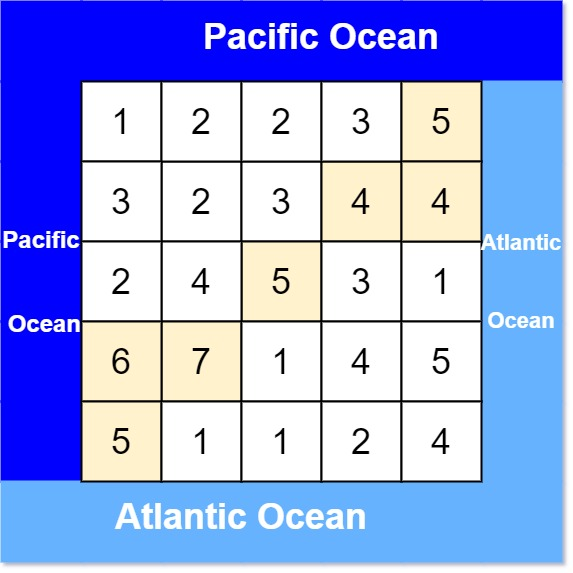

Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
Explanation: The following cells can flow to the Pacific and Atlantic oceans, as shown below:
[0,4]: [0,4] -> Pacific Ocean 
       [0,4] -> Atlantic Ocean
[1,3]: [1,3] -> [0,3] -> Pacific Ocean 
       [1,3] -> [1,4] -> Atlantic Ocean
[1,4]: [1,4] -> [1,3] -> [0,3] -> Pacific Ocean 
       [1,4] -> Atlantic Ocean
[2,2]: [2,2] -> [1,2] -> [0,2] -> Pacific Ocean 
       [2,2] -> [2,3] -> [2,4] -> Atlantic Ocean
[3,0]: [3,0] -> Pacific Ocean 
       [3,0] -> [4,0] -> Atlantic Ocean
[3,1]: [3,1] -> [3,0] -> Pacific Ocean 
       [3,1] -> [4,1] -> Atlantic Ocean
[4,0]: [4,0] -> Pacific Ocean 
       [4,0] -> Atlantic Ocean
Note that there are other possible paths for these cells to flow to the Pacific and Atlantic oceans.
Example 2:

Input: heights = [[1]]
Output: [[0,0]]
Explanation: The water can flow from the only cell to the Pacific and Atlantic oceans.
 

Constraints:

m == heights.length
n == heights[r].length
1 <= m, n <= 200
0 <= heights[r][c] <= 105

## Solution: DFS

- Instead of simulating water flowing from each cell to the oceans (which would be slow), we reverse the process:

- Start from the oceans’ borders and simulate water flowing inward (to higher or equal height cells).

- Any cell visited by both Pacific and Atlantic flows can reach both oceans.

In [8]:
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
directions=[[1,0],[-1,0],[0,1],[0,-1]] #N S E W
m,n=len(heights),len(heights[0])
#Traverse from border cell to inner cells until it blocked by cells of greater height from all sides. Add the visited cells in a set
def DFS(i,j,visited):
    visited.add((i,j))
    for d in directions:
        next_row=i+d[0]
        next_col=j+d[1]
        #Check if the next rows and cols are within bounds and not visited
        if 0<=next_row<m and 0<=next_col<n and (next_row,next_col) not in visited:
            #Explore the next cell if the current cell height is less than or equal to next cell's height
            if heights[i][j]<=heights[next_row][next_col]:
                DFS(next_row,next_col,visited)
    return visited

#Iterate thru borders of pacific
pacific=set()
for row in range(m):
    DFS(row,0,pacific)
for col in range(n):
    DFS(0,col,pacific)
#Iterate thru borders of atlantic
atlantic=set()
for row in range(m):
    DFS(row,n-1,atlantic)
for col in range(n):
    DFS(m-1,col,atlantic)
#Cells reachable by both atlantic and pacific
list(pacific.intersection(atlantic))

[(4, 0), (0, 4), (3, 1), (1, 4), (3, 0), (2, 2), (1, 3)]

# 2054. Two Best Non-Overlapping Events

You are given a 0-indexed 2D integer array of events where events[i] = [startTimei, endTimei, valuei]. The ith event starts at startTimei and ends at endTimei, and if you attend this event, you will receive a value of valuei. You can choose at most two non-overlapping events to attend such that the sum of their values is maximized.

Return this maximum sum.

Note that the start time and end time is inclusive: that is, you cannot attend two events where one of them starts and the other ends at the same time. More specifically, if you attend an event with end time t, the next event must start at or after t + 1.

 

Example 1:


Input: events = [[1,3,2],[4,5,2],[2,4,3]]
Output: 4
Explanation: Choose the green events, 0 and 1 for a sum of 2 + 2 = 4.
Example 2:

Example 1 Diagram
Input: events = [[1,3,2],[4,5,2],[1,5,5]]
Output: 5
Explanation: Choose event 2 for a sum of 5.
Example 3:


Input: events = [[1,5,3],[1,5,1],[6,6,5]]
Output: 8
Explanation: Choose events 0 and 2 for a sum of 3 + 5 = 8.
 

Constraints:

2 <= events.length <= 105
events[i].length == 3
1 <= startTimei <= endTimei <= 109
1 <= valuei <= 106

## Solution: Greedy
- keep track of max value at every index- O(n^2)--- Time Limit Exceeded- 37 / 64 testcases passed

In [6]:
events = [[1,2,10],[2,3,1],[3,4,20]]
events = [[1,3,2],[4,5,2],[2,4,3]]
events = [[1,3,2],[4,5,2],[1,5,5]]
events = [[1,5,3],[1,5,1],[6,6,5]]
events.sort(key=lambda x:x[1])
res=events[0][2]
for i in range(1,len(events)):
    for j in range(i):
        if events[i][0]>events[j][1]: #If events are non overlapping
            res=max(res,events[i][2]+events[j][2]) #Add the event values
        else: #If overlapping, consider the cur event value
            res=max(res,events[i][2])
res

8

# 960. Delete Columns to Make Sorted III

You are given an array of n strings strs, all of the same length.

We may choose any deletion indices, and we delete all the characters in those indices for each string.

For example, if we have strs = ["abcdef","uvwxyz"] and deletion indices {0, 2, 3}, then the final array after deletions is ["bef", "vyz"].

Suppose we chose a set of deletion indices answer such that after deletions, the final array has every string (row) in lexicographic order. (i.e., (strs[0][0] <= strs[0][1] <= ... <= strs[0][strs[0].length - 1]), and (strs[1][0] <= strs[1][1] <= ... <= strs[1][strs[1].length - 1]), and so on). Return the minimum possible value of answer.length.

 

Example 1:

Input: strs = ["babca","bbazb"]
Output: 3
Explanation: After deleting columns 0, 1, and 4, the final array is strs = ["bc", "az"].
Both these rows are individually in lexicographic order (ie. strs[0][0] <= strs[0][1] and strs[1][0] <= strs[1][1]).
Note that strs[0] > strs[1] - the array strs is not necessarily in lexicographic order.
Example 2:

Input: strs = ["edcba"]
Output: 4
Explanation: If we delete less than 4 columns, the only row will not be lexicographically sorted.
Example 3:

Input: strs = ["ghi","def","abc"]
Output: 0
Explanation: All rows are already lexicographically sorted.
 

Constraints:

n == strs.length
1 <= n <= 100
1 <= strs[i].length <= 100
strs[i] consists of lowercase English letters.

## Solution: Implement Longest Increasing Subsequence
Dynamic Programming

In [12]:
strs = ["aabbaa","baabab","aaabab"]
# strs = ["babca","bbazb"]
# strs = ["edcba"]
# strs = ["ghi","def","abc"]
m,n=len(strs),len(strs[0])
dp=[1]*n #keeping track of longest non decreasing subsequence;dp[i]=length of the subsequence ending at ith index of a row
for j in range(1,n): #Iterate thru columns
    for k in range(j):
        bad=False
        for i in range(m): #Iterate thru rows to check if every row has lex order maintained
            if strs[i][k]>strs[i][j]: #Check if any row disturbs the order
                bad=True
        if not bad: #If all rows have order maintained
            dp[j]=max(dp[j],1+dp[k]) #Update the length of longest non decreasing subsequence ending at index j
n-max(dp) #Columns to remove= no. of columns - max length of subsequence

3

# 955. Delete Columns to Make Sorted II

You are given an array of n strings strs, all of the same length.

We may choose any deletion indices, and we delete all the characters in those indices for each string.

For example, if we have strs = ["abcdef","uvwxyz"] and deletion indices {0, 2, 3}, then the final array after deletions is ["bef", "vyz"].

Suppose we chose a set of deletion indices answer such that after deletions, the final array has its elements in lexicographic order (i.e., strs[0] <= strs[1] <= strs[2] <= ... <= strs[n - 1]). Return the minimum possible value of answer.length.



Example 1:

Input: strs = ["ca","bb","ac"]
Output: 1
Explanation:
After deleting the first column, strs = ["a", "b", "c"].
Now strs is in lexicographic order (ie. strs[0] <= strs[1] <= strs[2]).
We require at least 1 deletion since initially strs was not in lexicographic order, so the answer is 1.
Example 2:

Input: strs = ["xc","yb","za"]
Output: 0
Explanation:
strs is already in lexicographic order, so we do not need to delete anything.
Note that the rows of strs are not necessarily in lexicographic order:
i.e., it is NOT necessarily true that (strs[0][0] <= strs[0][1] <= ...)
Example 3:

Input: strs = ["zyx","wvu","tsr"]
Output: 3
Explanation: We have to delete every column.


Constraints:

n == strs.length
1 <= n <= 100
1 <= strs[i].length <= 100
strs[i] consists of lowercase English letters.



## Solution: Greedy

Crucial Insight: Once a pair of words is sorted by an earlier character (like 'e' < 'y'), it stays sorted forever. It does not matter if the characters in the next column are out of order (e.g., 'z' vs 'a'), because the earlier column already determined the winner.

Therefore, we need a "Greedy" approach with "Memory". We scan columns from left to right.

If a column ruins the order for two rows that are currently tied, we MUST delete it.
If a column keeps the order valid, we keep it.
When we keep a column, we must update our "Memory" (isSorted array) to remember which rows are now strictly sorted, so we don't accidentally delete future columns based on rows that are already safe.

In [32]:
strs = ["abx","agz","bgc","bfc"]
m=len(strs) #No. of rows
n=len(strs[0]) #No. of columns
res=0
is_sorted=[False]*(m-1) #isSorted[i] = false means row i and row i+1 are currently tied
#isSorted[i] = true means row i is strictly smaller than row i+1 due to an earlier column.
for j in range(n):
    #Keep flag of whether column is bad
    bad=False
    for i in range(m-1):
        if not is_sorted[i] and strs[i][j]>strs[i+1][j]:
            bad=True
            break   
    if bad:
        res+=1 #Column breaks order, so delete it


    else:
        #We have to keep the column
        for i in range(m-1):
            if not is_sorted[i] and strs[i][j]<strs[i+1][j]: #The pair is not tied and strictly follows order
                is_sorted[i]=True #The pair of rows is sorted, so no need to check these rows in future
    if all(is_sorted): # All the rows are sorted, so need to check further
        break
res

1

# 944. Delete Columns to Make Sorted

You are given an array of n strings strs, all of the same length.

The strings can be arranged such that there is one on each line, making a grid.

For example, strs = ["abc", "bce", "cae"] can be arranged as follows:
abc
bce
cae
You want to delete the columns that are not sorted lexicographically. In the above example (0-indexed), columns 0 ('a', 'b', 'c') and 2 ('c', 'e', 'e') are sorted, while column 1 ('b', 'c', 'a') is not, so you would delete column 1.

Return the number of columns that you will delete.



Example 1:

Input: strs = ["cba","daf","ghi"]
Output: 1
Explanation: The grid looks as follows:
  cba
  daf
  ghi
Columns 0 and 2 are sorted, but column 1 is not, so you only need to delete 1 column.
Example 2:

Input: strs = ["a","b"]
Output: 0
Explanation: The grid looks as follows:
  a
  b
Column 0 is the only column and is sorted, so you will not delete any columns.
Example 3:

Input: strs = ["zyx","wvu","tsr"]
Output: 3
Explanation: The grid looks as follows:
  zyx
  wvu
  tsr
All 3 columns are not sorted, so you will delete all 3.


Constraints:

n == strs.length
1 <= n <= 100
1 <= strs[i].length <= 1000
strs[i] consists of lowercase English letters.

## Solution: Enumeration

In [ ]:
strs = ["zyx","wvu","tsr"]
res=0
for j in range(len(strs[0])):
    for i in range(1,len(strs)):
        if strs[i][j]<strs[i-1][j]:
            res+=1
            break
res

3

# 207. Course Schedule

There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return true if you can finish all courses. Otherwise, return false.



Example 1:

Input: numCourses = 2, prerequisites = [[1,0]]
Output: true
Explanation: There are a total of 2 courses to take.
To take course 1 you should have finished course 0. So it is possible.
Example 2:

Input: numCourses = 2, prerequisites = [[1,0],[0,1]]
Output: false
Explanation: There are a total of 2 courses to take.
To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.


Constraints:

1 <= numCourses <= 2000
0 <= prerequisites.length <= 5000
prerequisites[i].length == 2
0 <= ai, bi < numCourses
All the pairs prerequisites[i] are unique.

## Solution: Cycle Detection via DFS

### 1. Directed Graphs (Using Recursion Stack)
In a directed graph, a cycle exists if, during a DFS traversal, we encounter a node that is already in the current recursion stack.

Key Concept: The "Back Edge"
1.  Array: Keeps track of all nodes visited so far to avoid redundant work.

2.  Stack (Path) Array: Keeps track of nodes in the current DFS path. If you hit a node that is already in this stack, you’ve found a back edge, which indicates a cycle.

#### The Logic
- Mark the current node as visited and add it to the recursion stack.

- For every adjacent node:

--If it hasn't been visited, recurse.

--If it is already in the recursion stack, a cycle is detected.

-- all neighbors are processed, remove the node from the recursion stack (backtrack).

In [ ]:
numCourses = 5; prerequisites = [[1,4],[2,4],[3,1],[3,2]]
adjlist=[[]for _ in range(numCourses)]
for a,b in prerequisites:
    adjlist[b].append(a)

visited=[False]*numCourses
cur_path=[False]*numCourses
def DFS(i): #IF Cycle Detected: Return True
    visited[i]=True
    cur_path[i]=True
    for next in adjlist[i]:
        if cur_path[next]: #If next node is aleady in current path
            return True
        if not visited[next] and DFS(next):
            return True

    #BackTrack: Remove current node from the path
    cur_path[i]=False
    return False

res=True
for node in range(numCourses):
    if not visited[node] and DFS(node):
        res=False
        break
res

True

# 3652. Best Time to Buy and Sell Stock using Strategy

You are given two integer arrays prices and strategy, where:

prices[i] is the price of a given stock on the ith day.
strategy[i] represents a trading action on the ith day, where:
-1 indicates buying one unit of the stock.
0 indicates holding the stock.
1 indicates selling one unit of the stock.
You are also given an even integer k, and may perform at most one modification to strategy. A modification consists of:

Selecting exactly k consecutive elements in strategy.
Set the first k / 2 elements to 0 (hold).
Set the last k / 2 elements to 1 (sell).
The profit is defined as the sum of strategy[i] * prices[i] across all days.

Return the maximum possible profit you can achieve.

Note: There are no constraints on budget or stock ownership, so all buy and sell operations are feasible regardless of past actions.



Example 1:

Input: prices = [4,2,8], strategy = [-1,0,1], k = 2

Output: 10

Explanation:

Modification	Strategy	Profit Calculation	Profit
Original	[-1, 0, 1]	(-1 × 4) + (0 × 2) + (1 × 8) = -4 + 0 + 8	4
Modify [0, 1]	[0, 1, 1]	(0 × 4) + (1 × 2) + (1 × 8) = 0 + 2 + 8	10
Modify [1, 2]	[-1, 0, 1]	(-1 × 4) + (0 × 2) + (1 × 8) = -4 + 0 + 8	4
Thus, the maximum possible profit is 10, which is achieved by modifying the subarray [0, 1]​​​​​​​.

Example 2:

Input: prices = [5,4,3], strategy = [1,1,0], k = 2

Output: 9

Explanation:

Modification	Strategy	Profit Calculation	Profit
Original	[1, 1, 0]	(1 × 5) + (1 × 4) + (0 × 3) = 5 + 4 + 0	9
Modify [0, 1]	[0, 1, 0]	(0 × 5) + (1 × 4) + (0 × 3) = 0 + 4 + 0	4
Modify [1, 2]	[1, 0, 1]	(1 × 5) + (0 × 4) + (1 × 3) = 5 + 0 + 3	8
Thus, the maximum possible profit is 9, which is achieved without any modification.



Constraints:

2 <= prices.length == strategy.length <= 105
1 <= prices[i] <= 105
-1 <= strategy[i] <= 1
2 <= k <= prices.length
k is even

## Solution: Prefix Sum

Approach: Prefix Sum
Intuition
Let n be the length of the array prices. Assuming that the k consecutive elements we choose lie within the interval [i−k+1,i] (where i≥k−1), the profit consists of three parts:

The sum of all strategy[j]×prices[j] in the interval [0,i−k]

The sum of all prices[j] in the interval [i− k//2 +1,i]

The sum of all strategy[j]×prices[j] in the interval [i+1,n−1]

We use the array profitSum to keep track of the prefix sums of strategy[j]×prices[j], and the array priceSum to keep track of the prefix sums of prices[j]. We iterate through i in order and use the prefix sum arrays to calculate the three parts of the profit, returning the maximum profit obtained

In [ ]:
prices = [1,2,3,4,5,6]; strategy = [-1,1,0,-1,1,0]; k = 4
n=len(prices)
pricesum=[0]*(n+1)
profitsum=[0]*(n+1)
for i in range(1,n+1):
    pricesum[i]=prices[i-1]+pricesum[i-1]
    profitsum[i]=prices[i-1]*strategy[i-1]+profitsum[i-1]
res=profitsum[n-1]

for i in range(k-1,n):
    leftprofit=profitsum[i-k+1] #The sum of all strategy[j]×prices[j] in the interval [0,i−k]
    rightprofit=profitsum[n]-profitsum[i+1] #The sum of all strategy[j]×prices[j] in the interval [i+1,n−1]
    deltaprofit = pricesum[i+1]-pricesum[i-k//2+1] #The sum of all strategy[j]×prices[j] in the interval [i+1,n−1]
    totalprofit=leftprofit+rightprofit+deltaprofit
    res=max(res,totalprofit)
res

12

In [ ]:
pricesum
profitsum

[0, -1, 1, 1, -3, 2, 2]

# 133. Clone Graph

Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a value (int) and a list (List[Node]) of its neighbors.

class Node {
    public int val;
    public List<Node> neighbors;
}


Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with val == 1, the second node with val == 2, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.



Example 1:

![image.png](attachment:image.png)

Input: adjList = [[2,4],[1,3],[2,4],[1,3]]
Output: [[2,4],[1,3],[2,4],[1,3]]
Explanation: There are 4 nodes in the graph.
1st node (val = 1)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
2nd node (val = 2)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).
3rd node (val = 3)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
4th node (val = 4)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).
Example 2:

![image-2.png](attachment:image-2.png)


Input: adjList = [[]]
Output: [[]]
Explanation: Note that the input contains one empty list. The graph consists of only one node with val = 1 and it does not have any neighbors.
Example 3:

Input: adjList = []
Output: []
Explanation: This an empty graph, it does not have any nodes.


Constraints:

The number of nodes in the graph is in the range [0, 100].
1 <= Node.val <= 100
Node.val is unique for each node.
There are no repeated edges and no self-loops in the graph.
The Graph is connected and all nodes can be visited starting from the given node.

## Solution: DFS

In [ ]:
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

from typing import Optional
class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        mpp={} #original -> clone

        def DFS(node):
            if node in mpp:
                return mpp[node]
            copy=Node(node.val)
            mpp[node]=copy
            for nei in node.neighbors:
                copy.neighbors.append(DFS(nei))
            return copy

        return DFS(node) if node else None

sol=Solution()
nodes = {}
for i in range(1, 5):
    nodes[i] = Node(i)
adjList = [[2,4],[1,3],[2,4],[1,3]]
for i in range(len(adjList)):
    nodes[i+1].neighbors = [nodes[j] for j in adjList[i]]

sol.cloneGraph(nodes[1])

# 55. Jump Game

You are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.



Example 1:

Input: nums = [2,3,1,1,4]
Output: true
Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.
Example 2:

Input: nums = [3,2,1,0,4]
Output: false
Explanation: You will always arrive at index 3 no matter what. Its maximum jump length is 0, which makes it impossible to reach the last index.


Constraints:

1 <= nums.length <= 104
0 <= nums[i] <= 105

## Solution: Dynamic Programming:
DFS with memoisation

In [ ]:
nums = [2,3,1,1,4]
# nums = [3,2,1,0,4]
memo=[-1]*len(nums)
def DFS(i):

    #Base Case
    if i==len(nums)-1:
        return True

    if memo[i]!=-1:
        return memo[i]

    for steps in range(1,nums[i]+1):
        next_i=i+steps
        if next_i<len(nums) and DFS(next_i):
            memo[i]=DFS(next_i)
            return

    memo[i]=False
    return False
DFS(0)

False

In [ ]:
memo

[False, True, False, True, -1]

## Bottom Up Approach

In [ ]:
nums = [2,3,1,1,4]
# Start from the reverse and check if the current target is reachable by current index i.e nums[cur]>=target-cur. Update target accordingly
target=len(nums)-1
for i in range(len(nums)-2,-1,-1):
    if nums[i]>=target-i: #Means that the current target can be reached from current index
        target=i #Update the current index as the target as for the next iterations, you only have to check if the current idx can be reached or not
target==0

True

# 2110. Number of Smooth Descent Periods of a Stock

You are given an integer array prices representing the daily price history of a stock, where prices[i] is the stock price on the ith day.

A smooth descent period of a stock consists of one or more contiguous days such that the price on each day is lower than the price on the preceding day by exactly 1. The first day of the period is exempted from this rule.

Return the number of smooth descent periods.



Example 1:

Input: prices = [3,2,1,4]
Output: 7
Explanation: There are 7 smooth descent periods:
[3], [2], [1], [4], [3,2], [2,1], and [3,2,1]
Note that a period with one day is a smooth descent period by the definition.
Example 2:

Input: prices = [8,6,7,7]
Output: 4
Explanation: There are 4 smooth descent periods: [8], [6], [7], and [7]
Note that [8,6] is not a smooth descent period as 8 - 6 ≠ 1.
Example 3:

Input: prices = [1]
Output: 1
Explanation: There is 1 smooth descent period: [1]


Constraints:

1 <= prices.length <= 105
1 <= prices[i] <= 105

## Solution: Math- Count consecutive-1 runs
https://leetcode.com/problems/number-of-smooth-descent-periods-of-a-stock/solutions/7414803/count-consecutive-1-runs-on-by-suhaditya-ss8t

In [ ]:
prices = [3,2,1,4]
prev=-1
consecutive=1
res=0
for p in prices:
    if p==prev-1:
        consecutive+=1
    else:
        res+=consecutive*(consecutive-1)//2
        consecutive=1
    prev=p
#To account for the last element, if consecutive
res+=consecutive*(consecutive-1)//2
# Add the length as individual elements also count
res+=len(prices)
res

7

# 2147. Number of Ways to Divide a Long Corridor

Along a long library corridor, there is a line of seats and decorative plants. You are given a 0-indexed string corridor of length n consisting of letters 'S' and 'P' where each 'S' represents a seat and each 'P' represents a plant.

One room divider has already been installed to the left of index 0, and another to the right of index n - 1. Additional room dividers can be installed. For each position between indices i - 1 and i (1 <= i <= n - 1), at most one divider can be installed.

Divide the corridor into non-overlapping sections, where each section has exactly two seats with any number of plants. There may be multiple ways to perform the division. Two ways are different if there is a position with a room divider installed in the first way but not in the second way.

Return the number of ways to divide the corridor. Since the answer may be very large, return it modulo 109 + 7. If there is no way, return 0.



Example 1:

![image.png](attachment:image.png)

Input: corridor = "SSPPSPS"
Output: 3
Explanation: There are 3 different ways to divide the corridor.
The black bars in the above image indicate the two room dividers already installed.
Note that in each of the ways, each section has exactly two seats.
Example 2:

![image-2.png](attachment:image-2.png)

Input: corridor = "PPSPSP"
Output: 1
Explanation: There is only 1 way to divide the corridor, by not installing any additional dividers.
Installing any would create some section that does not have exactly two seats.
Example 3:

![image-3.png](attachment:image-3.png)

Input: corridor = "S"
Output: 0
Explanation: There is no way to divide the corridor because there will always be a section that does not have exactly two seats.


Constraints:

n == corridor.length
1 <= n <= 105
corridor[i] is either 'S' or 'P'.

## Solution: Key Insight: Multiply Choices Between Consecutive Seat Pairs
https://leetcode.com/problems/number-of-ways-to-divide-a-long-corridor/solutions/7412566/key-insight-multiply-choices-between-con-jduo

In [ ]:
class Solution:
    def numberOfWays(self, corridor: str) -> int:
        if corridor.count('S')%2!=0 or corridor.count('S')==0:
            return 0
        res=1
        cnt=0
        prev=-1
        MOD=10**9+7
        for i,c in enumerate(corridor):
            if c=='S':
                cnt+=1
                if cnt==1 and prev!=-1:
                    res*=(i-prev)
                elif cnt==2:
                    prev=i
                    cnt=0

        return res%MOD

sol=Solution()
sol.numberOfWays(corridor = "SSPPSPS")

3

# 3606. Coupon Code Validator

You are given three arrays of length n that describe the properties of n coupons: code, businessLine, and isActive. The ith coupon has:

code[i]: a string representing the coupon identifier.
businessLine[i]: a string denoting the business category of the coupon.
isActive[i]: a boolean indicating whether the coupon is currently active.
A coupon is considered valid if all of the following conditions hold:

code[i] is non-empty and consists only of alphanumeric characters (a-z, A-Z, 0-9) and underscores (_).
businessLine[i] is one of the following four categories: "electronics", "grocery", "pharmacy", "restaurant".
isActive[i] is true.
Return an array of the codes of all valid coupons, sorted first by their businessLine in the order: "electronics", "grocery", "pharmacy", "restaurant", and then by code in lexicographical (ascending) order within each category.



Example 1:

Input: code = ["SAVE20","","PHARMA5","SAVE@20"], businessLine = ["restaurant","grocery","pharmacy","restaurant"], isActive = [true,true,true,true]

Output: ["PHARMA5","SAVE20"]

Explanation:

First coupon is valid.
Second coupon has empty code (invalid).
Third coupon is valid.
Fourth coupon has special character @ (invalid).
Example 2:

Input: code = ["GROCERY15","ELECTRONICS_50","DISCOUNT10"], businessLine = ["grocery","electronics","invalid"], isActive = [false,true,true]

Output: ["ELECTRONICS_50"]

Explanation:

First coupon is inactive (invalid).
Second coupon is valid.
Third coupon has invalid business line (invalid).


Constraints:

n == code.length == businessLine.length == isActive.length
1 <= n <= 100
0 <= code[i].length, businessLine[i].length <= 100
code[i] and businessLine[i] consist of printable ASCII characters.
isActive[i] is either true or false.

## Solution: Simulation

In [ ]:
code = ["SAVE20","","PHARMA5","SAVE@20"]; businessLine = ["restaurant","grocery","pharmacy","restaurant"]; isActive = [True,True,True,True]
pairs=[]
for i in range(len(code)):
    if code[i] and all((ch.isalnum() or ch=='_') for ch in code[i]) and isActive[i] and businessLine[i] in {"electronics", "grocery", "pharmacy", "restaurant"}:
        pairs.append((code[i],businessLine[i]))
pairs.sort(key=lambda x: (x[1][0],x[0]))
res = [code for code,bl in pairs]
res

['PHARMA5', 'SAVE20']

# 3433. Count Mentions Per User

You are given an integer numberOfUsers representing the total number of users and an array events of size n x 3.

Each events[i] can be either of the following two types:

Message Event: ["MESSAGE", "timestampi", "mentions_stringi"]
This event indicates that a set of users was mentioned in a message at timestampi.
The mentions_stringi string can contain one of the following tokens:
id<number>: where <number> is an integer in range [0,numberOfUsers - 1]. There can be multiple ids separated by a single whitespace and may contain duplicates. This can mention even the offline users.
ALL: mentions all users.
HERE: mentions all online users.
Offline Event: ["OFFLINE", "timestampi", "idi"]
This event indicates that the user idi had become offline at timestampi for 60 time units. The user will automatically be online again at time timestampi + 60.
Return an array mentions where mentions[i] represents the number of mentions the user with id i has across all MESSAGE events.

All users are initially online, and if a user goes offline or comes back online, their status change is processed before handling any message event that occurs at the same timestamp.

Note that a user can be mentioned multiple times in a single message event, and each mention should be counted separately.



Example 1:

Input: numberOfUsers = 2, events = [["MESSAGE","10","id1 id0"],["OFFLINE","11","0"],["MESSAGE","71","HERE"]]

Output: [2,2]

Explanation:

Initially, all users are online.

At timestamp 10, id1 and id0 are mentioned. mentions = [1,1]

At timestamp 11, id0 goes offline.

At timestamp 71, id0 comes back online and "HERE" is mentioned. mentions = [2,2]

Example 2:

Input: numberOfUsers = 2, events = [["MESSAGE","10","id1 id0"],["OFFLINE","11","0"],["MESSAGE","12","ALL"]]

Output: [2,2]

Explanation:

Initially, all users are online.

At timestamp 10, id1 and id0 are mentioned. mentions = [1,1]

At timestamp 11, id0 goes offline.

At timestamp 12, "ALL" is mentioned. This includes offline users, so both id0 and id1 are mentioned. mentions = [2,2]

Example 3:

Input: numberOfUsers = 2, events = [["OFFLINE","10","0"],["MESSAGE","12","HERE"]]

Output: [0,1]

Explanation:

Initially, all users are online.

At timestamp 10, id0 goes offline.

At timestamp 12, "HERE" is mentioned. Because id0 is still offline, they will not be mentioned. mentions = [0,1]



Constraints:

1 <= numberOfUsers <= 100
1 <= events.length <= 100
events[i].length == 3
events[i][0] will be one of MESSAGE or OFFLINE.
1 <= int(events[i][1]) <= 105
The number of id<number> mentions in any "MESSAGE" event is between 1 and 100.
0 <= <number> <= numberOfUsers - 1
It is guaranteed that the user id referenced in the OFFLINE event is online at the time the event occurs.

## Solution: Simulation

Hints:
1. Sort events by timestamp and then process each event.
2. Maintain two sets for offline and online user IDs.

In [ ]:
numberOfUsers = 2; events = [["MESSAGE","10","id1 id0"],["OFFLINE","11","0"],["MESSAGE","71","HERE"]]
numberOfUsers = 2; events = [["OFFLINE","10","0"],["MESSAGE","12","HERE"]]
numberOfUsers = 3; events = [["MESSAGE","1","id0 id1"],["MESSAGE","5","id2"],["MESSAGE","6","ALL"],["OFFLINE","5","2"]]
events.sort(key=lambda x:(int(x[1]),-ord(x[0][0])))
mentions=[0]*numberOfUsers
#Keep track when a user goes offline
toff={} # user_id: offline timestamp
for e in events:
    t=int(e[1])

    if e[0]=='MESSAGE':
        if e[2]=='ALL':
            for i in range(numberOfUsers):
                mentions[i]+=1 #Increment by 1 for all users

        elif e[2]=='HERE':
            for i in range(numberOfUsers):
                if i in toff and t>=toff[i]+60: #Check if any offline user is being online at that timestamp
                    del toff[i]
                if i not in toff:
                    mentions[i]+=1 #Increment by 1 for only online users

        else:
            users=e[2].split(' ')
            for u in users:
                id=int(u[2:])
                mentions[id]+=1 #Increment by 1 for only users mentioned (both online and offline)
    else:
        users=e[2].split(' ')
        for u in users:
            toff[int(u)]=t #Update offline users with timestamps
    # print(mentions)
mentions

[2, 2, 2]

In [ ]:
events

[['MESSAGE', '1', 'id0 id1'],
 ['OFFLINE', '5', '2'],
 ['MESSAGE', '5', 'id2'],
 ['MESSAGE', '6', 'ALL']]

---

# Notebook: `3531. Count Covered Buildings.ipynb`

*Last modified: 2025-12-11 16:19:58*

---

# 3531. Count Covered Buildings

You are given a positive integer n, representing an n x n city. You are also given a 2D grid buildings, where buildings[i] = [x, y] denotes a unique building located at coordinates [x, y].

A building is covered if there is at least one building in all four directions: left, right, above, and below.

Return the number of covered buildings.



Example 1:

![image.png](attachment:image.png)


Input: n = 3, buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]

Output: 1

Explanation:

Only building [2,2] is covered as it has at least one building:
above ([1,2])
below ([3,2])
left ([2,1])
right ([2,3])
Thus, the count of covered buildings is 1.
Example 2:

![image-2.png](attachment:image-2.png)

Input: n = 3, buildings = [[1,1],[1,2],[2,1],[2,2]]

Output: 0

Explanation:

No building has at least one building in all four directions.
Example 3:

![image-3.png](attachment:image-3.png)

Input: n = 5, buildings = [[1,3],[3,2],[3,3],[3,5],[5,3]]

Output: 1

Explanation:

Only building [3,3] is covered as it has at least one building:
above ([1,3])
below ([5,3])
left ([3,2])
right ([3,5])
Thus, the count of covered buildings is 1.


Constraints:

2 <= n <= 105
1 <= buildings.length <= 105
buildings[i] = [x, y]
1 <= x, y <= n
All coordinates of buildings are unique.


## Solution:
A covered building has to be bounded in all 4 directions. So for each row and column we need the maximum and minimum value
Use Hashmaps for grouping
1. Group buildings by x- store everything but the min x and max x in a set say setx-- as the middle buidlings are covered
2. Group buildings by y- store everything but the min y and max y in a set in a set say sety-- as the middle buidlings are covered
3. Run set intersection and return its length

In [ ]:
# buildings = [[1,1],[2,3],[3,3],[2,2],[1,3]]
buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]
buildings.sort(key=lambda x:(x[0],x[1])) #Grouped and sorted by x coordinate
prev=-1
setx=set()
for i in range(2,len(buildings)):
    if buildings[i-1][0]==buildings[i-2][0] and buildings[i-1][0]==buildings[i][0]:
        setx.add((buildings[i-1][0],buildings[i-1][1]))
buildings.sort(key=lambda x:(x[1],x[0])) #Grouped and sorted by y coordinate
prev=-1
sety=set()
for i in range(2,len(buildings)):
    if buildings[i-1][1]==buildings[i-2][1] and buildings[i-1][1]==buildings[i][1]:
        sety.add((buildings[i-1][0],buildings[i-1][1]))
len(setx.intersection(sety))

1

## Efficient Solution: Instead of sorting, store the min and max of x and y in a data structure

In [ ]:
# buildings = [[1,1],[2,3],[3,3],[2,2],[1,3]]
buildings = [[1,2],[2,1],[3,1],[2,3],[3,3],[2,2],[3,2]]
n=3
minx=[float('inf')]*(n+1) # ith index store min x coordinate of ith column. Similarly, the others follow
maxx=[float('-inf')]*(n+1)
miny=[float('inf')]*(n+1) # ith index store min y coordinate of ith row. Similarly, the others follow
maxy=[float('-inf')]*(n+1)

for x,y in buildings:
    minx[y]=min(minx[y],x)
    maxx[y]=max(maxx[y],x)
    miny[x]=min(miny[x],y)
    maxy[x]=max(maxy[x],y)

# Now for each x,y in buildings see if x lies between minx and maxx of that particular column
# and y lies between miny and maxy of that particular row. Increment count for such coordinates
res=0
for x,y in buildings:
    if minx[y]<x<maxx[y] and miny[x]<y<maxy[x]:
        res+=1
res

1

In [ ]:
minx,maxx

([inf, 2, 1, 2], [-inf, 3, 3, 3])

In [ ]:
miny,maxy

([inf, 2, 1, 2], [-inf, 2, 2, 3])

---

# Notebook: `3577. Count the Number of Computer Unlocking Permutations.ipynb`

*Last modified: 2025-12-10 09:57:41*

---

# 3577. Count the Number of Computer Unlocking Permutations

You are given an array complexity of length n.

There are n locked computers in a room with labels from 0 to n - 1, each with its own unique password. The password of the computer i has a complexity complexity[i].

The password for the computer labeled 0 is already decrypted and serves as the root. All other computers must be unlocked using it or another previously unlocked computer, following this information:

You can decrypt the password for the computer i using the password for computer j, where j is any integer less than i with a lower complexity. (i.e. j < i and complexity[j] < complexity[i])
To decrypt the password for computer i, you must have already unlocked a computer j such that j < i and complexity[j] < complexity[i].
Find the number of permutations of [0, 1, 2, ..., (n - 1)] that represent a valid order in which the computers can be unlocked, starting from computer 0 as the only initially unlocked one.

Since the answer may be large, return it modulo 109 + 7.

Note that the password for the computer with label 0 is decrypted, and not the computer with the first position in the permutation.



Example 1:

Input: complexity = [1,2,3]

Output: 2

Explanation:

The valid permutations are:

[0, 1, 2]
Unlock computer 0 first with root password.
Unlock computer 1 with password of computer 0 since complexity[0] < complexity[1].
Unlock computer 2 with password of computer 1 since complexity[1] < complexity[2].
[0, 2, 1]
Unlock computer 0 first with root password.
Unlock computer 2 with password of computer 0 since complexity[0] < complexity[2].
Unlock computer 1 with password of computer 0 since complexity[0] < complexity[1].
Example 2:

Input: complexity = [3,3,3,4,4,4]

Output: 0

Explanation:

There are no possible permutations which can unlock all computers.



Constraints:

2 <= complexity.length <= 105
1 <= complexity[i] <= 109

## Solution: Math

Trick- Note that once 0th computer is unlocked, any computer at an idx i can be unlocked using 0th computer (i>0).
Therefore, the 0th computer's complexity should be unique and minimum. Once 0th comp is unlocked, others can be unlocked in (n-1)! ways

In [ ]:
from typing import List
class Solution:
    def countPermutations(self, complexity: List[int]) -> int:
        min_comp=complexity[0]
        for c in complexity[1:]:
            #Check if 0th complexity is minimum
            if c<=min_comp:
                return 0 # Since 0th complexity is not minimum or multiple minimum values exist

        MOD=10**9+7
        n=len(complexity)
        res=1
        for num in range(1,n):
            res*=num
        return res%MOD

sol=Solution()
sol.countPermutations(complexity = [58,283,52])

0

---

# Notebook: `3583. Count Special Triplets.ipynb`

*Last modified: 2025-12-09 20:24:27*

---

# 3583. Count Special Triplets

You are given an integer array nums.

A special triplet is defined as a triplet of indices (i, j, k) such that:

0 <= i < j < k < n, where n = nums.length
nums[i] == nums[j] * 2
nums[k] == nums[j] * 2
Return the total number of special triplets in the array.

Since the answer may be large, return it modulo 109 + 7.



Example 1:

Input: nums = [6,3,6]

Output: 1

Explanation:

The only special triplet is (i, j, k) = (0, 1, 2), where:

nums[0] = 6, nums[1] = 3, nums[2] = 6
nums[0] = nums[1] * 2 = 3 * 2 = 6
nums[2] = nums[1] * 2 = 3 * 2 = 6
Example 2:

Input: nums = [0,1,0,0]

Output: 1

Explanation:

The only special triplet is (i, j, k) = (0, 2, 3), where:

nums[0] = 0, nums[2] = 0, nums[3] = 0
nums[0] = nums[2] * 2 = 0 * 2 = 0
nums[3] = nums[2] * 2 = 0 * 2 = 0
Example 3:

Input: nums = [8,4,2,8,4]

Output: 2

Explanation:

There are exactly two special triplets:

(i, j, k) = (0, 1, 3)
nums[0] = 8, nums[1] = 4, nums[3] = 8
nums[0] = nums[1] * 2 = 4 * 2 = 8
nums[3] = nums[1] * 2 = 4 * 2 = 8
(i, j, k) = (1, 2, 4)
nums[1] = 4, nums[2] = 2, nums[4] = 4
nums[1] = nums[2] * 2 = 2 * 2 = 4
nums[4] = nums[2] * 2 = 2 * 2 = 4


Constraints:

3 <= n == nums.length <= 105
0 <= nums[i] <= 105

## Solution:

Hint:
1.Use frequency arrays or maps, e.g. freqPrev and freqNext—to track how many times each value appears before and after the current index.
2. For each index j in the triplet (i,j,k), compute its contribution to the answer using your freqPrev and freqNext counts.

In [ ]:
from collections import Counter

In [ ]:
nums = [84,2,93,1,2,2,26]
next=Counter(nums) #Tracks frequency of nums post idx j
prev={} # #Tracks frequency of nums prior to idx j
res=0 #No. of triplets
MOD=10**9+7
for n in nums:
    next[n]-=1
    if next[n]==0: #Remove the occurences of n as we sweep left (for all indices k>j)
        del next[n]
    if 2*n in prev and 2*n in next: #Check whether condition satifies
        res+=(prev[2*n]*next[2*n]) #Triplets increase by product of occurences of 2n in prev and next
    prev[n]=prev[n]+1 if n in prev else 1 #Add the occurence of n in prev (for all indices i<j)
res%MOD

2

---

# Notebook: `1925. Count Square Sum Triples.ipynb`

*Last modified: 2025-12-09 19:22:05*

---

# 1925. Count Square Sum Triples

A square triple (a,b,c) is a triple where a, b, and c are integers and a2 + b2 = c2.

Given an integer n, return the number of square triples such that 1 <= a, b, c <= n.



Example 1:

Input: n = 5
Output: 2
Explanation: The square triples are (3,4,5) and (4,3,5).
Example 2:

Input: n = 10
Output: 4
Explanation: The square triples are (3,4,5), (4,3,5), (6,8,10), and (8,6,10).


Constraints:

1 <= n <= 250

## Solution: Enumeration

In [ ]:
import math

In [ ]:
n = 10
res=0
for a in range(1,n):
    for b in range(a+1,n):
        c=int(math.sqrt(a**2+b**2))
        if c<=n and c**2==a**2+b**2:
            res+=2
res

4

---

# Notebook: `62. Unique Paths.ipynb`

*Last modified: 2025-12-07 23:16:38*

---

# 62. Unique Paths

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 109.



Example 1:

![image.png](attachment:image.png)

Input: m = 3, n = 7
Output: 28
Example 2:

Input: m = 3, n = 2
Output: 3
Explanation: From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:
1. Right -> Down -> Down
2. Down -> Down -> Right
3. Down -> Right -> Down


Constraints:

1 <= m, n <= 100

## Solution: DFS with Memoisation

In [ ]:
m = 3; n = 7
dp= [[-1]*n for _ in range(m)] #dp[r][c] = no. of ways to reach bottom right corner from r,c--- acts as cache

def DFS(r,c):
    if r==m-1 and c==n-1:
        return 1
    if r==m or c==n:
        return 0
    if dp[r][c]!=-1:
        return dp[r][c]
    #go right
    right=DFS(r,c+1)
    #go down
    down=DFS(r+1,c)
    dp[r][c]=right+down

    return dp[r][c]

DFS(0,0)

28

In [ ]:
dp

[[28, 21, 15, 10, 6, 3, 1], [7, 6, 5, 4, 3, 2, 1], [1, 1, 1, 1, 1, 1, -1]]

---

# Notebook: `91. Decode Ways.ipynb`

*Last modified: 2025-12-07 00:07:34*

---

# 91. Decode Ways

You have intercepted a secret message encoded as a string of numbers. The message is decoded via the following mapping:

"1" -> 'A'

"2" -> 'B'

...

"25" -> 'Y'

"26" -> 'Z'

However, while decoding the message, you realize that there are many different ways you can decode the message because some codes are contained in other codes ("2" and "5" vs "25").

For example, "11106" can be decoded into:

"AAJF" with the grouping (1, 1, 10, 6)
"KJF" with the grouping (11, 10, 6)
The grouping (1, 11, 06) is invalid because "06" is not a valid code (only "6" is valid).
Note: there may be strings that are impossible to decode.

Given a string s containing only digits, return the number of ways to decode it. If the entire string cannot be decoded in any valid way, return 0.

The test cases are generated so that the answer fits in a 32-bit integer.



Example 1:

Input: s = "12"

Output: 2

Explanation:

"12" could be decoded as "AB" (1 2) or "L" (12).

Example 2:

Input: s = "226"

Output: 3

Explanation:

"226" could be decoded as "BZ" (2 26), "VF" (22 6), or "BBF" (2 2 6).

Example 3:

Input: s = "06"

Output: 0

Explanation:

"06" cannot be mapped to "F" because of the leading zero ("6" is different from "06"). In this case, the string is not a valid encoding, so return 0.



Constraints:

1 <= s.length <= 100
s contains only digits and may contain leading zero(s).

## Solution: DFS with memoisation

In [ ]:
s="11106"
n=len(s)
memo=[-1]*len(s)
def DFS(i):
    # Base Case
    if i==n:
        return 1 #Valid Way to decode

    if memo[i]!=-1:
        return memo[i] #Check if already visited

    if s[i]=='0': # Invalid way as 0 isn't map
        return 0

    #Check With Single Digit
    single=DFS(i+1) # Traverse to the end, by checking single digit, if invalid way is found, return 0, else it is able to reach the end

    double=0
    #Check with 2 digits
    if i+1<n:
        string=s[i]+s[i+1]
        if '10'<=string<='26':
            double+=DFS(i+2)
    memo[i]=single+double
    return memo[i]

DFS(0)

2

---

# Notebook: `3432. Count Partitions with Even Sum Difference.ipynb`

*Last modified: 2025-12-05 20:30:34*

---

# 3432. Count Partitions with Even Sum Difference

You are given an integer array nums of length n.

A partition is defined as an index i where 0 <= i < n - 1, splitting the array into two non-empty subarrays such that:

Left subarray contains indices [0, i].
Right subarray contains indices [i + 1, n - 1].
Return the number of partitions where the difference between the sum of the left and right subarrays is even.



Example 1:

Input: nums = [10,10,3,7,6]

Output: 4

Explanation:

The 4 partitions are:

[10], [10, 3, 7, 6] with a sum difference of 10 - 26 = -16, which is even.
[10, 10], [3, 7, 6] with a sum difference of 20 - 16 = 4, which is even.
[10, 10, 3], [7, 6] with a sum difference of 23 - 13 = 10, which is even.
[10, 10, 3, 7], [6] with a sum difference of 30 - 6 = 24, which is even.
Example 2:

Input: nums = [1,2,2]

Output: 0

Explanation:

No partition results in an even sum difference.

Example 3:

Input: nums = [2,4,6,8]

Output: 3

Explanation:

All partitions result in an even sum difference.



Constraints:

2 <= n == nums.length <= 100
1 <= nums[i] <= 100

## Solution: Prefix Sum

In [ ]:
nums = [10,10,3,7,6]
total=0
prefix=[]
for n in nums:
    total+=n
    prefix.append(total)
#To have an even difference,both the subarray sums have to either odd or even. In other words, we can say that wherever the prefix sum at i-
# i.e. subarray sum from 0 to i has same parity as prefix sum from len-1 to i+1 i.e. subarray sum from i+1 to len-1, the partition is valid
res=0
for i in range(len(nums)-1):
    if prefix[i]%2==(prefix[-1]-prefix[i])%2:
        res+=1
res

4

---

# Notebook: `2211. Count Collisions on a Road.ipynb`

*Last modified: 2025-12-04 23:19:27*

---

# 2211. Count Collisions on a Road

There are n cars on an infinitely long road. The cars are numbered from 0 to n - 1 from left to right and each car is present at a unique point.

You are given a 0-indexed string directions of length n. directions[i] can be either 'L', 'R', or 'S' denoting whether the ith car is moving towards the left, towards the right, or staying at its current point respectively. Each moving car has the same speed.

The number of collisions can be calculated as follows:

When two cars moving in opposite directions collide with each other, the number of collisions increases by 2.
When a moving car collides with a stationary car, the number of collisions increases by 1.
After a collision, the cars involved can no longer move and will stay at the point where they collided. Other than that, cars cannot change their state or direction of motion.

Return the total number of collisions that will happen on the road.



Example 1:

Input: directions = "RLRSLL"
Output: 5
Explanation:
The collisions that will happen on the road are:
- Cars 0 and 1 will collide with each other. Since they are moving in opposite directions, the number of collisions becomes 0 + 2 = 2.
- Cars 2 and 3 will collide with each other. Since car 3 is stationary, the number of collisions becomes 2 + 1 = 3.
- Cars 3 and 4 will collide with each other. Since car 3 is stationary, the number of collisions becomes 3 + 1 = 4.
- Cars 4 and 5 will collide with each other. After car 4 collides with car 3, it will stay at the point of collision and get hit by car 5. The number of collisions becomes 4 + 1 = 5.
Thus, the total number of collisions that will happen on the road is 5.
Example 2:

Input: directions = "LLRR"
Output: 0
Explanation:
No cars will collide with each other. Thus, the total number of collisions that will happen on the road is 0.


Constraints:

1 <= directions.length <= 105
directions[i] is either 'L', 'R', or 'S'.

## Solution: Counting
Strip all L's to the left and all R's to Right. These cars will never collide. From the remaining string, just count the no. of L's and R's as these are the only ones contributing +1 to the collisions

In [ ]:
directions = "LLRLRLLSLRLLSLSSSSR"
#Strip all leading 'L's
directions = directions.lstrip('L')
#Strip all trailing R's
directions = directions.rstrip('R')
res=len(directions)-directions.count('S')
res

10

---

# Notebook: `1590. Make Sum Divisible by P.ipynb`

*Last modified: 2025-12-04 21:01:27*

---

# 1590. Make Sum Divisible by P

Given an array of positive integers nums, remove the smallest subarray (possibly empty) such that the sum of the remaining elements is divisible by p. It is not allowed to remove the whole array.

Return the length of the smallest subarray that you need to remove, or -1 if it's impossible.

A subarray is defined as a contiguous block of elements in the array.



Example 1:

Input: nums = [3,1,4,2], p = 6
Output: 1
Explanation: The sum of the elements in nums is 10, which is not divisible by 6. We can remove the subarray [4], and the sum of the remaining elements is 6, which is divisible by 6.
Example 2:

Input: nums = [6,3,5,2], p = 9
Output: 2
Explanation: We cannot remove a single element to get a sum divisible by 9. The best way is to remove the subarray [5,2], leaving us with [6,3] with sum 9.
Example 3:

Input: nums = [1,2,3], p = 3
Output: 0
Explanation: Here the sum is 6. which is already divisible by 3. Thus we do not need to remove anything.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109
1 <= p <= 109

## Solution:

Prefix Sum + Math

In [ ]:
nums = [8,32,31,18,34,20,21,13,1,27,23,22,11,15,30,4,2]; p = 148
#Store Prefix Sum Modulo
prefix=[(nums[0]%p)]*len(nums)
for i in range(1,len(nums)):
    prefix[i]=(prefix[i-1]+nums[i])%p
target=prefix[-1]
if target==0:
    res=0
else:
    res=len(nums)
#As we scan the prefix modulom Let cur be the current remainder, X be the remainder of the subarray we want to remove, then
# cur-X=target, or X=cur-target. i.e we need to check if X has been seen or not. X is nothing but a remainder of sum till a particular index left of i
# To check, we maintain a hashmap of X s.t: mpp[n]=idx where idx
# is the rightmost index (Since we need to find min. length, idx must be as close as possible to cur's index)

mpp={0:-1} #because it represents the prefix sum = 0 occurring before the array starts.This allows us to detect subarrays starting from index 0.

for i, n in enumerate(prefix):
    #Remainder needed to remove= X
    X=(n-target+p)%p # p is added to handle negative remainders
    if X in mpp: #If the same remainder to be removed was seen earlier,then get the subarray length to be removed by subtracting the indices of cur and X
        res=min(res,i-mpp[X])#i-mpp[X] is the length of the subarray to remove
    # Store the index of n i.e. current remainder seen till i:
    mpp[n]=i
res if res<len(nums) else -1

7

---

# Notebook: `2141. Maximum Running Time of N Computers.ipynb`

*Last modified: 2025-12-04 01:05:52*

---

# 2141. Maximum Running Time of N Computers

You have n computers. You are given the integer n and a 0-indexed integer array batteries where the ith battery can run a computer for batteries[i] minutes. You are interested in running all n computers simultaneously using the given batteries.

Initially, you can insert at most one battery into each computer. After that and at any integer time moment, you can remove a battery from a computer and insert another battery any number of times. The inserted battery can be a totally new battery or a battery from another computer. You may assume that the removing and inserting processes take no time.

Note that the batteries cannot be recharged.

Return the maximum number of minutes you can run all the n computers simultaneously.



Example 1:

![image.png](attachment:image.png)


Input: n = 2, batteries = [3,3,3]
Output: 4
Explanation:
Initially, insert battery 0 into the first computer and battery 1 into the second computer.
After two minutes, remove battery 1 from the second computer and insert battery 2 instead. Note that battery 1 can still run for one minute.
At the end of the third minute, battery 0 is drained, and you need to remove it from the first computer and insert battery 1 instead.
By the end of the fourth minute, battery 1 is also drained, and the first computer is no longer running.
We can run the two computers simultaneously for at most 4 minutes, so we return 4.

Example 2:

![image-2.png](attachment:image-2.png)


Input: n = 2, batteries = [1,1,1,1]
Output: 2
Explanation:
Initially, insert battery 0 into the first computer and battery 2 into the second computer.
After one minute, battery 0 and battery 2 are drained so you need to remove them and insert battery 1 into the first computer and battery 3 into the second computer.
After another minute, battery 1 and battery 3 are also drained so the first and second computers are no longer running.
We can run the two computers simultaneously for at most 2 minutes, so we return 2.


Constraints:

1 <= n <= batteries.length <= 105
1 <= batteries[i] <= 109

## Solution: Binary Search

1. Whenever see a problem like finding maximum and monotonocity i.e if T is the max time then the computers can run from 0 to T time simultaneously, think of binary search.
2. For a given target time T, total running time = n*T
3. Contribution from each battery = min(T,batteries[i]). Sum up these contributions.
4. The computers can run simultaneously for all t where total contribution>=n*t. i,e for target time T, n*T>=total contribution
5. Use binary search to maximize t, search space: min=0, max=sum(batteries)/n (ideal case)

The idea is to think in terms of total run time instead of trying to simulate for each case. Looks a bit unintuitive at first, but this is an old trick in the book.

In [ ]:
from typing import List
class Solution:
    def maxRunTime(self, n: int, batteries: List[int]) -> int:
        low=min(batteries)
        high=sum(batteries)//n
        while low<high:
            T=(low+high+1)//2 #1 is added to avoid infinte loop if low and high are 2 consecutive nos.
            total_contri=sum(min(T,b) for b in batteries)
            if total_contri>=n*T:
                low=T #Look for higher T, also the current T is also feasible
            else:
                high=T-1 # Look for lower T
        return low

sol=Solution()
sol.maxRunTime(n = 12, batteries = [11,89,16,32,70,67,35,35,31,24,41,29,6,53,78,83])

43

---

# Notebook: `3623. Count Number of Trapezoids I.ipynb`

*Last modified: 2025-12-03 15:32:26*

---

# 3623. Count Number of Trapezoids I

You are given a 2D integer array points, where points[i] = [xi, yi] represents the coordinates of the ith point on the Cartesian plane.

A horizontal trapezoid is a convex quadrilateral with at least one pair of horizontal sides (i.e. parallel to the x-axis). Two lines are parallel if and only if they have the same slope.

Return the number of unique horizontal trapezoids that can be formed by choosing any four distinct points from points.

Since the answer may be very large, return it modulo 109 + 7.



Example 1:

![image.png](attachment:image.png)
![image-4.png](attachment:image-4.png)
![image-3.png](attachment:image-3.png)

Input: points = [[1,0],[2,0],[3,0],[2,2],[3,2]]

Output: 3

Explanation:



There are three distinct ways to pick four points that form a horizontal trapezoid:

Using points [1,0], [2,0], [3,2], and [2,2].
Using points [2,0], [3,0], [3,2], and [2,2].
Using points [1,0], [3,0], [3,2], and [2,2].
Example 2:

![image-2.png](attachment:image-2.png)

Input: points = [[0,0],[1,0],[0,1],[2,1]]

Output: 1

Explanation:



There is only one horizontal trapezoid that can be formed.



Constraints:

4 <= points.length <= 105
–108 <= xi, yi <= 108
All points are pairwise distinct.a

## Solution:

Combinatorics: Between any 2 set of points on different horizontal levels, no. of trapezoids possible is mc2*nC2, where m and n are the no. of points in level 1 and level 2. Similarly we have to add this quantity for each pair of levels.

In [ ]:
points = [[-73,-72],[-1,-56],[-92,30],[-57,-89],[-19,-89],[-35,30],[64,-72]]
MOD=10**9+7
#sort by y coordinate
points.sort(key=lambda x:x[1])
#Create a hashmap, keeping track of the no. of points at a particular level
mpp={}
for x,y in points:
    mpp[y]=1 if y not in mpp else mpp[y]+1
#Convert into array keeping track of nC2 where n is the no. of points at a particular level to use prefix sum
arr=[]
for key,value in mpp.items():
    if value>=2:
        arr.append(value*(value-1)//2)
prefix=[arr[0]]*len(arr)
for i in range(1,len(arr)):
    prefix[i]=prefix[i-1]+arr[i]
#Now use the prefix array to efficiently calculate the sumproduct between any two pairs
res=0
for i in range(len(prefix)-1):
    res+=(arr[i]*(prefix[-1]-prefix[i]))%MOD
res%MOD

3

In [ ]:
mpp

{-89: 2, -72: 2, -56: 1, 30: 2}

In [ ]:
arr

[1, 1, 1]

In [ ]:
prefix

[1, 2, 3]

---

# Notebook: `3381. Maximum Subarray Sum With Length Divisible by K.ipynb`

*Last modified: 2025-11-29 10:13:21*

---

# 3381. Maximum Subarray Sum With Length Divisible by K

You are given an array of integers nums and an integer k.

Return the maximum sum of a subarray of nums, such that the size of the subarray is divisible by k.



Example 1:

Input: nums = [1,2], k = 1

Output: 3

Explanation:

The subarray [1, 2] with sum 3 has length equal to 2 which is divisible by 1.

Example 2:

Input: nums = [-1,-2,-3,-4,-5], k = 4

Output: -10

Explanation:

The maximum sum subarray is [-1, -2, -3, -4] which has length equal to 4 which is divisible by 4.

Example 3:

Input: nums = [-5,1,2,-3,4], k = 2

Output: 4

Explanation:

The maximum sum subarray is [1, 2, -3, 4] which has length equal to 4 which is divisible by 2.



Constraints:

1 <= k <= nums.length <= 2 * 105
-109 <= nums[i] <= 109

## Solution: Prefix Sum:
TC- o(n*n/k)
Time Limit Exceeded
655 / 661 testcases passed

In [ ]:
nums = [-5,1,2,-3,4]; k = 2
n=len(nums)
prefix=[nums[0]]*n
res=float('-inf')
for i in range(1,n):
    prefix[i]=prefix[i-1]+nums[i]
prefix
for start in range(n):
    i=start
    while i+k-1<n:
        if start==0:
            res=max(res,prefix[i+k-1]-0)
        else:
            res=max(res,prefix[i+k-1]-prefix[start-1])
        i+=k
res

4

---

# Notebook: `3512. Minimum Operations to Make Array Sum Divisible by K.ipynb`

*Last modified: 2025-11-29 10:13:03*

---

# 3512. Minimum Operations to Make Array Sum Divisible by K

You are given an integer array nums and an integer k. You can perform the following operation any number of times:

Select an index i and replace nums[i] with nums[i] - 1.
Return the minimum number of operations required to make the sum of the array divisible by k.



Example 1:

Input: nums = [3,9,7], k = 5

Output: 4

Explanation:

Perform 4 operations on nums[1] = 9. Now, nums = [3, 5, 7].
The sum is 15, which is divisible by 5.
Example 2:

Input: nums = [4,1,3], k = 4

Output: 0

Explanation:

The sum is 8, which is already divisible by 4. Hence, no operations are needed.
Example 3:

Input: nums = [3,2], k = 6

Output: 5

Explanation:

Perform 3 operations on nums[0] = 3 and 2 operations on nums[1] = 2. Now, nums = [0, 0].
The sum is 0, which is divisible by 6.


Constraints:

1 <= nums.length <= 1000
1 <= nums[i] <= 1000
1 <= k <= 100

# Solution: Simple Math

In [ ]:
nums = [3,9,7]; k = 5
sum(nums)%k

4

---

# Notebook: `2872. Maximum Number of K-Divisible Components.ipynb`

*Last modified: 2025-11-29 01:09:19*

---

# 2872. Maximum Number of K-Divisible Components

There is an undirected tree with n nodes labeled from 0 to n - 1. You are given the integer n and a 2D integer array edges of length n - 1, where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

You are also given a 0-indexed integer array values of length n, where values[i] is the value associated with the ith node, and an integer k.

A valid split of the tree is obtained by removing any set of edges, possibly empty, from the tree such that the resulting components all have values that are divisible by k, where the value of a connected component is the sum of the values of its nodes.

Return the maximum number of components in any valid split.



Example 1:

![image.png](attachment:image.png)


Input: n = 5, edges = [[0,2],[1,2],[1,3],[2,4]], values = [1,8,1,4,4], k = 6
Output: 2
Explanation: We remove the edge connecting node 1 with 2. The resulting split is valid because:
- The value of the component containing nodes 1 and 3 is values[1] + values[3] = 12.
- The value of the component containing nodes 0, 2, and 4 is values[0] + values[2] + values[4] = 6.
It can be shown that no other valid split has more than 2 connected components.
Example 2:

![image-2.png](attachment:image-2.png)


Input: n = 7, edges = [[0,1],[0,2],[1,3],[1,4],[2,5],[2,6]], values = [3,0,6,1,5,2,1], k = 3
Output: 3
Explanation: We remove the edge connecting node 0 with 2, and the edge connecting node 0 with 1. The resulting split is valid because:
- The value of the component containing node 0 is values[0] = 3.
- The value of the component containing nodes 2, 5, and 6 is values[2] + values[5] + values[6] = 9.
- The value of the component containing nodes 1, 3, and 4 is values[1] + values[3] + values[4] = 6.
It can be shown that no other valid split has more than 3 connected components.


Constraints:

1 <= n <= 3 * 104
edges.length == n - 1
edges[i].length == 2
0 <= ai, bi < n
values.length == n
0 <= values[i] <= 109
1 <= k <= 109
Sum of values is divisible by k.
The input is generated such that edges represents a valid tree.

Hints:
1. Root the tree at node 0.
2. If a leaf node is not divisible by k, it must be in the same component as its parent node so we merge it with its parent node.
3. If a leaf node is divisible by k, it will be in its own components so we separate it from its parent node.
4. In each step, we either cut a leaf node down or merge a leaf node. The number of nodes on the tree reduces by one. Repeat this process until only one node is left.

They aren't asking for giving the splits, they just want us to count it, and we are counting differently although the end result is the same

## Solution: DFS

In [ ]:
from collections import defaultdict

In [ ]:
n = 7; edges = [[0,1],[0,2],[1,3],[1,4],[2,5],[2,6]]; values = [3,0,6,1,5,2,1];k = 3
res=0
#Create adjacency list
adj=defaultdict(list)
for v1,v2 in edges:
    adj[v1].append(v2)
    adj[v2].append(v1)
def DFS(cur,parent):
    sum_=values[cur]
    #Iterate through the child nodes, the loop won't execute if we reach a leaf node
    for child in adj[cur]:
        if child!=parent: #To avoid cycles
            sum_+=DFS(child,cur)
    #Check sum divisibility
    global res
    if sum_%k==0:
        res+=1
    return sum_

DFS(0,-1)
res

3

In [ ]:
adj

defaultdict(list,
            {0: [1, 2],
             1: [0, 3, 4],
             2: [0, 5, 6],
             3: [1],
             4: [1],
             5: [2],
             6: [2]})

---

# Notebook: `2435. Paths in Matrix Whose Sum Is Divisible by K.ipynb`

*Last modified: 2025-11-26 23:25:57*

---

# 2435. Paths in Matrix Whose Sum Is Divisible by K

You are given a 0-indexed m x n integer matrix grid and an integer k. You are currently at position (0, 0) and you want to reach position (m - 1, n - 1) moving only down or right.

Return the number of paths where the sum of the elements on the path is divisible by k. Since the answer may be very large, return it modulo 109 + 7.



Example 1:

![image.png](attachment:image.png)


Input: grid = [[5,2,4],[3,0,5],[0,7,2]], k = 3
Output: 2
Explanation: There are two paths where the sum of the elements on the path is divisible by k.
The first path highlighted in red has a sum of 5 + 2 + 4 + 5 + 2 = 18 which is divisible by 3.
The second path highlighted in blue has a sum of 5 + 3 + 0 + 5 + 2 = 15 which is divisible by 3.

Example 2:

![image-2.png](attachment:image-2.png)

Input: grid = [[0,0]], k = 5
Output: 1
Explanation: The path highlighted in red has a sum of 0 + 0 = 0 which is divisible by 5.

Example 3:

![image-3.png](attachment:image-3.png)

Input: grid = [[7,3,4,9],[2,3,6,2],[2,3,7,0]], k = 1
Output: 10
Explanation: Every integer is divisible by 1 so the sum of the elements on every possible path is divisible by k.


Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 5 * 104
1 <= m * n <= 5 * 104
0 <= grid[i][j] <= 100
1 <= k <= 50

## Solution: DFS with memoisation

1. Instead of passing the entire sum which may be huge, pass the remainder instead.
2. There are 2 ways to reach a cell, move right or move down

In [ ]:
grid = [[5,2,4],[3,0,5],[0,7,2]]; k = 3
memo={}
MOD=10**9+7
r,c=len(grid),len(grid[0])
def DFS(i,j,rem): #row idx, col idx, remainder
    #Base Case:
    if i==r-1 and j==c-1: #Reaches the end of the grid
        if (rem+grid[i][j])%k==0:
            return 1
        return 0
    #Out of Bounds Case
    if i==r or j==c:
        return 0
    #If already in cache
    if (i,j,rem) in memo:
        return memo[(i,j,rem)]
    #Explore right and down
    memo[(i,j,rem)]=DFS(i+1,j,(rem+grid[i][j])%k)+DFS(i,j+1,(rem+grid[i][j])%k)

    return memo[(i,j,rem)]

DFS(0,0,0)%MOD

2

Memory Limit Exceeded

## Improved Solution: For Caching, instead of disctionary, use a 3d list.

Why does it work?

1. The Cost of the "Key" (Tuple vs. Index)Dictionary (memo[(i, j, rem)] = val):To store a value in a dictionary, Python must store the Key itself. In your case, the key is a Tuple (i, j, rem).Every time you save a state, Python creates a tuple object.This tuple has a memory overhead (header, length, and pointers to the 3 integers).Result: You aren't just storing the answer; you are storing millions of tuple objects just to label the answers.3D List (memo[i][j][rem] = val):The "keys" (i, j, rem) are implicit. They are not stored.They are simply mathematical offsets. Python calculates the memory address based on the index: Base_Address + (i * row_size) + (j * col_size) + rem.Result: Zero memory is spent on storing the coordinates.

2. The Container Structure (Hash Table vs. Contiguous Block)Dictionary (Hash Table):A Python dictionary is a Hash Table. To make lookups fast ($O(1)$), a hash table must be larger than the data it holds (usually keeping ~1/3rd of the slots empty) to avoid "hash collisions."It stores: The Hash of the key + A pointer to the Key + A pointer to the Value.Growth: When a dictionary fills up, Python doubles its size, leading to sudden spikes in memory usage and large chunks of unused allocated memory.List (Array):A Python list (when pre-allocated like [[...]]) is a compact array of pointers.It stores: Just the pointer to the Value.There is no "empty space" reserved for collision handling. It is exactly the size you defined ($N \times M \times K$).

When should you use a Dictionary?

Use a dictionary only when the solution space is extremely sparse. For example, if your grid was $1,000,000 \times 1,000,000$ but you only ever visited 50 specific cells, a Dictionary is better because allocating a massive array for 50 items is wasteful.However, in your problem, you are traversing almost the entire grid, so the solution is dense, making the Array/List the superior choice.

In [ ]:
grid = [[5,2,4],[3,0,5],[0,7,2]]; k = 3

MOD=10**9+7
r,c=len(grid),len(grid[0])
memo= [[[-1]*k for _ in range(c)] for _ in range(r)] #index: row,col,remainder, value: no. of ways (-1 means cell is not visited)
def DFS(i,j,rem): #row idx, col idx, remainder
    #Base Case:
    if i==r-1 and j==c-1: #Reaches the end of the grid
        if (rem+grid[i][j])%k==0:
            return 1
        return 0
    #Out of Bounds Case
    if i==r or j==c:
        return 0
    #If already in cache
    if memo[i][j][rem]>-1: #If cell is visited
        return memo[i][j][rem]
    #Explore right and down
    memo[i][j][rem]=DFS(i+1,j,(rem+grid[i][j])%k)+DFS(i,j+1,(rem+grid[i][j])%k)

    return memo[i][j][rem]

DFS(0,0,0)%MOD

2

### Accepted

---

# Notebook: `1015. Smallest Integer Divisible by K.ipynb`

*Last modified: 2025-11-25 22:22:24*

---

# 1015. Smallest Integer Divisible by K

Given a positive integer k, you need to find the length of the smallest positive integer n such that n is divisible by k, and n only contains the digit 1.

Return the length of n. If there is no such n, return -1.

Note: n may not fit in a 64-bit signed integer.



Example 1:

Input: k = 1
Output: 1
Explanation: The smallest answer is n = 1, which has length 1.
Example 2:

Input: k = 2
Output: -1
Explanation: There is no such positive integer n divisible by 2.
Example 3:

Input: k = 3
Output: 3
Explanation: The smallest answer is n = 111, which has length 3.


Constraints:

1 <= k <= 105

## Solution: Math

1. The idea is that if k is divisible by 2 or 5 then you cannot get a multiple of k ending with 1
2. Instead of building the entire number, we can just the build the remainder from the previous one

In [ ]:
class Solution:
    def smallestRepunitDivByK(self, k: int) -> int:
        if k%2==0 or k%5==0:
            return -1
        seen=set()
        rem=1%k #Start with len 1
        res=1 # length of the number
        seen.add(rem)
        while rem!=0:
            rem=(rem*10+1)%k
            res+=1
        return res
sol=Solution()
sol.smallestRepunitDivByK(k=1)

1

---

# Notebook: `1018. Binary Prefix Divisible By 5.ipynb`

*Last modified: 2025-11-25 01:23:56*

---

# 1018. Binary Prefix Divisible By 5

You are given a binary array nums (0-indexed).

We define xi as the number whose binary representation is the subarray nums[0..i] (from most-significant-bit to least-significant-bit).

For example, if nums = [1,0,1], then x0 = 1, x1 = 2, and x2 = 5.
Return an array of booleans answer where answer[i] is true if xi is divisible by 5.



Example 1:

Input: nums = [0,1,1]
Output: [true,false,false]
Explanation: The input numbers in binary are 0, 01, 011; which are 0, 1, and 3 in base-10.
Only the first number is divisible by 5, so answer[0] is true.
Example 2:

Input: nums = [1,1,1]
Output: [false,false,false]


Constraints:

1 <= nums.length <= 105
nums[i] is either 0 or 1.

## Solution:

Instead of building the numbers and then checking the remainders, just keep track of the remainders instead

If you see carefully, while building the cur number from the previous no., the previous decimal no. gets multiplied by 2 and then nums[i] is added to make the cur no. Same goes while building the remainder itself, the math is consistent

In [ ]:
nums = [0,1,1]
res=[False]*len(nums)
rem=0
for i in range(len(nums)):
    rem=(rem*2+nums[i])%5
    if rem==0:
        res[i]=True
res

[True, False, False]

---

# Notebook: `1262. Greatest Sum Divisible by Three.ipynb`

*Last modified: 2025-11-23 21:36:55*

---

# 1262. Greatest Sum Divisible by Three

Given an integer array nums, return the maximum possible sum of elements of the array such that it is divisible by three.



Example 1:

Input: nums = [3,6,5,1,8]
Output: 18
Explanation: Pick numbers 3, 6, 1 and 8 their sum is 18 (maximum sum divisible by 3).
Example 2:

Input: nums = [4]
Output: 0
Explanation: Since 4 is not divisible by 3, do not pick any number.
Example 3:

Input: nums = [1,2,3,4,4]
Output: 12
Explanation: Pick numbers 1, 3, 4 and 4 their sum is 12 (maximum sum divisible by 3).


Constraints:

1 <= nums.length <= 4 * 104
1 <= nums[i] <= 104

## Solution: DFS with Memoisation

In [ ]:
nums = [3,6,5,1,8]
memo={}
def DFS(i,sum_):
    if i==len(nums):
        return sum_ if sum_%3==0 else 0
    if (i,sum_) in memo:
        return memo[(i,sum_)]
    skip=DFS(i+1,sum_) #Skip the cur index
    include=DFS(i+1,nums[i]+sum_) #Include the cur index
    memo[(i,sum_)]=max(skip,include)
    return max(skip,include)

DFS(0,0)

18

Memory Limit Exceeded:

Cache still uses sum_ in the memo key which is why we hit Memory Limit Exceeded (many distinct sum_ values -> huge memo table).

1. Memoize by remainder, not by full sum. Only sum_ % 3 matters for future decisions, so use (i, rem) as the cache key. That limits states to O(3n).

## DFS with improved memoisation

In [ ]:
nums = [3,6,5,1,8]
memo={} #(i,rem): sum_
def DFS(i,rem):

    if i==len(nums):
        return 0 if rem==0 else float('-inf')

    if (i,rem) in memo:
        return memo[(i,rem)]

    skip=DFS(i+1,rem) #Skip the cur index and the remainder is unchanged
    include=nums[i]+DFS(i+1,(rem+nums[i])%3) #Include the cur index and push the new remainder

    memo[(i,rem)]=max(skip,include)

    return max(skip,include)

DFS(0,0)

18

Accepted

---

# Notebook: `3190. Find Minimum Operations to Make All Elements Divisible by Three.ipynb`

*Last modified: 2025-11-22 13:20:47*

---

# 3190. Find Minimum Operations to Make All Elements Divisible by Three

You are given an integer array nums. In one operation, you can add or subtract 1 from any element of nums.

Return the minimum number of operations to make all elements of nums divisible by 3.



Example 1:

Input: nums = [1,2,3,4]

Output: 3

Explanation:

All array elements can be made divisible by 3 using 3 operations:

Subtract 1 from 1.
Add 1 to 2.
Subtract 1 from 4.
Example 2:

Input: nums = [3,6,9]

Output: 0



Constraints:

1 <= nums.length <= 50
1 <= nums[i] <= 50

## Solution: Math

Basically any element can be made divisible by 3 by performing atmost one operation. eg. 5 can be made divisible by 3 just by addign 1 to it i.e. making it 6. Similarly 4 can be made divisible by 3 just by subtracting 1 from it to make it 3.

Therefore final answer is the no. of elements not divisble by 3

In [ ]:
nums = [1,2,3,4]
sum(1 for n in nums if n%3!=0)

3

---

# Notebook: `1930. Unique Length-3 Palindromic Subsequences.ipynb`

*Last modified: 2025-11-22 01:25:09*

---

# 1930. Unique Length-3 Palindromic Subsequences

Given a string s, return the number of unique palindromes of length three that are a subsequence of s.

Note that even if there are multiple ways to obtain the same subsequence, it is still only counted once.

A palindrome is a string that reads the same forwards and backwards.

A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.

For example, "ace" is a subsequence of "abcde".


Example 1:

Input: s = "aabca"
Output: 3
Explanation: The 3 palindromic subsequences of length 3 are:
- "aba" (subsequence of "aabca")
- "aaa" (subsequence of "aabca")
- "aca" (subsequence of "aabca")
Example 2:

Input: s = "adc"
Output: 0
Explanation: There are no palindromic subsequences of length 3 in "adc".
Example 3:

Input: s = "bbcbaba"
Output: 4
Explanation: The 4 palindromic subsequences of length 3 are:
- "bbb" (subsequence of "bbcbaba")
- "bcb" (subsequence of "bbcbaba")
- "bab" (subsequence of "bbcbaba")
- "aba" (subsequence of "bbcbaba")


Constraints:

3 <= s.length <= 105
s consists of only lowercase English letters.

## Solution:

1. Since length is 3 there is leftchar,  middlechar, rightchar where rightchar is same as leftchar
2. We just need to count different combo of leftchar, middlechar. Use a set
3. Scan from left to right, keep track of leftchars in a set and check if the chars on the right have atleast char same as the left char. Use hashmap to keep track of frequency.

In [ ]:
from collections import Counter

In [ ]:
s = "bbcbaba"
res=set()
leftchar=set()
rightchars=Counter(s)
for ch in s:
    rightchars[ch]-=1
    for lc in leftchar:
        if rightchars[lc]>0:
            res.add((lc,ch))
    leftchar.add(ch)
len(res)

4

---

# Notebook: `757. Set Intersection Size At Least Two.ipynb`

*Last modified: 2025-11-21 01:59:00*

---

# 757. Set Intersection Size At Least Two

You are given a 2D integer array intervals where intervals[i] = [starti, endi] represents all the integers from starti to endi inclusively.

A containing set is an array nums where each interval from intervals has at least two integers in nums.

For example, if intervals = [[1,3], [3,7], [8,9]], then [1,2,4,7,8,9] and [2,3,4,8,9] are containing sets.
Return the minimum possible size of a containing set.



Example 1:

Input: intervals = [[1,3],[3,7],[8,9]]
Output: 5
Explanation: let nums = [2, 3, 4, 8, 9].
It can be shown that there cannot be any containing array of size 4.
Example 2:

Input: intervals = [[1,3],[1,4],[2,5],[3,5]]
Output: 3
Explanation: let nums = [2, 3, 4].
It can be shown that there cannot be any containing array of size 2.
Example 3:

Input: intervals = [[1,2],[2,3],[2,4],[4,5]]
Output: 5
Explanation: let nums = [1, 2, 3, 4, 5].
It can be shown that there cannot be any containing array of size 4.


Constraints:

1 <= intervals.length <= 3000
intervals[i].length == 2
0 <= starti < endi <= 108

## Solution: Greedy and Sorting

1. Sort intervals in ascending order of end, and descending order of start of the interval
2. Greedily choose end and end-1 as the points in the set if intervals do not overlap
3. If intervals overlap then 1st point becomes the previous 2nd point and the 2nd point becomes the end point of the interval

In [ ]:
intervals = [[1,2],[2,3],[2,4],[4,5]]
intervals.sort(key=lambda x:(x[1],-x[0])) # Sort intervals in ascending order of end, and descending order of start of the interval
p1,p2=-1,-1 #previous points in the containing set
res=0 #length of containing set
for s,e in intervals:
    if p2<s: #If intervals dont overlap
        res+=2
        p1,p2=e-1,e
    elif p1<s: #If intervals, partially overlap
        res+=1
        p1=p2
        p2=e
    # When intervals completely overlap, no new points are added as they were already included
res


5

In [ ]:
intervals

[[1, 2], [2, 3], [2, 4], [4, 5]]

---

# Notebook: `717. 1-bit and 2-bit Characters.ipynb`

*Last modified: 2025-11-18 23:54:59*

---

# 717. 1-bit and 2-bit Characters

We have two special characters:

The first character can be represented by one bit 0.
The second character can be represented by two bits (10 or 11).
Given a binary array bits that ends with 0, return true if the last character must be a one-bit character.



Example 1:

Input: bits = [1,0,0]
Output: true
Explanation: The only way to decode it is two-bit character and one-bit character.
So the last character is one-bit character.
Example 2:

Input: bits = [1,1,1,0]
Output: false
Explanation: The only way to decode it is two-bit character and two-bit character.
So the last character is not one-bit character.


Constraints:

1 <= bits.length <= 1000
bits[i] is either 0 or 1.

## Solution:
While scanning from left to right until len(bit)-1 (as last character is always 0):
1) if 1 is found, skip index by 1 as both 10 and 11 are 2 bit chars, so no need to check the of 1 is followed by 0 or 1
2) if 0 is found, consider it as a single bit character, check next index

In [ ]:
bits = [1,1,1,0]
i=0
while i<len(bits)-1:
    if bits[i]==1:
        i+=2
    else:
        i+=1
i==len(bits)-1 #If last character is a 1 bit char, then the loop will stop at len(bits)-1

False

---

# Notebook: `1437. Check If All 1's Are at Least Length K Places Away.ipynb`

*Last modified: 2025-11-18 02:24:54*

---

# 1437. Check If All 1's Are at Least Length K Places Away

Given an binary array nums and an integer k, return true if all 1's are at least k places away from each other, otherwise return false.



Example 1:

![image.png](attachment:image.png)

Input: nums = [1,0,0,0,1,0,0,1], k = 2
Output: true
Explanation: Each of the 1s are at least 2 places away from each other.
Example 2:

![image-2.png](attachment:image-2.png)

Input: nums = [1,0,0,1,0,1], k = 2
Output: false
Explanation: The second 1 and third 1 are only one apart from each other.


Constraints:

1 <= nums.length <= 105
0 <= k <= nums.length
nums[i] is 0 or 1

## Solution:
If the immediate 1 after the current 1 is atleast k places away and if this is true for all 1s, then it is true. otherwise it is false

In [ ]:
nums = [1,0,0,1,0,1]; k = 2
prev_idx=-1
res=True
for i,n in enumerate(nums):
    if n==1:
        if prev_idx==-1:
            prev_idx=i

        elif i-prev_idx<=k:
            res=False
            break
        prev_idx=i
res

False

---

# Notebook: `474_Ones_and_Zeroes.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/474_Ones_and_Zeroes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 474. Ones and Zeroes

You are given an array of binary strings strs and two integers m and n.

Return the size of the largest subset of strs such that there are at most m 0's and n 1's in the subset.

A set x is a subset of a set y if all elements of x are also elements of y.



Example 1:

Input: strs = ["10","0001","111001","1","0"], m = 5, n = 3
Output: 4
Explanation: The largest subset with at most 5 0's and 3 1's is {"10", "0001", "1", "0"}, so the answer is 4.
Other valid but smaller subsets include {"0001", "1"} and {"10", "1", "0"}.
{"111001"} is an invalid subset because it contains 4 1's, greater than the maximum of 3.
Example 2:

Input: strs = ["10","0","1"], m = 1, n = 1
Output: 2
Explanation: The largest subset is {"0", "1"}, so the answer is 2.


Constraints:

1 <= strs.length <= 600
1 <= strs[i].length <= 100
strs[i] consists only of digits '0' and '1'.
1 <= m, n <= 100

## Solution: Top down recursive approach- DFS with memoisation

In [ ]:
strs = ["10","0001","111001","1","0"]; m = 5; n = 3
memo={}
def DFS(i,m,n):
    if i>=len(strs):
        return 0
    if (i,m,n) in memo:
        return memo[(i,m,n)]
    zero_cnt=strs[i].count('0')
    one_cnt=strs[i].count('1')
    skip=DFS(i+1,m,n)
    if zero_cnt<=m and one_cnt<=n:
        include=1+DFS(i+1,m-zero_cnt,n-one_cnt)
        memo[(i,m,n)]=max(skip,include)
        return memo[(i,m,n)]
    memo[(i,m,n)]=skip # If cur cannot be included as either of the conditions is not satisfied
    return memo[(i,m,n)]
DFS(0,m,n)

4

---

# Notebook: `3542_Minimum_Operations_to_Convert_All_Elements_to_Zero.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3542_Minimum_Operations_to_Convert_All_Elements_to_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3542. Minimum Operations to Convert All Elements to Zero

You are given an array nums of size n, consisting of non-negative integers. Your task is to apply some (possibly zero) operations on the array so that all elements become 0.

In one operation, you can select a subarray [i, j] (where 0 <= i <= j < n) and set all occurrences of the minimum non-negative integer in that subarray to 0.

Return the minimum number of operations required to make all elements in the array 0.



Example 1:

Input: nums = [0,2]

Output: 1

Explanation:

Select the subarray [1,1] (which is [2]), where the minimum non-negative integer is 2. Setting all occurrences of 2 to 0 results in [0,0].
Thus, the minimum number of operations required is 1.
Example 2:

Input: nums = [3,1,2,1]

Output: 3

Explanation:

Select subarray [1,3] (which is [1,2,1]), where the minimum non-negative integer is 1. Setting all occurrences of 1 to 0 results in [3,0,2,0].
Select subarray [2,2] (which is [2]), where the minimum non-negative integer is 2. Setting all occurrences of 2 to 0 results in [3,0,0,0].
Select subarray [0,0] (which is [3]), where the minimum non-negative integer is 3. Setting all occurrences of 3 to 0 results in [0,0,0,0].
Thus, the minimum number of operations required is 3.
Example 3:

Input: nums = [1,2,1,2,1,2]

Output: 4

Explanation:

Select subarray [0,5] (which is [1,2,1,2,1,2]), where the minimum non-negative integer is 1. Setting all occurrences of 1 to 0 results in [0,2,0,2,0,2].
Select subarray [1,1] (which is [2]), where the minimum non-negative integer is 2. Setting all occurrences of 2 to 0 results in [0,0,0,2,0,2].
Select subarray [3,3] (which is [2]), where the minimum non-negative integer is 2. Setting all occurrences of 2 to 0 results in [0,0,0,0,0,2].
Select subarray [5,5] (which is [2]), where the minimum non-negative integer is 2. Setting all occurrences of 2 to 0 results in [0,0,0,0,0,0].
Thus, the minimum number of operations required is 4.


Constraints:

1 <= n == nums.length <= 105
0 <= nums[i] <= 105

## Solution:
Greedy- Reduce this to a segmentation problem
Using Monotonic Stack: Maintain an increasing stack
1. If between two identical element, a smaller element exists, then they cannot be reduced together, keep popping the last element from stack until the smaller element is >= last element in stack or the stack is empty
2. Maintaining a montonic stack can help. If adjacent elements are unequal, they are 2 different segments, increment the count

In [ ]:
nums = [1,2,1,2,1,2]
stack=[]
cnt=0
for n in nums:
    while stack and n<stack[-1]:
        stack.pop()
    if n==0:
        continue
    if not stack or n!=stack[-1]:
        cnt+=1
        stack.append(n)
cnt

4

---

# Notebook: `3318_Find_X_Sum_of_All_K_Long_Subarrays_I.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3318_Find_X_Sum_of_All_K_Long_Subarrays_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3318. Find X-Sum of All K-Long Subarrays I

You are given an array nums of n integers and two integers k and x.

The x-sum of an array is calculated by the following procedure:

Count the occurrences of all elements in the array.
Keep only the occurrences of the top x most frequent elements. If two elements have the same number of occurrences, the element with the bigger value is considered more frequent.
Calculate the sum of the resulting array.
Note that if an array has less than x distinct elements, its x-sum is the sum of the array.

Return an integer array answer of length n - k + 1 where answer[i] is the x-sum of the subarray nums[i..i + k - 1].



Example 1:

Input: nums = [1,1,2,2,3,4,2,3], k = 6, x = 2

Output: [6,10,12]

Explanation:

For subarray [1, 1, 2, 2, 3, 4], only elements 1 and 2 will be kept in the resulting array. Hence, answer[0] = 1 + 1 + 2 + 2.
For subarray [1, 2, 2, 3, 4, 2], only elements 2 and 4 will be kept in the resulting array. Hence, answer[1] = 2 + 2 + 2 + 4. Note that 4 is kept in the array since it is bigger than 3 and 1 which occur the same number of times.
For subarray [2, 2, 3, 4, 2, 3], only elements 2 and 3 are kept in the resulting array. Hence, answer[2] = 2 + 2 + 2 + 3 + 3.
Example 2:

Input: nums = [3,8,7,8,7,5], k = 2, x = 2

Output: [11,15,15,15,12]

Explanation:

Since k == x, answer[i] is equal to the sum of the subarray nums[i..i + k - 1].



Constraints:

1 <= n == nums.length <= 50
1 <= nums[i] <= 50
1 <= x <= k <= nums.length

## Solution:
Implement the x-sum function. Then, run x-sum on every subarray of nums of size k.

In [ ]:
from collections import Counter

In [ ]:
nums = [1,1,2,2,3,4,2,3]; k = 6; x = 2
def xsum(arr,x):
    freq=Counter(arr)
    if len(freq)<x:
        return sum(arr)

    sorted_items=sorted(freq.items(), key=lambda item: (item[1],item[0]),reverse=True)
    sum_=0
    for i in range(x):
        sum_+=sorted_items[i][0]*sorted_items[i][1]

    return sum_

n=len(nums)

res=[]
for i in range(n-k+1):
    arr=nums[i:i+k]
    res.append(xsum(arr,x))
res


[6, 10, 12]

In [ ]:
freq=Counter([1, 2, 2, 3, 4, 2])
sorted(freq.items(), key=lambda item: (item[1],item[0]),reverse=True)

[(2, 3), (4, 1), (3, 1), (1, 1)]

---

# Notebook: `3289_The_Two_Sneaky_Numbers_of_Digitville.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3289_The_Two_Sneaky_Numbers_of_Digitville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3289. The Two Sneaky Numbers of Digitville

In the town of Digitville, there was a list of numbers called nums containing integers from 0 to n - 1. Each number was supposed to appear exactly once in the list, however, two mischievous numbers sneaked in an additional time, making the list longer than usual.

As the town detective, your task is to find these two sneaky numbers. Return an array of size two containing the two numbers (in any order), so peace can return to Digitville.



Example 1:

Input: nums = [0,1,1,0]

Output: [0,1]

Explanation:

The numbers 0 and 1 each appear twice in the array.

Example 2:

Input: nums = [0,3,2,1,3,2]

Output: [2,3]

Explanation:

The numbers 2 and 3 each appear twice in the array.

Example 3:

Input: nums = [7,1,5,4,3,4,6,0,9,5,8,2]

Output: [4,5]

Explanation:

The numbers 4 and 5 each appear twice in the array.



Constraints:

2 <= n <= 100
nums.length == n + 2
0 <= nums[i] < n
The input is generated such that nums contains exactly two repeated elements.

## Solution: Simple hash mapping

In [ ]:
nums = [7,1,5,4,3,4,6,0,9,5,8,2]
from collections import Counter
mpp=Counter(nums)
res=[key for key in mpp.keys() if mpp[key]==2]
res

[5, 4]

## Alternate Solution: Sorting and one pass

In [ ]:
nums = [7,1,5,4,3,4,6,0,9,5,8,2]
nums.sort()
res=[nums[i] for i in range(1,len(nums)) if nums[i]==nums[i-1]]
res

[4, 5]

---

# Notebook: `3228_Maximum_Number_of_Operations_to_Move_Ones_to_the_End.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3228_Maximum_Number_of_Operations_to_Move_Ones_to_the_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3228. Maximum Number of Operations to Move Ones to the End

You are given a binary string s.

You can perform the following operation on the string any number of times:

Choose any index i from the string where i + 1 < s.length such that s[i] == '1' and s[i + 1] == '0'.
Move the character s[i] to the right until it reaches the end of the string or another '1'. For example, for s = "010010", if we choose i = 1, the resulting string will be s = "000110".
Return the maximum number of operations that you can perform.



Example 1:

Input: s = "1001101"

Output: 4

Explanation:

We can perform the following operations:

Choose index i = 0. The resulting string is s = "0011101".
Choose index i = 4. The resulting string is s = "0011011".
Choose index i = 3. The resulting string is s = "0010111".
Choose index i = 2. The resulting string is s = "0001111".
Example 2:

Input: s = "00111"

Output: 0



Constraints:

1 <= s.length <= 105
s[i] is either '0' or '1'.

## Solution: For max ops, scan from left to right. count no. of ones, while scanning, if you find a '10' block, add that to the result.

In [ ]:
s = "1001101"
res=0
ones_cnt=0
for i in range(1,len(s)):
    if s[i-1]=='1': #Count no. of ones.
        ones_cnt+=1
    if s[i-1]=='1' and s[i]=='0': # Add to result if '10' block is found
        res+=ones_cnt
    else:
        continue
res

4

---

# Notebook: `2654_Minimum_Number_of_Operations_to_Make_All_Array_Elements_Equal_to_1.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2654_Minimum_Number_of_Operations_to_Make_All_Array_Elements_Equal_to_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2654. Minimum Number of Operations to Make All Array Elements Equal to 1

You are given a 0-indexed array nums consisiting of positive integers. You can do the following operation on the array any number of times:

Select an index i such that 0 <= i < n - 1 and replace either of nums[i] or nums[i+1] with their gcd value.
Return the minimum number of operations to make all elements of nums equal to 1. If it is impossible, return -1.

The gcd of two integers is the greatest common divisor of the two integers.



Example 1:

Input: nums = [2,6,3,4]
Output: 4
Explanation: We can do the following operations:
- Choose index i = 2 and replace nums[2] with gcd(3,4) = 1. Now we have nums = [2,6,1,4].
- Choose index i = 1 and replace nums[1] with gcd(6,1) = 1. Now we have nums = [2,1,1,4].
- Choose index i = 0 and replace nums[0] with gcd(2,1) = 1. Now we have nums = [1,1,1,4].
- Choose index i = 2 and replace nums[3] with gcd(1,4) = 1. Now we have nums = [1,1,1,1].
Example 2:

Input: nums = [2,10,6,14]
Output: -1
Explanation: It can be shown that it is impossible to make all the elements equal to 1.


Constraints:

2 <= nums.length <= 50
1 <= nums[i] <= 106

## Solution:
Make use of the associative property of GCD. i.e. gcd((a,b),c)=gcd(a,(b,c))
1. If ones are in the array, then min no. of ops= len(arr)-ones-count
2. If Ones are not present, then need to convert atleast one element to 1's-
    min no. of ops to convert to 1s= min len of subarray having gcd of 1 -1 i.e. find the shortest subarray having gcd=1 e.g. for and 2,4,6,3: the shortest subarray is 4,6,3 for which gcd is 1. the min no. of ops is 3-1=2

    after converting one element to 1, the min no of ops, thereafter is len(arr)-1

    Therefore, total min no of ops = (shortest subarray len-1) + len(arr) -1

In [ ]:
from typing import List
class Solution:
    def minOperations(self, nums: List[int]) -> int:
        def gcd(a,b):
            while a and b:
                a=a%b
                a,b=b,a
            return max(a,b)
        n=len(nums)
        # If 1 already exists
        if 1 in nums:
            return n-nums.count(1)

        min_sub_len=float('inf')
        # Need to convert 1
        for i in range(n):
            hcf=nums[i]

            for j in range(i+1,n):
                hcf=gcd(hcf,nums[j])

                if hcf==1 and j-i+1<min_sub_len:
                    min_sub_len=j-i+1
                    break

        return min_sub_len-1+n-1 if min_sub_len!=float('inf') else -1

sol=Solution()
sol.minOperations(nums = [2,6,3,4])


4

In [ ]:
gcd(8,6)

2

---

# Notebook: `2257_Count_Unguarded_Cells_in_the_Grid.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2257_Count_Unguarded_Cells_in_the_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2257. Count Unguarded Cells in the Grid

You are given two integers m and n representing a 0-indexed m x n grid. You are also given two 2D integer arrays guards and walls where guards[i] = [rowi, coli] and walls[j] = [rowj, colj] represent the positions of the ith guard and jth wall respectively.

A guard can see every cell in the four cardinal directions (north, east, south, or west) starting from their position unless obstructed by a wall or another guard. A cell is guarded if there is at least one guard that can see it.

Return the number of unoccupied cells that are not guarded.



Example 1:

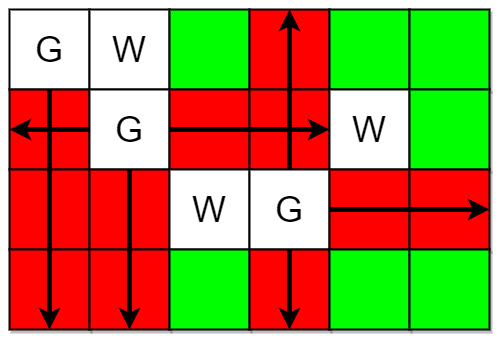

Input: m = 4, n = 6, guards = [[0,0],[1,1],[2,3]], walls = [[0,1],[2,2],[1,4]]
Output: 7
Explanation: The guarded and unguarded cells are shown in red and green respectively in the above diagram.
There are a total of 7 unguarded cells, so we return 7.
Example 2:

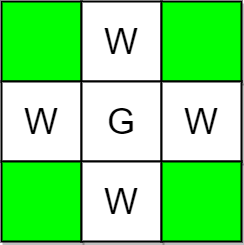

Input: m = 3, n = 3, guards = [[1,1]], walls = [[0,1],[1,0],[2,1],[1,2]]
Output: 4
Explanation: The unguarded cells are shown in green in the above diagram.
There are a total of 4 unguarded cells, so we return 4.


Constraints:

1 <= m, n <= 105
2 <= m * n <= 105
1 <= guards.length, walls.length <= 5 * 104
2 <= guards.length + walls.length <= m * n
guards[i].length == walls[j].length == 2
0 <= rowi, rowj < m
0 <= coli, colj < n
All the positions in guards and walls are unique.

## Solution: Simulation

In [ ]:
m = 8; n = 9; guards = [[5,8],[5,5],[4,6],[0,5],[6,5]]; walls = [[4,1]]
grid= [[0]*n for _ in range(m)]
#Mark Guard cells as 1
for row,col in guards:
    grid[row][col]=1
#Mark Wall cells as 2
for row,col in walls:
    grid[row][col]=2
#Scan right from each guard cell, Mark guarded cells as 3
for r,c in guards:
    for i in range(c+1,n):
        if grid[r][i] in [1,2]:
            break
        grid[r][i]=3
#Scan left from each guard cell, Mark guarded cells as 3
for r,c in guards:
    for i in reversed(range(c)):
        if grid[r][i] in [1,2]:
            break
        grid[r][i]=3
#Scan top from each guard cell, Mark guarded cells as 3
for r,c in guards:
    for i in reversed(range(r)):
        if grid[i][c] in [1,2]:
            break
        grid[i][c]=3
#Scan bottom from each guard cell, Mark guarded cells as 3
for r,c in guards:
    for i in range(r+1,m):
        if grid[i][c] in [1,2]:
            break
        grid[i][c]=3
res=0
for row in grid:
    for num in row:
        if num==0:
            res+=1
res

25

In [ ]:
grid

[[3, 3, 3, 3, 3, 1, 3, 3, 3],
 [0, 0, 0, 0, 0, 3, 3, 0, 3],
 [0, 0, 0, 0, 0, 3, 3, 0, 3],
 [0, 0, 0, 0, 0, 3, 3, 0, 3],
 [3, 2, 0, 0, 0, 3, 1, 3, 3],
 [3, 3, 3, 3, 3, 1, 3, 3, 1],
 [3, 3, 3, 3, 3, 1, 3, 3, 3],
 [0, 0, 0, 0, 0, 3, 3, 0, 3]]

---

# Notebook: `2169_Count_Operations_to_Obtain_Zero.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2169_Count_Operations_to_Obtain_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2169. Count Operations to Obtain Zero

You are given two non-negative integers num1 and num2.

In one operation, if num1 >= num2, you must subtract num2 from num1, otherwise subtract num1 from num2.

For example, if num1 = 5 and num2 = 4, subtract num2 from num1, thus obtaining num1 = 1 and num2 = 4. However, if num1 = 4 and num2 = 5, after one operation, num1 = 4 and num2 = 1.
Return the number of operations required to make either num1 = 0 or num2 = 0.



Example 1:

Input: num1 = 2, num2 = 3
Output: 3
Explanation:
- Operation 1: num1 = 2, num2 = 3. Since num1 < num2, we subtract num1 from num2 and get num1 = 2, num2 = 3 - 2 = 1.
- Operation 2: num1 = 2, num2 = 1. Since num1 > num2, we subtract num2 from num1.
- Operation 3: num1 = 1, num2 = 1. Since num1 == num2, we subtract num2 from num1.
Now num1 = 0 and num2 = 1. Since num1 == 0, we do not need to perform any further operations.
So the total number of operations required is 3.
Example 2:

Input: num1 = 10, num2 = 10
Output: 1
Explanation:
- Operation 1: num1 = 10, num2 = 10. Since num1 == num2, we subtract num2 from num1 and get num1 = 10 - 10 = 0.
Now num1 = 0 and num2 = 10. Since num1 == 0, we are done.
So the total number of operations required is 1.


Constraints:

0 <= num1, num2 <= 105

## Solution: Simulation

In [ ]:
num1 = 2; num2 = 3
res=0
while num1>0 and num2>0:
    if num1>=num2:
        num1-=num2
    else:
        num2-=num1
    res+=1
res

3

---

# Notebook: `213_House_Robber_II.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/213_House_Robber_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 213. House Robber II

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed. All houses at this place are arranged in a circle. That means the first house is the neighbor of the last one. Meanwhile, adjacent houses have a security system connected, and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.



Example 1:

Input: nums = [2,3,2]
Output: 3
Explanation: You cannot rob house 1 (money = 2) and then rob house 3 (money = 2), because they are adjacent houses.
Example 2:

Input: nums = [1,2,3,1]
Output: 4
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.
Example 3:

Input: nums = [1,2,3]
Output: 3


Constraints:

1 <= nums.length <= 100
0 <= nums[i] <= 1000

## Solution: DFS with memoisation
Since House[1] and House[n] are adjacent, they cannot be robbed together. Therefore, the problem becomes to rob either House[1]-House[n-1] or House[2]-House[n], depending on which choice offers more money. Now the problem has degenerated to the House Robber, which is already been solved.

In [ ]:
nums=[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

def DFS(i,arr,memo): #index,array,memo:dictionary with index as key and their result as values

    if i>=len(arr):
        return 0
    if i in memo:
        return memo[i]

    #skip current house
    skip=DFS(i+1,arr,memo)
    #include the current house
    include=DFS(i+2,arr,memo)+arr[i]
    memo[i]=max(include,skip)

    return memo[i]

n=len(nums)
max(DFS(0,nums[:n-1],{}),DFS(0,nums[1:],{})) if n>1 else nums[0]


16

---

# Notebook: `1578_Minimum_Time_to_Make_Rope_Colorful.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1578_Minimum_Time_to_Make_Rope_Colorful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1578. Minimum Time to Make Rope Colorful

Alice has n balloons arranged on a rope. You are given a 0-indexed string colors where colors[i] is the color of the ith balloon.

Alice wants the rope to be colorful. She does not want two consecutive balloons to be of the same color, so she asks Bob for help. Bob can remove some balloons from the rope to make it colorful. You are given a 0-indexed integer array neededTime where neededTime[i] is the time (in seconds) that Bob needs to remove the ith balloon from the rope.

Return the minimum time Bob needs to make the rope colorful.



Example 1:

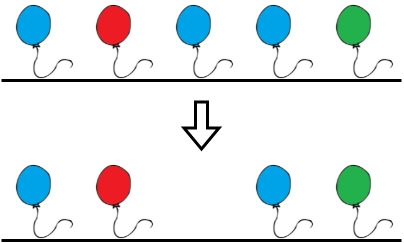


Input: colors = "abaac", neededTime = [1,2,3,4,5]
Output: 3
Explanation: In the above image, 'a' is blue, 'b' is red, and 'c' is green.
Bob can remove the blue balloon at index 2. This takes 3 seconds.
There are no longer two consecutive balloons of the same color. Total time = 3.
Example 2:

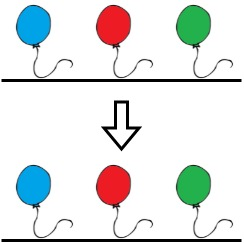

Input: colors = "abc", neededTime = [1,2,3]
Output: 0
Explanation: The rope is already colorful. Bob does not need to remove any balloons from the rope.
Example 3:

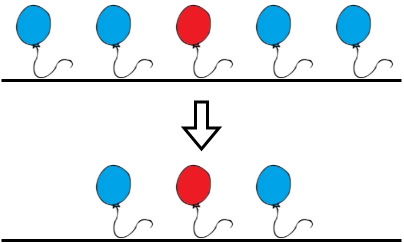

Input: colors = "aabaa", neededTime = [1,2,3,4,1]
Output: 2
Explanation: Bob will remove the balloons at indices 0 and 4. Each balloons takes 1 second to remove.
There are no longer two consecutive balloons of the same color. Total time = 1 + 1 = 2.


Constraints:

n == colors.length == neededTime.length
1 <= n <= 105
1 <= neededTime[i] <= 104
colors contains only lowercase English letters.

## Solution: Two pointers greedy

In [ ]:
colors = "aaabbbabbbb"; neededTime = [3,5,10,7,5,3,5,5,4,8,1]
res=0
l=0
for r in range(1,len(colors)):
    if colors[l]==colors[r]:
        if neededTime[r]>neededTime[l]:
            res+=(neededTime[l])
            l=r
        else:
            res+=(neededTime[r])

    else:
        l=r
res

26

---

# Notebook: `1526_Minimum_Number_of_Increments_on_Subarrays_to_Form_a_Target_Array.ipynb`

*Last modified: 2025-11-16 20:54:40*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1526_Minimum_Number_of_Increments_on_Subarrays_to_Form_a_Target_Array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1526. Minimum Number of Increments on Subarrays to Form a Target Array

You are given an integer array target. You have an integer array initial of the same size as target with all elements initially zeros.

In one operation you can choose any subarray from initial and increment each value by one.

Return the minimum number of operations to form a target array from initial.

The test cases are generated so that the answer fits in a 32-bit integer.



Example 1:

Input: target = [1,2,3,2,1]
Output: 3
Explanation: We need at least 3 operations to form the target array from the initial array.
[0,0,0,0,0] increment 1 from index 0 to 4 (inclusive).
[1,1,1,1,1] increment 1 from index 1 to 3 (inclusive).
[1,2,2,2,1] increment 1 at index 2.
[1,2,3,2,1] target array is formed.
Example 2:

Input: target = [3,1,1,2]
Output: 4
Explanation: [0,0,0,0] -> [1,1,1,1] -> [1,1,1,2] -> [2,1,1,2] -> [3,1,1,2]
Example 3:

Input: target = [3,1,5,4,2]
Output: 7
Explanation: [0,0,0,0,0] -> [1,1,1,1,1] -> [2,1,1,1,1] -> [3,1,1,1,1] -> [3,1,2,2,2] -> [3,1,3,3,2] -> [3,1,4,4,2] -> [3,1,5,4,2].


Constraints:

1 <= target.length <= 105
1 <= target[i] <= 105

## Solution: Greedy Algo:

1. Since subarray is contiguos, think of the nos. as heights of bars.
2. We scan the array from left to right.
3. We first raise the bar from as many times as the 1st element of the array.
4. While passing thru the array if the curr element is > than the previous, then we need to do curr-prev additional operations to raise the bar, i.e. add curr-prev to the result. If it curr<=prev, then no ops are required as the bar is already raised to that height, i.e. no additional ops are required since they are connected.

In [ ]:
target=[3,1,5,4,2]
res=target[0]
for i in range(1,len(target)):
    if target[i]>target[i-1]:
        res+=target[i]-target[i-1]
res

7

---

# Notebook: `1513. Number of Substrings With Only 1s.ipynb`

*Last modified: 2025-11-16 20:53:27*

---

# 1513. Number of Substrings With Only 1s

Given a binary string s, return the number of substrings with all characters 1's. Since the answer may be too large, return it modulo 109 + 7.



Example 1:

Input: s = "0110111"
Output: 9
Explanation: There are 9 substring in total with only 1's characters.
"1" -> 5 times.
"11" -> 3 times.
"111" -> 1 time.
Example 2:

Input: s = "101"
Output: 2
Explanation: Substring "1" is shown 2 times in s.
Example 3:

Input: s = "111111"
Output: 21
Explanation: Each substring contains only 1's characters.


Constraints:

1 <= s.length <= 105
s[i] is either '0' or '1'.

## Solution: Sliding Window

In [ ]:
s = "0110111"
l=0
MOD=10**9+7
res=0
while l<len(s):
    if s[l]=='1':
        r=l
        while r<len(s) and s[r]=='1':
            r+=1
        consecutive=r-l
        res+=consecutive*(consecutive+1)//2
        l=r
    else:
        l+=1
res%MOD

9

---

# Notebook: `3354. Make Array Elements Equal to Zero.ipynb`

*Last modified: 2025-10-29 00:23:15*

---

# 3354. Make Array Elements Equal to Zero

You are given an integer array nums.

Start by selecting a starting position curr such that nums[curr] == 0, and choose a movement direction of either left or right.

After that, you repeat the following process:

If curr is out of the range [0, n - 1], this process ends.
If nums[curr] == 0, move in the current direction by incrementing curr if you are moving right, or decrementing curr if you are moving left.
Else if nums[curr] > 0:
Decrement nums[curr] by 1.
Reverse your movement direction (left becomes right and vice versa).
Take a step in your new direction.
A selection of the initial position curr and movement direction is considered valid if every element in nums becomes 0 by the end of the process.

Return the number of possible valid selections.



Example 1:

Input: nums = [1,0,2,0,3]

Output: 2

Explanation:

The only possible valid selections are the following:

Choose curr = 3, and a movement direction to the left.
[1,0,2,0,3] -> [1,0,2,0,3] -> [1,0,1,0,3] -> [1,0,1,0,3] -> [1,0,1,0,2] -> [1,0,1,0,2] -> [1,0,0,0,2] -> [1,0,0,0,2] -> [1,0,0,0,1] -> [1,0,0,0,1] -> [1,0,0,0,1] -> [1,0,0,0,1] -> [0,0,0,0,1] -> [0,0,0,0,1] -> [0,0,0,0,1] -> [0,0,0,0,1] -> [0,0,0,0,0].
Choose curr = 3, and a movement direction to the right.
[1,0,2,0,3] -> [1,0,2,0,3] -> [1,0,2,0,2] -> [1,0,2,0,2] -> [1,0,1,0,2] -> [1,0,1,0,2] -> [1,0,1,0,1] -> [1,0,1,0,1] -> [1,0,0,0,1] -> [1,0,0,0,1] -> [1,0,0,0,0] -> [1,0,0,0,0] -> [1,0,0,0,0] -> [1,0,0,0,0] -> [0,0,0,0,0].
Example 2:

Input: nums = [2,3,4,0,4,1,0]

Output: 0

Explanation:

There are no possible valid selections.



Constraints:

1 <= nums.length <= 100
0 <= nums[i] <= 100
There is at least one element i where nums[i] == 0.

## Solution: Simulation

In [ ]:
nums = [1,0,2,0,3]
zeros=[i for i in range(len(nums)) if nums[i]==0]
valid=0

def simulate(index,nums,right):
    i=index
    non_zero_cnt=len(nums)-len(zeros)
    nums_copy=nums.copy()
    while 0<=i<len(nums):
        if nums_copy[i]>0:
            nums_copy[i]-=1
            non_zero_cnt-=1 if nums_copy[i]==0 else 0
            if right==True:
                right=False
                i-=1
            else:
                right=True
                i+=1
        else:
            if right==True:
                i+=1
            else:
                i-=1
    return non_zero_cnt

for z in zeros:
    #Explore Right direction
    if simulate(z,nums,True)==0:
        valid+=1
    #Explore Left direction
    if simulate(z,nums,False)==0:
        valid+=1
valid

2

## Alternate Solution:

To eliminate all positive numbers, assume the initial direction is to the right. The sum of the elements on both sides of the initial position should either be equal, or the sum on the right should be exactly 1 greater than the sum on the left. In this case, the ball completes its final bounce on the right and exits to the left. The situation is symmetric when the initial direction is to the left.

We can enumerate each position equal to 0 as an initial position, and use prefix sums to compute the sums of elements on both sides to determine whether it forms a valid selection scheme.

In [ ]:
nums = [1,0,2,0,3]
n=len(nums)
cusum=[nums[0]]*n
valid=0
for i in range(1,n):
    cusum[i]=cusum[i-1]+nums[i]
cusum
for i,num in enumerate(nums):
    if num==0:
        right_sum=cusum[n-1]-cusum[i]
        left_sum=cusum[i]
        #Check Right direction for all zeros
        if right_sum==left_sum+1:
            valid+=1

        #Check Left direction for all zeros
        if left_sum==right_sum+1:
            valid+=1

        #Valid for both directions
        if left_sum==right_sum:
            valid+=2

valid

2

---

# Notebook: `2043. Simple Bank System.ipynb`

*Last modified: 2025-10-26 14:18:37*

---

# 2043. Simple Bank System

You have been tasked with writing a program for a popular bank that will automate all its incoming transactions (transfer, deposit, and withdraw). The bank has n accounts numbered from 1 to n. The initial balance of each account is stored in a 0-indexed integer array balance, with the (i + 1)th account having an initial balance of balance[i].

Execute all the valid transactions. A transaction is valid if:

The given account number(s) are between 1 and n, and
The amount of money withdrawn or transferred from is less than or equal to the balance of the account.
Implement the Bank class:

Bank(long[] balance) Initializes the object with the 0-indexed integer array balance.
boolean transfer(int account1, int account2, long money) Transfers money dollars from the account numbered account1 to the account numbered account2. Return true if the transaction was successful, false otherwise.
boolean deposit(int account, long money) Deposit money dollars into the account numbered account. Return true if the transaction was successful, false otherwise.
boolean withdraw(int account, long money) Withdraw money dollars from the account numbered account. Return true if the transaction was successful, false otherwise.


Example 1:

Input
["Bank", "withdraw", "transfer", "deposit", "transfer", "withdraw"]
[[[10, 100, 20, 50, 30]], [3, 10], [5, 1, 20], [5, 20], [3, 4, 15], [10, 50]]
Output
[null, true, true, true, false, false]

Explanation
Bank bank = new Bank([10, 100, 20, 50, 30]);
bank.withdraw(3, 10);    // return true, account 3 has a balance of $20, so it is valid to withdraw $10.
                         // Account 3 has $20 - $10 = $10.
bank.transfer(5, 1, 20); // return true, account 5 has a balance of $30, so it is valid to transfer $20.
                         // Account 5 has $30 - $20 = $10, and account 1 has $10 + $20 = $30.
bank.deposit(5, 20);     // return true, it is valid to deposit $20 to account 5.
                         // Account 5 has $10 + $20 = $30.
bank.transfer(3, 4, 15); // return false, the current balance of account 3 is $10,
                         // so it is invalid to transfer $15 from it.
bank.withdraw(10, 50);   // return false, it is invalid because account 10 does not exist.


Constraints:

n == balance.length
1 <= n, account, account1, account2 <= 105
0 <= balance[i], money <= 1012
At most 104 calls will be made to each function transfer, deposit, withdraw.

## Solution: Simulate the ops, use a hashmap

In [ ]:
from typing import List
class Bank:

    def __init__(self, balance: List[int]):
        self.mpp={}
        self.balance=balance
        for i in range(len(self.balance)):
            self.mpp[i+1]=self.balance[i]


    def transfer(self, account1: int, account2: int, money: int) -> bool:
        if account1 in self.mpp and account2 in self.mpp and self.mpp[account1]>=money:
            self.mpp[account1]-=money
            self.mpp[account2]+=money
            return True
        return False

    def deposit(self, account: int, money: int) -> bool:
        if account in self.mpp:
            self.mpp[account]+=money
            return True
        return False


    def withdraw(self, account: int, money: int) -> bool:
        if account in self.mpp and self.mpp[account]>=money:
            self.mpp[account]-=money
            return True
        return False

# Your Bank object will be instantiated and called as such:
# obj = Bank(balance)
# param_1 = obj.transfer(account1,account2,money)
# param_2 = obj.deposit(account,money)
# param_3 = obj.withdraw(account,money)

In [ ]:
calls=["Bank","withdraw","transfer","deposit","transfer","withdraw"]
inputs=[[[10,100,20,50,30]],[3,10],[5,1,20],[5,20],[3,4,15],[10,50]]
res=[]
for i in range(len(calls)):
    if calls[i]=="Bank":
        balance=inputs[i][0]
        obj=Bank(balance)
        res.append(None)
    elif calls[i]=="withdraw":
        account,money=inputs[i][0],inputs[i][1]
        res.append(obj.withdraw(account,money))
    elif calls[i]=="transfer":
        account1,account2,money=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.transfer(account1,account2,money))
    else:
        account,money=inputs[i][0],inputs[i][1]
        res.append(obj.deposit(account,money))
res

[None, True, True, True, False, False]

---

# Notebook: `1716. Calculate Money in Leetcode Bank.ipynb`

*Last modified: 2025-10-25 13:17:25*

---

# 1716. Calculate Money in Leetcode Bank

Hercy wants to save money for his first car. He puts money in the Leetcode bank every day.

He starts by putting in $1 on Monday, the first day. Every day from Tuesday to Sunday, he will put in $1 more than the day before. On every subsequent Monday, he will put in $1 more than the previous Monday.

Given n, return the total amount of money he will have in the Leetcode bank at the end of the nth day.



Example 1:

Input: n = 4
Output: 10
Explanation: After the 4th day, the total is 1 + 2 + 3 + 4 = 10.
Example 2:

Input: n = 10
Output: 37
Explanation: After the 10th day, the total is (1 + 2 + 3 + 4 + 5 + 6 + 7) + (2 + 3 + 4) = 37. Notice that on the 2nd Monday, Hercy only puts in $2.
Example 3:

Input: n = 20
Output: 96
Explanation: After the 20th day, the total is (1 + 2 + 3 + 4 + 5 + 6 + 7) + (2 + 3 + 4 + 5 + 6 + 7 + 8) + (3 + 4 + 5 + 6 + 7 + 8) = 96.


Constraints:

1 <= n <= 1000

## Solution: Using Math

In [ ]:
n=20
# Calculate total savings after n days.
# Each week, deposits start $1 higher than the previous week.
# 1st week sum = 1+2+...+7 = 28
# For full weeks, use arithmetic progression of weekly sums.
# Then, add remaining days (partial week) using arithmetic formula.
quotient=n//7
res=quotient*28+((quotient-1)*(14+(quotient-2)*7))//2 if quotient>0 else 0
remainder=n%7
res+=(remainder*(remainder+1))//2+quotient*remainder
res


96

---

# Notebook: `2048. Next Greater Numerically Balanced Number.ipynb`

*Last modified: 2025-10-25 12:47:29*

---

# 2048. Next Greater Numerically Balanced Number

An integer x is numerically balanced if for every digit d in the number x, there are exactly d occurrences of that digit in x.

Given an integer n, return the smallest numerically balanced number strictly greater than n.



Example 1:

Input: n = 1
Output: 22
Explanation:
22 is numerically balanced since:
- The digit 2 occurs 2 times.
It is also the smallest numerically balanced number strictly greater than 1.
Example 2:

Input: n = 1000
Output: 1333
Explanation:
1333 is numerically balanced since:
- The digit 1 occurs 1 time.
- The digit 3 occurs 3 times.
It is also the smallest numerically balanced number strictly greater than 1000.
Note that 1022 cannot be the answer because 0 appeared more than 0 times.
Example 3:

Input: n = 3000
Output: 3133
Explanation:
3133 is numerically balanced since:
- The digit 1 occurs 1 time.
- The digit 3 occurs 3 times.
It is also the smallest numerically balanced number strictly greater than 3000.


Constraints:

0 <= n <= 106

## Solution: Brute Force- Enumeration

In [ ]:
from collections import Counter

In [ ]:
n=1000
# Largest number given max n is 10^6 is 1224444
for i in range(n+1,1224444+1):
    mpp=Counter(str(i))
    if all(mpp[ch]==int(ch) for ch in mpp):
        res=i
        break
res

1333

---

# Notebook: `3461. Check If Digits Are Equal in String After Operations I.ipynb`

*Last modified: 2025-10-23 12:39:14*

---

# 3461. Check If Digits Are Equal in String After Operations I

You are given a string s consisting of digits. Perform the following operation repeatedly until the string has exactly two digits:

For each pair of consecutive digits in s, starting from the first digit, calculate a new digit as the sum of the two digits modulo 10.
Replace s with the sequence of newly calculated digits, maintaining the order in which they are computed.
Return true if the final two digits in s are the same; otherwise, return false.



Example 1:

Input: s = "3902"

Output: true

Explanation:

Initially, s = "3902"
First operation:
(s[0] + s[1]) % 10 = (3 + 9) % 10 = 2
(s[1] + s[2]) % 10 = (9 + 0) % 10 = 9
(s[2] + s[3]) % 10 = (0 + 2) % 10 = 2
s becomes "292"
Second operation:
(s[0] + s[1]) % 10 = (2 + 9) % 10 = 1
(s[1] + s[2]) % 10 = (9 + 2) % 10 = 1
s becomes "11"
Since the digits in "11" are the same, the output is true.
Example 2:

Input: s = "34789"

Output: false

Explanation:

Initially, s = "34789".
After the first operation, s = "7157".
After the second operation, s = "862".
After the third operation, s = "48".
Since '4' != '8', the output is false.


Constraints:

3 <= s.length <= 100
s consists of only digits.

## Solution: Simulation

In [ ]:
s = "3902"
def simulate(s):
    string=''
    for i in range(1,len(s)):
        string+=str((int(s[i-1])+int(s[i]))%10)
    return string
while len(s)>2:
    s=simulate(s)
True if s[0]==s[1] else False


True

## Faster Solution

In [ ]:
s = "3902"
l=[int(ch) for ch in s]
def simulate(l):
    res=[]
    for i in range(1,len(l)):
        res.append((l[i-1]+l[i])%10)
    return res
while len(l)>2:
    l=simulate(l)
True if l[0]==l[1] else False

True

---

# Notebook: `389. Find the Difference.ipynb`

*Last modified: 2025-10-22 18:48:56*

---

# 389. Find the Difference

You are given two strings s and t.

String t is generated by random shuffling string s and then add one more letter at a random position.

Return the letter that was added to t.



Example 1:

Input: s = "abcd", t = "abcde"
Output: "e"
Explanation: 'e' is the letter that was added.
Example 2:

Input: s = "", t = "y"
Output: "y"


Constraints:

0 <= s.length <= 1000
t.length == s.length + 1
s and t consist of lowercase English letters.

## Solution: Sorting and Enumeration

In [ ]:
s = "abcd"; t = "abcde"
sorted_s=sorted(s)
sorted_t=sorted(t)
res=''
for i,ch in enumerate(sorted_s):
    if ch!=sorted_t[i]:
        res=ch
        break
res=sorted_t[-1] if res=='' else res
res

'e'

---

# Notebook: `3346. Maximum Frequency of an Element After Performing Operations I.ipynb`

*Last modified: 2025-10-22 01:11:50*

---

# 3346. Maximum Frequency of an Element After Performing Operations I

You are given an integer array nums and two integers k and numOperations.

You must perform an operation numOperations times on nums, where in each operation you:

Select an index i that was not selected in any previous operations.
Add an integer in the range [-k, k] to nums[i].
Return the maximum possible frequency of any element in nums after performing the operations.



Example 1:

Input: nums = [1,4,5], k = 1, numOperations = 2

Output: 2

Explanation:

We can achieve a maximum frequency of two by:

Adding 0 to nums[1]. nums becomes [1, 4, 5].
Adding -1 to nums[2]. nums becomes [1, 4, 4].
Example 2:

Input: nums = [5,11,20,20], k = 5, numOperations = 1

Output: 2

Explanation:

We can achieve a maximum frequency of two by:

Adding 0 to nums[1].


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 105
0 <= k <= 105
0 <= numOperations <= nums.length

## Solution: Enumerate and BS

In [ ]:
nums=[37,30,37];k=26;numOperations = 1
nums.sort()
min_num,max_num=nums[0],nums[-1]
res=0

def bin_search(arr,target,direction): # Returns the index of the no. >= target if dir==left else <=target

    l=0
    r=len(arr)-1
    while l<r:
        mid=(l+r)//2
        if target>arr[mid]:
            l=mid+1
        else:
            r=mid

    if direction=='left':
        return l #Returns index of num>=target
    else:
        if arr[l]==target: #If exact match found
            for i in range(l+1,len(arr)):
                if arr[i]!=target:
                    return i-1

        return len(arr)-1 if target>=max_num else l-1 #If target>=max element or no exact match found, return index of num<=target

#Want all indices j, of nums such that  i-k < nums[j] < i+k. Enumerate all such j's

for i in range(min_num,max_num+1):
    exact_cnt=0 #Exact Match counts
    cnt=0 #Tracks frequency of nums that can be transformed to a number after ops
    exact_left_idx=bin_search(nums,i,'left')
    exact_right_idx=bin_search(nums,i,'right')
    if nums[exact_left_idx]==i and nums[exact_right_idx]==i: # For multiple exact matches, no need to perform ops on them
        exact_cnt=exact_right_idx-exact_left_idx+1

    min_reachable=i-k
    max_reachable=i+k
    left_idx=bin_search(nums,min_reachable,'left')
    right_idx=bin_search(nums,max_reachable,'right')
    #No.of candidates:
    candidate_cnt=right_idx-left_idx+1
    #Prevent double counting if exact match comes within the range:
    if left_idx<=exact_left_idx and right_idx>=exact_right_idx:
        candidate_cnt-=exact_cnt

    cnt=min(candidate_cnt,numOperations)
    res=max(res,cnt+exact_cnt)
    # print('No',i,'total count: ', res,'range: ',(left_idx,right_idx), 'exact match: ',exact_cnt)
res

3

---

# Notebook: `Q2.ipynb`

*Last modified: 2025-10-20 22:50:13*

---

## Solution: Brute Force

In [ ]:
nums=[21,17,8,9,1]
res=0

for i in range(len(nums)):
    seen=set()
    odd_cnt=0
    even_cnt=0

    if nums[i]%2==0:
        even_cnt+=1
    else:
        odd_cnt+=1
    seen.add(nums[i])

    for j in range(i+1,len(nums)):
        if nums[j] not in seen:
            if nums[j]%2==0:
                even_cnt+=1
            else:
                odd_cnt+=1
            seen.add(nums[j])
        if odd_cnt==even_cnt:
            res=max(res,j-i+1)
res

2

---

# Notebook: `1625. Lexicographically Smallest String After Applying Operations.ipynb`

*Last modified: 2025-10-19 13:21:38*

---

# 1625. Lexicographically Smallest String After Applying Operations

You are given a string s of even length consisting of digits from 0 to 9, and two integers a and b.

You can apply either of the following two operations any number of times and in any order on s:

Add a to all odd indices of s (0-indexed). Digits post 9 are cycled back to 0. For example, if s = "3456" and a = 5, s becomes "3951".
Rotate s to the right by b positions. For example, if s = "3456" and b = 1, s becomes "6345".
Return the lexicographically smallest string you can obtain by applying the above operations any number of times on s.

A string a is lexicographically smaller than a string b (of the same length) if in the first position where a and b differ, string a has a letter that appears earlier in the alphabet than the corresponding letter in b. For example, "0158" is lexicographically smaller than "0190" because the first position they differ is at the third letter, and '5' comes before '9'.



Example 1:

Input: s = "5525", a = 9, b = 2
Output: "2050"
Explanation: We can apply the following operations:
Start:  "5525"
Rotate: "2555"
Add:    "2454"
Add:    "2353"
Rotate: "5323"
Add:    "5222"
Add:    "5121"
Rotate: "2151"
Add:    "2050"​​​​​
There is no way to obtain a string that is lexicographically smaller than "2050".
Example 2:

Input: s = "74", a = 5, b = 1
Output: "24"
Explanation: We can apply the following operations:
Start:  "74"
Rotate: "47"
​​​​​​​Add:    "42"
​​​​​​​Rotate: "24"​​​​​​​​​​​​
There is no way to obtain a string that is lexicographically smaller than "24".
Example 3:

Input: s = "0011", a = 4, b = 2
Output: "0011"
Explanation: There are no sequence of operations that will give us a lexicographically smaller string than "0011".


Constraints:

2 <= s.length <= 100
s.length is even.
s consists of digits from 0 to 9 only.
1 <= a <= 9
1 <= b <= s.length - 1

## Solution: DFS with memoization: Enumeration of all possible cases

In [ ]:
class Solution:
    def findLexSmallestString(self, s: str, a: int, b: int) -> str:
        def rotate(s,b):
            l=[s[(i+b)%(len(s))] for i in range(len(s))]
            return ''.join(l)

        def add(s,a):
            l=list(s)
            for i in range(len(l)):
                if i%2!=0:
                    l[i]=str((int(l[i])+a)%10)
            return ''.join(l)

        seen=set() #Stores all possible strings visited
        self.res=s #Update global minimum (Lexicographically smallest string)

        def DFS(cur_str):
            if cur_str in seen:
                return

            seen.add(cur_str) #Update visited

            # Update global minimum
            if cur_str < self.res:
                self.res = cur_str

            next_add=add(cur_str,a)
            next_rotate=rotate(cur_str,b)

            #Explore add
            DFS(next_add)
            #Explore rotate
            DFS(next_rotate)

        DFS(s)
        return self.res
sol=Solution()
sol.findLexSmallestString(s = "43987654", a = 7, b = 3)

'00553311'

---

# Notebook: `3397. Maximum Number of Distinct Elements After Operations.ipynb`

*Last modified: 2025-10-18 13:33:40*

---

# 3397. Maximum Number of Distinct Elements After Operations

You are given an integer array nums and an integer k.

You are allowed to perform the following operation on each element of the array at most once:

Add an integer in the range [-k, k] to the element.
Return the maximum possible number of distinct elements in nums after performing the operations.



Example 1:

Input: nums = [1,2,2,3,3,4], k = 2

Output: 6

Explanation:

nums changes to [-1, 0, 1, 2, 3, 4] after performing operations on the first four elements.

Example 2:

Input: nums = [4,4,4,4], k = 1

Output: 3

Explanation:

By adding -1 to nums[0] and 1 to nums[1], nums changes to [3, 5, 4, 4].



Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109
0 <= k <= 109

## Solution: Greedy

Consider nums[0]. According to the greedy principle, the element should be made as small as possible. Therefore, after the operation, a
0
​
 =nums[0]−k.

Next, consider nums[1]. After the operation, its possible value range is [nums[1]−k,nums[1]+k]. Since the element after the operation must be different from a
0
​
 , the smallest valid value is a
0
​
 +1. According to the greedy principle, to make the element after the operation as small as possible, we have
a
1
​
 =min(max(nums[1]−k,a
0
​
 +1),nums[1]+k).

In [ ]:
nums = [4,4,4,4]; k = 1
nums.sort()
nums[0]-=k
for i in range(1,len(nums)):
    nums[i]=min(max(nums[i]-k,nums[i-1]+1),nums[i]+k)
len(set(nums))

3

## Alternate Solution:
Instead of transforming the list and counting unique, directly count the unique numbers

In [ ]:
nums = [1,1,1,2,2,2,4,4,4,4]; k = 2
nums.sort()
nums[0]-=k
res=1
for i in range(1,len(nums)):
    prev_num=nums[i-1]
    cur_num=nums[i]
    transformed_num=min(max(cur_num-k,prev_num+1),cur_num+k)
    nums[i]=transformed_num
    if transformed_num!=prev_num:
        res+=1
res

8

In [ ]:
nums

[-1, 0, 1, 2, 3, 4, 5, 6, 4, 5]

---

# Notebook: `2598. Smallest Missing Non-negative Integer After Operations.ipynb`

*Last modified: 2025-10-17 00:02:42*

---

2598. Smallest Missing Non-negative Integer After Operations

You are given a 0-indexed integer array nums and an integer value.

In one operation, you can add or subtract value from any element of nums.

For example, if nums = [1,2,3] and value = 2, you can choose to subtract value from nums[0] to make nums = [-1,2,3].
The MEX (minimum excluded) of an array is the smallest missing non-negative integer in it.

For example, the MEX of [-1,2,3] is 0 while the MEX of [1,0,3] is 2.
Return the maximum MEX of nums after applying the mentioned operation any number of times.



Example 1:

Input: nums = [1,-10,7,13,6,8], value = 5
Output: 4
Explanation: One can achieve this result by applying the following operations:
- Add value to nums[1] twice to make nums = [1,0,7,13,6,8]
- Subtract value from nums[2] once to make nums = [1,0,2,13,6,8]
- Subtract value from nums[3] twice to make nums = [1,0,2,3,6,8]
The MEX of nums is 4. It can be shown that 4 is the maximum MEX we can achieve.
Example 2:

Input: nums = [1,-10,7,13,6,8], value = 7
Output: 2
Explanation: One can achieve this result by applying the following operation:
- subtract value from nums[2] once to make nums = [1,-10,0,13,6,8]
The MEX of nums is 2. It can be shown that 2 is the maximum MEX we can achieve.


Constraints:

1 <= nums.length, value <= 105
-109 <= nums[i] <= 109

## Solution: Modular Arithmetic with Hashmap

In [ ]:
from collections import Counter

In [ ]:
nums = [3,0,3,2,4,2,1,1,0,4]; value = 5
res=0
for i in range(len(nums)):
    nums[i]=nums[i]%value
mpp=Counter(nums)
sequence=[]
for key in sorted(mpp.keys()):
    transformed_num=key
    while mpp[key]>0:
        sequence.append(transformed_num)
        transformed_num+=value
        mpp[key]-=1
sequence.sort()
for val in sequence:
    if res!=val:
        break
    res+=1
res

10

## Alternate Solution: Short and Fast

In [ ]:
nums = [3,0,3,2,4,2,1,1,0,4]; value = 5
res=0
mpp=Counter(num%value for num in nums)
while mpp[res%value]>0:
    mpp[res%value]-=1
    res+=1
res


10

---

# Notebook: `3350. Adjacent Increasing Subarrays Detection II.ipynb`

*Last modified: 2025-10-16 00:39:04*

---

# 3350. Adjacent Increasing Subarrays Detection II

Given an array nums of n integers, your task is to find the maximum value of k for which there exist two adjacent subarrays of length k each, such that both subarrays are strictly increasing. Specifically, check if there are two subarrays of length k starting at indices a and b (a < b), where:

Both subarrays nums[a..a + k - 1] and nums[b..b + k - 1] are strictly increasing.
The subarrays must be adjacent, meaning b = a + k.
Return the maximum possible value of k.

A subarray is a contiguous non-empty sequence of elements within an array.



Example 1:

Input: nums = [2,5,7,8,9,2,3,4,3,1]

Output: 3

Explanation:

The subarray starting at index 2 is [7, 8, 9], which is strictly increasing.
The subarray starting at index 5 is [2, 3, 4], which is also strictly increasing.
These two subarrays are adjacent, and 3 is the maximum possible value of k for which two such adjacent strictly increasing subarrays exist.
Example 2:

Input: nums = [1,2,3,4,4,4,4,5,6,7]

Output: 2

Explanation:

The subarray starting at index 0 is [1, 2], which is strictly increasing.
The subarray starting at index 2 is [3, 4], which is also strictly increasing.
These two subarrays are adjacent, and 2 is the maximum possible value of k for which two such adjacent strictly increasing subarrays exist.


Constraints:

2 <= nums.length <= 2 * 105
-109 <= nums[i] <= 109

## Solution: Sliding Window
My Detailed Solution: https://leetcode.com/problems/adjacent-increasing-subarrays-detection-ii/solutions/7278128/easy-intuitive-solution-find-longest-adjacent-increasing-subarrays-o-n

In [ ]:
nums = [8,-4,-1,16,20]
points=[] #(start,end)
l=0
for r in range(1,len(nums)):
    if nums[r]<=nums[r-1]:
        points.append([l,r-1])
        l=r
points.append([l,r])

res=(points[0][1]-points[0][0]+1)//2
for i in range(1,len(points)):
    if points[i][0]==points[i-1][1]+1:#cur_start=prev_end+1
        res=max(res,min(points[i][1]-points[i][0]+1,points[i-1][1]-points[i-1][0]+1),(points[i][1]-points[i][0]+1)//2)
res

2

## Improvement: Instead of storing the points, check for consecutive subarrays in the 1st loop

In [ ]:
nums = [2,5,7,8,9,2,3,4,3,1]
l=0
res=1
prev_seq_len=1
for r in range(1,len(nums)):
    if nums[r]<=nums[r-1]:
        cur_seq_len=r-1-l+1
        res=max(res,min(prev_seq_len,cur_seq_len),cur_seq_len//2)
        prev_seq_len=cur_seq_len
        l=r
#Include the last sequence length
last_seq_len=r-l+1
res=max(res,min(prev_seq_len,last_seq_len),last_seq_len//2)
res

3

---

# Notebook: `11. Container With Most Water.ipynb`

*Last modified: 2025-10-14 14:25:21*

---

# 11. Container With Most Water

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

Example 1:

![image.png](attachment:image.png)

Input: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.
Example 2:

Input: height = [1,1]
Output: 1

Constraints:

n == height.length
2 <= n <= 105
0 <= height[i] <= 104

## Solution: Two Pointers
Hint: Try to use two-pointers. Set one pointer to the left and one to the right of the array. Always move the pointer that points to the lower line.

In [ ]:
height = [1,8,6,2,5,4,8,3,7]
r=len(height)-1
l=0
res=0
while l<r:
    ht=min(height[l],height[r])
    vol=ht*(r-l)
    res=max(res,vol)
    if height[l]<height[r]:
        l+=1
    else:
        r-=1
res

49

---

# Notebook: `Pow_of_3.ipynb`

*Last modified: 2025-10-14 14:25:00*

---

## 326. Power of Three

Given an integer n, return true if it is a power of three. Otherwise, return false.

An integer n is a power of three, if there exists an integer x such that n == 3x.

Example 1:

Input: n = 27
Output: true
Explanation: 27 = 33
Example 2:

Input: n = 0
Output: false
Explanation: There is no x where 3x = 0.
Example 3:

Input: n = -1
Output: false
Explanation: There is no x where 3x = (-1).

Constraints:

-231 <= n <= 231 - 1

Follow up: Could you solve it without loops/recursion?

In [ ]:
n=729
n>0 and 3**19%n==0

True

---

# Notebook: `3349. Adjacent Increasing Subarrays Detection I.ipynb`

*Last modified: 2025-10-14 14:24:31*

---

# 3349. Adjacent Increasing Subarrays Detection I

Given an array nums of n integers and an integer k, determine whether there exist two adjacent subarrays of length k such that both subarrays are strictly increasing. Specifically, check if there are two subarrays starting at indices a and b (a < b), where:

Both subarrays nums[a..a + k - 1] and nums[b..b + k - 1] are strictly increasing.
The subarrays must be adjacent, meaning b = a + k.
Return true if it is possible to find two such subarrays, and false otherwise.



Example 1:

Input: nums = [2,5,7,8,9,2,3,4,3,1], k = 3

Output: true

Explanation:

The subarray starting at index 2 is [7, 8, 9], which is strictly increasing.
The subarray starting at index 5 is [2, 3, 4], which is also strictly increasing.
These two subarrays are adjacent, so the result is true.
Example 2:

Input: nums = [1,2,3,4,4,4,4,5,6,7], k = 5

Output: false



Constraints:

2 <= nums.length <= 100
1 < 2 * k <= nums.length
-1000 <= nums[i] <= 1000

## Solution: Sliding Window

In [ ]:
from typing import List
class Solution:
    def hasIncreasingSubarrays(self, nums: List[int], k: int) -> bool:
        if k==1 and len(nums)>=2:
            return True # Since every sequence num is a valid subarray

        winlen=1
        i=1
        prev_idx=0
        while i<len(nums):
            if nums[i-1]<nums[i]: #If increasing
                winlen+=1 #Expand window
                if winlen==k: #Once 1st Valid subarray is found, skip to 2nd element of the consecutive candidate subarray and expand window length
                    i+=1
                    winlen+=1

                elif winlen==2*k: # IF consecutive valid subarrays found
                    return True
                i+=1
            else:
                winlen=1 #Restart window
                i=prev_idx+1 #Go back to index next to the start of the previous 1st subarray
                prev_idx+=1

        return False
sol=Solution()
sol.hasIncreasingSubarrays(nums = [2,5,7,8,9,2,3,4,3,1], k=3)

True

---

# Notebook: `2273. Find Resultant Array After Removing Anagrams.ipynb`

*Last modified: 2025-10-14 00:03:44*

---

# 2273. Find Resultant Array After Removing Anagrams

You are given a 0-indexed string array words, where words[i] consists of lowercase English letters.

In one operation, select any index i such that 0 < i < words.length and words[i - 1] and words[i] are anagrams, and delete words[i] from words. Keep performing this operation as long as you can select an index that satisfies the conditions.

Return words after performing all operations. It can be shown that selecting the indices for each operation in any arbitrary order will lead to the same result.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase using all the original letters exactly once. For example, "dacb" is an anagram of "abdc".



Example 1:

Input: words = ["abba","baba","bbaa","cd","cd"]
Output: ["abba","cd"]
Explanation:
One of the ways we can obtain the resultant array is by using the following operations:
- Since words[2] = "bbaa" and words[1] = "baba" are anagrams, we choose index 2 and delete words[2].
  Now words = ["abba","baba","cd","cd"].
- Since words[1] = "baba" and words[0] = "abba" are anagrams, we choose index 1 and delete words[1].
  Now words = ["abba","cd","cd"].
- Since words[2] = "cd" and words[1] = "cd" are anagrams, we choose index 2 and delete words[2].
  Now words = ["abba","cd"].
We can no longer perform any operations, so ["abba","cd"] is the final answer.
Example 2:

Input: words = ["a","b","c","d","e"]
Output: ["a","b","c","d","e"]
Explanation:
No two adjacent strings in words are anagrams of each other, so no operations are performed.


Constraints:

1 <= words.length <= 100
1 <= words[i].length <= 10
words[i] consists of lowercase English letters.

## Solution: Using Hashmaps

In [ ]:
from collections import Counter
words = ["abba","baba","bbaa","cd","cd"]
res=[]
mpp={}
for i in range(len(words)):
    if Counter(words[i])==mpp: #If Anagram
        continue

    else:
        res.append(words[i])
        mpp=Counter(words[i])
res

['abba', 'cd']

## Alternate: Using sort to check anagrams

In [ ]:
words = ["abba","baba","bbaa","cd","cd"]
res=[words[0]]

for i in range(1,len(words)):
    if sorted(res[-1])==sorted(words[i]): #If Anagram with previous word, skip i.e. do nothing
        continue
    res.append(words[i])

res

['abba', 'cd']

---

# Notebook: `976_Largest_Perimeter_Triangle.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/976_Largest_Perimeter_Triangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 976. Largest Perimeter Triangle

Given an integer array nums, return the largest perimeter of a triangle with a non-zero area, formed from three of these lengths. If it is impossible to form any triangle of a non-zero area, return 0.



Example 1:

Input: nums = [2,1,2]
Output: 5
Explanation: You can form a triangle with three side lengths: 1, 2, and 2.
Example 2:

Input: nums = [1,2,1,10]
Output: 0
Explanation:
You cannot use the side lengths 1, 1, and 2 to form a triangle.
You cannot use the side lengths 1, 1, and 10 to form a triangle.
You cannot use the side lengths 1, 2, and 10 to form a triangle.
As we cannot use any three side lengths to form a triangle of non-zero area, we return 0.


Constraints:

3 <= nums.length <= 104
1 <= nums[i] <= 106

## Solution: Sorting and finding the perimeter of the first valid triangle

In [ ]:
from typing import List
class Solution:
    def largestPerimeter(self, nums: List[int]) -> int:
        nums.sort(reverse=True)

        for i in range(len(nums)-2):
            k=i+2 #side A: nums[i]
            for j in range(i+1,len(nums)-1):
                while k<len(nums):
                    if nums[k]+nums[j]>nums[i]:
                        return nums[i]+nums[j]+nums[k]
                        break
                    k+=1
        return 0
sol=Solution()
sol.largestPerimeter(nums =[3,2,3,4])

10

## Alternate: Sorting and Sliding Window--> Faster and Efficient

In [ ]:
from typing import List
class Solution:
    def largestPerimeter(self, nums: List[int]) -> int:
        nums.sort(reverse=True)

        for i in range(2,len(nums)):
            if nums[i]+nums[i-1]>nums[i-2]:
                return nums[i]+nums[i-1]+nums[i-2]

        return 0
sol=Solution()
sol.largestPerimeter(nums =[3,2,3,4])

10

---

# Notebook: `812_Largest_Triangle_Area.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/812_Largest_Triangle_Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 812. Largest Triangle Area

Given an array of points on the X-Y plane points where points[i] = [xi, yi], return the area of the largest triangle that can be formed by any three different points. Answers within 10-5 of the actual answer will be accepted.



Example 1:

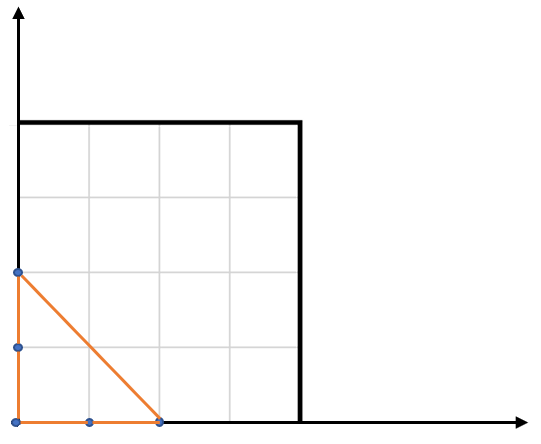


Input: points = [[0,0],[0,1],[1,0],[0,2],[2,0]]
Output: 2.00000
Explanation: The five points are shown in the above figure. The red triangle is the largest.
Example 2:

Input: points = [[1,0],[0,0],[0,1]]
Output: 0.50000


Constraints:

3 <= points.length <= 50
-50 <= xi, yi <= 50
All the given points are unique.

## Simple Brute Force

In [ ]:
points = [[0,44],[-23,-31],[-33,50],[26,20],[5,-35],[27,-2]]
area=0
def tri_area(a,b,c):
    x1,y1=a
    x2,y2=b
    x3,y3=c
    return 0.5*abs(x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2))
for i in range(len(points)-2):
    a=points[i]
    for j in range(i+1,len(points)-1):
        b=points[j]
        for k in range(j+1,len(points)):
            c=points[k]
            if tri_area(a,b,c)>area:
                area=tri_area(a,b,c)
area

2239.5

---

# Notebook: `778_Swim_in_Rising_Water.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/778_Swim_in_Rising_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 778. Swim in Rising Water

You are given an n x n integer matrix grid where each value grid[i][j] represents the elevation at that point (i, j).

It starts raining, and water gradually rises over time. At time t, the water level is t, meaning any cell with elevation less than equal to t is submerged or reachable.

You can swim from a square to another 4-directionally adjacent square if and only if the elevation of both squares individually are at most t. You can swim infinite distances in zero time. Of course, you must stay within the boundaries of the grid during your swim.

Return the minimum time until you can reach the bottom right square (n - 1, n - 1) if you start at the top left square (0, 0).



Example 1:

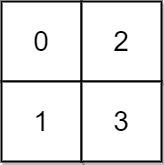

Input: grid = [[0,2],[1,3]]
Output: 3
Explanation:
At time 0, you are in grid location (0, 0).
You cannot go anywhere else because 4-directionally adjacent neighbors have a higher elevation than t = 0.
You cannot reach point (1, 1) until time 3.
When the depth of water is 3, we can swim anywhere inside the grid.
Example 2:

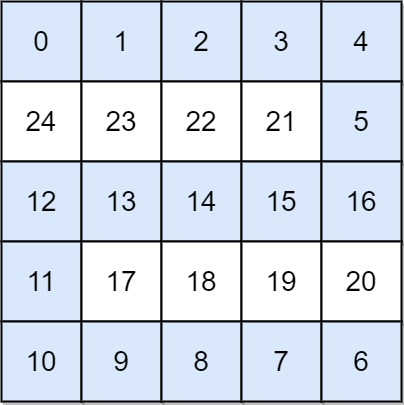

Input: grid = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]
Output: 16
Explanation: The final route is shown.
We need to wait until time 16 so that (0, 0) and (4, 4) are connected.


Constraints:

n == grid.length
n == grid[i].length
1 <= n <= 50
0 <= grid[i][j] < n2
Each value grid[i][j] is unique.

## Solution: Using Dijkstra's algo for shortest path (shortest time in this context)

In [ ]:
import heapq

In [ ]:
grid = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]
dir=[(0,1),(0,-1),(1,0),(-1,0)]
pq=[]
heapq.heappush(pq,(grid[0][0],0,0))
grid[0][0]=-1 #Mark as visited
res=0
while pq:
    max_t,row,col= heapq.heappop(pq) #priority queue ensures that the cell with min. time taken to reach is explored first

    if row==len(grid)-1 and col==len(grid[0])-1:
        res=max_t #Once bottom right cell is reached, return the result
        break

    for d in dir: #Explore all directions
        next_row=row+d[0]
        next_col=col+d[1]
        if 0<=next_row<len(grid) and 0<=next_col<len(grid[0]) and grid[next_row][next_col]!=-1: #If within bounds and cell not visited
            new_t=max(grid[next_row][next_col],max_t) #new_t is the time taken to reach that cell
            heapq.heappush(pq,(new_t,next_row,next_col))
            grid[next_row][next_col]=-1 #Mark as visited
res

16

---

# Notebook: `611_Valid_Triangle_Number.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/611_Valid_Triangle_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 611. Valid Triangle Number

Given an integer array nums, return the number of triplets chosen from the array that can make triangles if we take them as side lengths of a triangle.



Example 1:

Input: nums = [2,2,3,4]
Output: 3
Explanation: Valid combinations are:
2,3,4 (using the first 2)
2,3,4 (using the second 2)
2,2,3
Example 2:

Input: nums = [4,2,3,4]
Output: 4


Constraints:

1 <= nums.length <= 1000
0 <= nums[i] <= 1000

## Solution: Sorting and binary search

In [ ]:
nums = [1,1,3,4]
nums.sort()
res=0
for i in range(len(nums)-2):
    #side A
    a=nums[i]
    for j in range(i+1,len(nums)-1):
        #side B
        b=nums[j]
        #Binary search to find the index k such that nums[k]>=a+b: then all the sides between j and k indices can be used to form a valid traingle
        l=j+1
        r=len(nums)-1
        # Infeasible side C: All sides >= side C cannot form a valid triangle
        c=a+b
        while l<r:
            mid=(l+r)//2
            if c > nums[mid]:
                l=mid+1
            else:
                r=mid

        #add the feasible sides
        res+= l-j-1 if nums[-1]>=c else l-j # add +1 if the last element is less than c as binary search will always give the last element anyway
        print(i,j,l,res)
res

0 1 2 0
0 2 3 0
1 2 3 0


0

## Alternate: Sorting and Linear Search-- Faster

In [ ]:
nums = [2,2,3,4]
nums.sort()
res=0
for i in range(len(nums)-2):
    if nums[i]==0:
        continue
    #side A
    a=nums[i]
    k=i+2
    for j in range(i+1,len(nums)-1):
        if nums[j]==0:
            continue
        #side B
        b=nums[j]
        # Infeasible side C: All sides >= side C cannot form a valid triangle
        c=a+b
        #start from where we left off in the previous step-- this is what makes it efficient
        while k<len(nums) and nums[k]<c:
            k+=1
        #add the feasible sides
        res+= k-j-1
res

3

---

# Notebook: `417_Pacific_Atlantic_Water_Flow.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/417_Pacific_Atlantic_Water_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 417. Pacific Atlantic Water Flow

There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.



Example 1:

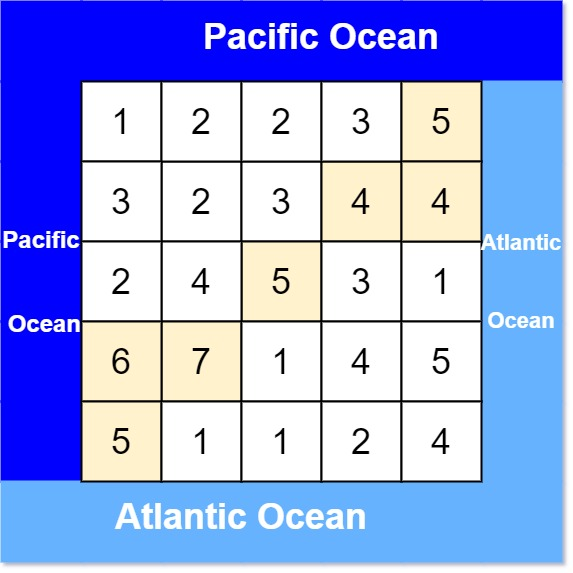

Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
Explanation: The following cells can flow to the Pacific and Atlantic oceans, as shown below:
[0,4]: [0,4] -> Pacific Ocean
       [0,4] -> Atlantic Ocean
[1,3]: [1,3] -> [0,3] -> Pacific Ocean
       [1,3] -> [1,4] -> Atlantic Ocean
[1,4]: [1,4] -> [1,3] -> [0,3] -> Pacific Ocean
       [1,4] -> Atlantic Ocean
[2,2]: [2,2] -> [1,2] -> [0,2] -> Pacific Ocean
       [2,2] -> [2,3] -> [2,4] -> Atlantic Ocean
[3,0]: [3,0] -> Pacific Ocean
       [3,0] -> [4,0] -> Atlantic Ocean
[3,1]: [3,1] -> [3,0] -> Pacific Ocean
       [3,1] -> [4,1] -> Atlantic Ocean
[4,0]: [4,0] -> Pacific Ocean
       [4,0] -> Atlantic Ocean
Note that there are other possible paths for these cells to flow to the Pacific and Atlantic oceans.
Example 2:

Input: heights = [[1]]
Output: [[0,0]]
Explanation: The water can flow from the only cell to the Pacific and Atlantic oceans.


Constraints:

m == heights.length
n == heights[r].length
1 <= m, n <= 200
0 <= heights[r][c] <= 105

## Solution: BFS

Steps to solve

Create a set of co-ordinates from where we can reach pacific ocean. lets call it P_Set.
Create a set of co-ordinates from where we can reach atlantic ocean. lets call it A_Set
Our answer would be intersection of A_Set and P_Set
Calculate P_Set

Add all the boundary co-ordinates to the set along the pacific ocean
Perform BFS to add to the set if curr height > parent height.

In [ ]:
import heapq

In [ ]:
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
m,n=len(heights),len(heights[0])
pacific=set()
atlantic=set()
pacific_pq=[] #Priority queue for pacific
atlantic_pq=[] #Priority queue for atlantic
dir = [(1,0), (-1,0), (0,1), (0,-1)]
for i in range(m):
    pacific.add((i,0)) # Adding the boundary with pacific ocean to the atlantic set,Mark as visited
    heapq.heappush(pacific_pq,(heights[i][0],i,0))

    atlantic.add((i,n-1)) # Adding the boundary with atlantic ocean to the atlantic set,Mark as visited
    heapq.heappush(atlantic_pq,(heights[i][n-1],i,n-1))

for j in range(n):
    pacific.add((0,j)) # Adding the boundary with pacific ocean to the atlantic set,Mark as visited
    heapq.heappush(pacific_pq,(heights[0][j],0,j))

    atlantic.add((m-1,j)) # Adding the boundary with atlantic ocean to the atlantic set,Mark as visited
    heapq.heappush(atlantic_pq,(heights[m-1][j],m-1,j))

#Performing BFS to find out inner cells that can reach border cells along pacific i.e inner cell height>=border cell

while pacific_pq:
    cur_ht,row,col=heapq.heappop(pacific_pq)
    for d in dir:
        next_row,next_col = row+d[0],col+d[1]
        if 0<=next_row<m and 0<=next_col<n and (next_row,next_col) not in pacific: #Within bounds and cell Not visited
            next_ht=heights[next_row][next_col]

            if next_ht>=cur_ht:
                pacific.add((next_row,next_col)) #Mark Visited and a feasible cell
                heapq.heappush(pacific_pq,(heights[next_row][next_col],next_row,next_col))

#Performing BFS to find out inner cells that can reach border cells along atlantic i.e inner cell height>=border cell

while atlantic_pq:
    cur_ht,row,col=heapq.heappop(atlantic_pq)
    for d in dir:
        next_row,next_col = row+d[0],col+d[1]
        if 0<=next_row<m and 0<=next_col<n and (next_row,next_col) not in atlantic: #Within bounds and cell Not visited
            next_ht=heights[next_row][next_col]

            if next_ht>=cur_ht:
                atlantic.add((next_row,next_col)) #Mark Visited and a feasible cell
                heapq.heappush(atlantic_pq,(heights[next_row][next_col],next_row,next_col))

list(pacific.intersection(atlantic)) #Result is the final intersection i.e. cell reaching both atlantic and  pacific ocean

[(4, 0), (0, 4), (3, 1), (1, 4), (3, 0), (2, 2), (1, 3)]

---

# Notebook: `407_Trapping_Rain_Water_II.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/407_Trapping_Rain_Water_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 407. Trapping Rain Water II

Example 1:

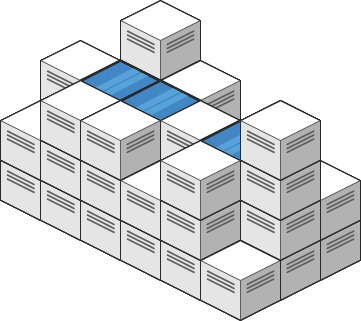

Input: heightMap = [[1,4,3,1,3,2],[3,2,1,3,2,4],[2,3,3,2,3,1]]
Output: 4
Explanation: After the rain, water is trapped between the blocks.
We have two small ponds 1 and 3 units trapped.
The total volume of water trapped is 4.
Example 2:

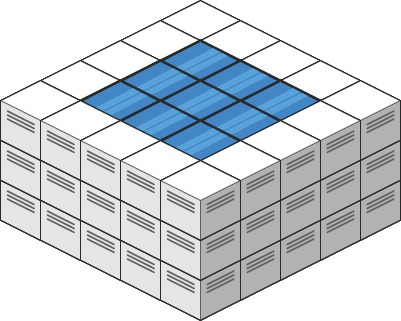

Input: heightMap = [[3,3,3,3,3],[3,2,2,2,3],[3,2,1,2,3],[3,2,2,2,3],[3,3,3,3,3]]
Output: 10


Constraints:

m == heightMap.length
n == heightMap[i].length
1 <= m, n <= 200
0 <= heightMap[i][j] <= 2 * 104

## Solution: BFS

### Aim: to visit each cell with heights in increasing order, and find neighboring cells lower than that level, so that water can be trapped upto that level. Start by visiting the bordering cells

In [ ]:
import heapq
from typing import List

In [ ]:
class Solution:
    def trapRainWater(self, heightMap: List[List[int]]) -> int:
        rows,cols=len(heightMap),len(heightMap[0])
        pq=[] #a priority queue having (height, row, column), auto sorted by height in increasing order
        dir=[(0,1),(0,-1),(1,0),(-1,0)] # North South East West: To explore all directions around a cell
        visited=[[False]*cols for _ in range(rows)] #to track the cells visited
        unvisited=rows*cols #to track the no. of cells not visited
        for r in range(rows):
            for c in range(cols):
                if r in [0,rows-1] or c in [0,cols-1]: # Water cannot be stored in bordering cells, so no need to explore them
                    visited[r][c]=True
                    heapq.heappush(pq,(heightMap[r][c],r,c)) # From the bordering cells, we want to explore the neighboring inner cells
                    unvisited-=1

        trapped_water=0 #The final result
        maxlevel=0 # Current waterline (tallest boundary seen so far)
        #Aim: to visit each cell with heights in increasing order, and find neighboring cells lower than that level, so that water can be trapped upto that level. Start by visiting the bordering cells

        while pq and unvisited>0: # Process cells in order of increasing boundary height
            h,r,c=heapq.heappop(pq) #Pops the cell with min height

            # Update waterline
            maxlevel=max(maxlevel,h) #Stores the max level, only updates when a cell height is more than the previous max height encountered


            #Explore all directions
            for d in dir:
                next_r=r+d[0]
                next_c=c+d[1]

                #Check valid cell
                if (0<=next_r<rows and 0<=next_c<cols) and visited[next_r][next_c]==False:

                    if maxlevel>heightMap[next_r][next_c]: # Can be stored here
                        trapped_water+= maxlevel - heightMap[next_r][next_c]


                    heapq.heappush(pq,(heightMap[next_r][next_c],next_r,next_c)) # Explore connected cells inside, store them in the queue. Low levels will be explored first
                    visited[next_r][next_c]=True
                    unvisited-=1
        return trapped_water

sol=Solution()
sol.trapRainWater(heightMap = [[1,4,3,1,3,2],[3,2,1,3,2,4],[2,3,3,2,3,1]])

4

Solution with each step printed

In [ ]:
heightMap = [[2,3,3,3,2],[3,3,1,1,2],[4,5,5,5,6]]
rows,cols=len(heightMap),len(heightMap[0])
pq=[] #a priority queue having (height, row, column), auto sorted by height in increasing order
dir=[(0,1),(0,-1),(1,0),(-1,0)] # North South East West: To explore all directions around a cell
visited=[[False]*cols for _ in range(rows)] #to track the cells visited
unvisited=rows*cols #to track the no. of cells not visited
for r in range(rows):
    for c in range(cols):
        if r in [0,rows-1] or c in [0,cols-1]: # Water cannot be stored in bordering cells, so no need to explore them
            visited[r][c]=True
            heapq.heappush(pq,(heightMap[r][c],r,c)) # From the bordering cells, we want to explore the neighboring inner cells
            unvisited-=1

trapped_water=0 #The final result
maxlevel=0 # the max level upto where water can be stored next to that cell
#Aim: to visit each cell with heights in increasing order, and find neighboring cells lower than that level, so that water can be trapped upto that level. Start by visiting the bordering cells

while pq and unvisited>0:
    h,r,c=heapq.heappop(pq) #Pops the cell with min height
    print('Pop',h,r,c) #Check
    maxlevel=max(maxlevel,h) #Stores the max level, only updates when a cell height is more than the previous max height encountered
    print('Max_Level',maxlevel) #Check

    #Explore all directions
    for d in dir:
        next_r=r+d[0]
        next_c=c+d[1]

        #Check valid cell
        if (0<=next_r<rows and 0<=next_c<cols) and visited[next_r][next_c]==False:
            print('Neigbours',next_r,next_c) #Check

            if maxlevel>heightMap[next_r][next_c]:
                trapped_water+= maxlevel - heightMap[next_r][next_c]
                print('Can be stored here',heightMap[next_r][next_c],next_r,next_c) #Check

            heapq.heappush(pq,(heightMap[next_r][next_c],next_r,next_c)) # Explore connected cells inside, store them in the queue
            visited[next_r][next_c]=True
            unvisited-=1
trapped_water


Pop 2 0 0
Max_Level 2
Pop 2 0 4
Max_Level 2
Pop 2 1 4
Max_Level 2
Neigbours 1 3
Can be stored here 1 1 3
Pop 1 1 3
Max_Level 2
Neigbours 1 2
Can be stored here 1 1 2
Pop 1 1 2
Max_Level 2
Neigbours 1 1


2

In [ ]:
visited

[[True, True, True, True, True],
 [True, True, True, True, True],
 [True, True, True, True, True]]

In [ ]:
pq

[(3, 0, 1),
 (3, 0, 3),
 (3, 0, 2),
 (4, 2, 0),
 (3, 1, 1),
 (3, 1, 0),
 (5, 2, 3),
 (6, 2, 4),
 (5, 2, 1),
 (5, 2, 2)]

---

# Notebook: `3508_Implement_Router.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3508_Implement_Router.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3508. Implement Router

Design a data structure that can efficiently manage data packets in a network router. Each data packet consists of the following attributes:

source: A unique identifier for the machine that generated the packet.
destination: A unique identifier for the target machine.
timestamp: The time at which the packet arrived at the router.
Implement the Router class:

Router(int memoryLimit): Initializes the Router object with a fixed memory limit.

memoryLimit is the maximum number of packets the router can store at any given time.
If adding a new packet would exceed this limit, the oldest packet must be removed to free up space.
bool addPacket(int source, int destination, int timestamp): Adds a packet with the given attributes to the router.

A packet is considered a duplicate if another packet with the same source, destination, and timestamp already exists in the router.
Return true if the packet is successfully added (i.e., it is not a duplicate); otherwise return false.
int[] forwardPacket(): Forwards the next packet in FIFO (First In First Out) order.

Remove the packet from storage.
Return the packet as an array [source, destination, timestamp].
If there are no packets to forward, return an empty array.
int getCount(int destination, int startTime, int endTime):

Returns the number of packets currently stored in the router (i.e., not yet forwarded) that have the specified destination and have timestamps in the inclusive range [startTime, endTime].
Note that queries for addPacket will be made in increasing order of timestamp.



Example 1:

Input:
["Router", "addPacket", "addPacket", "addPacket", "addPacket", "addPacket", "forwardPacket", "addPacket", "getCount"]
[[3], [1, 4, 90], [2, 5, 90], [1, 4, 90], [3, 5, 95], [4, 5, 105], [], [5, 2, 110], [5, 100, 110]]

Output:
[null, true, true, false, true, true, [2, 5, 90], true, 1]

Explanation

Router router = new Router(3); // Initialize Router with memoryLimit of 3.
router.addPacket(1, 4, 90); // Packet is added. Return True.
router.addPacket(2, 5, 90); // Packet is added. Return True.
router.addPacket(1, 4, 90); // This is a duplicate packet. Return False.
router.addPacket(3, 5, 95); // Packet is added. Return True
router.addPacket(4, 5, 105); // Packet is added, [1, 4, 90] is removed as number of packets exceeds memoryLimit. Return True.
router.forwardPacket(); // Return [2, 5, 90] and remove it from router.
router.addPacket(5, 2, 110); // Packet is added. Return True.
router.getCount(5, 100, 110); // The only packet with destination 5 and timestamp in the inclusive range [100, 110] is [4, 5, 105]. Return 1.
Example 2:

Input:
["Router", "addPacket", "forwardPacket", "forwardPacket"]
[[2], [7, 4, 90], [], []]

Output:
[null, true, [7, 4, 90], []]

Explanation

Router router = new Router(2); // Initialize Router with memoryLimit of 2.
router.addPacket(7, 4, 90); // Return True.
router.forwardPacket(); // Return [7, 4, 90].
router.forwardPacket(); // There are no packets left, return [].


Constraints:

2 <= memoryLimit <= 105
1 <= source, destination <= 2 * 105
1 <= timestamp <= 109
1 <= startTime <= endTime <= 109
At most 105 calls will be made to addPacket, forwardPacket, and getCount methods altogether.
queries for addPacket will be made in increasing order of timestamp.

## Solution: Data Structures used: Deque, hashset and hashmap. Search Technique- Binary Search

In [ ]:
from typing import List
from collections import deque,defaultdict
class Router:

    def __init__(self, memoryLimit: int):
        self.ml=memoryLimit
        self.q=deque()
        self.destmap=defaultdict(list)

    def addPacket(self, source: int, destination: int, timestamp: int) -> bool:
        if (source,destination,timestamp) in self.q:
            return False
        if len(self.q)>=self.ml:
            _,d_old,t_old=self.q.popleft()
            self.destmap[d_old].remove(t_old)

        self.q.append((source,destination,timestamp))
        self.destmap[destination].append(timestamp)
        return True


    def forwardPacket(self) -> List[int]:
        if self.q:
            source,destination,timestamp=self.q.popleft()
            self.destmap[destination].remove(timestamp)
            return [source,destination,timestamp]
        return []


    def getCount(self, destination: int, startTime: int, endTime: int) -> int:
        cnt=0
        for ts in self.destmap[destination]:
            if startTime<=ts<=endTime:
                cnt+=1
        return cnt


# Your Router object will be instantiated and called as such:
# obj = Router(memoryLimit)
# param_1 = obj.addPacket(source,destination,timestamp)
# param_2 = obj.forwardPacket()
# param_3 = obj.getCount(destination,startTime,endTime)

In [ ]:
calls=["Router","addPacket","addPacket","addPacket","addPacket","addPacket","forwardPacket","addPacket","getCount"]
inputs=[[3],[1,4,90],[2,5,90],[1,4,90],[3,5,95],[4,5,105],[],[5,2,110],[5,100,110]]
res=[]
for i in range(len(calls)):
    if calls[i]=="Router":
        memoryLimit=inputs[i][0]
        obj = Router(memoryLimit)
        res.append(None)
    elif calls[i]=="addPacket":
        source,destination,timestamp=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.addPacket(source,destination,timestamp))
    elif calls[i]=="forwardPacket":
        res.append(obj.forwardPacket())
    else:
        destination,startTime,endTime=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.getCount(destination,startTime,endTime))
res

[None, True, True, False, True, True, [2, 5, 90], True, 1]

### Time Limit Exceeded-- Using Binary Search in Next Attempt

In [ ]:
from typing import List
from collections import deque,defaultdict
class Router:

    def __init__(self, memoryLimit: int):
        self.ml=memoryLimit
        self.q=deque()
        self.destmap=defaultdict(list)

    def addPacket(self, source: int, destination: int, timestamp: int) -> bool:
        if (source,destination,timestamp) in self.q:
            return False
        if len(self.q)>=self.ml:
            _,d_old,t_old=self.q.popleft()
            self.destmap[d_old].remove(t_old)

        self.q.append((source,destination,timestamp))
        self.destmap[destination].append(timestamp)
        return True


    def forwardPacket(self) -> List[int]:
        if self.q:
            source,destination,timestamp=self.q.popleft()
            self.destmap[destination].remove(timestamp)
            return [source,destination,timestamp]
        return []


    def getCount(self, destination: int, startTime: int, endTime: int) -> int:

        arr=self.destmap[destination]
        n = len(arr)
        if n == 0:
            return 0

        l,r=0,n-1
        while l<=r:
            mid=(l+r)//2
            if startTime>arr[mid]:
                l=mid+1
            else:
                r=mid-1
        left=l
        l=0
        r=len(arr)-1
        while l<=r:
            mid=(l+r)//2
            if endTime>=arr[mid]:
                l=mid+1
            else:
                r=mid-1
        right=l
        return right-left



# Your Router object will be instantiated and called as such:
# obj = Router(memoryLimit)
# param_1 = obj.addPacket(source,destination,timestamp)
# param_2 = obj.forwardPacket()
# param_3 = obj.getCount(destination,startTime,endTime)

calls=["Router","addPacket","addPacket","addPacket","addPacket","addPacket","forwardPacket","addPacket","getCount"]
inputs=[[3],[1,4,90],[2,5,90],[1,4,90],[3,5,95],[4,5,105],[],[5,2,110],[5,100,110]]
res=[]
for i in range(len(calls)):
    if calls[i]=="Router":
        memoryLimit=inputs[i][0]
        obj = Router(memoryLimit)
        res.append(None)
    elif calls[i]=="addPacket":
        source,destination,timestamp=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.addPacket(source,destination,timestamp))
    elif calls[i]=="forwardPacket":
        res.append(obj.forwardPacket())
    else:
        destination,startTime,endTime=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.getCount(destination,startTime,endTime))
res

[None, True, True, False, True, True, [2, 5, 90], True, 1]

### Still TLE: Implement duplicate packet search in a set instead of the current linear search that we are doing

In [ ]:
from typing import List
from collections import deque,defaultdict
class Router:

    def __init__(self, memoryLimit: int):
        self.ml=memoryLimit
        self.q=deque()
        self.destmap=defaultdict(list)
        self.seen=set()

    def addPacket(self, source: int, destination: int, timestamp: int) -> bool:
        if (source,destination,timestamp) in self.seen:
            return False
        if len(self.q)>=self.ml:
            s_old,d_old,t_old=self.q.popleft()
            self.destmap[d_old].remove(t_old)
            self.seen.remove((s_old,d_old,t_old))

        self.q.append((source,destination,timestamp))
        self.destmap[destination].append(timestamp)
        self.seen.add((source,destination,timestamp))
        return True


    def forwardPacket(self) -> List[int]:
        if self.q:
            source,destination,timestamp=self.q.popleft()
            self.destmap[destination].remove(timestamp)
            self.seen.remove((source,destination,timestamp))
            return [source,destination,timestamp]
        return []


    def getCount(self, destination: int, startTime: int, endTime: int) -> int:

        arr=self.destmap[destination]
        n = len(arr)
        if n == 0:
            return 0

        l,r=0,n-1
        while l<=r:
            mid=(l+r)//2
            if startTime>arr[mid]:
                l=mid+1
            else:
                r=mid-1
        left=l
        l=0
        r=len(arr)-1
        while l<=r:
            mid=(l+r)//2
            if endTime>=arr[mid]:
                l=mid+1
            else:
                r=mid-1
        right=l
        return right-left



# Your Router object will be instantiated and called as such:
# obj = Router(memoryLimit)
# param_1 = obj.addPacket(source,destination,timestamp)
# param_2 = obj.forwardPacket()
# param_3 = obj.getCount(destination,startTime,endTime)

calls=["Router","addPacket","addPacket","addPacket","addPacket","addPacket","forwardPacket","addPacket","getCount"]
inputs=[[3],[1,4,90],[2,5,90],[1,4,90],[3,5,95],[4,5,105],[],[5,2,110],[5,100,110]]
res=[]
for i in range(len(calls)):
    if calls[i]=="Router":
        memoryLimit=inputs[i][0]
        obj = Router(memoryLimit)
        res.append(None)
    elif calls[i]=="addPacket":
        source,destination,timestamp=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.addPacket(source,destination,timestamp))
    elif calls[i]=="forwardPacket":
        res.append(obj.forwardPacket())
    else:
        destination,startTime,endTime=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.getCount(destination,startTime,endTime))
res

[None, True, True, False, True, True, [2, 5, 90], True, 1]

## Accepted!!

---

# Notebook: `3494_Find_the_Minimum_Amount_of_Time_to_Brew_Potions.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3494_Find_the_Minimum_Amount_of_Time_to_Brew_Potions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3494. Find the Minimum Amount of Time to Brew Potions

You are given two integer arrays, skill and mana, of length n and m, respectively.

In a laboratory, n wizards must brew m potions in order. Each potion has a mana capacity mana[j] and must pass through all the wizards sequentially to be brewed properly. The time taken by the ith wizard on the jth potion is timeij = skill[i] * mana[j].

Since the brewing process is delicate, a potion must be passed to the next wizard immediately after the current wizard completes their work. This means the timing must be synchronized so that each wizard begins working on a potion exactly when it arrives. ​

Return the minimum amount of time required for the potions to be brewed properly.



Example 1:

Input: skill = [1,5,2,4], mana = [5,1,4,2]

Output: 110

Explanation:

Potion Number	Start time	Wizard 0 done by	Wizard 1 done by	Wizard 2 done by	Wizard 3 done by
0	0	5	30	40	60
1	52	53	58	60	64
2	54	58	78	86	102
3	86	88	98	102	110
As an example for why wizard 0 cannot start working on the 1st potion before time t = 52, consider the case where the wizards started preparing the 1st potion at time t = 50. At time t = 58, wizard 2 is done with the 1st potion, but wizard 3 will still be working on the 0th potion till time t = 60.

Example 2:

Input: skill = [1,1,1], mana = [1,1,1]

Output: 5

Explanation:

Preparation of the 0th potion begins at time t = 0, and is completed by time t = 3.
Preparation of the 1st potion begins at time t = 1, and is completed by time t = 4.
Preparation of the 2nd potion begins at time t = 2, and is completed by time t = 5.
Example 3:

Input: skill = [1,2,3,4], mana = [1,2]

Output: 21



Constraints:

n == skill.length
m == mana.length
1 <= n, m <= 5000
1 <= mana[i], skill[i] <= 5000

## Solution:-

Prefix_sum with simulation

In [ ]:
skill = [1,5,2,4]
mana = [5,1,4,2]

m, n = len(skill), len(mana)

# prefix_sum[i] = total skill of all wizards up to i
prefix_sum = skill.copy()
for i in range(1, m):
    prefix_sum[i] = prefix_sum[i-1] + skill[i]

next_start = 0                      # Earliest time the next potion can start brewing
cur_end = [0] * m                   # cur_end[i] = time when wizard i finishes current potion

# Loop through each potion (in given order)
for j in range(n):

    # Wizard 0 starts this potion at 'next_start' and finishes after skill[0]*mana[j]
    cur_end[0] = next_start + skill[0] * mana[j]
    prev_end = cur_end              # Keep reference to current potion's completion times

    # Loop through remaining wizards for this potion
    for i in range(1, m):

        # Wizard i starts when wizard i-1 finishes and takes skill[i]*mana[j] time
        cur_end[i] = prev_end[i-1] + skill[i] * mana[j]

        # For all but the last potion, update the earliest possible start time
        # of the next potion so that brewing stages don't overlap
        if j < n - 1:  # next_start for the very last potion isn’t needed
            next_start = max(next_start, cur_end[i] - prefix_sum[i-1] * mana[j+1])

    # Also ensure the next potion doesn't start before wizard 0 finishes the current one
    next_start = max(next_start, cur_end[0])

# The total time when the last wizard finishes the last potion
cur_end[m-1]


110

---

# Notebook: `3186_Maximum_Total_Damage_With_Spell_Casting.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3186_Maximum_Total_Damage_With_Spell_Casting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3186. Maximum Total Damage With Spell Casting

A magician has various spells.

You are given an array power, where each element represents the damage of a spell. Multiple spells can have the same damage value.

It is a known fact that if a magician decides to cast a spell with a damage of power[i], they cannot cast any spell with a damage of power[i] - 2, power[i] - 1, power[i] + 1, or power[i] + 2.

Each spell can be cast only once.

Return the maximum possible total damage that a magician can cast.



Example 1:

Input: power = [1,1,3,4]

Output: 6

Explanation:

The maximum possible damage of 6 is produced by casting spells 0, 1, 3 with damage 1, 1, 4.

Example 2:

Input: power = [7,1,6,6]

Output: 13

Explanation:

The maximum possible damage of 13 is produced by casting spells 1, 2, 3 with damage 1, 6, 6.



Constraints:

1 <= power.length <= 105
1 <= power[i] <= 109

## Solution: Recursion with Memoisation

In [ ]:
from collections import Counter

In [ ]:
power=[3,4,5,6,6,7,1,1,1,1,1,9,9,9,9,9,9,9,9,9,6]  # list of power values
mpp=Counter(power)                                 # frequency count of each unique power
unique_powers = sorted(mpp.keys())                 # sorted list of unique power values
memo={}                                            # memoization dictionary for DFS results
dp=[0]*len(unique_powers)                          # dp array (not used in this version)
def DFS(i):                                        # recursive DFS function with memoization
    if i>=len(unique_powers):                      # base case: if index goes beyond last
        return 0
    if i in memo:                                  # return cached result if already computed
        return memo[i]
    ans=0
    for j in range(i+1,len(unique_powers)):        # find next non-adjacent power (> current + 2)
        if unique_powers[j]>unique_powers[i]+2:
            ans=DFS(j)                             # recursively compute from next valid index
            break

    take=ans+unique_powers[i]*mpp[unique_powers[i]] # choose current element and skip adjacent ones
    skip=DFS(i+1)                                   # skip current element
    memo[i]=max(take,skip)                          # store best result in memo
    return memo[i]                                  # return the best value

DFS(0)                                              # call DFS starting from index 0

104

In [ ]:
unique_powers

[1, 3, 4, 5, 6, 7, 9]

In [ ]:
mpp

Counter({3: 1, 4: 1, 5: 1, 6: 3, 7: 1, 1: 5, 9: 9})

---

# Notebook: `3147_Taking_Maximum_Energy_From_the_Mystic_Dungeon.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3147_Taking_Maximum_Energy_From_the_Mystic_Dungeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3147. Taking Maximum Energy From the Mystic Dungeon

In a mystic dungeon, n magicians are standing in a line. Each magician has an attribute that gives you energy. Some magicians can give you negative energy, which means taking energy from you.

You have been cursed in such a way that after absorbing energy from magician i, you will be instantly transported to magician (i + k). This process will be repeated until you reach the magician where (i + k) does not exist.

In other words, you will choose a starting point and then teleport with k jumps until you reach the end of the magicians' sequence, absorbing all the energy during the journey.

You are given an array energy and an integer k. Return the maximum possible energy you can gain.

Note that when you are reach a magician, you must take energy from them, whether it is negative or positive energy.



Example 1:

Input: energy = [5,2,-10,-5,1], k = 3

Output: 3

Explanation: We can gain a total energy of 3 by starting from magician 1 absorbing 2 + 1 = 3.

Example 2:

Input: energy = [-2,-3,-1], k = 2

Output: -1

Explanation: We can gain a total energy of -1 by starting from magician 2.



Constraints:

1 <= energy.length <= 105
-1000 <= energy[i] <= 1000
1 <= k <= energy.length - 1

## Solution: Start from array end and use DP i.e dp[i]=dp[i+k]+energy[i]

In [ ]:
energy = [5,2,-10,-5,1]; k = 3
dp=[0]*len(energy) #dp[i] = energy we gain starting from index i
for i in range(len(energy)-1,-1,-1):
    if i+k<len(energy):
        dp[i]=dp[i+k]+energy[i]
    else:
        dp[i]=energy[i]
max(dp)

3

---

# Notebook: `3100_Water_Bottles_II.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3100_Water_Bottles_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3100. Water Bottles II

You are given two integers numBottles and numExchange.

numBottles represents the number of full water bottles that you initially have. In one operation, you can perform one of the following operations:

Drink any number of full water bottles turning them into empty bottles.
Exchange numExchange empty bottles with one full water bottle. Then, increase numExchange by one.
Note that you cannot exchange multiple batches of empty bottles for the same value of numExchange. For example, if numBottles == 3 and numExchange == 1, you cannot exchange 3 empty water bottles for 3 full bottles.

Return the maximum number of water bottles you can drink.



Example 1:

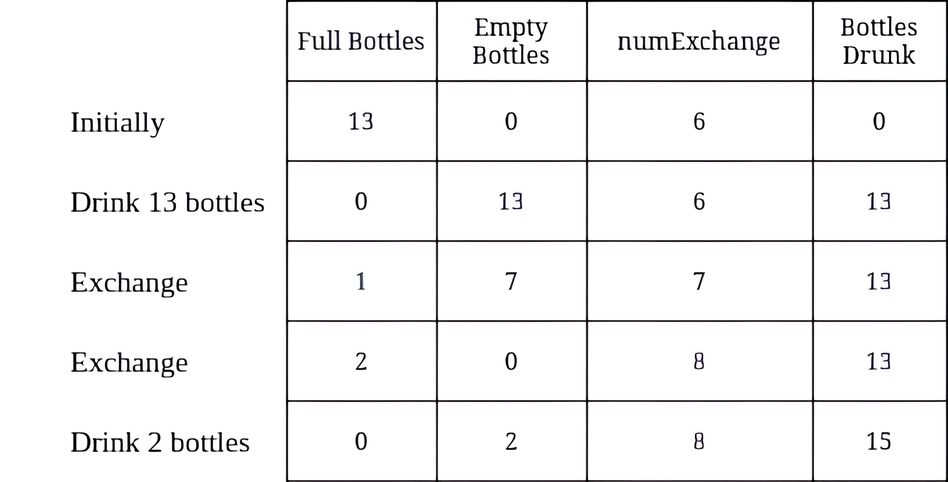

Input: numBottles = 13, numExchange = 6
Output: 15
Explanation: The table above shows the number of full water bottles, empty water bottles, the value of numExchange, and the number of bottles drunk.
Example 2:

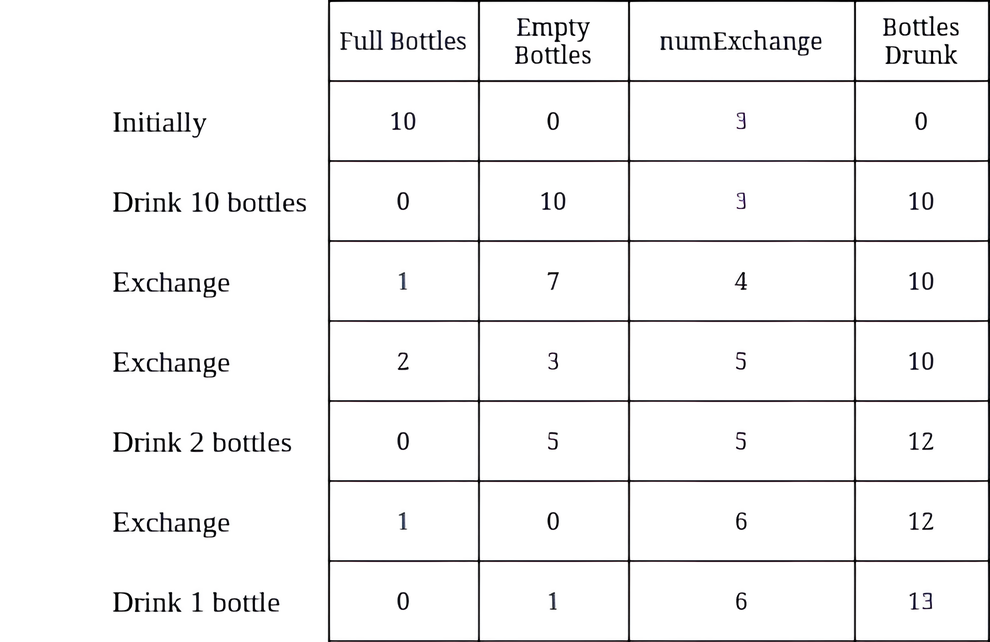

Input: numBottles = 10, numExchange = 3
Output: 13
Explanation: The table above shows the number of full water bottles, empty water bottles, the value of numExchange, and the number of bottles drunk.


Constraints:

1 <= numBottles <= 100
1 <= numExchange <= 100

## Solution: Simulation

In [ ]:
class Solution:
    def maxBottlesDrunk(self, numBottles: int, numExchange: int) -> int:
        res=numBottles
        while numBottles>=numExchange:
            numBottles= numBottles-numExchange+1
            res+=1
            numExchange+=1
        return res
sol=Solution()
sol.maxBottlesDrunk(numBottles = 10, numExchange = 3)

13

## Alternate: Math: Using Sum of AP formula: no. of steps n of exchanges such that empty bottles at nth step <= num_exchange at nth step. We get a quadratic equation in n
Afterall we have to find n because at each step, 1 extra bottle can be drunk. Final solution: numBottles + n

In [ ]:
import math
class Solution:
    def maxBottlesDrunk(self, numBottles: int, numExchange: int)  :
        #Final equation after solving: n^2 + (2numExchange-3)n + 2(1-numBottles) <= 0, Solving by Sridharacharya
        a=1
        b= (2*numExchange-3)
        c= 2*(1-numBottles)
        n= math.floor((-b+ math.sqrt(b**2- 4*a*c))/(2*a))
        return numBottles+n

sol=Solution()
sol.maxBottlesDrunk(numBottles = 13, numExchange = 6)

15

---

# Notebook: `3005_Count_Elements_With_Maximum_Frequency.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3005_Count_Elements_With_Maximum_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3005. Count Elements With Maximum Frequency

You are given an array nums consisting of positive integers.

Return the total frequencies of elements in nums such that those elements all have the maximum frequency.

The frequency of an element is the number of occurrences of that element in the array.



Example 1:

Input: nums = [1,2,2,3,1,4]
Output: 4
Explanation: The elements 1 and 2 have a frequency of 2 which is the maximum frequency in the array.
So the number of elements in the array with maximum frequency is 4.
Example 2:

Input: nums = [1,2,3,4,5]
Output: 5
Explanation: All elements of the array have a frequency of 1 which is the maximum.
So the number of elements in the array with maximum frequency is 5.


Constraints:

1 <= nums.length <= 100
1 <= nums[i] <= 100

In [ ]:
from collections import Counter
nums = [1,2,2,3,1,4]
mpp=Counter(nums)
max_freq=max(mpp.values())
sum(value for value in mpp.values() if value==max_freq)


4

In [ ]:
mpp

Counter({1: 2, 2: 2, 3: 1, 4: 1})

---

# Notebook: `2300_Successful_Pairs_of_Spells_and_Potions.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2300_Successful_Pairs_of_Spells_and_Potions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2300. Successful Pairs of Spells and Potions

You are given two positive integer arrays spells and potions, of length n and m respectively, where spells[i] represents the strength of the ith spell and potions[j] represents the strength of the jth potion.

You are also given an integer success. A spell and potion pair is considered successful if the product of their strengths is at least success.

Return an integer array pairs of length n where pairs[i] is the number of potions that will form a successful pair with the ith spell.



Example 1:

Input: spells = [5,1,3], potions = [1,2,3,4,5], success = 7
Output: [4,0,3]
Explanation:
- 0th spell: 5 * [1,2,3,4,5] = [5,10,15,20,25]. 4 pairs are successful.
- 1st spell: 1 * [1,2,3,4,5] = [1,2,3,4,5]. 0 pairs are successful.
- 2nd spell: 3 * [1,2,3,4,5] = [3,6,9,12,15]. 3 pairs are successful.
Thus, [4,0,3] is returned.
Example 2:

Input: spells = [3,1,2], potions = [8,5,8], success = 16
Output: [2,0,2]
Explanation:
- 0th spell: 3 * [8,5,8] = [24,15,24]. 2 pairs are successful.
- 1st spell: 1 * [8,5,8] = [8,5,8]. 0 pairs are successful.
- 2nd spell: 2 * [8,5,8] = [16,10,16]. 2 pairs are successful.
Thus, [2,0,2] is returned.


Constraints:

n == spells.length
m == potions.length
1 <= n, m <= 105
1 <= spells[i], potions[i] <= 105
1 <= success <= 1010

## Solution: Binary Search

In [ ]:
from typing import List

class Solution:
    def successfulPairs(self, spells: List[int], potions: List[int], success: int) -> List[int]:
        res = []
        potions.sort()  # Sort potions so binary search can be applied

        def bin_search(arr, target):
            # Binary search to find the first index in 'arr' where potion >= target
            l = 0
            r = len(arr) - 1
            while l < r:
                mid = (l + r) // 2
                # If current potion value is smaller than target, move right
                if target > arr[mid]:
                    l = mid + 1
                else:
                    # Otherwise, move left to find the first valid potion
                    r = mid
            return l  # 'l' points to the smallest index where potion >= target

        for s in spells:
            # For each spell, find minimum potion strength needed to reach 'success'
            min_idx = bin_search(potions, success / s)

            # If the smallest potion found satisfies success condition
            # → number of successful pairs = total potions - min_idx
            # Else → no potion can satisfy the condition for this spell
            res.append(len(potions) - 1 - min_idx + 1) if s * potions[min_idx] >= success else res.append(0)

        return res


sol=Solution()
sol.successfulPairs(spells = [5,1,3], potions = [1,2,3,4,5], success = 7)


[4, 0, 3]

---

# Notebook: `2221_Find_Triangular_Sum_of_an_Array.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2221_Find_Triangular_Sum_of_an_Array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2221. Find Triangular Sum of an Array

You are given a 0-indexed integer array nums, where nums[i] is a digit between 0 and 9 (inclusive).

The triangular sum of nums is the value of the only element present in nums after the following process terminates:

Let nums comprise of n elements. If n == 1, end the process. Otherwise, create a new 0-indexed integer array newNums of length n - 1.
For each index i, where 0 <= i < n - 1, assign the value of newNums[i] as (nums[i] + nums[i+1]) % 10, where % denotes modulo operator.
Replace the array nums with newNums.
Repeat the entire process starting from step 1.
Return the triangular sum of nums.



Example 1:


Input: nums = [1,2,3,4,5]
Output: 8
Explanation:
The above diagram depicts the process from which we obtain the triangular sum of the array.
Example 2:

Input: nums = [5]
Output: 5
Explanation:
Since there is only one element in nums, the triangular sum is the value of that element itself.


Constraints:

1 <= nums.length <= 1000
0 <= nums[i] <= 9

## Solution: Simulation

In [ ]:
from typing import List
class Solution:
    def triangularSum(self, nums: List[int]) -> int:
        n=len(nums)

        while n>1:
            temp=[0]*(n-1)
            for i in range(n-1):
                temp[i]=(nums[i]+nums[i+1])%10
            nums=temp
            n-=1
        return sum(nums)
sol=Solution()
sol.triangularSum(nums = [1,2,3,4,5])

8

---

# Notebook: `166_Fraction_to_Recurring_Decimal.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/166_Fraction_to_Recurring_Decimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 166. Fraction to Recurring Decimal

Given two integers representing the numerator and denominator of a fraction, return the fraction in string format.

If the fractional part is repeating, enclose the repeating part in parentheses.

If multiple answers are possible, return any of them.

It is guaranteed that the length of the answer string is less than 104 for all the given inputs.



Example 1:

Input: numerator = 1, denominator = 2
Output: "0.5"
Example 2:

Input: numerator = 2, denominator = 1
Output: "2"
Example 3:

Input: numerator = 4, denominator = 333
Output: "0.(012)"


Constraints:

-231 <= numerator, denominator <= 231 - 1
denominator != 0

## Solution:

Link to my solution: https://leetcode.com/problems/fraction-to-recurring-decimal/solutions/7221013/beats-100-easy-intuitive-long-division-simulation-with-hashmap

In [ ]:
class Solution:
    def fractionToDecimal(self, numerator: int, denominator: int):
        mpp = {}  # map remainder -> quotient digit
        recurring = False

        # Work with absolute values for easier handling
        num, den = abs(numerator), abs(denominator)

        # Integer part of division
        res = str(num // den)

        # First remainder
        remainder = num % den
        if remainder == 0:
            # Exact division, no fractional part
            return '-' + res if numerator * denominator < 0 else res

        # Long division simulation for fractional part
        while remainder > 0:
            if str(remainder) in mpp:
                # If remainder repeats, cycle detected
                mpp[str(remainder)] = '(' + mpp[str(remainder)]
                recurring = True
                break

            # Scale remainder by 10, find next digit
            dividend = remainder * 10
            mpp[str(remainder)] = str(dividend // den)

            # Update remainder
            remainder = dividend % den

        # Build decimal: integer part + fractional digits
        res += '.' + ''.join(mpp.values())

        # Close recurring cycle if exists
        res = res + ')' if recurring else res

        # Adjust sign based on numerator * denominator
        return '-' + res if numerator * denominator < 0 else res

sol=Solution()
sol.fractionToDecimal(numerator = -50, denominator = 8)

'-6.25'

---

# Notebook: `165_Compare_Version_Numbers.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/165_Compare_Version_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 165. Compare Version Numbers

Given two version strings, version1 and version2, compare them. A version string consists of revisions separated by dots '.'. The value of the revision is its integer conversion ignoring leading zeros.

To compare version strings, compare their revision values in left-to-right order. If one of the version strings has fewer revisions, treat the missing revision values as 0.

Return the following:

If version1 < version2, return -1.
If version1 > version2, return 1.
Otherwise, return 0.


Example 1:

Input: version1 = "1.2", version2 = "1.10"

Output: -1

Explanation:

version1's second revision is "2" and version2's second revision is "10": 2 < 10, so version1 < version2.

Example 2:

Input: version1 = "1.01", version2 = "1.001"

Output: 0

Explanation:

Ignoring leading zeroes, both "01" and "001" represent the same integer "1".

Example 3:

Input: version1 = "1.0", version2 = "1.0.0.0"

Output: 0

Explanation:

version1 has less revisions, which means every missing revision are treated as "0".



Constraints:

1 <= version1.length, version2.length <= 500
version1 and version2 only contain digits and '.'.
version1 and version2 are valid version numbers.
All the given revisions in version1 and version2 can be stored in a 32-bit integer.

## Solution:
Use split and compare the strings converted to nums

In [ ]:
version1 = "1.0.1"; version2 = "1"
res=0
version1=version1.split('.')
version2=version2.split('.')
for i in range(max(len(version2),len(version1))):
    a=int(version1[i]) if i<len(version1) else 0
    b=int(version2[i]) if i<len(version2) else 0
    if a<b:
        res=-1
        break
    elif a>b:
        res=1
        break
res


1

---

# Notebook: `1518_Water_Bottles.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1518_Water_Bottles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1518. Water Bottles

There are numBottles water bottles that are initially full of water. You can exchange numExchange empty water bottles from the market with one full water bottle.

The operation of drinking a full water bottle turns it into an empty bottle.

Given the two integers numBottles and numExchange, return the maximum number of water bottles you can drink.



Example 1:

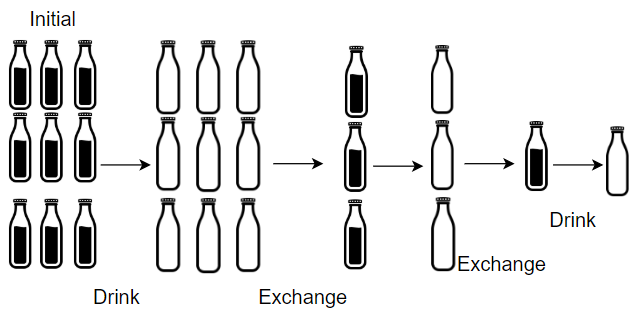


Input: numBottles = 9, numExchange = 3
Output: 13
Explanation: You can exchange 3 empty bottles to get 1 full water bottle.
Number of water bottles you can drink: 9 + 3 + 1 = 13.
Example 2:

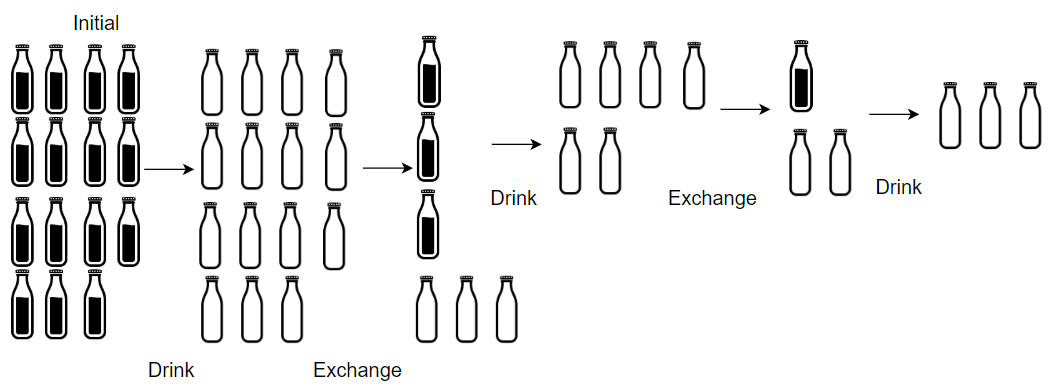
Input: numBottles = 15, numExchange = 4
Output: 19
Explanation: You can exchange 4 empty bottles to get 1 full water bottle.
Number of water bottles you can drink: 15 + 3 + 1 = 19.


Constraints:

1 <= numBottles <= 100
2 <= numExchange <= 100

## Solution: Simulation

In [ ]:
class Solution:
    def numWaterBottles(self, numBottles: int, numExchange: int) -> int:
        res=numBottles
        while numBottles>=numExchange:
            res+=numBottles//numExchange
            numBottles=numBottles//numExchange+numBottles%numExchange
        return res
sol=Solution()
sol.numWaterBottles(numBottles = 9, numExchange = 3)


13

---

# Notebook: `1488_Avoid_Flood_in_The_City.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1488_Avoid_Flood_in_The_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1488. Avoid Flood in The City

Your country has an infinite number of lakes. Initially, all the lakes are empty, but when it rains over the nth lake, the nth lake becomes full of water. If it rains over a lake that is full of water, there will be a flood. Your goal is to avoid floods in any lake.

Given an integer array rains where:

rains[i] > 0 means there will be rains over the rains[i] lake.
rains[i] == 0 means there are no rains this day and you can choose one lake this day and dry it.
Return an array ans where:

ans.length == rains.length
ans[i] == -1 if rains[i] > 0.
ans[i] is the lake you choose to dry in the ith day if rains[i] == 0.
If there are multiple valid answers return any of them. If it is impossible to avoid flood return an empty array.

Notice that if you chose to dry a full lake, it becomes empty, but if you chose to dry an empty lake, nothing changes.



Example 1:

Input: rains = [1,2,3,4]
Output: [-1,-1,-1,-1]
Explanation: After the first day full lakes are [1]
After the second day full lakes are [1,2]
After the third day full lakes are [1,2,3]
After the fourth day full lakes are [1,2,3,4]
There's no day to dry any lake and there is no flood in any lake.
Example 2:

Input: rains = [1,2,0,0,2,1]
Output: [-1,-1,2,1,-1,-1]
Explanation: After the first day full lakes are [1]
After the second day full lakes are [1,2]
After the third day, we dry lake 2. Full lakes are [1]
After the fourth day, we dry lake 1. There is no full lakes.
After the fifth day, full lakes are [2].
After the sixth day, full lakes are [1,2].
It is easy that this scenario is flood-free. [-1,-1,1,2,-1,-1] is another acceptable scenario.
Example 3:

Input: rains = [1,2,0,1,2]
Output: []
Explanation: After the second day, full lakes are  [1,2]. We have to dry one lake in the third day.
After that, it will rain over lakes [1,2]. It's easy to prove that no matter which lake you choose to dry in the 3rd day, the other one will flood.


Constraints:

1 <= rains.length <= 105
0 <= rains[i] <= 109

## Solution: Greedy

In [ ]:
rains = [1,2,0,3,0,3,0,0,3,3,3,0]
filled={}
dry_days=[]
ans=[-1]*len(rains)

for i,r in enumerate(rains):
    if r==0:
        # If there are no filled lakes, we can dry any lake, so we choose lake 1.
        # Otherwise, we add the dry day index to dry_days list.
        if not filled:
            ans[i]=1
        else:
            dry_days.append(i)

    else:
        if r in filled:
            # If the current lake is already filled, we need to find a dry day
            # that occurs after the lake was filled.
            emptied = False
            # Iterate over a copy of dry_days to avoid modifying the list during iteration
            for d in dry_days[:]:
                if d > filled[r]:
                    ans[d]=r
                    dry_days.remove(d)
                    emptied=True
                    break

            if not emptied:
                # If no suitable dry day is found, a flood is unavoidable.
                ans=[]
                break
        # Update the last seen index for the current lake.
        filled[r]=i

# If there are remaining dry days after processing all rains, assign them to lake 1.
if ans and dry_days:
    for d in dry_days:
        ans[d]=1
ans

[]

### Improvement in Solution: Use Binary Search instead of linear search

In [ ]:
rains = [1,2,0,3,0,3,0,0,3,3,3,0]
filled={}
dry_days=[]
ans=[-1]*len(rains)

def bin_search(arr, target):
            # Binary search to find the first index in 'arr' where potion >= target
            l = 0
            r = len(arr)
            while l < r:
                mid = (l + r) // 2
                # If current potion value is smaller than target, move right
                if target >= arr[mid]:
                    l = mid + 1
                else:
                    # Otherwise, move left to find the first valid potion
                    r = mid
            return l  # 'l' points to the smallest index where potion >= target

for i,r in enumerate(rains):
    if r==0:
        # If there are no filled lakes, we can dry any lake, so we choose lake 1.
        # Otherwise, we add the dry day index to dry_days list.
        if not filled:
            ans[i]=1
        else:
            dry_days.append(i)

    else:
        if r in filled:
            # If the current lake is already filled, we need to find a dry day
            # that occurs after the lake was filled.

            # Do Binary Search (Improvement over previous solution)
            idx = bin_search(dry_days, filled[r])
            if idx == len(dry_days):
                # No dry day available after it was last filled → flood unavoidable
                ans = []
                break

            # Assign that dry day to dry this lake
            ans[dry_days[idx]] = r  # Dry lake 'r' on that dry day
            dry_days.pop(idx)       # Remove used dry day
        # Update the last seen index for the current lake.

        filled[r]=i

# If there are remaining dry days after processing all rains, assign them to lake 1.
if ans and dry_days:
    for d in dry_days:
        ans[d]=1
ans

[]

---

# Notebook: `120_Triangle.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/120_Triangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 120. Triangle

Given a triangle array, return the minimum path sum from top to bottom.

For each step, you may move to an adjacent number of the row below. More formally, if you are on index i on the current row, you may move to either index i or index i + 1 on the next row.



Example 1:

Input: triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]
Output: 11
Explanation: The triangle looks like:
   2
  3 4
 6 5 7
4 1 8 3
The minimum path sum from top to bottom is 2 + 3 + 5 + 1 = 11 (underlined above).
Example 2:

Input: triangle = [[-10]]
Output: -10


Constraints:

1 <= triangle.length <= 200
triangle[0].length == 1
triangle[i].length == triangle[i - 1].length + 1
-104 <= triangle[i][j] <= 104


Follow up: Could you do this using only O(n) extra space, where n is the total number of rows in the triangle?

## Solution: DP update
Link to my solution: https://leetcode.com/problems/triangle/solutions/7223393/clean-dp-intuitive-top-down-update

In [ ]:
from typing import List
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        for i in range(1, len(triangle)):
            for j in range(len(triangle[i])):
                if j == 0:
                    # first element → only from directly above
                    triangle[i][j] += triangle[i-1][j]
                elif j == len(triangle[i]) - 1:
                    # last element → only from above-left
                    triangle[i][j] += triangle[i-1][j-1]
                else:
                    # middle elements → min of above and above-left
                    triangle[i][j] += min(triangle[i-1][j], triangle[i-1][j-1])

        # the minimum path sum is the minimum in the last row
        return min(triangle[-1])


sol=Solution()
sol.minimumTotal(triangle = [[-1],[2,3],[1,-1,-3]])


-1

---

# Notebook: `11_Container_With_Most_Water.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/11_Container_With_Most_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11. Container With Most Water

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.



Example 1:

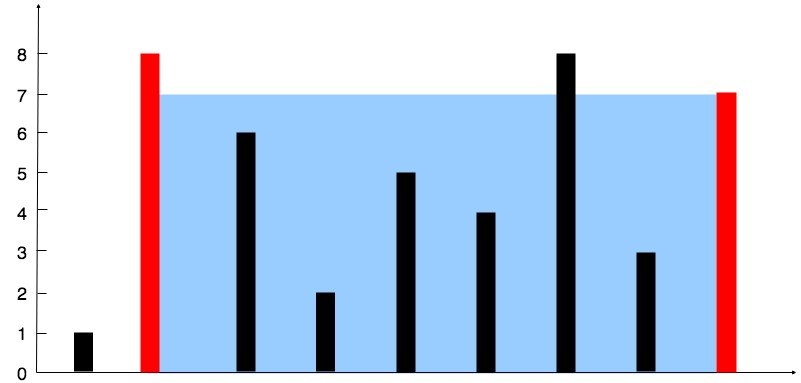


Input: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.
Example 2:

Input: height = [1,1]
Output: 1


Constraints:

n == height.length
2 <= n <= 105
0 <= height[i] <= 104

## Solution: Two pointers, greedy approach:
For max vol, start with widest width, i.e farthest bars, one pointer at each bar, and update max. vol by pushing the pointer to the bar with lower height closer to the other. Move the pointers this way to push closer to each other and update max. vol in each move

In [ ]:
height = [1,8,6,2,5,4,8,3,7]
l=0
r= len(height)-1
max_vol=0
while l<r:
    cur_ht=min(height[l],height[r])
    cur_vol= cur_ht*(r-l)
    max_vol=max(max_vol,cur_vol)
    if cur_ht==height[l]: #Move the pointer pointing to the lower height towards to the other
        l+=1
    else:
        r-=1
max_vol

49

---

# Notebook: `1039_Minimum_Score_Triangulation_of_Polygon.ipynb`

*Last modified: 2025-10-14 00:03:18*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1039_Minimum_Score_Triangulation_of_Polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1039. Minimum Score Triangulation of Polygon

You have a convex n-sided polygon where each vertex has an integer value. You are given an integer array values where values[i] is the value of the ith vertex in clockwise order.

Polygon triangulation is a process where you divide a polygon into a set of triangles and the vertices of each triangle must also be vertices of the original polygon. Note that no other shapes other than triangles are allowed in the division. This process will result in n - 2 triangles.

You will triangulate the polygon. For each triangle, the weight of that triangle is the product of the values at its vertices. The total score of the triangulation is the sum of these weights over all n - 2 triangles.

Return the minimum possible score that you can achieve with some triangulation of the polygon.



Example 1:



Input: values = [1,2,3]

Output: 6

Explanation: The polygon is already triangulated, and the score of the only triangle is 6.

Example 2:



Input: values = [3,7,4,5]

Output: 144

Explanation: There are two triangulations, with possible scores: 3*7*5 + 4*5*7 = 245, or 3*4*5 + 3*4*7 = 144.
The minimum score is 144.

Example 3:



Input: values = [1,3,1,4,1,5]

Output: 13

Explanation: The minimum score triangulation is 1*1*3 + 1*1*4 + 1*1*5 + 1*1*1 = 13.



Constraints:

n == values.length
3 <= n <= 50
1 <= values[i] <= 100

## Solution: Dynamic Programming: DFS with Memoisation
Without loss of generality, there is a triangle that uses adjacent vertices A[0] and A[N-1] (where N = A.length). Depending on your choice K of it, this breaks down the triangulation into two subproblems A[1:K] and A[K+1:N-1].

In [ ]:
values = [1,3,1,4,1,5]
#Memoisation
memo={}
n=len(values)
def DFS(i,j): #DFS(i,j)-> min score triangulation of a polygon from vertices i to j going clockwise (j>i)
    #Base Case
    if j-i<=1:
        return 0
    if (i,j) in memo:
        return memo[(i,j)]

    res=float('inf')
    for k in range(i+1,j): # Where the entire is polygon is divided into 2 other polygons and a triangle: 1 polygon i to k , triangle i,j,k and a polygon k to j
        right_score=DFS(i,k) #Right Polygon
        left_score=DFS(k,j) #Left Polygon
        current_triangle= values[i]*values[j]*values[k] #score of the triangle formed by vertices i,j,k
        res=min(res,left_score+current_triangle+right_score)
    memo[(i,j)]=res
    return res
DFS(0,n-1)

13

---

# Notebook: `3484. Design Spreadsheet.ipynb`

*Last modified: 2025-09-19 18:07:20*

---

# 3484. Design Spreadsheet

A spreadsheet is a grid with 26 columns (labeled from 'A' to 'Z') and a given number of rows. Each cell in the spreadsheet can hold an integer value between 0 and 105.

Implement the Spreadsheet class:

Spreadsheet(int rows) Initializes a spreadsheet with 26 columns (labeled 'A' to 'Z') and the specified number of rows. All cells are initially set to 0.
void setCell(String cell, int value) Sets the value of the specified cell. The cell reference is provided in the format "AX" (e.g., "A1", "B10"), where the letter represents the column (from 'A' to 'Z') and the number represents a 1-indexed row.
void resetCell(String cell) Resets the specified cell to 0.
int getValue(String formula) Evaluates a formula of the form "=X+Y", where X and Y are either cell references or non-negative integers, and returns the computed sum.
Note: If getValue references a cell that has not been explicitly set using setCell, its value is considered 0.



Example 1:

Input:
["Spreadsheet", "getValue", "setCell", "getValue", "setCell", "getValue", "resetCell", "getValue"]
[[3], ["=5+7"], ["A1", 10], ["=A1+6"], ["B2", 15], ["=A1+B2"], ["A1"], ["=A1+B2"]]

Output:
[null, 12, null, 16, null, 25, null, 15]

Explanation

Spreadsheet spreadsheet = new Spreadsheet(3); // Initializes a spreadsheet with 3 rows and 26 columns
spreadsheet.getValue("=5+7"); // returns 12 (5+7)
spreadsheet.setCell("A1", 10); // sets A1 to 10
spreadsheet.getValue("=A1+6"); // returns 16 (10+6)
spreadsheet.setCell("B2", 15); // sets B2 to 15
spreadsheet.getValue("=A1+B2"); // returns 25 (10+15)
spreadsheet.resetCell("A1"); // resets A1 to 0
spreadsheet.getValue("=A1+B2"); // returns 15 (0+15)


Constraints:

1 <= rows <= 103
0 <= value <= 105
The formula is always in the format "=X+Y", where X and Y are either valid cell references or non-negative integers with values less than or equal to 105.
Each cell reference consists of a capital letter from 'A' to 'Z' followed by a row number between 1 and rows.
At most 104 calls will be made in total to setCell, resetCell, and getValue.

## Solution: Hashmap

In [ ]:
class Spreadsheet:

    def __init__(self, rows: int):
        self.rows=rows
        self.mpp={}


    def setCell(self, cell: str, value: int) -> None:
        self.mpp[cell]=value


    def resetCell(self, cell: str) -> None:
        self.mpp[cell]=0


    def getValue(self, formula: str) -> int:
        formula=formula[1:]
        for i in range(len(formula)):
            if formula[i]=='+':
                a=formula[:i]
                b=formula[i+1:]

        a= self.mpp.get(a,0) if a[0].isalpha() else int(a)
        b= self.mpp.get(b,0) if b[0].isalpha() else int(b)
        return a+b

# Your Spreadsheet object will be instantiated and called as such:
# obj = Spreadsheet(rows)
# obj.setCell(cell,value)
# obj.resetCell(cell)
# param_3 = obj.getValue(formula)

In [ ]:
calls=["Spreadsheet","getValue","setCell","getValue","setCell","getValue","resetCell","getValue"]
inputs=[[3],["=5+7"],["A1",10],["=A1+6"],["B2",15],["=A1+B2"],["A1"],["=A1+B2"]]
res=[]
for i in range(len(calls)):
    if calls[i]=="Spreadsheet":
        rows=inputs[i][0]
        obj = Spreadsheet(rows)
        res.append(None)
    elif calls[i]=="getValue":
        formula=inputs[i][0]
        res.append(obj.getValue(formula))
    elif calls[i]=="setCell":
        cell,value=inputs[i][0],inputs[i][1]
        res.append(obj.setCell(cell,value))
    else:
        cell=inputs[i][0]
        res.append(obj.resetCell(cell))
res

[None, 12, None, 16, None, 25, None, 15]

In [ ]:
s='=2+3'
[a,b]=[(ch) for ch in s if ch!='=' and ch!='+']
a,b
a.isalpha()

False

---

# Notebook: `3408. Design Task Manager.ipynb`

*Last modified: 2025-09-18 19:09:45*

---

# 3408. Design Task Manager

There is a task management system that allows users to manage their tasks, each associated with a priority. The system should efficiently handle adding, modifying, executing, and removing tasks.

Implement the TaskManager class:

TaskManager(vector<vector<int>>& tasks) initializes the task manager with a list of user-task-priority triples. Each element in the input list is of the form [userId, taskId, priority], which adds a task to the specified user with the given priority.

void add(int userId, int taskId, int priority) adds a task with the specified taskId and priority to the user with userId. It is guaranteed that taskId does not exist in the system.

void edit(int taskId, int newPriority) updates the priority of the existing taskId to newPriority. It is guaranteed that taskId exists in the system.

void rmv(int taskId) removes the task identified by taskId from the system. It is guaranteed that taskId exists in the system.

int execTop() executes the task with the highest priority across all users. If there are multiple tasks with the same highest priority, execute the one with the highest taskId. After executing, the taskId is removed from the system. Return the userId associated with the executed task. If no tasks are available, return -1.

Note that a user may be assigned multiple tasks.



Example 1:

Input:
["TaskManager", "add", "edit", "execTop", "rmv", "add", "execTop"]
[[[[1, 101, 10], [2, 102, 20], [3, 103, 15]]], [4, 104, 5], [102, 8], [], [101], [5, 105, 15], []]

Output:
[null, null, null, 3, null, null, 5]

Explanation

TaskManager taskManager = new TaskManager([[1, 101, 10], [2, 102, 20], [3, 103, 15]]); // Initializes with three tasks for Users 1, 2, and 3.
taskManager.add(4, 104, 5); // Adds task 104 with priority 5 for User 4.
taskManager.edit(102, 8); // Updates priority of task 102 to 8.
taskManager.execTop(); // return 3. Executes task 103 for User 3.
taskManager.rmv(101); // Removes task 101 from the system.
taskManager.add(5, 105, 15); // Adds task 105 with priority 15 for User 5.
taskManager.execTop(); // return 5. Executes task 105 for User 5.


Constraints:

1 <= tasks.length <= 105
0 <= userId <= 105
0 <= taskId <= 105
0 <= priority <= 109
0 <= newPriority <= 109
At most 2 * 105 calls will be made in total to add, edit, rmv, and execTop methods.
The input is generated such that taskId will be valid.

## Solution: Using a SortedSet exec and a hashmap for referencing in all other operations

In [ ]:
from sortedcontainers import SortedSet

In [ ]:
from typing import List

class TaskManager:

    def __init__(self, tasks: List[List[int]]):

        self.taskmap={}
        self.globalset=SortedSet()
        for userId, taskId, priority in tasks:
            self.taskmap[taskId]=(priority,userId)
            self.globalset.add((priority,taskId,userId))

    def add(self, userId: int, taskId: int, priority: int) -> None:

        self.taskmap[taskId]=(priority,userId)
        self.globalset.add((priority,taskId,userId))
        return None


    def edit(self, taskId: int, newPriority: int) -> None:

        oldpriority,userId=self.taskmap[taskId]
        self.taskmap[taskId]=(newPriority,userId)

        self.globalset.remove((oldpriority,taskId,userId))
        self.globalset.add((newPriority,taskId,userId))

        return None


    def rmv(self, taskId: int) -> None:

        priority,userId=self.taskmap[taskId]
        del self.taskmap[taskId]

        self.globalset.remove((priority,taskId,userId))
        return None



    def execTop(self) -> int:
        if len(self.taskmap)==0:
            return -1
        priority,taskId,userId=self.globalset[-1]
        self.globalset.pop()
        del self.taskmap[taskId]
        return userId


# Your TaskManager object will be instantiated and called as such:
# obj = TaskManager(tasks)
# obj.add(userId,taskId,priority)
# obj.edit(taskId,newPriority)
# obj.rmv(taskId)
# param_4 = obj.execTop()

In [ ]:
calls=["TaskManager","add","edit","execTop","rmv","add","execTop"]
inputs=[[[[1,101,10],[2,102,20],[3,103,15]]],[4,104,5],[102,8],[],[101],[5,105,15],[]]
res=[]
for i in range(len(calls)):
    if calls[i]=="TaskManager":
        tasks=inputs[i][0]
        obj=TaskManager(tasks)
        res.append(None)
    elif calls[i]=="add":
        userId,taskId,priority=inputs[i][0],inputs[i][1],inputs[i][2]
        res.append(obj.add(userId,taskId,priority))
    elif calls[i]=="edit":
        taskId,newPriority=inputs[i][0],inputs[i][1]
        res.append(obj.edit(taskId,newPriority))
    elif calls[i]=="rmv":
        taskId=inputs[i][0]
        res.append(obj.rmv(taskId))
    else:
        res.append(obj.execTop())
res

[None, None, None, 3, None, None, 5]

---

# Notebook: `2353. Design a Food Rating System.ipynb`

*Last modified: 2025-09-18 17:52:54*

---

# 2353. Design a Food Rating System

Design a food rating system that can do the following:

Modify the rating of a food item listed in the system.
Return the highest-rated food item for a type of cuisine in the system.
Implement the FoodRatings class:

FoodRatings(String[] foods, String[] cuisines, int[] ratings) Initializes the system. The food items are described by foods, cuisines and ratings, all of which have a length of n.
foods[i] is the name of the ith food,
cuisines[i] is the type of cuisine of the ith food, and
ratings[i] is the initial rating of the ith food.
void changeRating(String food, int newRating) Changes the rating of the food item with the name food.
String highestRated(String cuisine) Returns the name of the food item that has the highest rating for the given type of cuisine. If there is a tie, return the item with the lexicographically smaller name.
Note that a string x is lexicographically smaller than string y if x comes before y in dictionary order, that is, either x is a prefix of y, or if i is the first position such that x[i] != y[i], then x[i] comes before y[i] in alphabetic order.

Example 1:

Input
["FoodRatings", "highestRated", "highestRated", "changeRating", "highestRated", "changeRating", "highestRated"]
[[["kimchi", "miso", "sushi", "moussaka", "ramen", "bulgogi"], ["korean", "japanese", "japanese", "greek", "japanese", "korean"], [9, 12, 8, 15, 14, 7]], ["korean"], ["japanese"], ["sushi", 16], ["japanese"], ["ramen", 16], ["japanese"]]
Output
[null, "kimchi", "ramen", null, "sushi", null, "ramen"]

Explanation
FoodRatings foodRatings = new FoodRatings(["kimchi", "miso", "sushi", "moussaka", "ramen", "bulgogi"], ["korean", "japanese", "japanese", "greek", "japanese", "korean"], [9, 12, 8, 15, 14, 7]);
foodRatings.highestRated("korean"); // return "kimchi"
                                    // "kimchi" is the highest rated korean food with a rating of 9.
foodRatings.highestRated("japanese"); // return "ramen"
                                      // "ramen" is the highest rated japanese food with a rating of 14.
foodRatings.changeRating("sushi", 16); // "sushi" now has a rating of 16.
foodRatings.highestRated("japanese"); // return "sushi"
                                      // "sushi" is the highest rated japanese food with a rating of 16.
foodRatings.changeRating("ramen", 16); // "ramen" now has a rating of 16.
foodRatings.highestRated("japanese"); // return "ramen"
                                      // Both "sushi" and "ramen" have a rating of 16.
                                      // However, "ramen" is lexicographically smaller than "sushi".


Constraints:

1 <= n <= 2 * 104
n == foods.length == cuisines.length == ratings.length
1 <= foods[i].length, cuisines[i].length <= 10
foods[i], cuisines[i] consist of lowercase English letters.
1 <= ratings[i] <= 108
All the strings in foods are distinct.
food will be the name of a food item in the system across all calls to changeRating.
cuisine will be a type of cuisine of at least one food item in the system across all calls to highestRated.
At most 2 * 104 calls in total will be made to changeRating and highestRated.

## Solution: Using 2 different Hashmaps for efficient searching

In [ ]:
!pip install sortedcontainers

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sortedcontainers import SortedSet

In [ ]:
from typing import List
class FoodRatings:

    def __init__(self, foods: List[str], cuisines: List[str], ratings: List[int]):

        self.foods=foods
        self.cuisines=cuisines
        self.ratings=ratings
        self.foodmap={}
        for i in range(len(self.foods)):
            self.foodmap[self.foods[i]]=[self.ratings[i],self.cuisines[i]]

        self.cuisinemap={}
        for i in range(len(self.cuisines)):
            if self.cuisines[i] in self.cuisinemap:
                self.cuisinemap[self.cuisines[i]].add((-ratings[i],self.foods[i]))
            else:
                self.cuisinemap[self.cuisines[i]]=SortedSet()
                self.cuisinemap[self.cuisines[i]].add((-ratings[i],self.foods[i]))


    def changeRating(self, food: str, newRating: int) -> None:
        oldrating=-self.foodmap[food][0]
        self.foodmap[food][0]=newRating
        cuis=self.foodmap[food][1]
        self.cuisinemap[cuis].remove((oldrating,food))
        self.cuisinemap[cuis].add((-newRating,food))

    def highestRated(self, cuisine: str) -> str:
        return self.cuisinemap[cuisine][0][1]





# Your FoodRatings object will be instantiated and called as such:
# obj = FoodRatings(foods, cuisines, ratings)
# obj.changeRating(food,newRating)
# param_2 = obj.highestRated(cuisine)

In [ ]:
calls=["FoodRatings","highestRated","highestRated","changeRating","highestRated","changeRating","highestRated"]
inputs=[[["kimchi","miso","sushi","moussaka","ramen","bulgogi"],["korean","japanese","japanese","greek","japanese","korean"],[9,12,8,15,14,7]],["korean"],["japanese"],["sushi",16],["japanese"],["ramen",16],["japanese"]]
res=[]
for i in range(len(calls)):
    if calls[i]=="FoodRatings":
        foods, cuisines, ratings=inputs[i][0],inputs[i][1],inputs[i][2]
        obj=FoodRatings(foods, cuisines, ratings)
        res.append(None)
    elif calls[i]=="highestRated":
        cuisine=inputs[i][0]
        res.append(obj.highestRated(cuisine))
    else:
        food,newRating=inputs[i][0],inputs[i][1]
        obj.changeRating(food,newRating)
        res.append(None)
res


[None, 'kimchi', 'ramen', None, 'sushi', None, 'ramen']

---

# Notebook: `1935. Maximum Number of Words You Can Type.ipynb`

*Last modified: 2025-09-16 18:34:45*

---

# 1935. Maximum Number of Words You Can Type

There is a malfunctioning keyboard where some letter keys do not work. All other keys on the keyboard work properly.

Given a string text of words separated by a single space (no leading or trailing spaces) and a string brokenLetters of all distinct letter keys that are broken, return the number of words in text you can fully type using this keyboard.



Example 1:

Input: text = "hello world", brokenLetters = "ad"
Output: 1
Explanation: We cannot type "world" because the 'd' key is broken.
Example 2:

Input: text = "leet code", brokenLetters = "lt"
Output: 1
Explanation: We cannot type "leet" because the 'l' and 't' keys are broken.
Example 3:

Input: text = "leet code", brokenLetters = "e"
Output: 0
Explanation: We cannot type either word because the 'e' key is broken.


Constraints:

1 <= text.length <= 104
0 <= brokenLetters.length <= 26
text consists of words separated by a single space without any leading or trailing spaces.
Each word only consists of lowercase English letters.
brokenLetters consists of distinct lowercase English letters.

## Solution

In [ ]:
text = "hello world"; brokenLetters = "ad"
res=0
for t in text.split():
    if len(set(t).intersection(set(brokenLetters)))==0:
        res+=1
res

1

In [ ]:
text = "hello world"; brokenLetters = "ad"
set('world').intersection(set(brokenLetters))

{'d'}

---

# Notebook: `966. Vowel Spellchecker.ipynb`

*Last modified: 2025-09-14 20:49:09*

---

# 966. Vowel Spellchecker

Given a wordlist, we want to implement a spellchecker that converts a query word into a correct word.

For a given query word, the spell checker handles two categories of spelling mistakes:

Capitalization: If the query matches a word in the wordlist (case-insensitive), then the query word is returned with the same case as the case in the wordlist.
Example: wordlist = ["yellow"], query = "YellOw": correct = "yellow"
Example: wordlist = ["Yellow"], query = "yellow": correct = "Yellow"
Example: wordlist = ["yellow"], query = "yellow": correct = "yellow"
Vowel Errors: If after replacing the vowels ('a', 'e', 'i', 'o', 'u') of the query word with any vowel individually, it matches a word in the wordlist (case-insensitive), then the query word is returned with the same case as the match in the wordlist.
Example: wordlist = ["YellOw"], query = "yollow": correct = "YellOw"
Example: wordlist = ["YellOw"], query = "yeellow": correct = "" (no match)
Example: wordlist = ["YellOw"], query = "yllw": correct = "" (no match)
In addition, the spell checker operates under the following precedence rules:

When the query exactly matches a word in the wordlist (case-sensitive), you should return the same word back.
When the query matches a word up to capitlization, you should return the first such match in the wordlist.
When the query matches a word up to vowel errors, you should return the first such match in the wordlist.
If the query has no matches in the wordlist, you should return the empty string.
Given some queries, return a list of words answer, where answer[i] is the correct word for query = queries[i].



Example 1:

Input: wordlist = ["KiTe","kite","hare","Hare"], queries = ["kite","Kite","KiTe","Hare","HARE","Hear","hear","keti","keet","keto"]
Output: ["kite","KiTe","KiTe","Hare","hare","","","KiTe","","KiTe"]
Example 2:

Input: wordlist = ["yellow"], queries = ["YellOw"]
Output: ["yellow"]


Constraints:

1 <= wordlist.length, queries.length <= 5000
1 <= wordlist[i].length, queries[i].length <= 7
wordlist[i] and queries[i] consist only of only English letters.


## Solution:

Attempt 1 : Logic Issue as per the problem description

In [ ]:
wordlist = ["KiTe","kite","hare","Hare"]; queries = ["kite","Kite","KiTe","Hare","HARE","Hear","hear","keti","keet","keto"]
res=['']*(len(queries))
vowels='aeiouAEIOU'
for i in range(len(queries)):
    if queries[i] in wordlist:
        res[i]=queries[i]

    else:
        a=''.join('*' if ch in vowels else ch for ch in queries[i]).lower()

        for j in range(len(wordlist)):

            if queries[i].lower() == wordlist[j].lower():
                res[i]=wordlist[j]
                break

            elif len(queries[i])==len(wordlist[j]):

                b=''.join("*" if ch in vowels else ch for ch in wordlist[j]).lower()
                if a==b:
                    res[i]=wordlist[j]
                    break
res

['kite', 'KiTe', 'KiTe', 'Hare', 'hare', '', '', 'KiTe', '', 'KiTe']

Attempt 2 : TLE

In [ ]:
wordlist = ["zeo","Zuo"]; queries = ["zuo"]
res=['']*(len(queries))
vowels='aeiouAEIOU'
for i in range(len(queries)):
    if queries[i] in wordlist: #Exact Change
        res[i]=queries[i]

    else:


        for j in range(len(wordlist)): # Case Check

            if queries[i].lower() == wordlist[j].lower():
                res[i]=wordlist[j]
                break

        #Vowel Check
        if res[i]=='':
            a=''.join('*' if ch in vowels else ch for ch in queries[i]).lower()
            for j in range(len(wordlist)):
                if len(queries[i])==len(wordlist[j]):
                    b=''.join("*" if ch in vowels else ch for ch in wordlist[j]).lower()
                    if a==b:
                        res[i]=wordlist[j]
                        break
res

['Zuo']

Attempt 3 : Accepted

In [ ]:
wordlist = ["yellow"]; queries = ["YellOw"]
res=['']*(len(queries))
vowels='aeiouAEIOU'
wordlist_lower=[w.lower() for w in wordlist]
wordlist_vowel=[]

for w in wordlist_lower:
    wordlist_vowel.append(''.join("*" if ch in vowels else ch for ch in w))


for i in range(len(queries)):
    if queries[i] in wordlist: #Exact Check
        res[i]=queries[i]


for i in range(len(queries)): # Case Check
    for j in range(len(wordlist_lower)):
        if queries[i].lower() == wordlist_lower[j]:
            res[i]=wordlist[j] if res[i]=='' else res[i]
            break

for i in range(len(queries)): # Vowel Check
    a=''.join('*' if ch in vowels else ch for ch in queries[i]).lower()
    for j in range(len(wordlist_vowel)):
        if a==wordlist_vowel[j]:
            res[i]=wordlist[j] if res[i]=='' else res[i]
            break
res

['yellow']

---

# Notebook: `3541. Find Most Frequent Vowel and Consonant.ipynb`

*Last modified: 2025-09-14 10:40:39*

---

# 3541. Find Most Frequent Vowel and Consonant

You are given a string s consisting of lowercase English letters ('a' to 'z').

Your task is to:

Find the vowel (one of 'a', 'e', 'i', 'o', or 'u') with the maximum frequency.
Find the consonant (all other letters excluding vowels) with the maximum frequency.
Return the sum of the two frequencies.

Note: If multiple vowels or consonants have the same maximum frequency, you may choose any one of them. If there are no vowels or no consonants in the string, consider their frequency as 0.

The frequency of a letter x is the number of times it occurs in the string.


Example 1:

Input: s = "successes"

Output: 6

Explanation:

The vowels are: 'u' (frequency 1), 'e' (frequency 2). The maximum frequency is 2.
The consonants are: 's' (frequency 4), 'c' (frequency 2). The maximum frequency is 4.
The output is 2 + 4 = 6.
Example 2:

Input: s = "aeiaeia"

Output: 3

Explanation:

The vowels are: 'a' (frequency 3), 'e' ( frequency 2), 'i' (frequency 2). The maximum frequency is 3.
There are no consonants in s. Hence, maximum consonant frequency = 0.
The output is 3 + 0 = 3.


Constraints:

1 <= s.length <= 100
s consists of lowercase English letters only.

## Solution:
Hashmap

In [ ]:
from collections import Counter
s = "successes"
mpp=Counter(s)
max_vowel=0
max_cons=0
for key,value in mpp.items():
    if key in 'aeiou':
        max_vowel=max(max_vowel,value)
    else:
        max_cons=max(max_cons,value)
max_vowel+max_cons

6

---

# Notebook: `1733. Minimum Number of People to Teach.ipynb`

*Last modified: 2025-09-13 13:09:57*

---

# 1733. Minimum Number of People to Teach

On a social network consisting of m users and some friendships between users, two users can communicate with each other if they know a common language.

You are given an integer n, an array languages, and an array friendships where:

There are n languages numbered 1 through n,
languages[i] is the set of languages the i​​​​​​th​​​​ user knows, and
friendships[i] = [u​​​​​​i​​​, v​​​​​​i] denotes a friendship between the users u​​​​​​​​​​​i​​​​​ and vi.
You can choose one language and teach it to some users so that all friends can communicate with each other. Return the minimum number of users you need to teach.

Note that friendships are not transitive, meaning if x is a friend of y and y is a friend of z, this doesn't guarantee that x is a friend of z.


Example 1:

Input: n = 2, languages = [[1],[2],[1,2]], friendships = [[1,2],[1,3],[2,3]]
Output: 1
Explanation: You can either teach user 1 the second language or user 2 the first language.
Example 2:

Input: n = 3, languages = [[2],[1,3],[1,2],[3]], friendships = [[1,4],[1,2],[3,4],[2,3]]
Output: 2
Explanation: Teach the third language to users 1 and 3, yielding two users to teach.


Constraints:

2 <= n <= 500
languages.length == m
1 <= m <= 500
1 <= languages[i].length <= n
1 <= languages[i][j] <= n
1 <= u​​​​​​i < v​​​​​​i <= languages.length
1 <= friendships.length <= 500
All tuples (u​​​​​i, v​​​​​​i) are unique
languages[i] contains only unique values

# Solution:

Greedy, Set

In [ ]:
n = 3; languages = [[2],[1,3],[1,2],[3]]; friendships = [[1,4],[1,2],[3,4],[2,3]]
teach=set() # friend who needs to be taught a language to communicate
for u,v in friendships:
    if set(languages[u-1]).isdisjoint(set(languages[v-1])): # friends start from 1, while indices start from 0
        teach.add(u)
        teach.add(v)
# find how many languages are known by the people to be taught
lang_cnt=[0]*(n+1) # lang_cnt[i]= no. of incommunicable friends knowing the ith language
for friend in teach:
    for lang in languages[friend-1]:
        lang_cnt[lang]+=1
#find the max count of people knowing a particular language. If that language is taught to rest of the incommunicable friends that
#dont know it, it will minimize the no. of people needed to teach
len(teach)-max(lang_cnt)

2

In [ ]:
teach

{1, 2, 3, 4}

---

# Notebook: `3227. Vowels Game in a String.ipynb`

*Last modified: 2025-09-13 02:43:48*

---

# 3227. Vowels Game in a String

Alice and Bob are playing a game on a string.

You are given a string s, Alice and Bob will take turns playing the following game where Alice starts first:

On Alice's turn, she has to remove any non-empty substring from s that contains an odd number of vowels.
On Bob's turn, he has to remove any non-empty substring from s that contains an even number of vowels.
The first player who cannot make a move on their turn loses the game. We assume that both Alice and Bob play optimally.

Return true if Alice wins the game, and false otherwise.

The English vowels are: a, e, i, o, and u.



Example 1:

Input: s = "leetcoder"

Output: true

Explanation:
Alice can win the game as follows:

Alice plays first, she can delete the underlined substring in s = "leetcoder" which contains 3 vowels. The resulting string is s = "der".
Bob plays second, he can delete the underlined substring in s = "der" which contains 0 vowels. The resulting string is s = "er".
Alice plays third, she can delete the whole string s = "er" which contains 1 vowel.
Bob plays fourth, since the string is empty, there is no valid play for Bob. So Alice wins the game.
Example 2:

Input: s = "bbcd"

Output: false

Explanation:
There is no valid play for Alice in her first turn, so Alice loses the game.



Constraints:

1 <= s.length <= 105
s consists only of lowercase English letters.

## Solution

In [ ]:
s = "leetcoder"
n=sum(1 for char in s if char in 'aeiou') #total no. of vowels in s
True if n>0 else False

True

---

# Notebook: `2785. Sort Vowels in a String.ipynb`

*Last modified: 2025-09-13 00:44:44*

---

# 2785. Sort Vowels in a String

Given a 0-indexed string s, permute s to get a new string t such that:

All consonants remain in their original places. More formally, if there is an index i with 0 <= i < s.length such that s[i] is a consonant, then t[i] = s[i].
The vowels must be sorted in the nondecreasing order of their ASCII values. More formally, for pairs of indices i, j with 0 <= i < j < s.length such that s[i] and s[j] are vowels, then t[i] must not have a higher ASCII value than t[j].
Return the resulting string.

The vowels are 'a', 'e', 'i', 'o', and 'u', and they can appear in lowercase or uppercase. Consonants comprise all letters that are not vowels.



Example 1:

Input: s = "lEetcOde"
Output: "lEOtcede"
Explanation: 'E', 'O', and 'e' are the vowels in s; 'l', 't', 'c', and 'd' are all consonants. The vowels are sorted according to their ASCII values, and the consonants remain in the same places.
Example 2:

Input: s = "lYmpH"
Output: "lYmpH"
Explanation: There are no vowels in s (all characters in s are consonants), so we return "lYmpH".


Constraints:

1 <= s.length <= 105
s consists only of letters of the English alphabet in uppercase and lowercase.

## Solution

In [ ]:
s = "lEetcOde"
arr=[]
res=''
for char in s:
    if char in 'aeiouAEIOU':
        arr.append(char)
arr.sort()
j=0
for char in s:
    if char in 'aeiouAEIOU' and j<len(arr):
        res+=arr[j]
        j+=1
    else:
        res+=char
res

'lEOtcede'

['E', 'O', 'e', 'e']

In [ ]:
ord('a')

97

---

# Notebook: `2327. Number of People Aware of a Secret.ipynb`

*Last modified: 2025-09-10 20:53:30*

---

# 2327. Number of People Aware of a Secret

On day 1, one person discovers a secret.

You are given an integer delay, which means that each person will share the secret with a new person every day, starting from delay days after discovering the secret. You are also given an integer forget, which means that each person will forget the secret forget days after discovering it. A person cannot share the secret on the same day they forgot it, or on any day afterwards.

Given an integer n, return the number of people who know the secret at the end of day n. Since the answer may be very large, return it modulo 109 + 7.



Example 1:

Input: n = 6, delay = 2, forget = 4
Output: 5
Explanation:
Day 1: Suppose the first person is named A. (1 person)
Day 2: A is the only person who knows the secret. (1 person)
Day 3: A shares the secret with a new person, B. (2 people)
Day 4: A shares the secret with a new person, C. (3 people)
Day 5: A forgets the secret, and B shares the secret with a new person, D. (3 people)
Day 6: B shares the secret with E, and C shares the secret with F. (5 people)
Example 2:

Input: n = 4, delay = 1, forget = 3
Output: 6
Explanation:
Day 1: The first person is named A. (1 person)
Day 2: A shares the secret with B. (2 people)
Day 3: A and B share the secret with 2 new people, C and D. (4 people)
Day 4: A forgets the secret. B, C, and D share the secret with 3 new people. (6 people)


Constraints:

2 <= n <= 1000
1 <= delay < forget <= n

## Solution: Dynamic Programming

In [ ]:
n = 6; delay = 2; forget = 4

# dp[i] = number of new persons learning the secret on day i
dp = [0]*(n+1)
dp[1] = 1   # On day 1, the secret is initially known by 1 person

for i in range(2, n+1):
    # On day i, new learners come from people who learned the secret earlier
    # A person who learned on day j can share starting from (j+delay),
    # and will forget on (j+forget).
    # So on day i, valid j are in the range [i-forget+1, i-delay].
    # We sum dp[j] for all such j.
    dp[i] = sum(dp[max(1, i-forget+1) : i-delay+1])

# At the end (day n), not everyone remembers the secret.
# Only those who learned it within the last 'forget' days (i.e., from day n-forget+1 to n) still remember.
# So we sum dp over that interval to get the final count.
sum(dp[max(1, n-forget+1) : n+1])


5

Solution with MOD for large nos.

In [ ]:
n = 684; delay = 18; forget = 496
MOD=10**9+7
# dp[i] = number of new persons learning the secret on day i
dp = [0]*(n+1)
dp[1] = 1   # On day 1, the secret is initially known by 1 person
res=0
for i in range(2, n+1):

    # On day i, new learners come from people who learned the secret earlier
    # A person who learned on day j can share starting from (j+delay),
    # and will forget on (j+forget).
    # So on day i, valid j are in the range [i-forget+1, i-delay].
    # We sum dp[j] for all such j.
    for j in range(max(1, i-forget+1),i-delay+1):
        dp[i]=(dp[i]+dp[j])%MOD

# At the end (day n), not everyone remembers the secret.
# Only those who learned it within the last 'forget' days (i.e., from day n-forget+1 to n) still remember.
# So we sum dp over that interval to get the final count.
    if i>=n-forget+1:
        res=(res+dp[i])%MOD

res+dp[1] if 1>=n-forget+1 else res

653668527

In [ ]:
dp

[0, 1, 1, 2, 4]

---

# Notebook: `1304. Find N Unique Integers Sum up to Zero.ipynb`

*Last modified: 2025-09-07 12:09:29*

---

# 1304. Find N Unique Integers Sum up to Zero

Given an integer n, return any array containing n unique integers such that they add up to 0.



Example 1:

Input: n = 5
Output: [-7,-1,1,3,4]
Explanation: These arrays also are accepted [-5,-1,1,2,3] , [-3,-1,2,-2,4].
Example 2:

Input: n = 3
Output: [-1,0,1]
Example 3:

Input: n = 1
Output: [0]


Constraints:

1 <= n <= 1000

## Solution

In [ ]:
n = 6
if n%2!=0: #odd
    res=[i for i in range(-(n//2),n//2+1)]
else: #even
    res=[i for i in range(-(n//2),n//2+1) if i!=0]
res

[-3, -2, -1, 1, 2, 3]

---

# Notebook: `198. House Robber.ipynb`

*Last modified: 2025-09-07 02:02:49*

---

# 198. House Robber

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.



Example 1:

Input: nums = [1,2,3,1]
Output: 4
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.
Example 2:

Input: nums = [2,7,9,3,1]
Output: 12
Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
Total amount you can rob = 2 + 9 + 1 = 12.


Constraints:

1 <= nums.length <= 100
0 <= nums[i] <= 400

## Solution: Recursion: Top Down Approach


TLE

In [ ]:
nums = [1,2,3,1]
def rob(i):
    if i>=len(nums):
        return 0
    #skip this house:
    skip=rob(i+1)
    #include this house:
    include=rob(i+2)+nums[i]
    return max(skip,include) #These are mutually exclusive choices —
    #you cannot skip and include the same house at once.
rob(0)

4

## Using Memoisation: Accepted- Beats 100%

In [ ]:
nums = [1,2,3,1]
cache=[-1]*len(nums)
def rob(i):
    if i>=len(nums):
        return 0
    if cache[i]!=-1:
        return cache[i]
    #skip this house:
    skip=rob(i+1)
    #include this house:
    include=rob(i+2)+nums[i]
    cache[i]=max(skip,include)
    return max(skip,include) #These are mutually exclusive choices —
    #you cannot skip and include the same house at once.
rob(0)

4

---

# Notebook: `3027. Find the Number of Ways to Place People II.ipynb`

*Last modified: 2025-09-04 00:43:05*

---

# 3027. Find the Number of Ways to Place People II

You are given a 2D array points of size n x 2 representing integer coordinates of some points on a 2D-plane, where points[i] = [xi, yi].

We define the right direction as positive x-axis (increasing x-coordinate) and the left direction as negative x-axis (decreasing x-coordinate). Similarly, we define the up direction as positive y-axis (increasing y-coordinate) and the down direction as negative y-axis (decreasing y-coordinate)

You have to place n people, including Alice and Bob, at these points such that there is exactly one person at every point. Alice wants to be alone with Bob, so Alice will build a rectangular fence with Alice's position as the upper left corner and Bob's position as the lower right corner of the fence (Note that the fence might not enclose any area, i.e. it can be a line). If any person other than Alice and Bob is either inside the fence or on the fence, Alice will be sad.

Return the number of pairs of points where you can place Alice and Bob, such that Alice does not become sad on building the fence.

Note that Alice can only build a fence with Alice's position as the upper left corner, and Bob's position as the lower right corner. For example, Alice cannot build either of the fences in the picture below with four corners (1, 1), (1, 3), (3, 1), and (3, 3), because:

With Alice at (3, 3) and Bob at (1, 1), Alice's position is not the upper left corner and Bob's position is not the lower right corner of the fence.
With Alice at (1, 3) and Bob at (1, 1), Bob's position is not the lower right corner of the fence.

 ![image.png](attachment:image.png)

Example 1:

![image-2.png](attachment:image-2.png)


Input: points = [[1,1],[2,2],[3,3]]
Output: 0
Explanation: There is no way to place Alice and Bob such that Alice can build a fence with Alice's position as the upper left corner and Bob's position as the lower right corner. Hence we return 0.
Example 2:

![image-2.png](attachment:image-2.png)

Input: points = [[6,2],[4,4],[2,6]]
Output: 2
Explanation: There are two ways to place Alice and Bob such that Alice will not be sad:
- Place Alice at (4, 4) and Bob at (6, 2).
- Place Alice at (2, 6) and Bob at (4, 4).
You cannot place Alice at (2, 6) and Bob at (6, 2) because the person at (4, 4) will be inside the fence.
Example 3:

![image-3.png](attachment:image-3.png)

Input: points = [[3,1],[1,3],[1,1]]
Output: 2
Explanation: There are two ways to place Alice and Bob such that Alice will not be sad:
- Place Alice at (1, 1) and Bob at (3, 1).
- Place Alice at (1, 3) and Bob at (1, 1).
You cannot place Alice at (1, 3) and Bob at (3, 1) because the person at (1, 1) will be on the fence.
Note that it does not matter if the fence encloses any area, the first and second fences in the image are valid.


Constraints:

2 <= n <= 1000
points[i].length == 2
-109 <= points[i][0], points[i][1] <= 109
All points[i] are distinct.

# Solution:
Sorting and Enumeration

In [ ]:
points = [[5,0],[0,1],[0,0],[0,4]]
# Step 1: sort by x ascending, and for ties by y descending
points.sort(key=lambda x: (x[0], -x[1]))

n = len(points)
res = 0

for i in range(n):
    # Take the current "anchor" point (x1, y1)
    x1, y1 = points[i][0], points[i][1]

    # max_y will track the maximum y seen so far to the right of i
    max_y = -float('inf')
    max_y_changed = False  # whether max_y has been updated yet

    # Iterate over all points after i
    for j in range(i+1, n):
        x2, y2 = points[j][0], points[j][1]

        # Only consider if anchor's y >= candidate's y
        if y1 >= y2:

            # Case 1: immediate neighbor (j == i+1)
            if j == i+1:
                res += 1
                print((x1,y1), (x2,y2))

            # Case 2: not the immediate neighbor
            else:
                if max_y_changed:
                    # If we already saw a y, then ensure the sequence
                    # maintains a certain relation: either the maximum
                    # so far is strictly above y1, OR below the candidate y2
                    if (max_y > y1 or max_y < y2):
                        res += 1
                        print((x1,y1), (x2,y2))
                else:
                    # If this is the first update of max_y, accept the pair
                    res += 1
                    print((x1,y1), (x2,y2))

            # Update max_y and mark it as changed
            max_y = max(max_y, y2)
            print(max_y)  # debug: show current max_y
            max_y_changed = True

# Final result stored in res


(0, 4) (0, 1)
1
1
1
(0, 1) (0, 0)
0
0
(0, 0) (5, 0)
0


---

# Notebook: `3025. Find the Number of Ways to Place People I.ipynb`

*Last modified: 2025-09-03 00:46:10*

---

# 3025. Find the Number of Ways to Place People I

You are given a 2D array points of size n x 2 representing integer coordinates of some points on a 2D plane, where points[i] = [xi, yi].

Count the number of pairs of points (A, B), where

A is on the upper left side of B, and
there are no other points in the rectangle (or line) they make (including the border).
Return the count.



Example 1:

Input: points = [[1,1],[2,2],[3,3]]

Output: 0

Explanation:

![image.png](attachment:image.png)



There is no way to choose A and B so A is on the upper left side of B.

Example 2:

Input: points = [[6,2],[4,4],[2,6]]

Output: 2

Explanation:

![image-2.png](attachment:image-2.png)



The left one is the pair (points[1], points[0]), where points[1] is on the upper left side of points[0] and the rectangle is empty.
The middle one is the pair (points[2], points[1]), same as the left one it is a valid pair.
The right one is the pair (points[2], points[0]), where points[2] is on the upper left side of points[0], but points[1] is inside the rectangle so it's not a valid pair.
Example 3:

Input: points = [[3,1],[1,3],[1,1]]

Output: 2

Explanation:

![image-2.png](attachment:image-2.png)



The left one is the pair (points[2], points[0]), where points[2] is on the upper left side of points[0] and there are no other points on the line they form. Note that it is a valid state when the two points form a line.
The middle one is the pair (points[1], points[2]), it is a valid pair same as the left one.
The right one is the pair (points[1], points[0]), it is not a valid pair as points[2] is on the border of the rectangle.


Constraints:

2 <= n <= 50
points[i].length == 2
0 <= points[i][0], points[i][1] <= 50
All points[i] are distinct.

## Solution: Enumeration

In [ ]:
points = [[0,0],[0,6],[0,3],[1,0]]
n=len(points)
res=0
for i in range(n):
    x1,y1=points[i][0],points[i][1]
    for j in range(n):
        if i==j:
            continue
        x2,y2=points[j][0],points[j][1]
        if x1<=x2 and y1>=y2:
            incorrect_pair=False
            if n>2:
                for k in range(n):
                    if (k==i or k==j):
                        continue
                    x3,y3=points[k][0],points[k][1]
                    if x1<=x3<=x2 and y2<=y3<=y1:
                        incorrect_pair=True
                        break
                res+=1 if incorrect_pair else 0
            else:
                res+=1
res

3

---

# Notebook: `1792. Maximum Average Pass Ratio.ipynb`

*Last modified: 2025-09-02 02:35:45*

---

# 1792. Maximum Average Pass Ratio

There is a school that has classes of students and each class will be having a final exam. You are given a 2D integer array classes, where classes[i] = [passi, totali]. You know beforehand that in the ith class, there are totali total students, but only passi number of students will pass the exam.

You are also given an integer extraStudents. There are another extraStudents brilliant students that are guaranteed to pass the exam of any class they are assigned to. You want to assign each of the extraStudents students to a class in a way that maximizes the average pass ratio across all the classes.

The pass ratio of a class is equal to the number of students of the class that will pass the exam divided by the total number of students of the class. The average pass ratio is the sum of pass ratios of all the classes divided by the number of the classes.

Return the maximum possible average pass ratio after assigning the extraStudents students. Answers within 10-5 of the actual answer will be accepted.



Example 1:

Input: classes = [[1,2],[3,5],[2,2]], extraStudents = 2
Output: 0.78333
Explanation: You can assign the two extra students to the first class. The average pass ratio will be equal to (3/4 + 3/5 + 2/2) / 3 = 0.78333.
Example 2:

Input: classes = [[2,4],[3,9],[4,5],[2,10]], extraStudents = 4
Output: 0.53485

## Solution:
Greedy Aproach: Use a priority queue

Time Limit Exceeded

In [ ]:
import heapq #Priority queue

In [ ]:
classes = [[1,2],[3,5],[2,2]]; extraStudents = 2
pq=[]
while extraStudents>0:
    for i,c in enumerate(classes):
        gain=((c[0]+1)/(c[1]+1))-(c[0]/c[1])
        heapq.heappush(pq,(-gain,i))

    highest_gain,idx=pq[0]
    classes[idx][0]+=1
    classes[idx][1]+=1
    pq=[]
    extraStudents-=1
res=0
for c in classes:
    res+=c[0]/c[1]
res=res/len(classes)
res

0.7833333333333333

In [ ]:
classes

[[4, 6], [4, 10], [4, 5], [3, 11]]

## Accepted Solution

In [ ]:
classes = [[1,2],[3,5],[2,2]]; extraStudents = 2
# Priority queue (max heap using negative values)
pq = []
for i, c in enumerate(classes):
    gain = (c[0]+1)/(c[1]+1) - (c[0]/c[1])
    heapq.heappush(pq, (-gain, i))

while extraStudents > 0:
    # Pop the class with highest gain
    highest_gain, idx = heapq.heappop(pq)

    # Assign one student
    classes[idx][0] += 1
    classes[idx][1] += 1

    # Recompute the gain for this class and push back into heap
    new_gain = (classes[idx][0]+1)/(classes[idx][1]+1) - (classes[idx][0]/classes[idx][1])
    heapq.heappush(pq, (-new_gain, idx))

    extraStudents -= 1

# Final average
res = sum(c[0]/c[1] for c in classes) / len(classes)
res

0.7833333333333333

---

# Notebook: `36. Valid Sudoku.ipynb`

*Last modified: 2025-08-30 16:22:20*

---

# 36. Valid Sudoku

Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

Each row must contain the digits 1-9 without repetition.
Each column must contain the digits 1-9 without repetition.
Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition.
Note:

A Sudoku board (partially filled) could be valid but is not necessarily solvable.
Only the filled cells need to be validated according to the mentioned rules.


Example 1:

![image.png](attachment:image.png)


Input: board =
[["5","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]
Output: true
Example 2:

Input: board =
[["8","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]
Output: false
Explanation: Same as Example 1, except with the 5 in the top left corner being modified to 8. Since there are two 8's in the top left 3x3 sub-box, it is invalid.


Constraints:

board.length == 9
board[i].length == 9
board[i][j] is a digit 1-9 or '.'.

## Solution:

In [ ]:
board = board=[[".",".",".",".","5",".",".","1","."],[".","4",".","3",".",".",".",".","."],[".",".",".",".",".","3",".",".","1"],["8",".",".",".",".",".",".","2","."],[".",".","2",".","7",".",".",".","."],[".","1","5",".",".",".",".",".","."],[".",".",".",".",".","2",".",".","."],[".","2",".","9",".",".",".",".","."],[".",".","4",".",".",".",".",".","."]]
res=True

boxes=[set() for _ in range(9)] # boxes[i]= unique values in ith 3x3 subbox
#row and column check:
for i in range(9):
    row=[board[i][j] for j in range(9) if board[i][j]!='.']
    if len(row)!=len(set(row)):
        res=False
        break
    col=[board[j][i] for j in range(9) if board[j][i]!='.']
    if len(col)!=len(set(col)):
        res=False
        break

    #Checking the 3x3 sub boxes

    for j in range(9):
        #add the unseen elements to their respective subbox sets
        boxid=i//3*3+j//3
        if board[i][j]!='.':
            if board[i][j] not in boxes[boxid]:
                boxes[boxid].add(board[i][j])
            else:
                res=False
                break
res

False

---

# Notebook: `3021. Alice and Bob Playing Flower Game.ipynb`

*Last modified: 2025-08-29 17:58:07*

---

# 3021. Alice and Bob Playing Flower Game

Alice and Bob are playing a turn-based game on a field, with two lanes of flowers between them. There are x flowers in the first lane between Alice and Bob, and y flowers in the second lane between them.
![image.png](attachment:image.png)



The game proceeds as follows:

Alice takes the first turn.
In each turn, a player must choose either one of the lane and pick one flower from that side.
At the end of the turn, if there are no flowers left at all, the current player captures their opponent and wins the game.
Given two integers, n and m, the task is to compute the number of possible pairs (x, y) that satisfy the conditions:

Alice must win the game according to the described rules.
The number of flowers x in the first lane must be in the range [1,n].
The number of flowers y in the second lane must be in the range [1,m].
Return the number of possible pairs (x, y) that satisfy the conditions mentioned in the statement.



Example 1:

Input: n = 3, m = 2
Output: 3
Explanation: The following pairs satisfy conditions described in the statement: (1,2), (3,2), (2,1).
Example 2:

Input: n = 1, m = 1
Output: 0
Explanation: No pairs satisfy the conditions described in the statement.


Constraints:

1 <= n, m <= 105

## Solution: Simple Counting

In [ ]:
n = 3; m = 2
# Find the no. of cases when x is odd and y is even or x is even and y is odd
oddx= n//2 if n%2==0 else n//2+1 #no. of odd x's where x is in [1,n]
evenx=n-oddx
oddy= m//2 if m%2==0 else m//2+1 #no. of odd y's where y is in [1,m]
eveny=m-oddy
oddx*eveny+evenx*oddy

3

---

# Notebook: `3446. Sort Matrix by Diagonals.ipynb`

*Last modified: 2025-08-29 17:52:53*

---

# 3446. Sort Matrix by Diagonals

You are given an n x n square matrix of integers grid. Return the matrix such that:

The diagonals in the bottom-left triangle (including the middle diagonal) are sorted in non-increasing order.
The diagonals in the top-right triangle are sorted in non-decreasing order.


Example 1:

Input: grid = [[1,7,3],[9,8,2],[4,5,6]]

Output: [[8,2,3],[9,6,7],[4,5,1]]

Explanation:



The diagonals with a black arrow (bottom-left triangle) should be sorted in non-increasing order:

[1, 8, 6] becomes [8, 6, 1].
[9, 5] and [4] remain unchanged.
The diagonals with a blue arrow (top-right triangle) should be sorted in non-decreasing order:

[7, 2] becomes [2, 7].
[3] remains unchanged.
Example 2:

Input: grid = [[0,1],[1,2]]

Output: [[2,1],[1,0]]

Explanation:



The diagonals with a black arrow must be non-increasing, so [0, 2] is changed to [2, 0]. The other diagonals are already in the correct order.

Example 3:

Input: grid = [[1]]

Output: [[1]]

Explanation:

Diagonals with exactly one element are already in order, so no changes are needed.

## Solution:

In [ ]:
grid = [[1,7,3],[9,8,2],[4,5,6]]
m, n = len(grid), len(grid[0])                # Get number of rows and columns

# traversing thru lower left triangle (including main diagonal)
for i in range(m):                            # For each diagonal starting from row i, column 0
    temp = []                                 # Temporary list to store diagonal elements
    for j in range(n - i):                    # Traverse along the diagonal
        temp.append(grid[i + j][j])           # Collect elements from (i+j, j)
    temp.sort(reverse=True)                   # Sort diagonal in non-increasing order
    for j in range(n - i):                    # Put sorted elements back into grid
        grid[i + j][j] = temp[j]
grid                                          # Show grid after sorting lower left diagonals

# traversing thru upper right triangle (excluding main diagonal)
for j in range(1, n):                         # For each diagonal starting from row 0, column j
    temp = []                                 # Temporary list to store diagonal elements
    for i in range(n - j):                    # Traverse along the diagonal
        temp.append(grid[i][j + i])           # Collect elements from (i, j+i)
    temp.sort()                               # Sort diagonal in non-decreasing order
    for i in range(n - j):                    # Put sorted elements back into grid
        grid[i][j + i] = temp[i]
grid                                          # Show grid after sorting upper right diagonals

[[8, 2, 3], [9, 6, 7], [4, 5, 1]]

In [ ]:
m,n

(3, 3)

---

# Notebook: `3000. Maximum Area of Longest Diagonal Rectangle.ipynb`

*Last modified: 2025-08-26 23:53:47*

---

# 3000. Maximum Area of Longest Diagonal Rectangle

You are given a 2D 0-indexed integer array dimensions.

For all indices i, 0 <= i < dimensions.length, dimensions[i][0] represents the length and dimensions[i][1] represents the width of the rectangle i.

Return the area of the rectangle having the longest diagonal. If there are multiple rectangles with the longest diagonal, return the area of the rectangle having the maximum area.



Example 1:

Input: dimensions = [[9,3],[8,6]]
Output: 48
Explanation:
For index = 0, length = 9 and width = 3. Diagonal length = sqrt(9 * 9 + 3 * 3) = sqrt(90) ≈ 9.487.
For index = 1, length = 8 and width = 6. Diagonal length = sqrt(8 * 8 + 6 * 6) = sqrt(100) = 10.
So, the rectangle at index 1 has a greater diagonal length therefore we return area = 8 * 6 = 48.
Example 2:

Input: dimensions = [[3,4],[4,3]]
Output: 12
Explanation: Length of diagonal is the same for both which is 5, so maximum area = 12.


Constraints:

1 <= dimensions.length <= 100
dimensions[i].length == 2
1 <= dimensions[i][0], dimensions[i][1] <= 100

## Solution

In [ ]:
dimensions=[[6,5],[8,6],[2,10],[8,1],[9,2],[3,5],[3,5]]
max_diag=0
area=0
for d in dimensions:

    cur_diag=(d[0]**2+d[1]**2)
    area=d[0]*d[1]

    if max_diag<cur_diag:
        res=area
        max_diag=cur_diag

    elif max_diag==cur_diag:
        res=max(area,res)
res

20

---

# Notebook: `Leetcode 346. Moving Average from Data Stream.ipynb`

*Last modified: 2025-08-25 23:41:19*

---

# Leetcode 346. Moving Average from Data Stream

In [ ]:
from collections import deque

In [ ]:
class MovingAverage:

    def __init__(self,size:int) -> None:
        """
        Initialise your data structure here
        """
        self.q=deque([])
        self.cnt=0
        self.sum=0
        self.size=size

    def next(self,val:int)->float:
        self.cnt+=1
        self.sum+=val
        if self.cnt<=self.size:
            self.q.append(val)
            return self.sum/self.cnt
        else:
            self.sum-=self.q[0]
            self.q.append(val)
            return self.sum/self.size


In [ ]:
obj=MovingAverage(3)
obj.next(1)

1.0

In [ ]:
obj.next(10)

5.5

In [ ]:
obj.next(3)

4.666666666666667

In [ ]:
obj.next(5)

1


6.0

---

# Notebook: `498. Diagonal Traverse.ipynb`

*Last modified: 2025-08-25 21:47:22*

---

# 498. Diagonal Traverse

Given an m x n matrix mat, return an array of all the elements of the array in a diagonal order.



Example 1:

![image.png](attachment:image.png)


Input: mat = [[1,2,3],[4,5,6],[7,8,9]]
Output: [1,2,4,7,5,3,6,8,9]
Example 2:

Input: mat = [[1,2],[3,4]]
Output: [1,2,3,4]


Constraints:

m == mat.length
n == mat[i].length
1 <= m, n <= 104
1 <= m * n <= 104
-105 <= mat[i][j] <= 105

## Solution

In [ ]:
mat = [[1,2],[3,4]]                # Input matrix
res = []                           # Result list to store diagonal order
up = True                          # Direction flag: True for up-right, False for down-left
i, j = 0, 0                        # Start indices
m, n = len(mat), len(mat[0])       # Number of rows and columns

while i < m and j < n:             # Continue until indices go out of bounds
    res.append(mat[i][j])          # Add current element to result
    if up:                         # If moving up-right
        if i - 1 > -1 and j + 1 < n:   # If next up-right cell is within bounds
            i = i - 1                  # Move up
            j = j + 1                  # Move right
        else:                          # If up-right move is not possible
            up = False                 # Change direction to down-left
            if j + 1 < n:              # If right move is possible
                j = j + 1              # Move right
            else:                      # Otherwise, move down
                i = i + 1
    else:                          # If moving down-left
        if i + 1 < m and j - 1 > -1:   # If next down-left cell is within bounds
            i = i + 1                  # Move down
            j = j - 1                  # Move left
        else:                          # If down-left move is not possible
            up = True                  # Change direction to up-right
            if i + 1 < m:              # If down move is possible
                i = i + 1              # Move down
            else:                      # Otherwise, move right
                j = j + 1
res                                 # Final result: diagonal traversal of matrix

[1, 2, 3, 4]

---

# Notebook: `1498. Number of Subsequences that satisfy the given sum condition.ipynb`

*Last modified: 2025-08-25 21:19:38*

---

# 1498. Number of Subsequences that satisfy the given sum condition

You are given an array of integers nums and an integer target.

Return the number of non-empty subsequences of nums such that the sum of the minimum and maximum element on it is less or equal to target. Since the answer may be too large, return it modulo 109 + 7.



Example 1:

Input: nums = [3,5,6,7], target = 9
Output: 4
Explanation: There are 4 subsequences that satisfy the condition.
[3] -> Min value + max value <= target (3 + 3 <= 9)
[3,5] -> (3 + 5 <= 9)
[3,5,6] -> (3 + 6 <= 9)
[3,6] -> (3 + 6 <= 9)
Example 2:

Input: nums = [3,3,6,8], target = 10
Output: 6
Explanation: There are 6 subsequences that satisfy the condition. (nums can have repeated numbers).
[3] , [3] , [3,3], [3,6] , [3,6] , [3,3,6]
Example 3:

Input: nums = [2,3,3,4,6,7], target = 12
Output: 61
Explanation: There are 63 non-empty subsequences, two of them do not satisfy the condition ([6,7], [7]).
Number of valid subsequences (63 - 2 = 61).


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 106
1 <= target <= 106

## Solution:
Two Pointer Approach

In [ ]:
import math
nums = [2,3,3,4,6,7]; target = 12
nums.sort()
i=0
j=len(nums)-1
cnt=0
MOD=10**9+7
while i<=j:
    if nums[i]+nums[j]>target:
        j-=1
    else:
        cnt+=(pow(2,j-i,MOD))%MOD
        i+=1
cnt%MOD

61

---

# Notebook: `1493. Longest Subarray of 1's After Deleting One Element.ipynb`

*Last modified: 2025-08-25 21:13:09*

---

# 1493. Longest Subarray of 1's After Deleting One Element

Given a binary array nums, you should delete one element from it.

Return the size of the longest non-empty subarray containing only 1's in the resulting array. Return 0 if there is no such subarray.



Example 1:

Input: nums = [1,1,0,1]
Output: 3
Explanation: After deleting the number in position 2, [1,1,1] contains 3 numbers with value of 1's.
Example 2:

Input: nums = [0,1,1,1,0,1,1,0,1]
Output: 5
Explanation: After deleting the number in position 4, [0,1,1,1,1,1,0,1] longest subarray with value of 1's is [1,1,1,1,1].
Example 3:

Input: nums = [1,1,1]
Output: 2
Explanation: You must delete one element.


Constraints:

1 <= nums.length <= 105
nums[i] is either 0 or 1.

## Solution

In [ ]:
nums = [1,1,1]                  # Input binary array
cnt = 0                         # Counter for number of zeros in current window
res = 0                         # Result: length of longest valid window
l = 0                           # Left pointer for sliding window

for r in range(len(nums)):       # Iterate with right pointer over array
    if nums[r] != 1:            # If current element is zero
        cnt += 1                # Increment zero counter
    while cnt > 1:              # If more than one zero in window
        if nums[l] != 1:        # If left element is zero
            cnt -= 1            # Decrement zero counter
        l += 1                  # Move left pointer right
    res = max(res, r - l + 1)   # Update result with current window size

res - 1                         # Subtract one for the required deletion, return final answer

2

---

# Notebook: `3195. Find the Minimum Area to Cover All Ones I.ipynb`

*Last modified: 2025-08-22 19:25:12*

---

# 3195. Find the Minimum Area to Cover All Ones I

You are given a 2D binary array grid. Find a rectangle with horizontal and vertical sides with the smallest area, such that all the 1's in grid lie inside this rectangle.

Return the minimum possible area of the rectangle.



Example 1:

Input: grid = [[0,1,0],[1,0,1]]

Output: 6

Explanation:

![image.png](attachment:image.png)



The smallest rectangle has a height of 2 and a width of 3, so it has an area of 2 * 3 = 6.

Example 2:

Input: grid = [[1,0],[0,0]]

Output: 1

Explanation:

![image-2.png](attachment:image-2.png)

The smallest rectangle has both height and width 1, so its area is 1 * 1 = 1.



Constraints:

1 <= grid.length, grid[i].length <= 1000
grid[i][j] is either 0 or 1.
The input is generated such that there is at least one 1 in grid.

## Solution

In [ ]:
grid = [[0,1,0,0],[1,0,1,0],[0,0,0,0],[1,0,0,1]]  # Input 2D grid
m, n = len(grid), len(grid[0])                    # Get number of rows and columns

i_min, j_min = m, n                               # Initialize min row/col indices to max possible
i_max, j_max = 0, 0                               # Initialize max row/col indices to min possible

for i in range(m):                                # Iterate over each row
    for j in range(n):                            # Iterate over each column
        if grid[i][j] == 1:                       # If cell contains a 1
            i_min = min(i_min, i)                 # Update minimum row index
            j_min = min(j, j_min)                 # Update minimum column index
            i_max = max(i_max, i)                 # Update maximum row index
            j_max = max(j, j_max)                 # Update maximum column index

(i_max - i_min + 1) * (j_max - j_min + 1)         # Compute area of rectangle covering all 1's

16

---

# Notebook: `1504. Count Submatrices With All Ones.ipynb`

*Last modified: 2025-08-22 03:07:43*

---

# 1504. Count Submatrices With All Ones

Given an m x n binary matrix mat, return the number of submatrices that have all ones.



Example 1:

![image.png](attachment:image.png)

Input: mat = [[1,0,1],[1,1,0],[1,1,0]]
Output: 13
Explanation:
There are 6 rectangles of side 1x1.
There are 2 rectangles of side 1x2.
There are 3 rectangles of side 2x1.
There is 1 rectangle of side 2x2.
There is 1 rectangle of side 3x1.
Total number of rectangles = 6 + 2 + 3 + 1 + 1 = 13.
Example 2:

![image-2.png](attachment:image-2.png)

Input: mat = [[0,1,1,0],[0,1,1,1],[1,1,1,0]]
Output: 24
Explanation:
There are 8 rectangles of side 1x1.
There are 5 rectangles of side 1x2.
There are 2 rectangles of side 1x3.
There are 4 rectangles of side 2x1.
There are 2 rectangles of side 2x2.
There are 2 rectangles of side 3x1.
There is 1 rectangle of side 3x2.
Total number of rectangles = 8 + 5 + 2 + 4 + 2 + 2 + 1 = 24.


Constraints:

1 <= m, n <= 150
mat[i][j] is either 0 or 1.

## Solution: Dynamic Programming

In [ ]:
mat = [[0,1,1,0],[0,1,1,1],[1,1,1,0]]
m,n=len(mat),len(mat[0])

#Record heights of rectangles (bars)
height= [[0]*n for _ in range(m)]
for i in range(m):
    for j in range(n):
        if mat[i][j]==1:
            height[i][j]=height[i-1][j]+1

#Iterate from right to left in a row to add contiguos sub rectangles (bars)
# with the min height upto the end of the row or a zero

dp=[[0]*n for _ in range(m)] # no. of submatrices with given condition formed with bottom corner at (i,j)
res=0
for i in range(m):
    for j in range(n):
        min_height=height[i][j]
        for k in range(j,-1,-1):
            if height[i][j]==0:
                break
            min_height=min(min_height,height[i][k])
            dp[i][j]+=min_height
        res+=dp[i][j]
res


24

In [ ]:
height

[[0, 1, 1, 0], [0, 2, 2, 1], [1, 3, 3, 0]]

---

# Notebook: `1277. Count Square Submatrices with All Ones.ipynb`

*Last modified: 2025-08-20 13:34:25*

---

# 1277. Count Square Submatrices with All Ones

Given a m * n matrix of ones and zeros, return how many square submatrices have all ones.



Example 1:

Input: matrix =
[
  [0,1,1,1],
  [1,1,1,1],
  [0,1,1,1]
]
Output: 15
Explanation:
There are 10 squares of side 1.
There are 4 squares of side 2.
There is  1 square of side 3.
Total number of squares = 10 + 4 + 1 = 15.
Example 2:

Input: matrix =
[
  [1,0,1],
  [1,1,0],
  [1,1,0]
]
Output: 7
Explanation:
There are 6 squares of side 1.  
There is 1 square of side 2.
Total number of squares = 6 + 1 = 7.


Constraints:

1 <= arr.length <= 300
1 <= arr[0].length <= 300
0 <= arr[i][j] <= 1

## Solution:
Dynamic Programming

In [ ]:
matrix = [
  [1,0,1],
  [1,1,0],
  [1,1,0]
]

m, n = len(matrix), len(matrix[0])         # Get number of rows and columns
dp = [[0] * n for _ in range(m)]           # DP table to store largest square ending at (i, j)

res = 0                                    # Result: total number of square submatrices
for i in range(m):                         # Iterate over each row
    for j in range(n):                     # Iterate over each column
        if matrix[i][j] == 1:              # If cell is 1, it can be part of a square
            if (i == 0 or j == 0):         # If on first row or column, only 1x1 square possible
                dp[i][j] = 1
            else:                          # Otherwise, check minimum of three neighbors
                dp[i][j] = 1 + min(
                    dp[i-1][j],            # Top
                    dp[i-1][j-1],          # Top-left
                    dp[i][j-1]             # Left
                )
        res += dp[i][j]                    # Add number of squares ending at (i, j) to result
res                                        # Final result: total number of square submatrices with all ones

7

In [ ]:
dp

[[0, 1, 1, 1], [1, 1, 2, 2], [0, 1, 2, 3]]

---

# Notebook: `2348. Number of Zero-Filled Subarrays.ipynb`

*Last modified: 2025-08-20 00:10:17*

---

# 2348. Number of Zero-Filled Subarrays

Given an integer array nums, return the number of subarrays filled with 0.

A subarray is a contiguous non-empty sequence of elements within an array.



Example 1:

Input: nums = [1,3,0,0,2,0,0,4]
Output: 6
Explanation:
There are 4 occurrences of [0] as a subarray.
There are 2 occurrences of [0,0] as a subarray.
There is no occurrence of a subarray with a size more than 2 filled with 0. Therefore, we return 6.
Example 2:

Input: nums = [0,0,0,2,0,0]
Output: 9
Explanation:
There are 5 occurrences of [0] as a subarray.
There are 3 occurrences of [0,0] as a subarray.
There is 1 occurrence of [0,0,0] as a subarray.
There is no occurrence of a subarray with a size more than 3 filled with 0. Therefore, we return 9.
Example 3:

Input: nums = [2,10,2019]
Output: 0
Explanation: There is no subarray filled with 0. Therefore, we return 0.


Constraints:

1 <= nums.length <= 105
-109 <= nums[i] <= 109

## Solution

In [ ]:
nums = [1,3,0,0,2,0,0,4]
streak=0
res=0
for num in nums:
    if num==0:
        streak+=1
        res+=streak #since no. of zero subarrays from n consecutive 0s is n(n+1)/2 i.e. 1+2+...+n
    else:

        streak=0
res

6

---

# Notebook: `39. Combination Sum.ipynb`

*Last modified: 2025-08-19 01:05:30*

---

# 39. Combination Sum

Given an array of distinct integers candidates and a target integer target, return a list of all unique combinations of candidates where the chosen numbers sum to target. You may return the combinations in any order.

The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the frequency of at least one of the chosen numbers is different.

The test cases are generated such that the number of unique combinations that sum up to target is less than 150 combinations for the given input.



Example 1:

Input: candidates = [2,3,6,7], target = 7
Output: [[2,2,3],[7]]
Explanation:
2 and 3 are candidates, and 2 + 2 + 3 = 7. Note that 2 can be used multiple times.
7 is a candidate, and 7 = 7.
These are the only two combinations.
Example 2:

Input: candidates = [2,3,5], target = 8
Output: [[2,2,2,2],[2,3,3],[3,5]]
Example 3:

Input: candidates = [2], target = 1
Output: []


Constraints:

1 <= candidates.length <= 30
2 <= candidates[i] <= 40
All elements of candidates are distinct.
1 <= target <= 40

# Solution:

Backtracking

In [ ]:
candidates = [2,3,6,7]; target = 7
res=[]
memo={}

def backtrack(start, arr, rem):
    if rem==0:
        res.append(arr)      # Found a valid combination
        return
    if rem<0:
        return               # Overshoot, stop exploring

    # Only loop over candidates starting from "start" index
    for i in range(start, len(candidates)):
        # include candidates[i] and recurse
        backtrack(i, arr+[candidates[i]], rem-candidates[i])
        # Important: next recursion starts from "i", not 0
        # This ensures the combination is built in non-decreasing order.
        # e.g., after choosing 2 -> 3, recursion starts at index=1 (3 and onward),
        # so we cannot go back to index=0 (2) again.
        # That’s why [2,2,3] is allowed, but [2,3,2] is not.

backtrack(0, [], target)
res

[[2, 2, 3], [7]]

---

# Notebook: `New 21 Game.ipynb`

*Last modified: 2025-08-18 01:09:47*

---

# New 21 Game

Alice plays the following game, loosely based on the card game "21".

Alice starts with 0 points and draws numbers while she has less than k points. During each draw, she gains an integer number of points randomly from the range [1, maxPts], where maxPts is an integer. Each draw is independent and the outcomes have equal probabilities.

Alice stops drawing numbers when she gets k or more points.

Return the probability that Alice has n or fewer points.

Answers within 10-5 of the actual answer are considered accepted.



Example 1:

Input: n = 10, k = 1, maxPts = 10
Output: 1.00000
Explanation: Alice gets a single card, then stops.
Example 2:

Input: n = 6, k = 1, maxPts = 10
Output: 0.60000
Explanation: Alice gets a single card, then stops.
In 6 out of 10 possibilities, she is at or below 6 points.
Example 3:

Input: n = 21, k = 17, maxPts = 10
Output: 0.73278


Constraints:

0 <= k <= n <= 104
1 <= maxPts <= 104

## Solution:

Bottom up approach-- Dynamic Programming

Intuition
Let dp[i] be the probability of having exactly i points at some moment. We are interested only in the states with i≤n.

The base case of this DP is dp[0]. At the very beginning, Alice has 0 points, thus dp[0]=1.

Now we need to write down the recurrence relation for dp[i] for i>0.

To have i points, Alice must have just drawn some number, let's call it j, where 1≤j≤min(i,maxPts). Before drawing this number, Alice had i−j points and thus moved from the state dp[i−j] to dp[i]. Since the game did not end at the state dp[i−j], i−j<k must also hold.

The probability of drawing j points at the state dp[i−j] is  
maxPts
1
​
  because all numbers in the range [1,maxPts] are equiprobable. Thus the probability of transitioning from dp[i−j] to dp[i] is  
maxPts
1
​
 .

To calculate dp[i], we need to consider all possible values of j, and sum all the probabilities.

dp[i] for k≤i≤n is the state of the game when it's over, and Alice has n or fewer points. It implies that the answer to the problem is the sum of dp for all such states.

Time Limit Exceeded

In [ ]:
n = 21; k = 17; maxPts = 10
dp=[0]*(n+1) #dp[i]= Probability of total score of i at any point of time
dp[0]=1 #Alice always starts with 0
for i in range(1,n+1):
    for j in range(1,maxPts+1):
        if j<=i and i-j<k: # since the game can proceed only when previous point<k i.e. i-j < k
            dp[i]+=(1/maxPts)*dp[i-j]
sum(dp[k:]) # Since we want sum of probabilities of a total score from k to n

0.7327777870686082

Optimisation required: get rid of the inner loop by using sliding window

In [ ]:
n = 21; k = 17; maxPts = 10
dp=[0]*(n+1) #dp[i]= Probability of total score of i at any point of time
dp[0]=1 #Alice always starts with 0
s=1 if k>0 else 0
for i in range(1,n+1):
    dp[i]=s/maxPts #s= sum of all possible previous states
    if i<k:
        s+=dp[i]
    if i>=maxPts and i-maxPts<k:
        s-=dp[i-maxPts] # For example for maxPts=10, dp[12] cannot include dp[1] 12 cant be reached directly after scoring 1
sum(dp[k:])

0.7327777870686082

---

# Notebook: `1323. Maximum 69 Number.ipynb`

*Last modified: 2025-08-16 11:00:45*

---

# 1323. Maximum 69 Number

You are given a positive integer num consisting only of digits 6 and 9.

Return the maximum number you can get by changing at most one digit (6 becomes 9, and 9 becomes 6).



Example 1:

Input: num = 9669
Output: 9969
Explanation:
Changing the first digit results in 6669.
Changing the second digit results in 9969.
Changing the third digit results in 9699.
Changing the fourth digit results in 9666.
The maximum number is 9969.
Example 2:

Input: num = 9996
Output: 9999
Explanation: Changing the last digit 6 to 9 results in the maximum number.
Example 3:

Input: num = 9999
Output: 9999
Explanation: It is better not to apply any change.


Constraints:

1 <= num <= 104
num consists of only 6 and 9 digits.

## Solution

In [ ]:
num = 9669
l=list(str(num))
for i in range(len(l)):
    if l[i]=='6':
        l[i]='9'
        break
int(''.join(l))

9969

---

# Notebook: `3477. Fruits Into Baskets II.ipynb`

*Last modified: 2025-08-14 12:55:09*

---

# 3477. Fruits Into Baskets II

You are given two arrays of integers, fruits and baskets, each of length n, where fruits[i] represents the quantity of the ith type of fruit, and baskets[j] represents the capacity of the jth basket.

From left to right, place the fruits according to these rules:

Each fruit type must be placed in the leftmost available basket with a capacity greater than or equal to the quantity of that fruit type.
Each basket can hold only one type of fruit.
If a fruit type cannot be placed in any basket, it remains unplaced.
Return the number of fruit types that remain unplaced after all possible allocations are made.



Example 1:

Input: fruits = [4,2,5], baskets = [3,5,4]

Output: 1

Explanation:

fruits[0] = 4 is placed in baskets[1] = 5.
fruits[1] = 2 is placed in baskets[0] = 3.
fruits[2] = 5 cannot be placed in baskets[2] = 4.
Since one fruit type remains unplaced, we return 1.

Example 2:

Input: fruits = [3,6,1], baskets = [6,4,7]

Output: 0

Explanation:

fruits[0] = 3 is placed in baskets[0] = 6.
fruits[1] = 6 cannot be placed in baskets[1] = 4 (insufficient capacity) but can be placed in the next available basket, baskets[2] = 7.
fruits[2] = 1 is placed in baskets[1] = 4.
Since all fruits are successfully placed, we return 0.



Constraints:

n == fruits.length == baskets.length
1 <= n <= 100
1 <= fruits[i], baskets[i] <= 1000

In [ ]:
fruits = [3,6,1]; baskets = [6,4,7]  # Input lists: fruit quantities and basket capacities
for i in range(len(fruits)):         # Iterate over each fruit type
    j = 0
    # Find the leftmost basket with enough capacity for the current fruit
    while j < len(baskets) and baskets[j] < fruits[i]:
        j += 1
    # If such a basket is found, place the fruit and mark both as used
    if j < len(baskets):
        baskets[j] = 0              # Mark basket as used (capacity set to 0)
        fruits[i] = 0               # Mark fruit as placed (quantity set to 0)

# Count the number of unplaced fruit types (those not set to 0)
sum(1 for f in fruits if f != 0)

0

---

# Notebook: `153. Find Minimum in Rotated Sorted Array.ipynb`

*Last modified: 2025-08-14 12:54:53*

---

# 153. Find Minimum in Rotated Sorted Array

Suppose an array of length n sorted in ascending order is rotated between 1 and n times. For example, the array nums = [0,1,2,4,5,6,7] might become:

[4,5,6,7,0,1,2] if it was rotated 4 times.
[0,1,2,4,5,6,7] if it was rotated 7 times.
Notice that rotating an array [a[0], a[1], a[2], ..., a[n-1]] 1 time results in the array [a[n-1], a[0], a[1], a[2], ..., a[n-2]].

Given the sorted rotated array nums of unique elements, return the minimum element of this array.

You must write an algorithm that runs in O(log n) time.



Example 1:

Input: nums = [3,4,5,1,2]
Output: 1
Explanation: The original array was [1,2,3,4,5] rotated 3 times.
Example 2:

Input: nums = [4,5,6,7,0,1,2]
Output: 0
Explanation: The original array was [0,1,2,4,5,6,7] and it was rotated 4 times.
Example 3:

Input: nums = [11,13,15,17]
Output: 11
Explanation: The original array was [11,13,15,17] and it was rotated 4 times.


Constraints:

n == nums.length
1 <= n <= 5000
-5000 <= nums[i] <= 5000
All the integers of nums are unique.
nums is sorted and rotated between 1 and n times.

## Solution:
Binary Search


In [ ]:
nums = [3,1,2]
l=0
r=len(nums)-1
while(l<r):
    mid=(l+r)//2
    if nums[mid]>nums[r]:
        l=mid+1
    else:
        r=mid

nums[l]

1

---

# Notebook: `2264. Largest 3-Same-Digit Number in String.ipynb`

*Last modified: 2025-08-14 12:52:36*

---

# 2264. Largest 3-Same-Digit Number in String

You are given a string num representing a large integer. An integer is good if it meets the following conditions:

It is a substring of num with length 3.
It consists of only one unique digit.
Return the maximum good integer as a string or an empty string "" if no such integer exists.

Note:

A substring is a contiguous sequence of characters within a string.
There may be leading zeroes in num or a good integer.


Example 1:

Input: num = "6777133339"
Output: "777"
Explanation: There are two distinct good integers: "777" and "333".
"777" is the largest, so we return "777".
Example 2:

Input: num = "2300019"
Output: "000"
Explanation: "000" is the only good integer.
Example 3:

Input: num = "42352338"
Output: ""
Explanation: No substring of length 3 consists of only one unique digit. Therefore, there are no good integers.


Constraints:

3 <= num.length <= 1000
num only consists of digits.

## Solution

In [ ]:
num = "6777133339"
res=''
for i in range(2,len(num)):
    if num[i-2]==num[i-1]==num[i]:
        res=max(res,num[i-2]+num[i-1]+num[i])
res

'777'

---

# Notebook: `2787. Ways to Express an Integer as Sum of Powers.ipynb`

*Last modified: 2025-08-14 00:32:57*

---

# 2787. Ways to Express an Integer as Sum of Powers

Given two positive integers n and x.

Return the number of ways n can be expressed as the sum of the xth power of unique positive integers, in other words, the number of sets of unique integers [n1, n2, ..., nk] where n = n1x + n2x + ... + nkx.

Since the result can be very large, return it modulo 109 + 7.

For example, if n = 160 and x = 3, one way to express n is n = 23 + 33 + 53.



Example 1:

Input: n = 10, x = 2
Output: 1
Explanation: We can express n as the following: n = 32 + 12 = 10.
It can be shown that it is the only way to express 10 as the sum of the 2nd power of unique integers.
Example 2:

Input: n = 4, x = 1
Output: 2
Explanation: We can express n in the following ways:
- n = 41 = 4.
- n = 31 + 11 = 4.


Constraints:

1 <= n <= 300
1 <= x <= 5

## Solution:
Top Down Approach - DFS with Memoisation

Memory Limit Exceeded
1502 / 1502 testcases passed

In [ ]:
import math
n=10;x=2
MOD=10**9+7
k=int(n**(1/x))+1
memo={}
def DFS(i,sum):

    global k
    if sum>n:
        return 0

    if i>k:
        if sum==n:
            return 1
        return 0

    if (i,sum) in memo:
        return memo[(i,sum)]

    #include
    skip=DFS(i+1,sum+i**x)
    #skip
    include=DFS(i+1,sum)
    memo[(i,sum)]=skip+include
    return memo[(i,sum)]

DFS(1,0)

1

In [ ]:
memo

{(4, 5): 0,
 (3, 5): 0,
 (4, 10): 1,
 (4, 1): 0,
 (3, 1): 1,
 (2, 1): 1,
 (4, 4): 0,
 (3, 4): 0,
 (4, 9): 0,
 (4, 0): 0,
 (3, 0): 0,
 (2, 0): 0,
 (1, 0): 1}

In [ ]:
len(memo)

13

In [ ]:
import math
n=10;x=2
MOD=10**9+7
k=round(n**(1/x))
memo={}
def DFS(i,rem):

    global k,MOD
    if rem<0:
        return 0

    if rem==0:
        return 1

    if i>k:
        return 0

    if (i,rem) in memo:
        return memo[(i,rem)]%MOD

    #include
    skip=DFS(i+1,rem-i**x)
    #skip
    include=DFS(i+1,rem)
    memo[(i,rem)]=(skip+include)
    return memo[(i,rem)]%MOD

DFS(1,n)

1

In [ ]:
memo

{(3, 5): 0,
 (3, 9): 1,
 (2, 9): 1,
 (3, 6): 0,
 (3, 10): 0,
 (2, 10): 0,
 (1, 10): 1}

In [ ]:
len(memo)

7

In [ ]:
k

4

In [ ]:
memo

{(4, 28): 0,
 (4, 55): 0,
 (3, 55): 0,
 (4, 36): 0,
 (4, 63): 0,
 (3, 63): 0,
 (2, 63): 0,
 (4, 29): 0,
 (4, 56): 0,
 (3, 56): 0,
 (4, 37): 0,
 (4, 64): 1,
 (3, 64): 1,
 (2, 64): 1,
 (1, 64): 1}

# Bottom up Approach- Tabulisation

In [ ]:
n=4;x=1
MOD=10**9+7
dp=[[0 for _ in range(n+1)] for _ in range(n+1)]
dp[0][0]=1 #dp[i][j]= no. of ways of reaching a sum of j using upto i integers

for i in range(1,n+1):
    power=i**x
    for j in range(n+1):
        #skip i:
        skip=dp[i-1][j]
        #include i:
        include=dp[i-1][j-power] if power<=j else 0
        if power>j:
            dp[i][j] = skip%MOD
        else:
            dp[i][j]=(skip+include)%MOD
dp[n][n]


2

In [ ]:
dp

[[1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 1, 1, 0],
 [1, 1, 1, 2, 1],
 [1, 1, 1, 2, 2]]

---

# Notebook: `2438. Range Product Queries of Powers.ipynb`

*Last modified: 2025-08-11 23:40:48*

---

# 2438. Range Product Queries of Powers

Given a positive integer n, there exists a 0-indexed array called powers, composed of the minimum number of powers of 2 that sum to n. The array is sorted in non-decreasing order, and there is only one way to form the array.

You are also given a 0-indexed 2D integer array queries, where queries[i] = [lefti, righti]. Each queries[i] represents a query where you have to find the product of all powers[j] with lefti <= j <= righti.

Return an array answers, equal in length to queries, where answers[i] is the answer to the ith query. Since the answer to the ith query may be too large, each answers[i] should be returned modulo 109 + 7.



Example 1:

Input: n = 15, queries = [[0,1],[2,2],[0,3]]
Output: [2,4,64]
Explanation:
For n = 15, powers = [1,2,4,8]. It can be shown that powers cannot be a smaller size.
Answer to 1st query: powers[0] * powers[1] = 1 * 2 = 2.
Answer to 2nd query: powers[2] = 4.
Answer to 3rd query: powers[0] * powers[1] * powers[2] * powers[3] = 1 * 2 * 4 * 8 = 64.
Each answer modulo 109 + 7 yields the same answer, so [2,4,64] is returned.
Example 2:

Input: n = 2, queries = [[0,0]]
Output: [2]
Explanation:
For n = 2, powers = [2].
The answer to the only query is powers[0] = 2. The answer modulo 109 + 7 is the same, so [2] is returned.

## Solution

In [ ]:
import math
n = 15;queries = [[0,1],[2,2],[0,3]]
MOD=10**9+7
bin_conv=(bin(n)[2:])
m=len(bin_conv)
powers=[]
res=[]
for i in range(m):
    if bin_conv[m-1-i]=='1':
        powers.append(2**i)
for s,e in queries:
    prod=1
    for i in range(s,e+1):
        prod*=powers[i]%MOD
    res.append(prod)
res

[2, 4, 64]

## Slightly more optimal solution

In [ ]:
import math
n = 15; queries = [[0,1],[2,2],[0,3]]   # Input number and queries
MOD = 10**9 + 7                        # Modulo value for large results
bin_conv = (bin(n)[2:])                # Convert n to binary string (without '0b')
m = len(bin_conv)                      # Length of binary string
powers = []                            # List to store exponents of powers of 2
res = []                               # List to store results for each query

for i in range(m):                     # Iterate over each bit position
    if bin_conv[m-1-i] == '1':         # If the bit is set (1)
        powers.append(i)               # Add the exponent to powers list

for s, e in queries:                   # For each query (range s to e)
    power_sum = sum(powers[s:e+1])     # Sum the exponents in the range
    res.append(pow(2, power_sum, MOD)) # Compute 2^power_sum % MOD and add to result

res                                    # Final result: list of answers for each query

[2, 4, 64]

---

# Notebook: `869. Reordered Power of 2.ipynb`

*Last modified: 2025-08-10 14:04:25*

---

# 869. Reordered Power of 2

You are given an integer n. We reorder the digits in any order (including the original order) such that the leading digit is not zero.

Return true if and only if we can do this so that the resulting number is a power of two.



Example 1:

Input: n = 1
Output: true
Example 2:

Input: n = 10
Output: false


Constraints:

1 <= n <= 109

## Solution:

Check each permutation whether it satisfies the condition or not

In [ ]:
from collections import Counter
n = 10
l = list(str(n))           # Convert n to a list of digit characters
seen = set()               # Set to keep track of already checked numbers
mpp = Counter(l)           # Counter for available digits

def permute(arr):          # Recursive function to generate permutations
    if len(arr) == len(l): # If permutation is complete
        num = int(''.join(arr)) if len(arr) > 0 else -1  # Convert arr to integer
        if arr[0] != '0' and num not in seen:             # Check for leading zero and uniqueness
            seen.add(num)                                 # Mark this number as seen
            if bin(num)[2:].count('1') == 1:              # Check if num is a power of 2
                return True
        return False

    for char in mpp:                  # Try each available digit
        if mpp[char] > 0:             # If digit is available
            mpp[char] -= 1            # Use one occurrence of this digit
            arr.append(char)          # Add digit to current permutation
            if permute(arr) == True:  # If a valid permutation is found, return True
                return True
            arr.pop()                 # Backtrack: remove last digit
            mpp[char] += 1            # Restore digit count
    return False                      # No valid permutation found

permute([])                           # Start permutation with empty list

False

---

# Notebook: `47. Permutations II.ipynb`

*Last modified: 2025-08-10 12:08:27*

---

# 47. Permutations II

Given a collection of numbers, nums, that might contain duplicates, return all possible unique permutations in any order.



Example 1:

Input: nums = [1,1,2]
Output:
[[1,1,2],
 [1,2,1],
 [2,1,1]]
Example 2:

Input: nums = [1,2,3]
Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]


Constraints:

1 <= nums.length <= 8
-10 <= nums[i] <= 10

## Solution: Backtracking with memoisation

In [ ]:
from collections import Counter
nums = [1,1,2]
mpp=Counter(nums)
res=[]
def DFS(arr):
    if len(arr)==len(nums):
        if arr not in res:
            res.append(arr.copy()) #if copy is not used, you’re actually storing a reference to the same arr list in memory — not a frozen snapshot.
        return
    for i in range(len(nums)):
        if arr.count(nums[i])<mpp[nums[i]]:
            arr.append(nums[i])
            DFS(arr)
            arr.pop()
DFS([])
res

[[1, 1, 2], [1, 2, 1], [2, 1, 1]]

## Optimized code uses the counter directly to check whether it should be added or not

In [ ]:
from collections import Counter
nums = [1,1,2]
mpp=Counter(nums)
res=[]
def DFS(arr):
    if len(arr)==len(nums):
        if arr not in res:
            res.append(arr.copy()) #if copy is not used, you’re actually storing a reference to the same arr list in memory — not a frozen snapshot.
        return
    for num in mpp: # Iterate thru the counter only. No need to go through the entire list
        if mpp[num]>0:
            mpp[num]-=1
            arr.append(num)
            DFS(arr)
            arr.pop()
            mpp[num]+=1
DFS([])
res

[[1, 1, 2], [1, 2, 1], [2, 1, 1]]

---

# Notebook: `808. Soup Servings.ipynb`

*Last modified: 2025-08-08 20:02:21*

---

# 808. Soup Servings

You have two soups, A and B, each starting with n mL. On every turn, one of the following four serving operations is chosen at random, each with probability 0.25 independent of all previous turns:

pour 100 mL from type A and 0 mL from type B
pour 75 mL from type A and 25 mL from type B
pour 50 mL from type A and 50 mL from type B
pour 25 mL from type A and 75 mL from type B
Note:

There is no operation that pours 0 mL from A and 100 mL from B.
The amounts from A and B are poured simultaneously during the turn.
If an operation asks you to pour more than you have left of a soup, pour all that remains of that soup.
The process stops immediately after any turn in which one of the soups is used up.

Return the probability that A is used up before B, plus half the probability that both soups are used up in the same turn. Answers within 10-5 of the actual answer will be accepted.



Example 1:

Input: n = 50
Output: 0.62500
Explanation:
If we perform either of the first two serving operations, soup A will become empty first.
If we perform the third operation, A and B will become empty at the same time.
If we perform the fourth operation, B will become empty first.
So the total probability of A becoming empty first plus half the probability that A and B become empty at the same time, is 0.25 * (1 + 1 + 0.5 + 0) = 0.625.
Example 2:

Input: n = 100
Output: 0.71875
Explanation:
If we perform the first serving operation, soup A will become empty first.
If we perform the second serving operations, A will become empty on performing operation [1, 2, 3], and both A and B become empty on performing operation 4.
If we perform the third operation, A will become empty on performing operation [1, 2], and both A and B become empty on performing operation 3.
If we perform the fourth operation, A will become empty on performing operation 1, and both A and B become empty on performing operation 2.
So the total probability of A becoming empty first plus half the probability that A and B become empty at the same time, is 0.71875.


Constraints:

0 <= n <= 109

## Solution: Recursion

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
n=5000
memo={}
def DFS(a,b):
    if (a,b) in memo:
        return memo[(a,b)]
    if a==0 and b!=0:
        return 1
    if a==0 and b==0:
        return 0.5
    if a!=0 and b==0:
        return 0

    p= 0.25*(DFS(max(a-100,0),b)+DFS(max(a-75,0),max(b-25,0))+DFS(max(a-50,0),max(b-50,0))+DFS(max(a-25,0),max(b-75,0)))
    memo[(a,b)]=p
    return p
1-DFS(n,n)

3.2613400036130002e-06

## Empirically it is found that n>=5000,the total probability converges to 1

In [ ]:
n=660295675
memo={}
def DFS(a,b):
    if n>=5000: # A stopping condition is added
        return 1
    if (a,b) in memo:
        return memo[(a,b)]
    if a==0 and b!=0:
        return 1
    if a==0 and b==0:
        return 0.5
    if a!=0 and b==0:
        return 0

    p= 0.25*(DFS(max(a-100,0),b)+DFS(max(a-75,0),max(b-25,0))+DFS(max(a-50,0),max(b-50,0))+DFS(max(a-25,0),max(b-75,0)))
    memo[(a,b)]=p
    return p
DFS(n,n)

1

---

# Notebook: `139. Word Break.ipynb`

*Last modified: 2025-08-07 22:50:54*

---

# 139. Word Break

Given a string s and a dictionary of strings wordDict, return true if s can be segmented into a space-separated sequence of one or more dictionary words.

Note that the same word in the dictionary may be reused multiple times in the segmentation.



Example 1:

Input: s = "leetcode", wordDict = ["leet","code"]
Output: true
Explanation: Return true because "leetcode" can be segmented as "leet code".
Example 2:

Input: s = "applepenapple", wordDict = ["apple","pen"]
Output: true
Explanation: Return true because "applepenapple" can be segmented as "apple pen apple".
Note that you are allowed to reuse a dictionary word.
Example 3:

Input: s = "catsandog", wordDict = ["cats","dog","sand","and","cat"]
Output: false


Constraints:

1 <= s.length <= 300
1 <= wordDict.length <= 1000
1 <= wordDict[i].length <= 20
s and wordDict[i] consist of only lowercase English letters.
All the strings of wordDict are unique.

## Solution: DFS with memoization

Time Limit Exceeded

In [ ]:
s = "catsandog"; wordDict = ["cats","dog","sand","and","cat"]
n=len(s)
memo=set()
flag=False
def DFS(string):
    global flag
    if len(string)>n or string in memo:
        return
    if string==s:
        flag=True
        return
    memo.add(string)
    for word in wordDict:
        DFS(string+word)

DFS('')
flag

False

## Solution: Dynamic Programming

Bottom Up Approach

In [ ]:
s = "catsanddog"; wordDict = ["cats","dog","sand","and","cat"]  # Input string and dictionary
n = len(s)                           # Length of the input string
dp = [False] * (n + 1)               # DP array: dp[i] is True if s[:i] can be segmented
dp[0] = True                         # Empty string can always be segmented

for i in range(1, n + 1):            # Iterate over all possible end positions
    for j in range(i + 1 - 1):       # Iterate over all possible start positions
        # If s[j:i] is in wordDict and s[:j] can be segmented, mark s[:i] as segmentable
        if dp[j] == True and s[j + 1 - 1 : i + 1 - 1] in wordDict:
            dp[i] = True
            break

dp[n]

True

---

# Notebook: `1143. Longest Common Subsequence.ipynb`

*Last modified: 2025-08-06 23:16:02*

---

# 1143. Longest Common Subsequence

Given two strings text1 and text2, return the length of their longest common subsequence. If there is no common subsequence, return 0.

A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.

For example, "ace" is a subsequence of "abcde".
A common subsequence of two strings is a subsequence that is common to both strings.



Example 1:

Input: text1 = "abcde", text2 = "ace"
Output: 3  
Explanation: The longest common subsequence is "ace" and its length is 3.
Example 2:

Input: text1 = "abc", text2 = "abc"
Output: 3
Explanation: The longest common subsequence is "abc" and its length is 3.
Example 3:

Input: text1 = "abc", text2 = "def"
Output: 0
Explanation: There is no such common subsequence, so the result is 0.


Constraints:

1 <= text1.length, text2.length <= 1000
text1 and text2 consist of only lowercase English characters.

## Solution: Dynamic Programming- Bottom Up Approach

In [ ]:
text1 = "abcde"; text2 = "ace"
m=len(text1)
n=len(text2)
dp=[[0 for _ in range(n+1)] for _ in range(m+1)]
for i in range(1,m+1):
    for j in range(1,n+1):
        if text1[i-1]==text2[j-1]:
            dp[i][j]=dp[i-1][j-1]+1 #Relation in dp table
        else:
            dp[i][j]=max(dp[i-1][j],dp[i][j-1]) #Relation in dp table
dp[m][n]

3

In [ ]:
dp

[[0, 0, 0, 0],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 2, 2],
 [0, 1, 2, 2],
 [0, 1, 2, 3]]

---

# Notebook: `904. Fruit Into Baskets.ipynb`

*Last modified: 2025-08-04 22:39:23*

---

# 904. Fruit Into Baskets

You are visiting a farm that has a single row of fruit trees arranged from left to right. The trees are represented by an integer array fruits where fruits[i] is the type of fruit the ith tree produces.

You want to collect as much fruit as possible. However, the owner has some strict rules that you must follow:

You only have two baskets, and each basket can only hold a single type of fruit. There is no limit on the amount of fruit each basket can hold.
Starting from any tree of your choice, you must pick exactly one fruit from every tree (including the start tree) while moving to the right. The picked fruits must fit in one of your baskets.
Once you reach a tree with fruit that cannot fit in your baskets, you must stop.
Given the integer array fruits, return the maximum number of fruits you can pick.



Example 1:

Input: fruits = [1,2,1]
Output: 3
Explanation: We can pick from all 3 trees.
Example 2:

Input: fruits = [0,1,2,2]
Output: 3
Explanation: We can pick from trees [1,2,2].
If we had started at the first tree, we would only pick from trees [0,1].
Example 3:

Input: fruits = [1,2,3,2,2]
Output: 4
Explanation: We can pick from trees [2,3,2,2].
If we had started at the first tree, we would only pick from trees [1,2].


Constraints:

1 <= fruits.length <= 105
0 <= fruits[i] < fruits.length

## Solution: Sliding Window

Time Limit Exceeded

In [ ]:
from collections import deque
fruits = [1,0,1,4,1,4,1,2,3]
left=0
res=0
seen=set()
window=deque()

for right in range(len(fruits)):
    window.append(fruits[right])
    print(window)

    if len(set(window))>2:
        res=max(res,right-left)
        while len(set(window))>2:
            left+=1
            print(window)
            window.popleft()
    else:
        res=max(res,right-left+1)
res

deque([1])
deque([1, 0])
deque([1, 0, 1])
deque([1, 0, 1, 4])
deque([1, 0, 1, 4])
deque([0, 1, 4])
deque([1, 4, 1])
deque([1, 4, 1, 4])
deque([1, 4, 1, 4, 1])
deque([1, 4, 1, 4, 1, 2])
deque([1, 4, 1, 4, 1, 2])
deque([4, 1, 4, 1, 2])
deque([1, 4, 1, 2])
deque([4, 1, 2])
deque([1, 2, 3])
deque([1, 2, 3])


5

Use a hashmap instead: Accepted Solution

In [ ]:
from collections import defaultdict

fruits = [1,0,1,4,1,4,1,2,3]  # Input list of fruits (types)
left = 0                      # Left pointer for sliding window
res = 0                       # Result: max number of fruits picked
seen = set()                  # Unused variable, can be removed
window = defaultdict(int)     # Dictionary to count fruit types in window

for right in range(len(fruits)):           # Iterate over each fruit (right pointer)
    window[fruits[right]] += 1             # Add current fruit to window count
    if len(window) > 2:                    # If more than 2 types in window
        res = max(res, right - left)       # Update result with current window size
        while len(window) > 2:             # Shrink window from left until only 2 types remain
            window[fruits[left]] -= 1      # Remove leftmost fruit from count
            if window[fruits[left]] == 0:  # If count becomes zero, remove fruit type
                del window[fruits[left]]
            left += 1                      # Move left pointer right
    else:
        res = max(res, right - left + 1)   # Update result with current window size if <= 2 types
res                                        # Final result: max number of fruits

5

---

# Notebook: `2561. Rearranging Fruits.ipynb`

*Last modified: 2025-08-02 13:24:33*

---

# 2561. Rearranging Fruits

You have two fruit baskets containing n fruits each. You are given two 0-indexed integer arrays basket1 and basket2 representing the cost of fruit in each basket. You want to make both baskets equal. To do so, you can use the following operation as many times as you want:

Chose two indices i and j, and swap the ith fruit of basket1 with the jth fruit of basket2.
The cost of the swap is min(basket1[i],basket2[j]).
Two baskets are considered equal if sorting them according to the fruit cost makes them exactly the same baskets.

Return the minimum cost to make both the baskets equal or -1 if impossible.



Example 1:

Input: basket1 = [4,2,2,2], basket2 = [1,4,1,2]
Output: 1
Explanation: Swap index 1 of basket1 with index 0 of basket2, which has cost 1. Now basket1 = [4,1,2,2] and basket2 = [2,4,1,2]. Rearranging both the arrays makes them equal.
Example 2:

Input: basket1 = [2,3,4,1], basket2 = [3,2,5,1]
Output: -1
Explanation: It can be shown that it is impossible to make both the baskets equal.


Constraints:

basket1.length == basket2.length
1 <= basket1.length <= 105
1 <= basket1[i],basket2[i] <= 109

## Solution: Greedy

In [ ]:
from collections import Counter

# Two baskets of fruits (represented by integers)
basket1 = [4, 4, 4, 4, 3]
basket2 = [5, 5, 5, 5, 3]

# Dictionary to store the combined frequency of all fruit types from both baskets
freq = {}

# Result flag; will be set to -1 if it's impossible to equalize the baskets
res = 0

# Count frequency of each fruit in basket1
for b in basket1:
    if b not in freq:
        freq[b] = 1
    else:
        freq[b] += 1

# Add frequency of each fruit from basket2 to the same dictionary
for b in basket2:
    if b not in freq:
        freq[b] = 1
    else:
        freq[b] += 1

# Count frequencies separately for each basket
count1 = Counter(basket1)
count2 = Counter(basket2)

# Lists to store excess fruits from each basket that need to be swapped
excess1 = []
excess2 = []

# For each fruit type in combined frequency
for key, value in freq.items():
    # If total number of a fruit is odd, it's impossible to split evenly
    if value % 2 != 0:
        res = -1
        break

    # If basket1 has more than half the total count, it has excess to give
    if key in count1:
        if count1[key] > value // 2:
            excess1.extend([key] * (count1[key] - value // 2))

    # Similarly, if basket2 has more than half the total count, it has excess
    if key in count2:
        if count2[key] > value // 2:
            excess2.extend([key] * (count2[key] - value // 2))

# Sort excess1 in increasing and excess2 in decreasing order to minimize cost
excess1.sort()
excess2.sort(reverse=True)

# For each pair of mismatched fruits, compute the minimum of the two values
direct_ex = [min(a, b) for a, b in zip(excess1, excess2)]

# Find the smallest fruit value across all to use for optimal double swap (2*m)
m = min(freq)

# For each pair, either swap directly or swap via smallest element (2*m), whichever is cheaper
min_cost = sum(min(2 * m, direct_ex[i]) for i in range(len(direct_ex)))

# If feasible, return min_cost; otherwise, return -1
min_cost if res == 0 else -1


8

In [ ]:
excess1,excess2

([4], [5])

In [ ]:
direct_ex

[4]

---

# Notebook: `118. Pascal's Triangle.ipynb`

*Last modified: 2025-08-02 00:28:28*

---

# 118. Pascal's Triangle

Given an integer numRows, return the first numRows of Pascal's triangle.

In Pascal's triangle, each number is the sum of the two numbers directly above it as shown:




Example 1:

![image.png](attachment:image.png)

Input: numRows = 5
Output: [[1],[1,1],[1,2,1],[1,3,3,1],[1,4,6,4,1]]

Example 2:

Input: numRows = 1
Output: [[1]]


Constraints:

1 <= numRows <= 30

## Solution: Dynamic Programming

In [ ]:
numRows = 5
res=[[1]]
for i in range(1,numRows):
    next_row=[1]
    for j in range(1,i):
        if len(res[-1])>=2:
            next_row.append(res[-1][j-1]+res[-1][j])
    next_row.append(1)
    res.append(next_row)
res

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]

---

# Notebook: `322. Coin Change.ipynb`

*Last modified: 2025-08-01 01:33:25*

---

# 322. Coin Change

You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.



Example 1:

Input: coins = [1,2,5], amount = 11
Output: 3
Explanation: 11 = 5 + 5 + 1
Example 2:

Input: coins = [2], amount = 3
Output: -1
Example 3:

Input: coins = [1], amount = 0
Output: 0


Constraints:

1 <= coins.length <= 12
1 <= coins[i] <= 231 - 1
0 <= amount <= 104

## Solution:

Recursion: Time Limit Exceeded

In [ ]:
coins = [2]; amount = 3
def count(amount):
    cnt=0
    res=float('inf')
    if amount==0:
        return 0
    if amount<0:
        return float('inf')
    for coin in coins:
        cnt=1+count(amount-coin)
        res=min(res,cnt)
    return res
if count(amount)!=float('inf'):
    print(count(amount))
else:
    print(-1)

-1


Using Memoization

In [ ]:
coins = [2]; amount = 3
memo={}
def count(amount):
    if amount in memo:
        return memo[amount]
    cnt=0
    res=float('inf')
    if amount==0:
        return 0
    if amount<0:
        return float('inf')
    for coin in coins:
        cnt=1+count(amount-coin)
        res=min(res,cnt)
    memo[amount]=res
    return res
if count(amount)!=float('inf'):
    print(count(amount))
else:
    print(-1)

-1


Using DP - Tabulation (Bottom Up Approach)

In [ ]:
coins = [1,2,3]; amount = 6
dp = [float('inf')] * (amount + 1)
dp[0]=0
for i in range(1,amount+1):
    for coin in coins:
        if amount-coin>=0:
            min_coins=1+dp[i-coin]
            dp[i]=min(dp[i],min_coins)
dp[amount]

2

In [ ]:
coins = [1]; amount = 0
dp = [float('inf')] * (amount + 1)
dp[0]=0
for i in range(1,amount+1):
    for coin in coins:
        if amount-coin>=0:
            min_coins=1+dp[i-coin]
            dp[i]=min(dp[i],min_coins)
dp[amount]

0

---

# Notebook: `300. Longest Increasing Subsequence.ipynb`

*Last modified: 2025-07-31 01:34:44*

---

# 300. Longest Increasing Subsequence

Given an integer array nums, return the length of the longest strictly increasing subsequence.



Example 1:

Input: nums = [10,9,2,5,3,7,101,18]
Output: 4
Explanation: The longest increasing subsequence is [2,3,7,101], therefore the length is 4.
Example 2:

Input: nums = [0,1,0,3,2,3]
Output: 4
Example 3:

Input: nums = [7,7,7,7,7,7,7]
Output: 1


Constraints:

1 <= nums.length <= 2500
-104 <= nums[i] <= 104


Follow up: Can you come up with an algorithm that runs in O(n log(n)) time complexity?

## Solution:

Brute Force: Recursion- DFS
Memory Limit Exceeded due to caching

In [ ]:
nums = [1,2,4,3]
memo={}
n=len(nums)
def solvelis(i,j): #i=current, j=prev
    if i==n:
        return 0
    if (i,j) in memo:
        return memo[(i,j)]
    #skip current element
    skiplen=solvelis(i+1,j)
    includelen=0
    #include current element
    if j==-1 or nums[i]>nums[j]:
        includelen=1+solvelis(i+1,i)
    memo[(i,j)]=max(includelen,skiplen)
    return max(includelen,skiplen)

solvelis(0,-1)

3

The Fix: Bottom-Up Dynamic Programming

In [ ]:
nums = [10,9,2,5,3,7,101,18]
n=len(nums)
dp=[1]*n
for i in range(1,n):
    for j in range(i):
        if nums[j]<nums[i]:
            dp[i]=max(dp[i],1+dp[j])
max(dp)

4

---

# Notebook: `2044. Count Number of Maximum Bitwise-OR Subsets.ipynb`

*Last modified: 2025-07-28 22:56:23*

---

# 2044. Count Number of Maximum Bitwise-OR Subsets

Given an integer array nums, find the maximum possible bitwise OR of a subset of nums and return the number of different non-empty subsets with the maximum bitwise OR.

An array a is a subset of an array b if a can be obtained from b by deleting some (possibly zero) elements of b. Two subsets are considered different if the indices of the elements chosen are different.

The bitwise OR of an array a is equal to a[0] OR a[1] OR ... OR a[a.length - 1] (0-indexed).



Example 1:

Input: nums = [3,1]
Output: 2
Explanation: The maximum possible bitwise OR of a subset is 3. There are 2 subsets with a bitwise OR of 3:
- [3]
- [3,1]
Example 2:

Input: nums = [2,2,2]
Output: 7
Explanation: All non-empty subsets of [2,2,2] have a bitwise OR of 2. There are 23 - 1 = 7 total subsets.
Example 3:

Input: nums = [3,2,1,5]
Output: 6
Explanation: The maximum possible bitwise OR of a subset is 7. There are 6 subsets with a bitwise OR of 7:
- [3,5]
- [3,1,5]
- [3,2,5]
- [3,2,1,5]
- [2,5]
- [2,1,5]


Constraints:

1 <= nums.length <= 16
1 <= nums[i] <= 105

## Solution:

Hint:The maximum bitwise-OR is the bitwise-OR of the whole array.

We can use recursive backtracking

In [ ]:
nums = [2,2,2]
target=nums[0]
for i in range(1,len(nums)):
    target|=nums[i]
cnt=0
def backtrack(i,ans):
    global cnt
    if i==len(nums):
        if ans==target:
            cnt+=1
        return
    #skip
    backtrack(i+1,ans)
    #Include
    backtrack(i+1,ans|nums[i])

backtrack(0,0)
cnt

7

---

# Notebook: `2210. Count Hills and Valleys in an Array.ipynb`

*Last modified: 2025-07-27 11:42:12*

---

# You are given a 0-indexed integer array nums

An index i is part of a hill in nums if the closest non-equal neighbors of i are smaller than nums[i]. Similarly, an index i is part of a valley in nums if the closest non-equal neighbors of i are larger than nums[i]. Adjacent indices i and j are part of the same hill or valley if nums[i] == nums[j].

Note that for an index to be part of a hill or valley, it must have a non-equal neighbor on both the left and right of the index.

Return the number of hills and valleys in nums.



Example 1:

Input: nums = [2,4,1,1,6,5]
Output: 3
Explanation:
At index 0: There is no non-equal neighbor of 2 on the left, so index 0 is neither a hill nor a valley.
At index 1: The closest non-equal neighbors of 4 are 2 and 1. Since 4 > 2 and 4 > 1, index 1 is a hill.
At index 2: The closest non-equal neighbors of 1 are 4 and 6. Since 1 < 4 and 1 < 6, index 2 is a valley.
At index 3: The closest non-equal neighbors of 1 are 4 and 6. Since 1 < 4 and 1 < 6, index 3 is a valley, but note that it is part of the same valley as index 2.
At index 4: The closest non-equal neighbors of 6 are 1 and 5. Since 6 > 1 and 6 > 5, index 4 is a hill.
At index 5: There is no non-equal neighbor of 5 on the right, so index 5 is neither a hill nor a valley.
There are 3 hills and valleys so we return 3.
Example 2:

Input: nums = [6,6,5,5,4,1]
Output: 0
Explanation:
At index 0: There is no non-equal neighbor of 6 on the left, so index 0 is neither a hill nor a valley.
At index 1: There is no non-equal neighbor of 6 on the left, so index 1 is neither a hill nor a valley.
At index 2: The closest non-equal neighbors of 5 are 6 and 4. Since 5 < 6 and 5 > 4, index 2 is neither a hill nor a valley.
At index 3: The closest non-equal neighbors of 5 are 6 and 4. Since 5 < 6 and 5 > 4, index 3 is neither a hill nor a valley.
At index 4: The closest non-equal neighbors of 4 are 5 and 1. Since 4 < 5 and 4 > 1, index 4 is neither a hill nor a valley.
At index 5: There is no non-equal neighbor of 1 on the right, so index 5 is neither a hill nor a valley.
There are 0 hills and valleys so we return 0.


Constraints:

3 <= nums.length <= 100
1 <= nums[i] <= 100

## Solution

In [ ]:
nums = [6,6,5,5,4,1]
cnt=0
left=0
for i in range(1,len(nums)-1):
    if nums[i]!=nums[i+1]:

        if (nums[i]>nums[left] and nums[i]>nums[i+1]) or (nums[i]<nums[left] and nums[i]<nums[i+1]):
            cnt+=1
            left=i
cnt

0

---

# Notebook: `344. Reverse String.ipynb`

*Last modified: 2025-07-26 11:04:50*

---

# 344. Reverse String

Write a function that reverses a string. The input string is given as an array of characters s.

You must do this by modifying the input array in-place with O(1) extra memory.



Example 1:

Input: s = ["h","e","l","l","o"]
Output: ["o","l","l","e","h"]
Example 2:

Input: s = ["H","a","n","n","a","h"]
Output: ["h","a","n","n","a","H"]


Constraints:

1 <= s.length <= 105
s[i] is a printable ascii character.

## Solution:

Using Recursion

In [ ]:
s = ["H","a","n","n","a","h"]
def swapstr(s,i,j):
    #Base Case:
    if i>j:
        return

    s[i],s[j]=s[j],s[i]
    swapstr(s,i+1,j-1)

swapstr(s,0,len(s)-1)
s

['h', 'a', 'n', 'n', 'a', 'H']

---

# Notebook: `3487. Maximum Unique Subarray Sum After Deletion.ipynb`

*Last modified: 2025-07-25 09:51:49*

---

# You are given an integer array nums.

You are allowed to delete any number of elements from nums without making it empty. After performing the deletions, select a subarray of nums such that:

All elements in the subarray are unique.
The sum of the elements in the subarray is maximized.
Return the maximum sum of such a subarray.



Example 1:

Input: nums = [1,2,3,4,5]

Output: 15

Explanation:

Select the entire array without deleting any element to obtain the maximum sum.

Example 2:

Input: nums = [1,1,0,1,1]

Output: 1

Explanation:

Delete the element nums[0] == 1, nums[1] == 1, nums[2] == 0, and nums[3] == 1. Select the entire array [1] to obtain the maximum sum.

Example 3:

Input: nums = [1,2,-1,-2,1,0,-1]

Output: 3

Explanation:

Delete the elements nums[2] == -1 and nums[3] == -2, and select the subarray [2, 1] from [1, 2, 1, 0, -1] to obtain the maximum sum.



Constraints:

1 <= nums.length <= 100
-100 <= nums[i] <= 100

## Solution:
Basically we have to select a subsequence which gives the maximum sum

In [ ]:
from typing import List
class Solution:
    def maxSum(self, nums: List[int]) -> int:
        if max(nums)<0:
            return max(nums)
        res=0
        unique=set(nums)
        return sum(n for n in unique if n>0)

In [ ]:
sol=Solution()
sol.maxSum([1,2,-1,-2,1,0,-1])

3

---

# Notebook: `1957_Delete_Characters_to_Make_Fancy_String.ipynb`

*Last modified: 2025-07-25 00:24:31*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1957_Delete_Characters_to_Make_Fancy_String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1957. Delete Characters to Make Fancy String

A fancy string is a string where no three consecutive characters are equal.

Given a string s, delete the minimum possible number of characters from s to make it fancy.

Return the final string after the deletion. It can be shown that the answer will always be unique.



Example 1:

Input: s = "leeetcode"
Output: "leetcode"
Explanation:
Remove an 'e' from the first group of 'e's to create "leetcode".
No three consecutive characters are equal, so return "leetcode".
Example 2:

Input: s = "aaabaaaa"
Output: "aabaa"
Explanation:
Remove an 'a' from the first group of 'a's to create "aabaaaa".
Remove two 'a's from the second group of 'a's to create "aabaa".
No three consecutive characters are equal, so return "aabaa".
Example 3:

Input: s = "aab"
Output: "aab"
Explanation: No three consecutive characters are equal, so return "aab".


Constraints:

1 <= s.length <= 105
s consists only of lowercase English letters.

## Solution

In [ ]:
s = "aaabaaaa"
prev_char=s[0]
cnt=1
res=s[0]
for i in range(1, len(s)):
    if s[i]==prev_char:
        cnt+=1
    else:
        cnt=1
    prev_char=s[i]
    if cnt>=3:
        continue

    res+=s[i]
res

'aabaa'

---

# Notebook: `1717_Maximum_Score_From_Removing_Substrings.ipynb`

*Last modified: 2025-07-25 00:24:31*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1717_Maximum_Score_From_Removing_Substrings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1717. Maximum Score From Removing Substrings

You are given a string s and two integers x and y. You can perform two types of operations any number of times.

Remove substring "ab" and gain x points.
For example, when removing "ab" from "cabxbae" it becomes "cxbae".
Remove substring "ba" and gain y points.
For example, when removing "ba" from "cabxbae" it becomes "cabxe".
Return the maximum points you can gain after applying the above operations on s.



Example 1:

Input: s = "cdbcbbaaabab", x = 4, y = 5
Output: 19
Explanation:
- Remove the "ba" underlined in "cdbcbbaaabab". Now, s = "cdbcbbaaab" and 5 points are added to the score.
- Remove the "ab" underlined in "cdbcbbaaab". Now, s = "cdbcbbaa" and 4 points are added to the score.
- Remove the "ba" underlined in "cdbcbbaa". Now, s = "cdbcba" and 5 points are added to the score.
- Remove the "ba" underlined in "cdbcba". Now, s = "cdbc" and 5 points are added to the score.
Total score = 5 + 4 + 5 + 5 = 19.
Example 2:

Input: s = "aabbaaxybbaabb", x = 5, y = 4
Output: 20


Constraints:

1 <= s.length <= 105
1 <= x, y <= 104
s consists of lowercase English letters.

## Solution:
Stack with 2 Passes

In [ ]:
s = "cdbcbbaaabab"; x = 4; y = 5
stack=[]
hpp='ab' if x>=y else 'ba'
lpp='ba' if x>=y else 'ab'
res=0
#Pass 1: Remove High Priority Pairs
for char in s:
    if stack and stack[-1]+char==hpp:
        res+= x if x>=y else y
        stack.pop()
    else:
        stack.append(char)
s=''.join(map(str,stack))
stack=[]
#Pass 2: Remove Low Priority Pairs
for char in s:
    if stack and stack[-1]+char==lpp:
        res+= x if x<y else y
        stack.pop()
    else:
        stack.append(char)
res

19

---

# Notebook: `1695_Maximum_Erasure_Value.ipynb`

*Last modified: 2025-07-25 00:24:31*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1695_Maximum_Erasure_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1695. Maximum Erasure Value

You are given an array of positive integers nums and want to erase a subarray containing unique elements. The score you get by erasing the subarray is equal to the sum of its elements.

Return the maximum score you can get by erasing exactly one subarray.

An array b is called to be a subarray of a if it forms a contiguous subsequence of a, that is, if it is equal to a[l],a[l+1],...,a[r] for some (l,r).



Example 1:

Input: nums = [4,2,4,5,6]
Output: 17
Explanation: The optimal subarray here is [2,4,5,6].
Example 2:

Input: nums = [5,2,1,2,5,2,1,2,5]
Output: 8
Explanation: The optimal subarray here is [5,2,1] or [1,2,5].


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 104

## Solution

In [ ]:
nums = [5,2,1,2,5,2,1,2,5]
i=0
j=0
seen=set()
arr_sum=0
res=0
while j<len(nums) and i<=j:
    if nums[j] in seen:
        while nums[j] in seen:
            seen.remove(nums[i])
            arr_sum-=nums[i]
            i+=1
    arr_sum+=nums[j]
    seen.add(nums[j])
    j+=1
    res=max(res,arr_sum)

res

8

---

# Notebook: `70. Climbing Stairs.ipynb`

*Last modified: 2025-07-25 00:22:04*

---

# 70. Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?



Example 1:

Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps
Example 2:

Input: n = 3
Output: 3
Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step


Constraints:

1 <= n <= 45

## Solution:
Recursion with Memoization

In [ ]:
n=3
cache={}
def count(n):
    if n==1:
        return 1
    if n==2:
        return 2
    if n in cache:
        return cache[n]
    res=count(n-1)+count(n-2)
    cache[n]=res
    return res
count(n)

3

---

# Notebook: `509. Fibonacci Number.ipynb`

*Last modified: 2025-07-24 22:23:43*

---

# 509. Fibonacci Number

The Fibonacci numbers, commonly denoted F(n) form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1. That is,

F(0) = 0, F(1) = 1
F(n) = F(n - 1) + F(n - 2), for n > 1.
Given n, calculate F(n).



Example 1:

Input: n = 2
Output: 1
Explanation: F(2) = F(1) + F(0) = 1 + 0 = 1.
Example 2:

Input: n = 3
Output: 2
Explanation: F(3) = F(2) + F(1) = 1 + 1 = 2.
Example 3:

Input: n = 4
Output: 3
Explanation: F(4) = F(3) + F(2) = 2 + 1 = 3.


Constraints:

0 <= n <= 30

## Solution:

recursion with memoisation


In [ ]:
n = 4
cache={}
def fibonacci(n):
    if n==1:
        return 1
    if n==0:
        return 0
    if n in cache:
        return cache[n]
    res=fibonacci(n-1)+fibonacci(n-2)
    cache[n]=res
    return res
fibonacci(n)

3

---

# Notebook: `1128. Number of Equivalent Domino Pairs.ipynb`

*Last modified: 2025-07-20 01:14:39*

---

# 1128. Number of Equivalent Domino Pairs

Given a list of dominoes, dominoes[i] = [a, b] is equivalent to dominoes[j] = [c, d] if and only if either (a == c and b == d), or (a == d and b == c) - that is, one domino can be rotated to be equal to another domino.

Return the number of pairs (i, j) for which 0 <= i < j < dominoes.length, and dominoes[i] is equivalent to dominoes[j].



Example 1:

Input: dominoes = [[1,2],[2,1],[3,4],[5,6]]
Output: 1
Example 2:

Input: dominoes = [[1,2],[1,2],[1,1],[1,2],[2,2]]
Output: 3


Constraints:

1 <= dominoes.length <= 4 * 104
dominoes[i].length == 2
1 <= dominoes[i][j] <= 9

## Solution

In [ ]:
dominoes = [[1,2],[2,1],[3,4],[5,6]]
res=0
seen={} #Stores the dominoes which has been seen
for d in (dominoes):
    if (d[0],d[1]) in seen or (d[1],d[0]) in seen:
        if (d[0],d[1]) in seen:
            seen[(d[0],d[1])]+=1
        else:
            seen[(d[1],d[0])]+=1
    else:
        seen[(d[0],d[1])]=1
for s in seen:
    if seen[s]>1:
        res+=(seen[s])*(seen[s]-1)//2
res

1

In [ ]:
seen={(1,2):1}
1 in seen.keys()

False

seen={[1,2]:1}

---

# Notebook: `1233. Remove Sub-Folders from the Filesystem.ipynb`

*Last modified: 2025-07-20 01:13:48*

---

# 1233. Remove Sub-Folders from the Filesystem

Given a list of folders folder, return the folders after removing all sub-folders in those folders. You may return the answer in any order.

If a folder[i] is located within another folder[j], it is called a sub-folder of it. A sub-folder of folder[j] must start with folder[j], followed by a "/". For example, "/a/b" is a sub-folder of "/a", but "/b" is not a sub-folder of "/a/b/c".

The format of a path is one or more concatenated strings of the form: '/' followed by one or more lowercase English letters.

For example, "/leetcode" and "/leetcode/problems" are valid paths while an empty string and "/" are not.


Example 1:

Input: folder = ["/a","/a/b","/c/d","/c/d/e","/c/f"]
Output: ["/a","/c/d","/c/f"]
Explanation: Folders "/a/b" is a subfolder of "/a" and "/c/d/e" is inside of folder "/c/d" in our filesystem.
Example 2:

Input: folder = ["/a","/a/b/c","/a/b/d"]
Output: ["/a"]
Explanation: Folders "/a/b/c" and "/a/b/d" will be removed because they are subfolders of "/a".
Example 3:

Input: folder = ["/a/b/c","/a/b/ca","/a/b/d"]
Output: ["/a/b/c","/a/b/ca","/a/b/d"]

## Solution

In [ ]:
folder = ["/a/b/c","/a/b/ca","/a/b/d"]
folder.sort()
res=[folder[0]]
for char in folder[1:]:
    last_folder=res[-1]
    if char[:len(last_folder)]==last_folder and char[len(last_folder)]=='/':
        continue
    res.append(char)
res

['/a/b/c', '/a/b/ca', '/a/b/d']

---

# Notebook: `3201 Find the Maximum Length of Valid Subsequence I.ipynb`

*Last modified: 2025-07-17 00:47:27*

---

# 3201 Find the Maximum Length of Valid Subsequence I

You are given an integer array nums.
A subsequence sub of nums with length x is called valid if it satisfies:

(sub[0] + sub[1]) % 2 == (sub[1] + sub[2]) % 2 == ... == (sub[x - 2] + sub[x - 1]) % 2.
Return the length of the longest valid subsequence of nums.

A subsequence is an array that can be derived from another array by deleting some or no elements without changing the order of the remaining elements.



Example 1:

Input: nums = [1,2,3,4]

Output: 4

Explanation:

The longest valid subsequence is [1, 2, 3, 4].

Example 2:

Input: nums = [1,2,1,1,2,1,2]

Output: 6

Explanation:

The longest valid subsequence is [1, 2, 1, 2, 1, 2].

Example 3:

Input: nums = [1,3]

Output: 2

Explanation:

The longest valid subsequence is [1, 3].



Constraints:

2 <= nums.length <= 2 * 105
1 <= nums[i] <= 107

## Solution:

Try all the 4 cases

In [ ]:
nums= [1,2,3,4]
alternate=0
even=0
odd=0
prev_val=nums[0]
for i in range(len(nums)):
    if nums[i]%2==0:
        even+=1
    else:
        odd+=1
    if i>0 and prev_val%2==1 and nums[i]%2==0:
        prev_val=nums[i]
        alternate+=1
    elif i>0 and prev_val%2==0 and nums[i]%2==1:
        prev_val=nums[i]
        alternate+=1

max(alternate+1,odd,even)

4

---

# Notebook: `3136. Valid Word.ipynb`

*Last modified: 2025-07-15 10:25:50*

---

# 3136. Valid Word

A word is considered valid if:

It contains a minimum of 3 characters.
It contains only digits (0-9), and English letters (uppercase and lowercase).
It includes at least one vowel.
It includes at least one consonant.
You are given a string word.

Return true if word is valid, otherwise, return false.

Notes:

'a', 'e', 'i', 'o', 'u', and their uppercases are vowels.
A consonant is an English letter that is not a vowel.


Example 1:

Input: word = "234Adas"

Output: true

Explanation:

This word satisfies the conditions.

Example 2:

Input: word = "b3"

Output: false

Explanation:

The length of this word is fewer than 3, and does not have a vowel.

Example 3:

Input: word = "a3$e"

Output: false

Explanation:

This word contains a '$' character and does not have a consonant.



Constraints:

1 <= word.length <= 20
word consists of English uppercase and lowercase letters, digits, '@', '#', and '$'.

In [ ]:
class Solution:
    def isValid(self, word: str) -> bool:
        if len(word)<3:
            return False
        has_cons=False
        has_vowel=False
        vowels='aeiouAEIOU'
        for w in word:
            if w.isalpha():
                if w in vowels:
                    has_vowel=True
                else:
                    has_cons=True
            elif not w.isdigit():
                return False

        return has_vowel and has_cons

sol=Solution()
sol.isValid("234Adas")

True

---

# Notebook: `2410. Maximum Matching of Players With Trainers.ipynb`

*Last modified: 2025-07-13 11:03:31*

---

# Maximum Matching of Players With Trainers

You are given a 0-indexed integer array players, where players[i] represents the ability of the ith player. You are also given a 0-indexed integer array trainers, where trainers[j] represents the training capacity of the jth trainer.

The ith player can match with the jth trainer if the player's ability is less than or equal to the trainer's training capacity. Additionally, the ith player can be matched with at most one trainer, and the jth trainer can be matched with at most one player.

Return the maximum number of matchings between players and trainers that satisfy these conditions.



Example 1:

Input: players = [4,7,9], trainers = [8,2,5,8]
Output: 2
Explanation:
One of the ways we can form two matchings is as follows:
- players[0] can be matched with trainers[0] since 4 <= 8.
- players[1] can be matched with trainers[3] since 7 <= 8.
It can be proven that 2 is the maximum number of matchings that can be formed.
Example 2:

Input: players = [1,1,1], trainers = [10]
Output: 1
Explanation:
The trainer can be matched with any of the 3 players.
Each player can only be matched with one trainer, so the maximum answer is 1.


Constraints:

1 <= players.length, trainers.length <= 105
1 <= players[i], trainers[j] <= 109

## Solution: Two Pointers

In [ ]:
players = [2,1]; trainers = [2,1,2,2,3,3,2,4,1,1,4,1,3,3,4,1,3,2,3,2,2,3,1,2,4]
players.sort()
trainers.sort()
res=0
i,j=0,0
while i<len(players) and j<len(trainers):
    if players[i]<=trainers[j]:
        res+=1
        i+=1
        j+=1
    else:
        j+=1
res

2

---

# Notebook: `15. 3 Sum.ipynb`

*Last modified: 2025-07-12 13:36:02*

---

# 15. 3 Sum

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

Example 1:

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation:
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
Example 2:

Input: nums = [0,1,1]
Output: []
Explanation: The only possible triplet does not sum up to 0.
Example 3:

Input: nums = [0,0,0]
Output: [[0,0,0]]
Explanation: The only possible triplet sums up to 0.

Constraints:

3 <= nums.length <= 3000
-105 <= nums[i] <= 105

## Solution

### 1. Two Pointer Approach

In [ ]:
nums = [2,-3,0,-2,-5,-5,-4,1,2,-2,2,0,2,-4,5,5,-10]
nums.sort()
n=len(nums)
if n<3 or nums[0]>0:
    res=[]
else:
    res=[]
    for i in range(n):
        if nums[i]>0:
            break
        if i>0 and nums[i]==nums[i-1]: #avoiding Duplicate Triplets
            continue

        high=n-1
        low=i+1
        while low<high:
            s=nums[i]+nums[low]+nums[high]
            if s>0: #Need more negative nos. to make sum 0
                high-=1
            elif s<0: #Need more positive nos. to make sum 0
                low+=1
            else: #Sum is 0
                res.append([nums[i],nums[low],nums[high]])
                last_low=low
                last_high=high
                #Avoiding Duplicates:
                while low<high and nums[low]==nums[last_low]:
                    low+=1
                while low<high and nums[high]==nums[last_high]:
                    high-=1
res


[[-10, 5, 5], [-5, 0, 5], [-4, 2, 2], [-3, -2, 5], [-3, 1, 2], [-2, 0, 2]]

### 2. Hashmap Approach

In [ ]:
nums = [2,-3,0,-2,-5,-5,-4,1,2,-2,2,0,2,-4,5,5,-10]
nums.sort()
n=len(nums)
if n<3 or nums[0]>0:
    res=[]
else:
    mpp={}
    for i in range(n):
        mpp[nums[i]]=i #num->index
    res=[]
    i=0
    while i <(n):
        if nums[i]>0:
            break
        if i>0 and nums[i]==nums[i-1]: #avoiding Duplicate Triplets
            continue
        j=i+1
        while j < n-1:
            req=-(nums[i]+nums[j])
            if req in mpp and mpp[req]>j: #Faster search with hashmap
                res.append([nums[i],nums[j],req])
            #Update j to last occurence of nums[j]
            j=mpp[nums[j]]
            j+=1

        #Update i to last occurence of nums[i]
        i=mpp[nums[i]]
        i+=1
res

[[-10, 5, 5], [-5, 0, 5], [-4, 2, 2], [-3, -2, 5], [-3, 1, 2], [-2, 0, 2]]

---

# Notebook: `33. Search in Rotated Sorted Array.ipynb`

*Last modified: 2025-07-11 18:31:41*

---

# 33. Search in Rotated Sorted Array

There is an integer array nums sorted in ascending order (with distinct values).

Prior to being passed to your function, nums is possibly rotated at an unknown pivot index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

You must write an algorithm with O(log n) runtime complexity.



Example 1:

Input: nums = [4,5,6,7,0,1,2], target = 0
Output: 4
Example 2:

Input: nums = [4,5,6,7,0,1,2], target = 3
Output: -1
Example 3:

Input: nums = [1], target = 0
Output: -1


Constraints:

1 <= nums.length <= 5000
-104 <= nums[i] <= 104
All values of nums are unique.
nums is an ascending array that is possibly rotated.
-104 <= target <= 104

## Solution

In [ ]:
nums = [1,3]       # Rotated sorted array
target = 1         # Target value to search
l = 0
n = len(nums)
r = n - 1
res = -1

# Step 1: Find the peak (maximum element in the rotated array)
while l < r:
    mid = (l + r + 1) // 2  # Use upper mid to avoid infinite loop when l == mid
    if nums[mid] > nums[0]:  # If mid element is greater than first, peak lies to the right
        l = mid              # Move l to mid
    else:                    # Else, peak lies to the left
        r = mid - 1          # Shrink r

peak = nums[l]  # After loop, l == r, which points to the peak (maximum element)

# Step 2: Check if target is the peak itself
if target == peak:
    res = l  # If target is the peak, we found it

else:
    # Step 3: Decide which side of the array to perform binary search
    if nums[0] <= target:
        # If target is in the left sorted portion
        r = l - 1   # Search from beginning to element before peak
        l = 0
    else:
        # If target is in the right sorted portion
        r = n - 1   # Search from element after peak to end
        l = l + 1

    # Step 4: Standard binary search in the chosen subarray
    while l < r:
        mid = (l + r) // 2
        if nums[mid] < target:
            l = mid + 1
        else:
            r = mid  # Narrow down toward the target

# Step 5: Final check if target is found at index l
res = l if l < n and nums[l] == target else -1
res

0

In [ ]:
peak

3

---

# Notebook: `3440. Reschedule Meetings for Maximum Free Time II.ipynb`

*Last modified: 2025-07-11 01:23:56*

---

# 3440. Reschedule Meetings for Maximum Free Time II

You are given an integer eventTime denoting the duration of an event. You are also given two integer arrays startTime and endTime, each of length n.

These represent the start and end times of n non-overlapping meetings that occur during the event between time t = 0 and time t = eventTime, where the ith meeting occurs during the time [startTime[i], endTime[i]].

You can reschedule at most one meeting by moving its start time while maintaining the same duration, such that the meetings remain non-overlapping, to maximize the longest continuous period of free time during the event.

Return the maximum amount of free time possible after rearranging the meetings.

Note that the meetings can not be rescheduled to a time outside the event and they should remain non-overlapping.

Note: In this version, it is valid for the relative ordering of the meetings to change after rescheduling one meeting.

Example 1:

Input: eventTime = 5, startTime = [1,3], endTime = [2,5]

Output: 2

Explanation:

![image.png](attachment:image.png)


Reschedule the meeting at [1, 2] to [2, 3], leaving no meetings during the time [0, 2].

Example 2:

Input: eventTime = 10, startTime = [0,7,9], endTime = [1,8,10]

Output: 7

Explanation:

![image-2.png](attachment:image-2.png)

Reschedule the meeting at [0, 1] to [8, 9], leaving no meetings during the time [0, 7].

Example 3:

Input: eventTime = 10, startTime = [0,3,7,9], endTime = [1,4,8,10]

Output: 6

Explanation:

![image-3.png](attachment:image-3.png)

Reschedule the meeting at [3, 4] to [8, 9], leaving no meetings during the time [1, 7].

Example 4:

Input: eventTime = 5, startTime = [0,1,2,3,4], endTime = [1,2,3,4,5]

Output: 0

Explanation:

There is no time during the event not occupied by meetings.

Constraints:

1 <= eventTime <= 109
n == startTime.length == endTime.length
2 <= n <= 105
0 <= startTime[i] < endTime[i] <= eventTime
endTime[i] <= startTime[i + 1] where i lies in the range [0, n - 2].

In [ ]:
eventTime = 41
startTime = [17, 24]
endTime = [19, 25]

n = len(startTime)
gaps = []             # List to store lengths of breaks (inactive intervals)
meetings = [0] * (n + 1)  # 1-based indexing for meeting durations
last_end = 0          # Tracks the end time of the last interval

# Calculate the lengths of breaks between active intervals and store meeting durations
for i in range(1, n + 1):
    meetings[i] = (endTime[i - 1] - startTime[i - 1])          # Meeting duration
    gaps.append(startTime[i - 1] - last_end)                   # Gap before current meeting
    last_end = endTime[i - 1]                                  # Update last_end to current meeting's end

# Add the final break after the last meeting until the end of the event
gaps.append(eventTime - last_end)

# Suffix max gap from i+1 to end
suffix_max = [0] * (n + 1)
for i in range(n - 1, 0, -1):
    suffix_max[i] = max(suffix_max[i + 1], gaps[i + 1])       # Max of future gaps

# Prefix max gap from start to i-2
prefix_max = [0] * (n + 1)
for i in range(2, n + 1):
    prefix_max[i] = max(prefix_max[i - 1], gaps[i - 2])        # Max of previous gaps

res = 0  # Stores the maximum continuous free time achievable

# Try shifting each meeting and see if it fits in any neighboring gap to maximize free time
for i in range(1, n + 1):
    if meetings[i] <= max(prefix_max[i], suffix_max[i]):       # If meeting fits in some gap
        res = max(res, gaps[i - 1] + gaps[i] + meetings[i])    # Shift it and merge neighboring gaps
    else:
        res = max(res, gaps[i - 1] + gaps[i])                  # Can't shift, just merge current two gaps

res  # Final result: maximum continuous free time



24

In [ ]:
meetings

[0, 2, 1]

In [ ]:
prefix_max

[0, 0, 17]

In [ ]:
suffix_max

[0, 16, 0]

In [ ]:
gaps

[17, 5, 16]

In [ ]:
n

2

---

# Notebook: `3439. Reschedule Meetings for Maximum Free Time I.ipynb`

*Last modified: 2025-07-10 01:52:24*

---

# Reschedule Meetings for Maximum Free Time I

You are given an integer eventTime denoting the duration of an event, where the event occurs from time t = 0 to time t = eventTime.

You are also given two integer arrays startTime and endTime, each of length n. These represent the start and end time of n non-overlapping meetings, where the ith meeting occurs during the time [startTime[i], endTime[i]].

You can reschedule at most k meetings by moving their start time while maintaining the same duration, to maximize the longest continuous period of free time during the event.

The relative order of all the meetings should stay the same and they should remain non-overlapping.

Return the maximum amount of free time possible after rearranging the meetings.

Note that the meetings can not be rescheduled to a time outside the event.



Example 1:

Input: eventTime = 5, k = 1, startTime = [1,3], endTime = [2,5]

Output: 2

Explanation:

![image.png](attachment:image.png)

Reschedule the meeting at [1, 2] to [2, 3], leaving no meetings during the time [0, 2].

Example 2:

Input: eventTime = 10, k = 1, startTime = [0,2,9], endTime = [1,4,10]

Output: 6

Explanation:

![image-2.png](attachment:image-2.png)

Reschedule the meeting at [2, 4] to [1, 3], leaving no meetings during the time [3, 9].

Example 3:

Input: eventTime = 5, k = 2, startTime = [0,1,2,3,4], endTime = [1,2,3,4,5]

Output: 0

Explanation:

There is no time during the event not occupied by meetings.



Constraints:

1 <= eventTime <= 109
n == startTime.length == endTime.length
2 <= n <= 105
1 <= k <= n
0 <= startTime[i] < endTime[i] <= eventTime
endTime[i] <= startTime[i + 1] where i lies in the range [0, n - 2].

## Solution:
TLE

In [ ]:
eventTime = 34; k = 2; startTime = [0,17]; endTime = [14,19]
breaklen=[]
last_end=0
for i in range(len(startTime)):
    breaklen.append(startTime[i]-last_end)
    last_end=endTime[i]
breaklen.append(eventTime-last_end)
res=0
m=min(len(breaklen),k+1)
for j in range(len(breaklen)-m+1):
    res=max(res,sum(breaklen[j:j+m]))
res


18

In [ ]:
eventTime = 34  # Total duration of the event
k = 2  # Size of the sliding window (number of breaks to be considered)
startTime = [0, 17]  # Start times of the active intervals
endTime = [14, 19]  # End times of the active intervals

breaklen = []  # List to store lengths of breaks (inactive intervals)
last_end = 0  # Tracks the end time of the last interval

# Calculate the lengths of breaks between active intervals
for i in range(len(startTime)):
    breaklen.append(startTime[i] - last_end)  # Break before the current active interval
    last_end = endTime[i]  # Update the last_end to current interval's end

# Add the final break after the last active interval till the end of the event
breaklen.append(eventTime - last_end)

res = []  # Stores the sums of break lengths in each sliding window of size k+1

# Initialize with the sum of the first (k+1) break intervals
res.append(sum(breaklen[:k+1]))

# Apply sliding window: update sum by removing the break that slides out and adding the one that slides in
for i in range(k+1, len(breaklen)):
    candidate = res[-1] + breaklen[i] - breaklen[i-k]
    res.append(candidate)

# Find the maximum total break duration among all sliding windows of size (k+1)
max(res)



18

---

# Notebook: `1353. Maximum Number of Events That Can Be Attended.ipynb`

*Last modified: 2025-07-08 19:09:50*

---

# 1353. Maximum Number of Events That Can Be Attended

You are given an array of events where events[i] = [startDayi, endDayi]. Every event i starts at startDayi and ends at endDayi.

You can attend an event i at any day d where startTimei <= d <= endTimei. You can only attend one event at any time d.

Return the maximum number of events you can attend.



Example 1:
![image.png](attachment:image.png)

Input: events = [[1,2],[2,3],[3,4]]
Output: 3
Explanation: You can attend all the three events.
One way to attend them all is as shown.
Attend the first event on day 1.
Attend the second event on day 2.
Attend the third event on day 3.
Example 2:

Input: events= [[1,2],[2,3],[3,4],[1,2]]
Output: 4


Constraints:

1 <= events.length <= 105
events[i].length == 2
1 <= startDayi <= endDayi <= 105



## Solution:
Use priority queue

In [ ]:
import heapq

In [ ]:
events=[[1,2],[1,2],[1,6],[1,2],[1,2]]
events.sort()
n=len(events)
res=0
max_day=max(event[1] for event in events)
event=0
pq=[]
for day in range(1,max_day+1):
    while event<n and day>=events[event][0]: # if current day is later than event start day
        heapq.heappush(pq,events[event][1]) #Push end day of event end
        # print('Pushing at day',day)
        event+=1
    while pq and pq[0]<day: #discard expired events
        heapq.heappop(pq)
    if pq:
        # print('event attended at day',day,' event end day: ',pq[0] )
        heapq.heappop(pq)

        res+=1
res

3

---

# Notebook: `1865. Finding Pairs with a Certain Sum.ipynb`

*Last modified: 2025-07-06 10:12:29*

---

# 1865. Finding Pairs with a Certain Sum

You are given two integer arrays nums1 and nums2. You are tasked to implement a data structure that supports queries of two types:

Add a positive integer to an element of a given index in the array nums2.
Count the number of pairs (i, j) such that nums1[i] + nums2[j] equals a given value (0 <= i < nums1.length and 0 <= j < nums2.length).
Implement the FindSumPairs class:

FindSumPairs(int[] nums1, int[] nums2) Initializes the FindSumPairs object with two integer arrays nums1 and nums2.
void add(int index, int val) Adds val to nums2[index], i.e., apply nums2[index] += val.
int count(int tot) Returns the number of pairs (i, j) such that nums1[i] + nums2[j] == tot.


Example 1:

Input
["FindSumPairs", "count", "add", "count", "count", "add", "add", "count"]
[[[1, 1, 2, 2, 2, 3], [1, 4, 5, 2, 5, 4]], [7], [3, 2], [8], [4], [0, 1], [1, 1], [7]]
Output
[null, 8, null, 2, 1, null, null, 11]

Explanation
FindSumPairs findSumPairs = new FindSumPairs([1, 1, 2, 2, 2, 3], [1, 4, 5, 2, 5, 4]);
findSumPairs.count(7);  // return 8; pairs (2,2), (3,2), (4,2), (2,4), (3,4), (4,4) make 2 + 5 and pairs (5,1), (5,5) make 3 + 4
findSumPairs.add(3, 2); // now nums2 = [1,4,5,4,5,4]
findSumPairs.count(8);  // return 2; pairs (5,2), (5,4) make 3 + 5
findSumPairs.count(4);  // return 1; pair (5,0) makes 3 + 1
findSumPairs.add(0, 1); // now nums2 = [2,4,5,4,5,4]
findSumPairs.add(1, 1); // now nums2 = [2,5,5,4,5,4]
findSumPairs.count(7);  // return 11; pairs (2,1), (2,2), (2,4), (3,1), (3,2), (3,4), (4,1), (4,2), (4,4) make 2 + 5 and pairs (5,3), (5,5) make 3 + 4


Constraints:

1 <= nums1.length <= 1000
1 <= nums2.length <= 105
1 <= nums1[i] <= 109
1 <= nums2[i] <= 105
0 <= index < nums2.length
1 <= val <= 105
1 <= tot <= 109
At most 1000 calls are made to add and count each.

## Solution

In [ ]:
from collections import Counter
from typing import List

In [ ]:
class FindSumPairs:

    def __init__(self, nums1: List[int], nums2: List[int]):
        self.nums1 = nums1
        self.nums2 = nums2
        self.mpp = Counter(nums2)


    def add(self, index: int, val: int) -> None:
        old_val = self.nums2[index]
        self.mpp[old_val] -= 1
        self.nums2[index] += val
        self.mpp[self.nums2[index]] += 1


    def count(self, tot: int) -> int:
        cnt=0
        for num in self.nums1:
            target=tot-num
            if target in self.mpp:
                cnt+=self.mpp[target]
        return cnt

In [ ]:
# Your FindSumPairs object will be instantiated and called as such:
obj = FindSumPairs([1, 1, 2, 2, 2, 3], [1, 4, 5, 2, 5, 4])
#obj.add(index,val)
param_2 = obj.count(7)
param_2

8

---

# Notebook: `152. Maximum Product Subarray.ipynb`

*Last modified: 2025-07-05 12:02:40*

---

# 152. Maximum Product Subarray

Given an integer array nums, find a subarray that has the largest product, and return the product.

The test cases are generated so that the answer will fit in a 32-bit integer.



Example 1:

Input: nums = [2,3,-2,4]
Output: 6
Explanation: [2,3] has the largest product 6.
Example 2:

Input: nums = [-2,0,-1]
Output: 0
Explanation: The result cannot be 2, because [-2,-1] is not a subarray.


Constraints:

1 <= nums.length <= 2 * 104
-10 <= nums[i] <= 10
The product of any subarray of nums is guaranteed to fit in a 32-bit integer.

## Solution:
Modified Kadane's algo

You can't just drop subarrays with negative products.

You also have to keep track of both maximum and minimum products at each index because a large negative product can become the new maximum if you hit another negative number.


In [ ]:
nums = [2,3,-2,4]
maxprod=minprod=res=nums[0]
for num in nums[1:]:
    if num<0:
        maxprod,minprod=minprod,maxprod
    maxprod=max(num,num*maxprod)
    minprod=min(num,num*minprod)
    res=max(res,maxprod)
res

6

---

# Notebook: `1394. Find Lucky Integer in an Array.ipynb`

*Last modified: 2025-07-05 10:34:36*

---

# 1394. Find Lucky Integer in an Array

Given an array of integers arr, a lucky integer is an integer that has a frequency in the array equal to its value.

Return the largest lucky integer in the array. If there is no lucky integer return -1.



Example 1:

Input: arr = [2,2,3,4]
Output: 2
Explanation: The only lucky number in the array is 2 because frequency[2] == 2.
Example 2:

Input: arr = [1,2,2,3,3,3]
Output: 3
Explanation: 1, 2 and 3 are all lucky numbers, return the largest of them.
Example 3:

Input: arr = [2,2,2,3,3]
Output: -1
Explanation: There are no lucky numbers in the array.


Constraints:

1 <= arr.length <= 500
1 <= arr[i] <= 500

## Solution

In [ ]:
from collections import Counter

In [ ]:
arr = [2,2,3,4]

mpp=Counter(arr)
res=-1
for key in mpp.keys():
    if mpp[key]==key:
        res=max(res,key)
res

2

---

# Notebook: `53. Maximum Subarray.ipynb`

*Last modified: 2025-07-04 10:42:42*

---

# 53. Maximum Subarray

Given an integer array nums, find the subarray with the largest sum, and return its sum.



Example 1:

Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: The subarray [4,-1,2,1] has the largest sum 6.
Example 2:

Input: nums = [1]
Output: 1
Explanation: The subarray [1] has the largest sum 1.
Example 3:

Input: nums = [5,4,-1,7,8]
Output: 23
Explanation: The subarray [5,4,-1,7,8] has the largest sum 23.


Constraints:

1 <= nums.length <= 105
-104 <= nums[i] <= 104


Follow up: If you have figured out the O(n) solution, try coding another solution using the divide and conquer approach, which is more subtle

## Solution:

Kadane's Algo for max subarray

To calculate the maximum sum of subarray ending at current element, say maxEnding, we can use the maximum sum ending at the previous element.

So for any element, we have two choices:

Choice 1: Extend the maximum sum subarray ending at the previous element by adding the current element to it. If the maximum subarray sum ending at the previous index is positive, then it is always better to extend the subarray.

Choice 2: Start a new subarray starting from the current element. If the maximum subarray sum ending at the previous index is negative, it is always better to start a new subarray from the current element.

In [ ]:
nums = [5,4,-1,7,8]
res=nums[0]
endsum=nums[0] #subarray sum ending at previous index
for i in range(1,len(nums)):
    if endsum<0:
        endsum=nums[i]
    else:
        endsum+=nums[i]
    res=max(res,endsum)
res

23

---

# Notebook: `3330. Find the Original Typed String I.ipynb`

*Last modified: 2025-07-03 10:08:55*

---

# Find the Original Typed String I

Alice is attempting to type a specific string on her computer. However, she tends to be clumsy and may press a key for too long, resulting in a character being typed multiple times.

Although Alice tried to focus on her typing, she is aware that she may still have done this at most once.

You are given a string word, which represents the final output displayed on Alice's screen.

Return the total number of possible original strings that Alice might have intended to type.



Example 1:

Input: word = "abbcccc"

Output: 5

Explanation:

The possible strings are: "abbcccc", "abbccc", "abbcc", "abbc", and "abcccc".

Example 2:

Input: word = "abcd"

Output: 1

Explanation:

The only possible string is "abcd".

Example 3:

Input: word = "aaaa"

Output: 4



Constraints:

1 <= word.length <= 100
word consists only of lowercase English letters.

## Solution

In [ ]:
word = "abbcccc"
mpp={}
res=1
for i in range(1,len(word)):
    if word[i-1]==word[i]:
        res+=1
res

5

---

# Notebook: `3304. Find the K-th Character in String Game I.ipynb`

*Last modified: 2025-07-03 10:08:00*

---

# Find the K-th Character in String Game I

Alice and Bob are playing a game. Initially, Alice has a string word = "a".

You are given a positive integer k.

Now Bob will ask Alice to perform the following operation forever:

Generate a new string by changing each character in word to its next character in the English alphabet, and append it to the original word.
For example, performing the operation on "c" generates "cd" and performing the operation on "zb" generates "zbac".

Return the value of the kth character in word, after enough operations have been done for word to have at least k characters.

Note that the character 'z' can be changed to 'a' in the operation.



Example 1:

Input: k = 5

Output: "b"

Explanation:

Initially, word = "a". We need to do the operation three times:

Generated string is "b", word becomes "ab".
Generated string is "bc", word becomes "abbc".
Generated string is "bccd", word becomes "abbcbccd".
Example 2:

Input: k = 10

Output: "c"



Constraints:

1 <= k <= 500

## Solution:
Simulate the operation

In [ ]:
k = 10
word='a'
i=0
while len(word)<k:
    for char in word:
        next_char=chr(ord('a')+(ord(char)-ord('a')+1)%26)
        word+=next_char
word[k-1]

'c'

---

# Notebook: `238. Product of Array Except Self.ipynb`

*Last modified: 2025-07-02 11:11:19*

---

# 238. Product of Array Except Self

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.



Example 1:

Input: nums = [1,2,3,4]
Output: [24,12,8,6]
Example 2:

Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]


Constraints:

2 <= nums.length <= 105
-30 <= nums[i] <= 30
The input is generated such that answer[i] is guaranteed to fit in a 32-bit integer.


Follow up: Can you solve the problem in O(1) extra space complexity? (The output array does not count as extra space for space complexity analysis.)

## Solution:

In [ ]:
nums = [1,2,3,4]
prod=[1]*len(nums)
#prefix product
for i in range(1,len(nums)):
    prod[i]=prod[i-1]*nums[i-1] #left product
res=prod.copy()
prod[-1]=1
# Multiplication with suffix product
for i in range(len(res)-1,0,-1):
    prod[i-1]=prod[i]*nums[i] #right product
#Multiplication of left and right products
for i in range(len(res)):
    res[i]=res[i]*prod[i]
res

[24, 12, 8, 6]

---

# Notebook: `594. Longest Harmonious Subsequence.ipynb`

*Last modified: 2025-07-02 00:16:42*

---

# 594. Longest Harmonious Subsequence

We define a harmonious array as an array where the difference between its maximum value and its minimum value is exactly 1.

Given an integer array nums, return the length of its longest harmonious subsequence among all its possible subsequences.



Example 1:

Input: nums = [1,3,2,2,5,2,3,7]

Output: 5

Explanation:

The longest harmonious subsequence is [3,2,2,2,3].

Example 2:

Input: nums = [1,2,3,4]

Output: 2

Explanation:

The longest harmonious subsequences are [1,2], [2,3], and [3,4], all of which have a length of 2.

Example 3:

Input: nums = [1,1,1,1]

Output: 0

Explanation:

No harmonic subsequence exists.



Constraints:

1 <= nums.length <= 2 * 104
-109 <= nums[i] <= 109

## Solution

In [ ]:
from collections import Counter

In [ ]:
nums = [1,3,2,2,5,2,3,7]
cnt=Counter(nums)
arr = sorted(cnt.keys())
res=0
for i in range(1,len(arr)):
    if arr[i]-arr[i-1]==1:
        res=max(res,cnt[arr[i-1]]+cnt[arr[i]])
res

5

---

# Notebook: `2099. Find Subsequence of Length K With the Largest Sum.ipynb`

*Last modified: 2025-06-28 12:32:32*

---

# Find Subsequence of Length K With the Largest Sum

You are given an integer array nums and an integer k. You want to find a subsequence of nums of length k that has the largest sum.

Return any such subsequence as an integer array of length k.

A subsequence is an array that can be derived from another array by deleting some or no elements without changing the order of the remaining elements.



Example 1:

Input: nums = [2,1,3,3], k = 2
Output: [3,3]
Explanation:
The subsequence has the largest sum of 3 + 3 = 6.
Example 2:

Input: nums = [-1,-2,3,4], k = 3
Output: [-1,3,4]
Explanation:
The subsequence has the largest sum of -1 + 3 + 4 = 6.
Example 3:

Input: nums = [3,4,3,3], k = 2
Output: [3,4]
Explanation:
The subsequence has the largest sum of 3 + 4 = 7.
Another possible subsequence is [4, 3].


Constraints:

1 <= nums.length <= 1000
-105 <= nums[i] <= 105
1 <= k <= nums.length

## Solution


In [ ]:
nums = [63,-74,61,-17,-55,-59,-10,2,-60,-65]; k = 9
import heapq
q=[]
res=[]
for i in range(len(nums)):
    heapq.heappush(q,(-nums[i],i))

# Extract top k elements (with highest values)
top_k = [heapq.heappop(q) for _ in range(k)]

# Sort those k elements based on index
top_k_sorted_by_index = sorted(top_k, key=lambda x: x[1])

# Extract values and convert back to positive
res = [-val for val, idx in top_k_sorted_by_index]
print(res)

[63, 61, -17, -55, -59, -10, 2, -60, -65]


---

# Notebook: `2040. Kth Smallest Product of Two Sorted Arrays.ipynb`

*Last modified: 2025-06-26 23:31:55*

---

# 2040. Kth Smallest Product of Two Sorted Arrays

Given two sorted 0-indexed integer arrays nums1 and nums2 as well as an integer k, return the kth (1-based) smallest product of nums1[i] * nums2[j] where 0 <= i < nums1.length and 0 <= j < nums2.length.


Example 1:

Input: nums1 = [2,5], nums2 = [3,4], k = 2
Output: 8
Explanation: The 2 smallest products are:
- nums1[0] * nums2[0] = 2 * 3 = 6
- nums1[0] * nums2[1] = 2 * 4 = 8
The 2nd smallest product is 8.
Example 2:

Input: nums1 = [-4,-2,0,3], nums2 = [2,4], k = 6
Output: 0
Explanation: The 6 smallest products are:
- nums1[0] * nums2[1] = (-4) * 4 = -16
- nums1[0] * nums2[0] = (-4) * 2 = -8
- nums1[1] * nums2[1] = (-2) * 4 = -8
- nums1[1] * nums2[0] = (-2) * 2 = -4
- nums1[2] * nums2[0] = 0 * 2 = 0
- nums1[2] * nums2[1] = 0 * 4 = 0
The 6th smallest product is 0.
Example 3:

Input: nums1 = [-2,-1,0,1,2], nums2 = [-3,-1,2,4,5], k = 3
Output: -6
Explanation: The 3 smallest products are:
- nums1[0] * nums2[4] = (-2) * 5 = -10
- nums1[0] * nums2[3] = (-2) * 4 = -8
- nums1[4] * nums2[0] = 2 * (-3) = -6
The 3rd smallest product is -6.


Constraints:

1 <= nums1.length, nums2.length <= 5 * 104
-105 <= nums1[i], nums2[j] <= 105
1 <= k <= nums1.length * nums2.length
nums1 and nums2 are sorted.

## Solution

Binary Search and Binary Search: TLE

In [ ]:
nums1 = [-4,-2,0,3]; nums2 = [2,4]; k = 6
l=-10**10
r=10**10

def countprod(target):
    cnt=0

    for num in nums1:
        low=0
        high=len(nums2)-1
        if num>0:
            while low<=high:
                mid=(low+high)//2
                if num*nums2[mid]<=target:
                    low=mid+1
                else:
                    high=mid-1
            cnt+=low

        elif num<0:
            while low<=high:
                mid=(low+high)//2
                if num*nums2[mid]<=target:
                    high=mid-1
                else:
                    low=mid+1
            cnt+=len(nums2)-low
        else:
            if target>=0:
                cnt+=len(nums2)

    return cnt

while l<r:
    mid=(l+r)//2
    if countprod(mid)<k:
        l=mid+1
    else:
        r=mid

l


0

In [ ]:
countprod(100)

7

---

# Notebook: `Longest Binary Subsequence Less Than or Equal to K.ipynb`

*Last modified: 2025-06-26 23:31:45*

---

# Longest Binary Subsequence Less Than or Equal to K

You are given a binary string s and a positive integer k.

Return the length of the longest subsequence of s that makes up a binary number less than or equal to k.

Note:

The subsequence can contain leading zeroes.
The empty string is considered to be equal to 0.
A subsequence is a string that can be derived from another string by deleting some or no characters without changing the order of the remaining characters.


Example 1:

Input: s = "1001010", k = 5
Output: 5
Explanation: The longest subsequence of s that makes up a binary number less than or equal to 5 is "00010", as this number is equal to 2 in decimal.
Note that "00100" and "00101" are also possible, which are equal to 4 and 5 in decimal, respectively.
The length of this subsequence is 5, so 5 is returned.
Example 2:

Input: s = "00101001", k = 1
Output: 6
Explanation: "000001" is the longest subsequence of s that makes up a binary number less than or equal to 1, as this number is equal to 1 in decimal.
The length of this subsequence is 6, so 6 is returned.


Constraints:

1 <= s.length <= 1000
s[i] is either '0' or '1'.
1 <= k <= 109

## Solution

In [ ]:
s = '1'; k = 215358216
s_rev=s[::-1]
val=0

for i in range(len(s_rev)):
    val+=int(s_rev[i])*2**i
    if val>k:
        res=i-1
        break
    else:
        res=i+1

res+s_rev[res+1:].count('0')

1

---

# Notebook: `2200 Find All K-Distant Indices in an Array.ipynb`

*Last modified: 2025-06-24 23:28:54*

---

# Find All K-Distant Indices in an Array

You are given a 0-indexed integer array nums and two integers key and k. A k-distant index is an index i of nums for which there exists at least one index j such that |i - j| <= k and nums[j] == key.

Return a list of all k-distant indices sorted in increasing order.



Example 1:

Input: nums = [3,4,9,1,3,9,5], key = 9, k = 1
Output: [1,2,3,4,5,6]
Explanation: Here, nums[2] == key and nums[5] == key.
- For index 0, |0 - 2| > k and |0 - 5| > k, so there is no j where |0 - j| <= k and nums[j] == key. Thus, 0 is not a k-distant index.
- For index 1, |1 - 2| <= k and nums[2] == key, so 1 is a k-distant index.
- For index 2, |2 - 2| <= k and nums[2] == key, so 2 is a k-distant index.
- For index 3, |3 - 2| <= k and nums[2] == key, so 3 is a k-distant index.
- For index 4, |4 - 5| <= k and nums[5] == key, so 4 is a k-distant index.
- For index 5, |5 - 5| <= k and nums[5] == key, so 5 is a k-distant index.
- For index 6, |6 - 5| <= k and nums[5] == key, so 6 is a k-distant index.
Thus, we return [1,2,3,4,5,6] which is sorted in increasing order.
Example 2:

Input: nums = [2,2,2,2,2], key = 2, k = 2
Output: [0,1,2,3,4]
Explanation: For all indices i in nums, there exists some index j such that |i - j| <= k and nums[j] == key, so every index is a k-distant index.
Hence, we return [0,1,2,3,4].


Constraints:

1 <= nums.length <= 1000
1 <= nums[i] <= 1000
key is an integer from the array nums.
1 <= k <= nums.length

## Solution

In [ ]:
nums = [3,4,9,1,3,9,5]; key = 9; k = 1
res=set()
for i in range(len(nums)):
    if nums[i]==key:
        for j in range(max(i-k,0),min(i+k+1,len(nums))):
            res.add(j)
list(res)

[1, 2, 3, 4, 5, 6]

---

# Notebook: `2081. Sum of k-Mirror Numbers.ipynb`

*Last modified: 2025-06-23 14:50:52*

---

# Sum of k-Mirror Numbers

A k-mirror number is a positive integer without leading zeros that reads the same both forward and backward in base-10 as well as in base-k.

For example, 9 is a 2-mirror number. The representation of 9 in base-10 and base-2 are 9 and 1001 respectively, which read the same both forward and backward.
On the contrary, 4 is not a 2-mirror number. The representation of 4 in base-2 is 100, which does not read the same both forward and backward.
Given the base k and the number n, return the sum of the n smallest k-mirror numbers.



Example 1:

Input: k = 2, n = 5
Output: 25
Explanation:
The 5 smallest 2-mirror numbers and their representations in base-2 are listed as follows:
  base-10    base-2
    1          1
    3          11
    5          101
    7          111
    9          1001
Their sum = 1 + 3 + 5 + 7 + 9 = 25.
Example 2:

Input: k = 3, n = 7
Output: 499
Explanation:
The 7 smallest 3-mirror numbers are and their representations in base-3 are listed as follows:
  base-10    base-3
    1          1
    2          2
    4          11
    8          22
    121        11111
    151        12121
    212        21212
Their sum = 1 + 2 + 4 + 8 + 121 + 151 + 212 = 499.
Example 3:

Input: k = 7, n = 17
Output: 20379000
Explanation: The 17 smallest 7-mirror numbers are:
1, 2, 3, 4, 5, 6, 8, 121, 171, 242, 292, 16561, 65656, 2137312, 4602064, 6597956, 6958596


Constraints:

2 <= k <= 9
1 <= n <= 30


## Solution
Hint:
1. Since we need to reduce search space, instead of checking if every number is a palindrome in base-10, can we try to "generate" the palindromic numbers?
2. If you are provided with a d digit number, how can you generate a palindrome with 2*d or 2*d - 1 digit?
3. Try brute-forcing and checking if the palindrome you generated is a "k-Mirror" number.

In [ ]:
# Initialize input parameters: k is the base (3), n is the number of k-mirror numbers to find (7)
k = 3; n = 7

# Initialize an empty list to store the k-mirror numbers
res = []

# Define a function to convert a decimal number to base-k representation
def convert_to_kbase(j, k):
    # Initialize an empty string to build the base-k number
    kbase = ''
    # Convert input j to an integer (j is expected to be a string or int)
    decimal = int(j)
    # Loop until the decimal number becomes 0
    while decimal > 0:
        # Compute remainder when divided by k (digit in base-k)
        rem = decimal % k
        # Append the remainder as a string to the base-k representation
        kbase += str(rem)
        # Integer divide decimal by k to process the next digit
        decimal //= k
    # Reverse the string to get correct base-k representation (since digits were collected in reverse)
    return kbase[::-1]

# Initialize d to track the number of digits in the palindromes to generate
d = 1

# Continue generating numbers until we have collected n k-mirror numbers
while len(res) < n:
    # Calculate the range for the first half of the palindrome
    # start: smallest number with (d+1)//2 digits (e.g., for d=3, start=10)
    start = 10 ** ((d + 1) // 2 - 1)
    # end: largest number with (d+1)//2 digits (e.g., for d=3, end=99)
    end = 10 ** ((d + 1) // 2) - 1
    # Iterate over possible first halves of the palindrome
    for i in range(start, end + 1):
        # Case 1: Odd number of digits (e.g., d=3 for "121")
        if d % 2 == 1:
            # Take all but the last digit of i as the end part (e.g., "12" -> "1")
            end = str(i)[:-1]
            # Form palindrome: append reversed end to i (e.g., "12" + "1" -> "121")
            pal = str(i) + end[::-1]
            # Convert palindrome to base-k
            kbasenum = convert_to_kbase(pal, k)
            # Check if base-k representation is a palindrome
            if kbasenum == kbasenum[::-1]:
                # If both base-10 and base-k are palindromes, append to result
                res.append(int(pal))

        # Case 2: Even number of digits (e.g., d=2 for "11")
        elif d % 2 == 0:
            # Form palindrome: append reversed i to itself (e.g., "1" + "1" -> "11")
            pal = str(i) + str(i)[::-1]
            # Convert palindrome to base-k
            kbasenum = convert_to_kbase(pal, k)
            # Check if base-k representation is a palindrome
            if kbasenum == kbasenum[::-1]:
                # If both base-10 and base-k are palindromes, append to result
                res.append(int(pal))

        # Early termination: stop if we have enough k-mirror numbers
        if len(res) >= n:
            break
    # Increment digit length to generate larger palindromes
    d += 1

# Output the list of k-mirror numbers
(res)


[1, 2, 4, 8, 121, 151, 212]

In [ ]:
sum(res)

499

---

# Notebook: `2138. Divide a String Into Groups of Size k.ipynb`

*Last modified: 2025-06-22 14:43:29*

---

# 2138. Divide a String Into Groups of Size k

A string s can be partitioned into groups of size k using the following procedure:

The first group consists of the first k characters of the string, the second group consists of the next k characters of the string, and so on. Each element can be a part of exactly one group.
For the last group, if the string does not have k characters remaining, a character fill is used to complete the group.
Note that the partition is done so that after removing the fill character from the last group (if it exists) and concatenating all the groups in order, the resultant string should be s.

Given the string s, the size of each group k and the character fill, return a string array denoting the composition of every group s has been divided into, using the above procedure.



Example 1:

Input: s = "abcdefghi", k = 3, fill = "x"
Output: ["abc","def","ghi"]
Explanation:
The first 3 characters "abc" form the first group.
The next 3 characters "def" form the second group.
The last 3 characters "ghi" form the third group.
Since all groups can be completely filled by characters from the string, we do not need to use fill.
Thus, the groups formed are "abc", "def", and "ghi".
Example 2:

Input: s = "abcdefghij", k = 3, fill = "x"
Output: ["abc","def","ghi","jxx"]
Explanation:
Similar to the previous example, we are forming the first three groups "abc", "def", and "ghi".
For the last group, we can only use the character 'j' from the string. To complete this group, we add 'x' twice.
Thus, the 4 groups formed are "abc", "def", "ghi", and "jxx".


Constraints:

1 <= s.length <= 100
s consists of lowercase English letters only.
1 <= k <= 100
fill is a lowercase English letter.

## Solution

In [ ]:
from typing import List

class Solution:
    def divideString(self, s: str, k: int, fill: str) -> List[str]:
        res = []        # This will store the final list of substrings
        group = ''      # Temporary string to build each group of length k

        # Iterate over each character in the string
        for i in range(len(s)):
            group += s[i]  # Add character to the current group

            # When group size reaches k, append it to result and reset group
            if (i + 1) % k == 0:
                res.append(group)
                group = ''

            # If it's the last character and group is not yet full, append it anyway
            if i == len(s) - 1:
                res.append(group)

        # If the last group is not of size k, fill it with the fill character
        if len(s) % k != 0:
            res[-1] += fill * (k - len(s) % k)

        return res  # Return the final list of k-sized substrings (with fill if needed)


In [ ]:
sol=Solution()
sol.divideString(s = "abcdefghij", k = 3, fill = "x")

['abc', 'def', 'ghi', 'jxx']

---

# Notebook: `3085. Minimum Deletions to Make String K-Special.ipynb`

*Last modified: 2025-06-22 11:04:55*

---

# 3085. Minimum Deletions to Make String K-Special

You are given a string word and an integer k.

We consider word to be k-special if |freq(word[i]) - freq(word[j])| <= k for all indices i and j in the string.

Here, freq(x) denotes the frequency of the character x in word, and |y| denotes the absolute value of y.

Return the minimum number of characters you need to delete to make word k-special.



Example 1:

Input: word = "aabcaba", k = 0

Output: 3

Explanation: We can make word 0-special by deleting 2 occurrences of "a" and 1 occurrence of "c". Therefore, word becomes equal to "baba" where freq('a') == freq('b') == 2.

Example 2:

Input: word = "dabdcbdcdcd", k = 2

Output: 2

Explanation: We can make word 2-special by deleting 1 occurrence of "a" and 1 occurrence of "d". Therefore, word becomes equal to "bdcbdcdcd" where freq('b') == 2, freq('c') == 3, and freq('d') == 4.

Example 3:

Input: word = "aaabaaa", k = 2

Output: 1

Explanation: We can make word 2-special by deleting 1 occurrence of "b". Therefore, word becomes equal to "aaaaaa" where each letter's frequency is now uniformly 6.



Constraints:

1 <= word.length <= 105
0 <= k <= 105
word consists only of lowercase English letters.

## Solution

1. Intuition

The problem requires minimizing the number of deletions needed to ensure all character frequencies lie within a window of size k. The idea is to make all character frequencies close to each other. So, the intuition is to try every possible frequency as a base and then either delete extra characters or entire groups to bring all frequencies within the acceptable range.

2. Approach

Count the frequency of each character in the string.

Store these frequencies in an array and sort it.

For each frequency in the array, consider it as the lower bound of a valid frequency range [x, x + k].

For every other frequency, calculate the deletions required to bring them within this range:

If it's less than the base frequency, we delete it entirely.

If it's greater than the upper bound (base + k), we delete the excess.

Track the minimum deletions required across all possible base frequencies.

In [ ]:
from collections import Counter

In [ ]:
word = "aaabaaa"; k = 2
# Count the frequency of each character in the string
mpp = Counter(word)

arr = []  # This will hold the frequencies of each character
res = float('inf')  # Initialize result with infinity for finding the minimum deletions

# Store all the frequency values in arr
for value in mpp.values():
    arr.append(value)

# Sort the frequency array to process characters in order of increasing frequency
arr.sort()

# Try making all character frequencies lie within a range of size 'k' starting from arr[i]
for i in range(len(arr)):
    deletions = 0  # Count how many deletions are needed for this configuration

    for j in range(len(arr)):
        if i == j:
            continue  # Skip comparing the frequency with itself

        if arr[i] > arr[j]:
            # If arr[j] is less than the base frequency arr[i], delete all of arr[j]
            deletions += arr[j]
        elif arr[i] + k < arr[j]:
            # If arr[j] is greater than the allowed max (arr[i] + k), delete the excess
            deletions += arr[j] - arr[i] - k

    # Keep track of the minimum deletions across all base frequencies
    res = min(res, deletions)

res  # Final result: minimum deletions required to make all frequencies lie within a window of size k

1

---

# Notebook: `3443. Maximum Manhattan Distance After K Changes.ipynb`

*Last modified: 2025-06-21 02:27:26*

---

# 3443. Maximum Manhattan Distance After K Changes

You are given a string s consisting of the characters 'N', 'S', 'E', and 'W', where s[i] indicates movements in an infinite grid:

'N' : Move north by 1 unit.
'S' : Move south by 1 unit.
'E' : Move east by 1 unit.
'W' : Move west by 1 unit.
Initially, you are at the origin (0, 0). You can change at most k characters to any of the four directions.

Find the maximum Manhattan distance from the origin that can be achieved at any time while performing the movements in order.

The Manhattan Distance between two cells (xi, yi) and (xj, yj) is |xi - xj| + |yi - yj|.


Example 1:

Input: s = "NWSE", k = 1

Output: 3

Explanation:

Change s[2] from 'S' to 'N'. The string s becomes "NWNE".

Movement	Position (x, y)	Manhattan Distance	Maximum
s[0] == 'N'	(0, 1)	0 + 1 = 1	1
s[1] == 'W'	(-1, 1)	1 + 1 = 2	2
s[2] == 'N'	(-1, 2)	1 + 2 = 3	3
s[3] == 'E'	(0, 2)	0 + 2 = 2	3
The maximum Manhattan distance from the origin that can be achieved is 3. Hence, 3 is the output.

Example 2:

Input: s = "NSWWEW", k = 3

Output: 6

Explanation:

Change s[1] from 'S' to 'N', and s[4] from 'E' to 'W'. The string s becomes "NNWWWW".

The maximum Manhattan distance from the origin that can be achieved is 6. Hence, 6 is the output.



Constraints:

1 <= s.length <= 105
0 <= k <= s.length
s consists of only 'N', 'S', 'E', and 'W'.

## Solution:

In [ ]:
s = "EWWE"
k = 0

# List of good direction pairs — combinations of directions that increase Manhattan distance
good_dir = [['N','E'], ['N','W'], ['S','E'], ['S','W']]

res = 0  # This will store the maximum Manhattan distance achieved across all direction pairs

# Try each direction pair as the "preferred" direction set
for d in good_dir:
    rem_k = k       # Copy of remaining allowed changes
    dist = 0        # Current progress in preferred directions
    mx = 0          # Tracks the maximum distance reached for this direction pair

    # Go through the path step by step
    for char in s:
        if char in d:
            # If the current move is in the preferred direction, increase dist
            dist += 1
        else:
            if rem_k > 0:
                # If it's not a preferred direction but we have changes left,
                # simulate changing this move to a preferred one
                rem_k -= 1
                dist += 1
            else:
                # No changes left and it's not a preferred direction
                # Before losing progress, record the current peak
                mx = max(mx, dist)
                dist -= 1  # Penalize for a bad move we can't change

    # After processing all moves, update mx one last time in case the max is at the end
    mx = max(mx, dist)

    # Update the global result if this direction pair gave a better outcome
    res = max(res, mx)

# Print the final result: max Manhattan distance achievable with up to k changes
print(res)

1


---

# Notebook: `2294. Partition Array Such That Maximum Difference Is K.ipynb`

*Last modified: 2025-06-20 00:17:55*

---

# 2294. Partition Array Such That Maximum Difference Is K

You are given an integer array nums and an integer k. You may partition nums into one or more subsequences such that each element in nums appears in exactly one of the subsequences.

Return the minimum number of subsequences needed such that the difference between the maximum and minimum values in each subsequence is at most k.

A subsequence is a sequence that can be derived from another sequence by deleting some or no elements without changing the order of the remaining elements.



Example 1:

Input: nums = [3,6,1,2,5], k = 2
Output: 2
Explanation:
We can partition nums into the two subsequences [3,1,2] and [6,5].
The difference between the maximum and minimum value in the first subsequence is 3 - 1 = 2.
The difference between the maximum and minimum value in the second subsequence is 6 - 5 = 1.
Since two subsequences were created, we return 2. It can be shown that 2 is the minimum number of subsequences needed.
Example 2:

Input: nums = [1,2,3], k = 1
Output: 2
Explanation:
We can partition nums into the two subsequences [1,2] and [3].
The difference between the maximum and minimum value in the first subsequence is 2 - 1 = 1.
The difference between the maximum and minimum value in the second subsequence is 3 - 3 = 0.
Since two subsequences were created, we return 2. Note that another optimal solution is to partition nums into the two subsequences [1] and [2,3].
Example 3:

Input: nums = [2,2,4,5], k = 0
Output: 3
Explanation:
We can partition nums into the three subsequences [2,2], [4], and [5].
The difference between the maximum and minimum value in the first subsequences is 2 - 2 = 0.
The difference between the maximum and minimum value in the second subsequences is 4 - 4 = 0.
The difference between the maximum and minimum value in the third subsequences is 5 - 5 = 0.
Since three subsequences were created, we return 3. It can be shown that 3 is the minimum number of subsequences needed.


Constraints:

1 <= nums.length <= 105
0 <= nums[i] <= 105
0 <= k <= 105

## Solution:
Greedy Approach


In [ ]:
nums = [1,2,3]; k = 1
nums.sort()
l=0
r=1
cnt=1
minelt,maxelt=nums[0],nums[1]
while r<len(nums):
    minelt=nums[l]
    maxelt=nums[r]
    if maxelt-minelt>k:
        cnt+=1
        l=r

    r+=1

cnt

2

---

# Notebook: `2966. Divide Array Into Arrays With Max Difference.ipynb`

*Last modified: 2025-06-19 01:16:59*

---

# 2966. Divide Array Into Arrays With Max Difference

You are given an integer array nums of size n where n is a multiple of 3 and a positive integer k.

Divide the array nums into n / 3 arrays of size 3 satisfying the following condition:

The difference between any two elements in one array is less than or equal to k.
Return a 2D array containing the arrays. If it is impossible to satisfy the conditions, return an empty array. And if there are multiple answers, return any of them.



Example 1:

Input: nums = [1,3,4,8,7,9,3,5,1], k = 2

Output: [[1,1,3],[3,4,5],[7,8,9]]

Explanation:

The difference between any two elements in each array is less than or equal to 2.

Example 2:

Input: nums = [2,4,2,2,5,2], k = 2

Output: []

Explanation:

Different ways to divide nums into 2 arrays of size 3 are:

[[2,2,2],[2,4,5]] (and its permutations)
[[2,2,4],[2,2,5]] (and its permutations)
Because there are four 2s there will be an array with the elements 2 and 5 no matter how we divide it. since 5 - 2 = 3 > k, the condition is not satisfied and so there is no valid division.

Example 3:

Input: nums = [4,2,9,8,2,12,7,12,10,5,8,5,5,7,9,2,5,11], k = 14

Output: [[2,2,12],[4,8,5],[5,9,7],[7,8,5],[5,9,10],[11,12,2]]

Explanation:

The difference between any two elements in each array is less than or equal to 14.



Constraints:

n == nums.length
1 <= n <= 105
n is a multiple of 3
1 <= nums[i] <= 105
1 <= k <= 105

## Solution:
Greedy Approach: Sort the arrays and then check the conditions

In [ ]:
nums = [2,4,2,2,5,2]; k = 2
nums.sort()
n=len(nums)
res=[]
i=2
while i<n:
    if nums[i]-nums[i-1]<=k and nums[i-1]-nums[i-2]<=k and nums[i]-nums[i-2]<=k:
        res.append([nums[i-2],nums[i-1],nums[i]])
    i+=3
res if len(res)==n//3 else []


[]

---

# Notebook: `Count the Number of Arrays with K Matching Adjacent Elements.ipynb`

*Last modified: 2025-06-18 00:22:55*

---

# Count the Number of Arrays with K Matching Adjacent Elements

You are given three integers n, m, k. A good array arr of size n is defined as follows:

Each element in arr is in the inclusive range [1, m].
Exactly k indices i (where 1 <= i < n) satisfy the condition arr[i - 1] == arr[i].
Return the number of good arrays that can be formed.

Since the answer may be very large, return it modulo 109 + 7.



Example 1:

Input: n = 3, m = 2, k = 1

Output: 4

Explanation:

There are 4 good arrays. They are [1, 1, 2], [1, 2, 2], [2, 1, 1] and [2, 2, 1].
Hence, the answer is 4.
Example 2:

Input: n = 4, m = 2, k = 2

Output: 6

Explanation:

The good arrays are [1, 1, 1, 2], [1, 1, 2, 2], [1, 2, 2, 2], [2, 1, 1, 1], [2, 2, 1, 1] and [2, 2, 2, 1].
Hence, the answer is 6.
Example 3:

Input: n = 5, m = 2, k = 0

Output: 2

Explanation:

The good arrays are [1, 2, 1, 2, 1] and [2, 1, 2, 1, 2]. Hence, the answer is 2.


Constraints:

1 <= n <= 105
1 <= m <= 105
0 <= k <= n - 1


## Solution:

First, choose which n−1−k gaps are "different" → this determines your segments
(this is C(n-1, n−1−k) = C(n−1, k))

Next, assign values to the segments:

First segment: m choices

Each new segment must differ from previous → m−1 choices for the rest

So for n−k segments:

Total ways: m × (m−1)^(n−k−1)

Use of Fermat's Little Theorem: a_inv
 ≡a**
(p−2)%
 modp

In [ ]:
n = 10; m = 9;  k = 0
MOD=10**9 + 7
def fact(a):
    if a==1 or a==0:
        return 1
    return (a*fact(a-1))%MOD
def modinv(x):
    return pow(x, MOD - 2, MOD)  # Fermat's Little Theorem since MOD is prime

(m*((m-1)**(n-k-1)%MOD)*(fact(n-1)%MOD)*modinv((fact(n-k-1))*(fact(k))%MOD))%MOD

207959545

---

# Notebook: `2016. Maximum Difference Between Increasing Elements.ipynb`

*Last modified: 2025-06-17 21:07:27*

---

# 2016. Maximum Difference Between Increasing Elements

Given a 0-indexed integer array nums of size n, find the maximum difference between nums[i] and nums[j] (i.e., nums[j] - nums[i]), such that 0 <= i < j < n and nums[i] < nums[j].

Return the maximum difference. If no such i and j exists, return -1.



Example 1:

Input: nums = [7,1,5,4]
Output: 4
Explanation:
The maximum difference occurs with i = 1 and j = 2, nums[j] - nums[i] = 5 - 1 = 4.
Note that with i = 1 and j = 0, the difference nums[j] - nums[i] = 7 - 1 = 6, but i > j, so it is not valid.
Example 2:

Input: nums = [9,4,3,2]
Output: -1
Explanation:
There is no i and j such that i < j and nums[i] < nums[j].
Example 3:

Input: nums = [1,5,2,10]
Output: 9
Explanation:
The maximum difference occurs with i = 0 and j = 3, nums[j] - nums[i] = 10 - 1 = 9.


Constraints:

n == nums.length
2 <= n <= 1000
1 <= nums[i] <= 109

## Solution:


In [ ]:
nums = [1,5,2,10]
minnum=float('inf')
maxdif=-1
for i in range(1,len(nums)):
    minnum=min(minnum,nums[i-1])
    if nums[i]>nums[i-1]:
        maxdif=max(maxdif,nums[i]-minnum)
maxdif

9

---

# Notebook: `1432. Max Difference You Can Get From Changing an Integer.ipynb`

*Last modified: 2025-06-15 15:46:07*

---

# 1432. Max Difference You Can Get From Changing an Integer

You are given an integer num. You will apply the following steps to num two separate times:

Pick a digit x (0 <= x <= 9).
Pick another digit y (0 <= y <= 9). Note y can be equal to x.
Replace all the occurrences of x in the decimal representation of num by y.
Let a and b be the two results from applying the operation to num independently.

Return the max difference between a and b.

Note that neither a nor b may have any leading zeros, and must not be 0.



Example 1:

Input: num = 555
Output: 888
Explanation: The first time pick x = 5 and y = 9 and store the new integer in a.
The second time pick x = 5 and y = 1 and store the new integer in b.
We have now a = 999 and b = 111 and max difference = 888
Example 2:

Input: num = 9
Output: 8
Explanation: The first time pick x = 9 and y = 9 and store the new integer in a.
The second time pick x = 9 and y = 1 and store the new integer in b.
We have now a = 9 and b = 1 and max difference = 8


Constraints:

1 <= num <= 108

## Solution

In [ ]:

num = 1101057
num = str(num)

# Initialize strings to store the maximum and minimum numbers after digit replacement
maxnum = ''
minnum = ''

# Initialize dictionaries to store digit mappings for creating max and min numbers
mpp1, mpp2 = {}, {}

for char in num:
    # For minimum number: if first digit is '1', replace first non-1, non-0 digit with '0'
    if num[0] == '1' and char != '1' and char != '0' and len(mpp1) == 0:
        mpp1[char] = '0'

    # For minimum number: if first digit is not '1', replace first digit with '1'
    elif num[0] != '1' and len(mpp1) == 0:
        mpp1[num[0]] = '1'

    # For maximum number: if first digit is '9', replace first non-9 digit with '9'
    if num[0] == '9' and char != '9' and len(mpp2) == 0:
        mpp2[char] = '9'

    # For maximum number: if first digit is not '9', replace first digit with '9'
    elif num[0] != '9' and len(mpp2) == 0:
        mpp2[num[0]] = '9'

# Build maxnum and minnum by applying the mappings to each digit
for i in range(len(num)):
    # If digit exists in mpp1, append mapped value to minnum, else append original digit
    if num[i] in mpp1:
        minnum += mpp1[num[i]]
    else:
        minnum += num[i]

    # If digit exists in mpp2, append mapped value to maxnum, else append original digit
    if num[i] in mpp2:
        maxnum += mpp2[num[i]]
    else:
        maxnum += num[i]

int(maxnum) - int(minnum)

8808050

---

# Notebook: `2566. Maximum Difference by Remapping a Digit.ipynb`

*Last modified: 2025-06-14 13:09:09*

---

# 2566. Maximum Difference by Remapping a Digit

You are given an integer num. You know that Bob will sneakily remap one of the 10 possible digits (0 to 9) to another digit.

Return the difference between the maximum and minimum values Bob can make by remapping exactly one digit in num.

Notes:

When Bob remaps a digit d1 to another digit d2, Bob replaces all occurrences of d1 in num with d2.
Bob can remap a digit to itself, in which case num does not change.
Bob can remap different digits for obtaining minimum and maximum values respectively.
The resulting number after remapping can contain leading zeroes.


Example 1:

Input: num = 11891
Output: 99009
Explanation:
To achieve the maximum value, Bob can remap the digit 1 to the digit 9 to yield 99899.
To achieve the minimum value, Bob can remap the digit 1 to the digit 0, yielding 890.
The difference between these two numbers is 99009.
Example 2:

Input: num = 90
Output: 99
Explanation:
The maximum value that can be returned by the function is 99 (if 0 is replaced by 9) and the minimum value that can be returned by the function is 0 (if 9 is replaced by 0).
Thus, we return 99.


Constraints:

1 <= num <= 108

## Solution:

Hint:

Hint 1
Try to remap the first non-nine digit to 9 to obtain the maximum number.

Hint 2
Try to remap the first non-zero digit to 0 to obtain the minimum number.

In [ ]:
num = 911
mpp1,mpp2={},{}
maxnum,minnum='',''

for char in str(num):
    if char !='9' and len(mpp1)==0:
        mpp1[char]='9'

    if char!='0'and len(mpp2)==0:
        mpp2[char]='0'

    if len(mpp1)==1 and len(mpp2)==1:
        break

for char in str(num):
    if char in mpp1:
        maxnum+=mpp1[char]
    else:
        maxnum+=char

    if char in mpp2:
        minnum+=mpp2[char]
    else:
        minnum+=char

res=int(maxnum)-int(minnum)
res

988

---

# Notebook: `2616. Minimize the Maximum Difference of Pairs.ipynb`

*Last modified: 2025-06-13 20:06:09*

---

# 2616. Minimize the Maximum Difference of Pairs

You are given a 0-indexed integer array nums and an integer p. Find p pairs of indices of nums such that the maximum difference amongst all the pairs is minimized. Also, ensure no index appears more than once amongst the p pairs.

Note that for a pair of elements at the index i and j, the difference of this pair is |nums[i] - nums[j]|, where |x| represents the absolute value of x.

Return the minimum maximum difference among all p pairs. We define the maximum of an empty set to be zero.



Example 1:

Input: nums = [10,1,2,7,1,3], p = 2
Output: 1
Explanation: The first pair is formed from the indices 1 and 4, and the second pair is formed from the indices 2 and 5.
The maximum difference is max(|nums[1] - nums[4]|, |nums[2] - nums[5]|) = max(0, 1) = 1. Therefore, we return 1.
Example 2:

Input: nums = [4,2,1,2], p = 1
Output: 0
Explanation: Let the indices 1 and 3 form a pair. The difference of that pair is |2 - 2| = 0, which is the minimum we can attain.


Constraints:

1 <= nums.length <= 105
0 <= nums[i] <= 109
0 <= p <= (nums.length)/2

## Solution:

Intuition
The goal is to form p non-overlapping pairs in the array such that the maximum absolute difference in each pair is minimized.

We observe:

Sorting the array allows us to pair similar elements together.
Using binary search over the possible value range helps efficiently minimize the maximum difference.

Approach

Sort the array to bring close values together.
Perform binary search on the possible maximum difference (from 0 to a large number, like (10^9)).
For each mid value during binary search:
Try forming as many valid non-overlapping pairs as possible where difference ≤ mid.
If number of such pairs ≥ p, then reduce the range to look for smaller possible difference.
Otherwise, increase the range.
Return the minimum maximum difference that allows forming p such pairs.

In [ ]:
nums = [10,1,2,7,1,3]; p = 2
nums.sort()
def canformpairs(max_diff):
    cnt=0
    i=1
    while i<len(nums):
        if nums[i] - nums[i-1] <=max_diff:
            cnt+=1
            i+=2 #Avoid overlapping of pairs
        else:
            i+=1
    return cnt>=p

left=0
right=10**9
while left<=right:
    mid=(left+right)//2
    if canformpairs(mid):
        right=mid-1
    else:
        left=mid+1

left

1

---

# Notebook: `3423. Maximum Difference Between Adjacent Elements in a Circular Array.ipynb`

*Last modified: 2025-06-12 11:13:54*

---

# 3423. Maximum Difference Between Adjacent Elements in a Circular Array

Given a circular array nums, find the maximum absolute difference between adjacent elements.

Note: In a circular array, the first and last elements are adjacent.



Example 1:

Input: nums = [1,2,4]

Output: 3

Explanation:

Because nums is circular, nums[0] and nums[2] are adjacent. They have the maximum absolute difference of |4 - 1| = 3.

Example 2:

Input: nums = [-5,-10,-5]

Output: 5

Explanation:

The adjacent elements nums[0] and nums[1] have the maximum absolute difference of |-5 - (-10)| = 5.



Constraints:

2 <= nums.length <= 100
-100 <= nums[i] <= 100

## Solution

In [ ]:
nums = [1,2,4]
nums=nums + [nums[0]]
res=0
for i in range(1,len(nums)):
    if abs(nums[i] - nums[i-1]) > res:
        res= abs(nums[i] - nums[i-1])
res

3

---

# Notebook: `3442. Maximum Difference Between Even and Odd Frequency I.ipynb`

*Last modified: 2025-06-10 11:10:14*

---

# 3442. Maximum Difference Between Even and Odd Frequency I

You are given a string s consisting of lowercase English letters.

Your task is to find the maximum difference diff = a1 - a2 between the frequency of characters a1 and a2 in the string such that:

a1 has an odd frequency in the string.
a2 has an even frequency in the string.
Return this maximum difference.



Example 1:

Input: s = "aaaaabbc"

Output: 3

Explanation:

The character 'a' has an odd frequency of 5, and 'b' has an even frequency of 2.
The maximum difference is 5 - 2 = 3.
Example 2:

Input: s = "abcabcab"

Output: 1

Explanation:

The character 'a' has an odd frequency of 3, and 'c' has an even frequency of 2.
The maximum difference is 3 - 2 = 1.


Constraints:

3 <= s.length <= 100
s consists only of lowercase English letters.
s contains at least one character with an odd frequency and one with an even frequency.

## Solution

In [ ]:
s = "aaaaabbc"
from collections import Counter
mpp=Counter(s)
max_odd=1
min_even=float('inf')
for value in mpp.values():
    if value%2==1:
        max_odd=max(max_odd,value)
    else:
        min_even=min(min_even,value)

max_odd-min_even

3

---

# Notebook: `440. K-th Smallest in Lexicographical Order.ipynb`

*Last modified: 2025-06-09 23:20:15*

---

# 440. K-th Smallest in Lexicographical Order

Given two integers n and k, return the kth lexicographically smallest integer in the range [1, n].



Example 1:

Input: n = 13, k = 2
Output: 10
Explanation: The lexicographical order is [1, 10, 11, 12, 13, 2, 3, 4, 5, 6, 7, 8, 9], so the second smallest number is 10.
Example 2:

Input: n = 1, k = 1
Output: 1


Constraints:

1 <= k <= n <= 109

## Solution: DFS

Memory Limit Exceeded:
34 / 69 testcases passed

In [ ]:
n = 13;k=2

res=[]

def dfs(num):
    if num>n:
        return
    res.append(num)
    for dig in range(10):
        nxtnum=num*10+dig
        if nxtnum<=n:
            dfs(nxtnum)
        else:
            break

for i in range(1,10):
    if len(res)>=k:
        break
    dfs(i)

res[k-1]

10

## Final efficient solution
Accepted

In [ ]:
n=1361
k=400

# Function to count numbers in the current subtree (numbers starting with 'cur')
def count(cur):
    res=0
    nei=cur+1  # next neighbor at current level
    while cur<=n:
        if n<nei:  # if neighbor is beyond n, adjust to n+1
            nei=n+1
        res+=nei - cur  # count numbers between cur and nei
        cur*=10  # move to next level in the tree (left child)
        nei*=10  # move neighbor to next level
    return res

# Start with the first number in the lex order (1)
cur=1
i=1  # current position in lex order
while i<k:
    steps=count(cur)  # count numbers in current subtree
    if i + steps <=k:  # if k is not in current subtree
        cur+=1  # move to next sibling
        i+=steps  # increment position by subtree size
    else:  # k is in current subtree
        cur*=10  # move to first child
        i+=1  # increment position (since we moved one level down)
cur

1358

---

# Notebook: `386. Lexicographical Numbers.ipynb`

*Last modified: 2025-06-08 13:24:21*

---

# 386. Lexicographical Numbers

Given an integer n, return all the numbers in the range [1, n] sorted in lexicographical order.

You must write an algorithm that runs in O(n) time and uses O(1) extra space.



Example 1:

Input: n = 13
Output: [1,10,11,12,13,2,3,4,5,6,7,8,9]
Example 2:

Input: n = 2
Output: [1,2]


Constraints:

1 <= n <= 5 * 104

## Solution::DFS

In [ ]:
n = 100
res=[]

def dfs(num):
    if num>n:
        return
    res.append(num)
    for dig in range(10):
        nxtnum=num*10+dig
        if nxtnum<=n:
            dfs(nxtnum)
        else:
            break

for i in range(1,10):
    dfs(i)

res

[1,
 10,
 100,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 8,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 9,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

---

# Notebook: `3170. Lexicographically Minimum String After Removing Stars.ipynb`

*Last modified: 2025-06-07 12:19:23*

---

# 3170. Lexicographically Minimum String After Removing Stars

You are given a string s. It may contain any number of '*' characters. Your task is to remove all '*' characters.

While there is a '*', do the following operation:

Delete the leftmost '*' and the smallest non-'*' character to its left. If there are several smallest characters, you can delete any of them.
Return the lexicographically smallest resulting string after removing all '*' characters.



Example 1:

Input: s = "aaba*"

Output: "aab"

Explanation:

We should delete one of the 'a' characters with '*'. If we choose s[3], s becomes the lexicographically smallest.

Example 2:

Input: s = "abc"

Output: "abc"

Explanation:

There is no '*' in the string.



Constraints:

1 <= s.length <= 105
s consists only of lowercase English letters and '*'.
The input is generated such that it is possible to delete all '*' characters.

## Solution

In [ ]:
import heapq

In [ ]:
s = "d*d*"
# Initialize sets to keep track of indices to be removed or starred
star_idx, remove_idx = set(), set()
res = ''  # This will store the final result
q = []    # Priority queue (min-heap) to manage characters and their indices

# Iterate through each character in the string
for i in range(len(s)):
    if s[i] == '*':
        # When encountering a '*', add current index to star_idx
        star_idx.add(i)
        # The smallest character in the queue will be removed
        # We store the index (converted back to positive) in remove_idx
        remove_idx.add(-q[0][1])
        heapq.heappop(q)  # Remove the smallest character from the queue
    else:
        # For normal characters, push (character, negative index) to the heap
        # Using negative index because heapq is a min-heap
        heapq.heappush(q, (s[i], -i))

# Build the result string by including only characters not in star_idx or remove_idx
for i in range(len(s)):
    if i in star_idx or i in remove_idx:
        continue  # Skip characters that are either starred or marked for removal
    res += s[i]

res  # Return the final result

''

---

# Notebook: `2434. Using a Robot to Print the Lexicographically Smallest String.ipynb`

*Last modified: 2025-06-07 00:21:31*

---

# 2434. Using a Robot to Print the Lexicographically Smallest String

You are given a string s and a robot that currently holds an empty string t. Apply one of the following operations until s and t are both empty:

Remove the first character of a string s and give it to the robot. The robot will append this character to the string t.
Remove the last character of a string t and give it to the robot. The robot will write this character on paper.
Return the lexicographically smallest string that can be written on the paper.



Example 1:

Input: s = "zza"
Output: "azz"
Explanation: Let p denote the written string.
Initially p="", s="zza", t="".
Perform first operation three times p="", s="", t="zza".
Perform second operation three times p="azz", s="", t="".
Example 2:

Input: s = "bac"
Output: "abc"
Explanation: Let p denote the written string.
Perform first operation twice p="", s="c", t="ba".
Perform second operation twice p="ab", s="c", t="".
Perform first operation p="ab", s="", t="c".
Perform second operation p="abc", s="", t="".
Example 3:

Input: s = "bdda"
Output: "addb"
Explanation: Let p denote the written string.
Initially p="", s="bdda", t="".
Perform first operation four times p="", s="", t="bdda".
Perform second operation four times p="addb", s="", t="".


Constraints:

1 <= s.length <= 105
s consists of only English lowercase letters.

## Solution
Stack and Greedy

In [ ]:
from collections import Counter

In [ ]:
from collections import Counter

s = "vzhofnpo"
# Create a frequency map of characters in s
mpp = Counter(s)
# Initialize the result list
p = []
# Initialize the stack (acts as t in the problem)
stack = []

for i in range(len(s)):
    # Operation 1: Remove first character of s and give to robot (push to stack)
    stack.append(s[i])
    # Update frequency map (since we've processed this character)
    mpp[s[i]] -= 1
    # If count reaches zero, remove from map
    if mpp[s[i]] == 0:
        del mpp[s[i]]
    # Find the smallest character remaining in s (or empty if none left)
    minch = min(mpp) if mpp else ''

    # Operation 2: While we can make the result lexicographically smaller
    # by popping from stack, do so
    while stack and stack[-1] <= minch:
        # Pop from stack and append to result
        p.append(stack.pop())

# After processing all characters, append remaining stack in reverse order
p += stack[::-1]
# Join the characters to form the final string
''.join(map(str, p))

'fnohopzv'

---

# Notebook: `1061. Lexicographically Smallest Equivalent String.ipynb`

*Last modified: 2025-06-05 22:40:30*

---

# 1061. Lexicographically Smallest Equivalent String

You are given two strings of the same length s1 and s2 and a string baseStr.

We say s1[i] and s2[i] are equivalent characters.

For example, if s1 = "abc" and s2 = "cde", then we have 'a' == 'c', 'b' == 'd', and 'c' == 'e'.
Equivalent characters follow the usual rules of any equivalence relation:

Reflexivity: 'a' == 'a'.
Symmetry: 'a' == 'b' implies 'b' == 'a'.
Transitivity: 'a' == 'b' and 'b' == 'c' implies 'a' == 'c'.
For example, given the equivalency information from s1 = "abc" and s2 = "cde", "acd" and "aab" are equivalent strings of baseStr = "eed", and "aab" is the lexicographically smallest equivalent string of baseStr.

Return the lexicographically smallest equivalent string of baseStr by using the equivalency information from s1 and s2.



Example 1:

Input: s1 = "parker", s2 = "morris", baseStr = "parser"
Output: "makkek"
Explanation: Based on the equivalency information in s1 and s2, we can group their characters as [m,p], [a,o], [k,r,s], [e,i].
The characters in each group are equivalent and sorted in lexicographical order.
So the answer is "makkek".
Example 2:

Input: s1 = "hello", s2 = "world", baseStr = "hold"
Output: "hdld"
Explanation: Based on the equivalency information in s1 and s2, we can group their characters as [h,w], [d,e,o], [l,r].
So only the second letter 'o' in baseStr is changed to 'd', the answer is "hdld".
Example 3:

Input: s1 = "leetcode", s2 = "programs", baseStr = "sourcecode"
Output: "aauaaaaada"
Explanation: We group the equivalent characters in s1 and s2 as [a,o,e,r,s,c], [l,p], [g,t] and [d,m], thus all letters in baseStr except 'u' and 'd' are transformed to 'a', the answer is "aauaaaaada".


Constraints:

1 <= s1.length, s2.length, baseStr <= 1000
s1.length == s2.length
s1, s2, and baseStr consist of lowercase English letters.

## Solution: DFS

In [ ]:
from collections import defaultdict

In [ ]:
s1 = "parker"; s2 = "morris"; baseStr = "parser"
adj=defaultdict(list)
cache={}
n=len(s1)
for i in range(n):
    adj[s1[i]].append(s2[i])
    adj[s2[i]].append(s1[i])

def dfs(ch):
    visited.add(ch)
    min_ch=ch
    for nei in adj[ch]:
        if nei in visited:
            continue
        nextch=dfs(nei)
        min_ch=min(min_ch,nextch)

    return min_ch

res=''
for ch in baseStr:
    visited=set()
    res+=(dfs(ch))
res

'makkek'

---

# Notebook: `3403. Find the Lexicographically Largest String From the Box I.ipynb`

*Last modified: 2025-06-04 11:41:40*

---

# 3403. Find the Lexicographically Largest String From the Box I

You are given a string word, and an integer numFriends.

Alice is organizing a game for her numFriends friends. There are multiple rounds in the game, where in each round:

word is split into numFriends non-empty strings, such that no previous round has had the exact same split.
All the split words are put into a box.
Find the lexicographically largest string from the box after all the rounds are finished.



Example 1:

Input: word = "dbca", numFriends = 2

Output: "dbc"

Explanation:

All possible splits are:

"d" and "bca".
"db" and "ca".
"dbc" and "a".
Example 2:

Input: word = "gggg", numFriends = 4

Output: "g"

Explanation:

The only possible split is: "g", "g", "g", and "g".



Constraints:

1 <= word.length <= 5 * 103
word consists only of lowercase English letters.
1 <= numFriends <= word.length

## Solution

In [ ]:
word = "dbca"; numFriends = 2

n=len(word)-numFriends+1
res=''
for i in range(len(word)):
    temp=word[i:i+n]
    if temp>res:
        res=temp
res if numFriends>1 else word

'dbc'

## Final Solution

In [ ]:
class Solution:
    def answerString(self, word: str, numFriends: int) -> str:
        if numFriends==1:
            return word
        n=len(word)-numFriends+1
        res=''
        for i in range(len(word)):
            temp=word[i:i+n]
            if temp>res:
                res=temp
        return res
sol=Solution()
sol.answerString(word = "dbca", numFriends = 2)

'dbc'

---

# Notebook: `1298. Maximum Candies You Can Get from Boxes.ipynb`

*Last modified: 2025-06-03 11:41:11*

---

# 1298. Maximum Candies You Can Get from Boxes

You have n boxes labeled from 0 to n - 1. You are given four arrays: status, candies, keys, and containedBoxes where:

status[i] is 1 if the ith box is open and 0 if the ith box is closed,
candies[i] is the number of candies in the ith box,
keys[i] is a list of the labels of the boxes you can open after opening the ith box.
containedBoxes[i] is a list of the boxes you found inside the ith box.
You are given an integer array initialBoxes that contains the labels of the boxes you initially have. You can take all the candies in any open box and you can use the keys in it to open new boxes and you also can use the boxes you find in it.

Return the maximum number of candies you can get following the rules above.



Example 1:

Input: status = [1,0,1,0], candies = [7,5,4,100], keys = [[],[],[1],[]], containedBoxes = [[1,2],[3],[],[]], initialBoxes = [0]
Output: 16
Explanation: You will be initially given box 0. You will find 7 candies in it and boxes 1 and 2.
Box 1 is closed and you do not have a key for it so you will open box 2. You will find 4 candies and a key to box 1 in box 2.
In box 1, you will find 5 candies and box 3 but you will not find a key to box 3 so box 3 will remain closed.
Total number of candies collected = 7 + 4 + 5 = 16 candy.
Example 2:

Input: status = [1,0,0,0,0,0], candies = [1,1,1,1,1,1], keys = [[1,2,3,4,5],[],[],[],[],[]], containedBoxes = [[1,2,3,4,5],[],[],[],[],[]], initialBoxes = [0]
Output: 6
Explanation: You have initially box 0. Opening it you can find boxes 1,2,3,4 and 5 and their keys.
The total number of candies will be 6.


Constraints:

n == status.length == candies.length == keys.length == containedBoxes.length
1 <= n <= 1000
status[i] is either 0 or 1.
1 <= candies[i] <= 1000
0 <= keys[i].length <= n
0 <= keys[i][j] < n
All values of keys[i] are unique.
0 <= containedBoxes[i].length <= n
0 <= containedBoxes[i][j] < n
All values of containedBoxes[i] are unique.
Each box is contained in one box at most.
0 <= initialBoxes.length <= n
0 <= initialBoxes[i] < n

## Solution:
Use Breadth First Search (BFS) to traverse all possible boxes you can open. Only push to the queue the boxes the you have with their keys.

In [ ]:
from collections import deque

In [ ]:
from collections import deque

status = [1,0,0,0,0,0]
candies = [1,1,1,1,1,1]
keys = [[1,2,3,4,5],[],[],[],[],[]]
containedBoxes = [[1,2,3,4,5],[],[],[],[],[]]
initialBoxes = [0]

n = len(candies)
opened_boxes = set()  # Track boxes already opened
q = deque(initialBoxes)  # BFS queue initialized with initial boxes
res = 0  # Total candies collected
have_keys = set()  # Set of keys we currently possess
have_boxes = set(initialBoxes)  # Set of boxes we currently have

while q:
    box = q.popleft()

    # Skip if already opened
    if box in opened_boxes:
        continue

    # If box is locked and we don't have the key, skip opening for now
    if status[box] == 0 and box not in have_keys:
        have_boxes.add(box)  # Remember that we have this box
        continue

    # Open the box and collect candies
    opened_boxes.add(box)
    res += candies[box]

    # Add new keys found in the box
    for k in keys[box]:
        if k not in have_keys:
            have_keys.add(k)
            # If we already have the box for this key, enqueue it
            if k in have_boxes and k not in opened_boxes:
                q.append(k)

    # Add contained boxes to our collection and enqueue for processing
    for cb in containedBoxes[box]:
        if cb not in have_boxes:
            have_boxes.add(cb)
            q.append(cb)
        elif cb not in opened_boxes:
            q.append(cb)

res  # Final candy count


6

---

# Notebook: `135. Candy.ipynb`

*Last modified: 2025-06-02 10:19:05*

---

# 135. Candy

There are n children standing in a line. Each child is assigned a rating value given in the integer array ratings.

You are giving candies to these children subjected to the following requirements:

Each child must have at least one candy.
Children with a higher rating get more candies than their neighbors.
Return the minimum number of candies you need to have to distribute the candies to the children.



Example 1:

Input: ratings = [1,0,2]
Output: 5
Explanation: You can allocate to the first, second and third child with 2, 1, 2 candies respectively.
Example 2:

Input: ratings = [1,2,2]
Output: 4
Explanation: You can allocate to the first, second and third child with 1, 2, 1 candies respectively.
The third child gets 1 candy because it satisfies the above two conditions.


Constraints:

n == ratings.length
1 <= n <= 2 * 104
0 <= ratings[i] <= 2 * 104

## Solution: Double Pass

In [ ]:
ratings = [1,2,87,87,87,2,1]
n=len(ratings)
candies=[1]*n

#Forward Pass
for i in range(1,n):
    if ratings[i]>ratings[i-1]: #Checking with left neighbour
        candies[i]=candies[i-1]+1
#Backward Pass
for i in reversed(range(0,n-1)):
    if ratings[i]>ratings[i+1]: #Checking with right neighbour
        if candies[i]<=candies[i+1]:
            candies[i]=candies[i+1]+1
sum(candies)

13

---

# Notebook: `2929. Distribute Candies Among Children II.ipynb`

*Last modified: 2025-06-01 23:59:31*

---

# 2929. Distribute Candies Among Children II

You are given two positive integers n and limit.

Return the total number of ways to distribute n candies among 3 children such that no child gets more than limit candies.



Example 1:

Input: n = 5, limit = 2
Output: 3
Explanation: There are 3 ways to distribute 5 candies such that no child gets more than 2 candies: (1, 2, 2), (2, 1, 2) and (2, 2, 1).
Example 2:

Input: n = 3, limit = 3
Output: 10
Explanation: There are 10 ways to distribute 3 candies such that no child gets more than 3 candies: (0, 0, 3), (0, 1, 2), (0, 2, 1), (0, 3, 0), (1, 0, 2), (1, 1, 1), (1, 2, 0), (2, 0, 1), (2, 1, 0) and (3, 0, 0).


Constraints:

1 <= n <= 106
1 <= limit <= 106

## Solution:
Brute Force: TLE: 504 / 958 testcases passed

In [ ]:
n = 3; limit = 3
res=0
for i in range(min(limit,n)+1):
    for j in range(min(limit,n-i)+1):
        if 0<=n-i-j<=limit:
            res+=1
res

10

## Using Combinatorics:

Total number of unrestricted distributions:
Since children are allowed to receive zero candies, distributing n candies among 3 children is equivalent to placing two dividers among n candies to split them into three groups. The number of such distributions is given by the combination:

C
n+2
2
​


At least one child receives more than limit candies:
We give limit + 1 candies to one child first, reducing the problem to distributing n−(limit+1) candies among 3 children (with possible zeroes). There are 3 choices for which child gets the extra candies, so:

3×C
n−(limit+1)+2
2
​


At least two children receive more than limit candies:
We give limit + 1 candies to any two children, reducing the problem to distributing n−2×(limit+1) candies among 3 children. There are 3 ways to choose the two children:

3×C
n−2×(limit+1)+2
2
​


All three children receive more than limit candies:
We give limit + 1 candies to each child, so we're left with n−3×(limit+1) candies to distribute among 3 children. The number of such distributions is:

C
n−3×(limit+1)+2
2
​


Finally, applying inclusion-exclusion gives the answer:

C
n+2
2
​
 −3×C
n−(limit+1)+2
2
​
 +3×C
n−2×(limit+1)+2
2
​
 −C
n−3×(limit+1)+2
2
​
Inclusion-Exclusion Principle Refresher
When we count the number of invalid distributions (those where at least one child gets more than limit candies), we have to be careful not to double-count overlapping cases.

Let’s denote:

𝐴
A: sets where child 1 gets more than limit candies,

𝐵
B: sets where child 2 gets more than limit candies,

𝐶
C: sets where child 3 gets more than limit candies.

The total number of invalid cases is:

∣
𝐴
∪
𝐵
∪
𝐶
∣
=
∣
𝐴
∣
+
∣
𝐵
∣
+
∣
𝐶
∣
−
∣
𝐴
∩
𝐵
∣
−
∣
𝐴
∩
𝐶
∣
−
∣
𝐵
∩
𝐶
∣
+
∣
𝐴
∩
𝐵
∩
𝐶
∣
∣A∪B∪C∣=∣A∣+∣B∣+∣C∣−∣A∩B∣−∣A∩C∣−∣B∩C∣+∣A∩B∩C∣
This is the standard inclusion-exclusion formula for 3 sets.

It’s the classic inclusion-exclusion pattern:

Add single violations,

Subtract double-overlaps,

Add triple-overlaps,

And so on...

In [ ]:
n = 4; limit = 1
def comb(x):
    if x<0:
        return 0
    return x*(x-1)//2
res= comb(n+2) - 3*comb(n+1-limit) +3*comb(n-2*(limit + 1)+2) - comb(n-3*(limit+1)+2)
res

0

## Enumeration

In [ ]:
n = 3         # Total number of candies
limit = 3     # Maximum number of candies any child can receive
res = 0       # Variable to accumulate the number of valid distributions

# Iterate over all possible values of B from 0 to min(limit, n)
for i in range(min(limit, n) + 1):
    # For each value of B = i, remaining candies to be split between A and C is (n - i)

    # Check if the remaining candies can be split between A and C
    # such that both are ≤ limit (i.e., the total remaining ≤ 2 * limit)
    if n - i <= 2 * limit:
        # Calculate the number of valid values for A
        # A must be between max(0, n - i - limit) and min(limit, n - i)
        # This ensures both A and C = (n - i - A) are within [0, limit]
        res += min(n - i, limit) - max(0, n - i - limit) + 1

# Final result: total number of valid (A, B, C) combinations satisfying all constraints
res



10

---

# Notebook: `909. Snakes and Ladders.ipynb`

*Last modified: 2025-06-01 01:31:06*

---

# 909. Snakes and Ladders

You are given an n x n integer matrix board where the cells are labeled from 1 to n2 in a Boustrophedon style starting from the bottom left of the board (i.e. board[n - 1][0]) and alternating direction each row.

You start on square 1 of the board. In each move, starting from square curr, do the following:

Choose a destination square next with a label in the range [curr + 1, min(curr + 6, n2)].
This choice simulates the result of a standard 6-sided die roll: i.e., there are always at most 6 destinations, regardless of the size of the board.
If next has a snake or ladder, you must move to the destination of that snake or ladder. Otherwise, you move to next.
The game ends when you reach the square n2.
A board square on row r and column c has a snake or ladder if board[r][c] != -1. The destination of that snake or ladder is board[r][c]. Squares 1 and n2 are not the starting points of any snake or ladder.

Note that you only take a snake or ladder at most once per dice roll. If the destination to a snake or ladder is the start of another snake or ladder, you do not follow the subsequent snake or ladder.

For example, suppose the board is [[-1,4],[-1,3]], and on the first move, your destination square is 2. You follow the ladder to square 3, but do not follow the subsequent ladder to 4.
Return the least number of dice rolls required to reach the square n2. If it is not possible to reach the square, return -1.



Example 1:

![image.png](attachment:image.png)

Input: board = [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,35,-1,-1,13,-1],[-1,-1,-1,-1,-1,-1],[-1,15,-1,-1,-1,-1]]
Output: 4
Explanation:
In the beginning, you start at square 1 (at row 5, column 0).
You decide to move to square 2 and must take the ladder to square 15.
You then decide to move to square 17 and must take the snake to square 13.
You then decide to move to square 14 and must take the ladder to square 35.
You then decide to move to square 36, ending the game.
This is the lowest possible number of moves to reach the last square, so return 4.
Example 2:

Input: board = [[-1,-1],[-1,3]]
Output: 1


Constraints:

n == board.length == board[i].length
2 <= n <= 20
board[i][j] is either -1 or in the range [1, n2].
The squares labeled 1 and n2 are not the starting points of any snake or ladder.

## Solution: BFS

In [ ]:
from collections import deque

def minsteps_BFS(board):
    n = len(board)  # Size of the board (n x n)

    # Helper function to convert 1D position to 2D board coordinates
    def mapcoord(val):
        # Calculate row (board is numbered from bottom to top)
        row = n - 1 - (val - 1) // n

        # Calculate column based on row direction (left-to-right or right-to-left)
        if (n - 1 - row) % 2 == 0:
            col = (val - 1) % n
        else:
            col = n - 1 - (val - 1) % n
        return row, col

    # Track visited cells to avoid reprocessing
    visited = [[False] * n for _ in range(n)]

    # Initialize BFS queue with starting cell (1)
    q = deque()
    q.append(1)

    # Mark the first cell (bottom-left) as visited
    visited[n - 1][0] = True

    minsteps = 0  # Tracks number of dice throws (BFS levels)

    # Perform BFS to find shortest path to cell n*n
    while q:
        # Process all nodes (board positions) at the current BFS level
        for _ in range(len(q)):
            val = q.popleft()

            # If we reach the last cell, return the number of steps
            if val == n * n:
                return minsteps

            # Try all possible dice throws (1 to 6)
            for dicepoint in range(1, 7):
                next_val = val + dicepoint
                if next_val > n * n:
                    continue  # Skip if beyond board size

                row, col = mapcoord(next_val)  # Get coordinates of the target cell

                if visited[row][col]:
                    continue  # Skip already visited cells

                visited[row][col] = True  # Mark as visited

                # If cell has no snake or ladder
                if board[row][col] == -1:
                    q.append(next_val)
                else:
                    # Snake or ladder found — jump to the new value
                    q.append(board[row][col])

        minsteps += 1  # Increment step count after processing the level

    # If destination is unreachable (shouldn't happen in valid input)
    return -1

# Test call
minsteps_BFS(board=[[1,1,-1],[1,1,1],[-1,1,1]])

-1

---

# Notebook: `2359. Find Closest Node to Given Two Nodes.ipynb`

*Last modified: 2025-05-30 12:03:03*

---

# 2359. Find Closest Node to Given Two Nodes

You are given a directed graph of n nodes numbered from 0 to n - 1, where each node has at most one outgoing edge.

The graph is represented with a given 0-indexed array edges of size n, indicating that there is a directed edge from node i to node edges[i]. If there is no outgoing edge from i, then edges[i] == -1.

You are also given two integers node1 and node2.

Return the index of the node that can be reached from both node1 and node2, such that the maximum between the distance from node1 to that node, and from node2 to that node is minimized. If there are multiple answers, return the node with the smallest index, and if no possible answer exists, return -1.

Note that edges may contain cycles.



Example 1:

![image.png](attachment:image.png)

Input: edges = [2,2,3,-1], node1 = 0, node2 = 1
Output: 2
Explanation: The distance from node 0 to node 2 is 1, and the distance from node 1 to node 2 is 1.
The maximum of those two distances is 1. It can be proven that we cannot get a node with a smaller maximum distance than 1, so we return node 2.
Example 2:

![image-2.png](attachment:image-2.png)

Input: edges = [1,2,-1], node1 = 0, node2 = 2
Output: 2

Explanation: The distance from node 0 to node 2 is 2, and the distance from node 2 to itself is 0.
The maximum of those two distances is 2. It can be proven that we cannot get a node with a smaller maximum distance than 2, so we return node 2.


Constraints:

n == edges.length
2 <= n <= 105
-1 <= edges[i] < n
edges[i] != i
0 <= node1, node2 < n

## Solution: DFS

1. The basic approach here is that we run two dfs's from each node to calculate the distance to every reachable node from it.

2. So for every node i we we look at the maximum of these two distances (from the dfs's) and we pick the node where that maximum is minimized.

In [ ]:
edges = [2,2,3,-1]; node1 = 0; node2 = 1
minmax=float('inf')
res=-1
n=len(edges)
def DFS(node,distance, edges):
    dist=[-1]*n
    while node!=-1 and dist[node]==-1:
        dist[node]=distance
        distance+=1
        node=edges[node]
    return dist

distance1=DFS(node1,0,edges)
distance2=DFS(node2,0,edges)

for i in range(n):
    if distance1[i]>-1 and distance2[i]>-1:
        maxd=max(distance1[i],distance2[i])
        if maxd<minmax:
            minmax=maxd
            res=i
res

2

---

# Notebook: `3373. Maximize the Number of Target Nodes After Connecting Trees II.ipynb`

*Last modified: 2025-05-29 12:47:20*

---

# 3373. Maximize the Number of Target Nodes After Connecting Trees II

There exist two undirected trees with n and m nodes, labeled from [0, n - 1] and [0, m - 1], respectively.

You are given two 2D integer arrays edges1 and edges2 of lengths n - 1 and m - 1, respectively, where edges1[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the first tree and edges2[i] = [ui, vi] indicates that there is an edge between nodes ui and vi in the second tree.

Node u is target to node v if the number of edges on the path from u to v is even. Note that a node is always target to itself.

Return an array of n integers answer, where answer[i] is the maximum possible number of nodes that are target to node i of the first tree if you had to connect one node from the first tree to another node in the second tree.

Note that queries are independent from each other. That is, for every query you will remove the added edge before proceeding to the next query.



Example 1:

Input: edges1 = [[0,1],[0,2],[2,3],[2,4]], edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]]

Output: [8,7,7,8,8]

Explanation:

For i = 0, connect node 0 from the first tree to node 0 from the second tree.
For i = 1, connect node 1 from the first tree to node 4 from the second tree.
For i = 2, connect node 2 from the first tree to node 7 from the second tree.
For i = 3, connect node 3 from the first tree to node 0 from the second tree.
For i = 4, connect node 4 from the first tree to node 4 from the second tree.

![image.png](attachment:image.png)

Example 2:

Input: edges1 = [[0,1],[0,2],[0,3],[0,4]], edges2 = [[0,1],[1,2],[2,3]]

Output: [3,6,6,6,6]

Explanation:

For every i, connect node i of the first tree with any node of the second tree.

![image-2.png](attachment:image-2.png)


Constraints:

Constraints:

2 <= n, m <= 10^5
edges1.length == n - 1
edges2.length == m - 1
edges1[i].length == edges2[i].length == 2
edges1[i] = [ai, bi]
0 <= ai, bi < n
edges2[i] = [ui, vi]
0 <= ui, vi < m
The input is generated such that edges1 and edges2 represent valid trees.

## Solution: BFS

In [ ]:
from collections import defaultdict, deque

Time Limit Exceeded
815 / 825 testcases passed

In [ ]:
edges1 = [[0,1],[0,2],[2,3],[2,4]]; edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]]

# BFS-based function to count number of nodes reachable from each node within distance k
def bfscount(edges, type = 'even'):
    n = len(edges) + 1  # Total number of nodes = edges + 1 (since it's a tree)
    counts = [0] * n    # Initialize result list to store counts for each node
    adj = defaultdict(list)  # Adjacency list representation of the tree

    # Build the graph
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)

    # Run BFS from each node
    for start in range(n):
        cnt = 1  # Start node is always counted
        visited = set()
        q = deque()
        q.append((start, 0))
        visited.add(start)

        while q:
            node, dist = q.popleft()
            for nei in adj[node]:
                if nei not in visited:
                    visited.add(nei)
                    q.append((nei, dist + 1))
                    if type == 'even' : # Count even reachable node
                        cnt+=1 if (dist+1) % 2 ==0 else 0
                    else  : # Count odd reachable node
                        cnt+=1 if (dist+1) % 2 ==1 else 0


        counts[start] = cnt if type == 'even' else cnt-1  # Save count for current start node, -1 is done as start node is always counted for odd cases too

    return counts

# Run BFS on both trees with respective distance limits
counts1 = bfscount(edges1, type='even')       # Counts for tree 1 with distance k
counts2 = bfscount(edges2, type='odd')   # Counts for tree 2 with distance k-1

# Compute the max possible nodes reachable in tree 2 (we can only connect to one node)
max_count = max(counts2)

# For each node in tree 1, total max targets = its own reachable nodes + best case from tree 2
res = [count1 + max_count for count1 in counts1]

# Handle edge case where k == 0: each node can only reach itself
res

[8, 7, 7, 8, 8]

## Improved Solution:
If you know a node’s depth (distance from the root), you can directly infer whether the distance to another node is even or odd using:

even distance

⟺

depth
[
𝑢
]
%
2
=
=
depth
[
𝑣
]
%
2
even distance⟺depth[u]%2==depth[v]%2
So no need to BFS from every node — you just do BFS once from the root to assign depth to all nodes.

In [ ]:
edges1 = [[0,1],[0,2],[2,3],[2,4]]; edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]]

# BFS-based function to depth of each node from root node
def bfsdepths(edges):
    n = len(edges) + 1  # Total number of nodes = edges + 1 (since it's a tree)
    depths = [-1] * n    # Initialize result list to store counts for each node
    adj = defaultdict(list)  # Adjacency list representation of the tree

    # Build the graph
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)

    # Run BFS from root node
    q = deque()
    q.append(0) #Root Node is 0
    depths[0] = 0

    while q:
        node= q.popleft()
        for nei in adj[node]:
            if depths[nei] == -1: #Node not visited
                q.append(nei)
                depths[nei] = depths[node] + 1

    return depths

depth1 = bfsdepths(edges1)
depth2 = bfsdepths(edges2)
# The distance between two nodes u and v is even iff depth[u] % 2 == depth[v] % 2.

even_cnt= sum(1 for d in depth1 if d%2==0)
odd_cnt=len(edges1)+1 - even_cnt
evens=[]
for d in depth1:
    if d%2 == 0:
        evens.append(even_cnt)
    else:
        evens.append(odd_cnt)
# For a node i, the number of nodes at odd distance from it is equal to the number of nodes whose depth parity is opposite of depth[i]
# Two nodes are at odd distance from each other iff their depths have different parity.
even_cnt= sum(1 for d in depth2 if d%2==0)
odd_cnt=len(edges2)+1 - even_cnt
odds=[]
for d in depth1:
    if d%2 == 0:
        odds.append(odd_cnt)
    else:
        odds.append(even_cnt)
maxodd=max(odds)
res=[num + maxodd for num in evens ]
res

[8, 7, 7, 8, 8]

---

# Notebook: `3372. Maximize the Number of Target Nodes After Connecting Trees I.ipynb`

*Last modified: 2025-05-29 00:13:38*

---

# 3372. Maximize the Number of Target Nodes After Connecting Trees I

There exist two undirected trees with n and m nodes, with distinct labels in ranges [0, n - 1] and [0, m - 1], respectively.

You are given two 2D integer arrays edges1 and edges2 of lengths n - 1 and m - 1, respectively, where edges1[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the first tree and edges2[i] = [ui, vi] indicates that there is an edge between nodes ui and vi in the second tree. You are also given an integer k.

Node u is target to node v if the number of edges on the path from u to v is less than or equal to k. Note that a node is always target to itself.

Return an array of n integers answer, where answer[i] is the maximum possible number of nodes target to node i of the first tree if you have to connect one node from the first tree to another node in the second tree.

Note that queries are independent from each other. That is, for every query you will remove the added edge before proceeding to the next query.



Example 1:

Input: edges1 = [[0,1],[0,2],[2,3],[2,4]], edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]], k = 2

Output: [9,7,9,8,8]

Explanation:

For i = 0, connect node 0 from the first tree to node 0 from the second tree.
For i = 1, connect node 1 from the first tree to node 0 from the second tree.
For i = 2, connect node 2 from the first tree to node 4 from the second tree.
For i = 3, connect node 3 from the first tree to node 4 from the second tree.
For i = 4, connect node 4 from the first tree to node 4 from the second tree.

![image.png](attachment:image.png)

Example 2:

Input: edges1 = [[0,1],[0,2],[0,3],[0,4]], edges2 = [[0,1],[1,2],[2,3]], k = 1

Output: [6,3,3,3,3]

Explanation:

For every i, connect node i of the first tree with any node of the second tree.

![image-2.png](attachment:image-2.png)


Constraints:

2 <= n, m <= 1000
edges1.length == n - 1
edges2.length == m - 1
edges1[i].length == edges2[i].length == 2
edges1[i] = [ai, bi]
0 <= ai, bi < n
edges2[i] = [ui, vi]
0 <= ui, vi < m
The input is generated such that edges1 and edges2 represent valid trees.
0 <= k <= 1000

## Solution: BFS

In [ ]:
from collections import defaultdict, deque
import heapq

In [ ]:
edges1 = [[0,1],[0,2],[2,3],[2,4]]; edges2 = [[0,1],[0,2],[0,3],[2,7],[1,4],[4,5],[4,6]]; k = 2

# BFS-based function to count number of nodes reachable from each node within distance k
def bfscount(edges, k):
    n = len(edges) + 1  # Total number of nodes = edges + 1 (since it's a tree)
    counts = [0] * n    # Initialize result list to store counts for each node
    adj = defaultdict(list)  # Adjacency list representation of the tree

    # Build the graph
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)

    # Run BFS from each node
    for start in range(n):
        cnt = 1  # Start node is always counted
        visited = set()
        q = deque()
        q.append((start, 0))
        visited.add(start)

        while q:
            node, dist = q.popleft()
            if dist == k:
                continue  # Don't explore further if we reached distance k
            for nei in adj[node]:
                if nei not in visited:
                    visited.add(nei)
                    q.append((nei, dist + 1))
                    cnt += 1  # Count reachable node

        counts[start] = cnt  # Save count for current start node

    return counts

# Run BFS on both trees with respective distance limits
counts1 = bfscount(edges1, k)       # Counts for tree 1 with distance k
counts2 = bfscount(edges2, k - 1)   # Counts for tree 2 with distance k-1

# Compute the max possible nodes reachable in tree 2 (we can only connect to one node)
max_count = max(counts2)

# For each node in tree 1, total max targets = its own reachable nodes + best case from tree 2
res = [count1 + max_count for count1 in counts1]

# Handle edge case where k == 0: each node can only reach itself
res if k > 0 else [1] * (len(edges1) + 1)

[9, 7, 9, 8, 8]

---

# Notebook: `2894. Divisible and Non-divisible Sums Difference.ipynb`

*Last modified: 2025-05-27 10:40:55*

---

# 2894. Divisible and Non-divisible Sums Difference

You are given positive integers n and m.

Define two integers as follows:

num1: The sum of all integers in the range [1, n] (both inclusive) that are not divisible by m.
num2: The sum of all integers in the range [1, n] (both inclusive) that are divisible by m.
Return the integer num1 - num2.



Example 1:

Input: n = 10, m = 3
Output: 19
Explanation: In the given example:
- Integers in the range [1, 10] that are not divisible by 3 are [1,2,4,5,7,8,10], num1 is the sum of those integers = 37.
- Integers in the range [1, 10] that are divisible by 3 are [3,6,9], num2 is the sum of those integers = 18.
We return 37 - 18 = 19 as the answer.
Example 2:

Input: n = 5, m = 6
Output: 15
Explanation: In the given example:
- Integers in the range [1, 5] that are not divisible by 6 are [1,2,3,4,5], num1 is the sum of those integers = 15.
- Integers in the range [1, 5] that are divisible by 6 are [], num2 is the sum of those integers = 0.
We return 15 - 0 = 15 as the answer.
Example 3:

Input: n = 5, m = 1
Output: -15
Explanation: In the given example:
- Integers in the range [1, 5] that are not divisible by 1 are [], num1 is the sum of those integers = 0.
- Integers in the range [1, 5] that are divisible by 1 are [1,2,3,4,5], num2 is the sum of those integers = 15.
We return 0 - 15 = -15 as the answer.


Constraints:

1 <= n, m <= 1000

## Solution

In [ ]:
n = 10; m = 3
#Count of Nos. from 1 to n divisible by m = n//m , Sum of nos. from 1 to n divisible by m = m(n//m)(n//m+1)//2
#Sum of nos. from 1 to n not divisible by m = n(n+1)//2 - m(n//m)(n//m+1)//2
res= n*(n+1)//2 - m*(n//m)*(n//m+1)
res

19

---

# Notebook: `1857. Largest Color Value in a Directed Graph.ipynb`

*Last modified: 2025-05-26 11:00:07*

---

# 1857. Largest Color Value in a Directed Graph

There is a directed graph of n colored nodes and m edges. The nodes are numbered from 0 to n - 1.

You are given a string colors where colors[i] is a lowercase English letter representing the color of the ith node in this graph (0-indexed). You are also given a 2D array edges where edges[j] = [aj, bj] indicates that there is a directed edge from node aj to node bj.

A valid path in the graph is a sequence of nodes x1 -> x2 -> x3 -> ... -> xk such that there is a directed edge from xi to xi+1 for every 1 <= i < k. The color value of the path is the number of nodes that are colored the most frequently occurring color along that path.

Return the largest color value of any valid path in the given graph, or -1 if the graph contains a cycle.



Example 1:

![image.png](attachment:image.png)


Input: colors = "abaca", edges = [[0,1],[0,2],[2,3],[3,4]]
Output: 3
Explanation: The path 0 -> 2 -> 3 -> 4 contains 3 nodes that are colored "a" (red in the above image).

Example 2:

![image-2.png](attachment:image-2.png)


Input: colors = "a", edges = [[0,0]]
Output: -1
Explanation: There is a cycle from 0 to 0.


Constraints:

n == colors.length
m == edges.length
1 <= n <= 105
0 <= m <= 105
colors consists of lowercase English letters.
0 <= aj, bj < n

## Solution: DFS to track max count of each colour in all paths that are starting at each cell

In [ ]:
colors = "abaca"; edges = [[0,1],[0,2],[2,3],[3,4]]
from collections import defaultdict
INF= float('inf')
n=len(colors)
#Create adjacency list
adj = defaultdict(list)
for u,v in edges:
    adj[u].append(v)
adj

defaultdict(list, {0: [1, 2], 2: [3], 3: [4]})

In [ ]:
#Defining color count tracking
count=[[0]*26 for _ in range(n)]
vis=[0]*n
#DFS
def dfs(node):
    if vis[node]==1: #Cycle detected
        return INF
    if vis[node]==2: #Already visited
        return count[node][ord(colors[node])-ord('a')]
    #mark visiting
    vis[node]=1
    for nxt in adj[node]:
        res=dfs(nxt)
        if res==INF:
            return INF
        #Update colour count of path starting from that node
        for c in range(26):
            count[node][c]=max(count[node][c],count[nxt][c])
    #Update color count of that node
    col=ord(colors[node])-ord('a')
    count[node][col]+=1
    vis[node]=2 #mark visited

    return count[node][col]


In [ ]:
sol=0
for i in range(n):
    if dfs(i)==INF:
        sol= -1 #Graph contains a cycle
        break
    sol=max(sol,dfs(i))
sol

3

## Final Solution

In [ ]:
colors = "abaca"; edges = [[0,1],[0,2],[2,3],[3,4]]
from collections import defaultdict
INF= float('inf')
n=len(colors)
#Create adjacency list
adj = defaultdict(list)
for u,v in edges:
    adj[u].append(v)
adj


#Defining color count tracking
count=[[0]*26 for _ in range(n)]
vis=[0]*n
#DFS
def dfs(node):
    if vis[node]==1: #Cycle detected
        return INF
    if vis[node]==2: #Already visited
        return count[node][ord(colors[node])-ord('a')]
    #mark visiting
    vis[node]=1
    for nxt in adj[node]:
        res=dfs(nxt)
        if res==INF:
            return INF
        #Update colour count of path starting from that node
        for c in range(26):
            count[node][c]=max(count[node][c],count[nxt][c])
    #Update color count of that node
    col=ord(colors[node])-ord('a')
    count[node][col]+=1
    vis[node]=2 #mark visited

    return count[node][col]

sol=0
for i in range(n):
    if dfs(i)==INF:
        sol= -1 #Graph contains a cycle
        break
    sol=max(sol,dfs(i))
sol


3

---

# Notebook: `2131. Longest Palindrome by Concatenating Two Letter Words.ipynb`

*Last modified: 2025-05-25 17:40:25*

---

# 2131. Longest Palindrome by Concatenating Two Letter Words

You are given an array of strings words. Each element of words consists of two lowercase English letters.

Create the longest possible palindrome by selecting some elements from words and concatenating them in any order. Each element can be selected at most once.

Return the length of the longest palindrome that you can create. If it is impossible to create any palindrome, return 0.

A palindrome is a string that reads the same forward and backward.



Example 1:

Input: words = ["lc","cl","gg"]
Output: 6
Explanation: One longest palindrome is "lc" + "gg" + "cl" = "lcggcl", of length 6.
Note that "clgglc" is another longest palindrome that can be created.
Example 2:

Input: words = ["ab","ty","yt","lc","cl","ab"]
Output: 8
Explanation: One longest palindrome is "ty" + "lc" + "cl" + "yt" = "tylcclyt", of length 8.
Note that "lcyttycl" is another longest palindrome that can be created.
Example 3:

Input: words = ["cc","ll","xx"]
Output: 2
Explanation: One longest palindrome is "cc", of length 2.
Note that "ll" is another longest palindrome that can be created, and so is "xx".


Constraints:

1 <= words.length <= 105
words[i].length == 2
words[i] consists of lowercase English letters.

## Solution

In [ ]:
words = ["dd","aa","bb","dd","aa","dd","bb","dd","aa","cc","bb","cc","dd","cc"]
from collections import Counter

# Count frequency of each word
mpp = Counter(words)

# Initialize counts
same_letter_size = 0    # Number of usable same-letter word pairs (e.g., 'nn', 'hh')
diff_letter_size = 0    # Number of usable reversible word pairs (e.g., 'ab' and 'ba')
odd_pair_used = False   # Flag to track if an extra same-letter word can be used in the center

# Iterate through all unique words
for word in mpp:

    # Case 1: Word has same letters (e.g., 'nn', 'hh')
    if word[0] == word[1]:
        if mpp[word] % 2 == 1:
            odd_pair_used = True  # We can use one odd pair in the center of the palindrome
        # Use the largest even count of such words (e.g., 3 -> use 2)
        same_letter_size += mpp[word] if mpp[word] % 2 == 0 else mpp[word] - 1

    # Case 2: Word has different letters and its reverse exists in the list (e.g., 'ab' and 'ba')
    elif word[::-1] in mpp:
        # Count the number of reversible pairs only once by taking min of the two
        diff_letter_size += min(mpp[word], mpp[word[::-1]])

# If we have any unused odd-count same-letter word, we can place one in the center
if odd_pair_used:
    same_letter_size += 1

# Each word contributes 2 characters to the palindrome
result = (same_letter_size + diff_letter_size) * 2
print(result)


22


---

# Notebook: `3362_Zero_Array_Transformation_III.ipynb`

*Last modified: 2025-05-24 11:25:33*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3362_Zero_Array_Transformation_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3362. Zero Array Transformation III

You are given an integer array nums of length n and a 2D array queries where queries[i] = [li, ri].

Each queries[i] represents the following action on nums:

Decrement the value at each index in the range [li, ri] in nums by at most 1.
The amount by which the value is decremented can be chosen independently for each index.
A Zero Array is an array with all its elements equal to 0.

Return the maximum number of elements that can be removed from queries, such that nums can still be converted to a zero array using the remaining queries. If it is not possible to convert nums to a zero array, return -1.



Example 1:

Input: nums = [2,0,2], queries = [[0,2],[0,2],[1,1]]

Output: 1

Explanation:

After removing queries[2], nums can still be converted to a zero array.

Using queries[0], decrement nums[0] and nums[2] by 1 and nums[1] by 0.
Using queries[1], decrement nums[0] and nums[2] by 1 and nums[1] by 0.
Example 2:

Input: nums = [1,1,1,1], queries = [[1,3],[0,2],[1,3],[1,2]]

Output: 2

Explanation:

We can remove queries[2] and queries[3].

Example 3:

Input: nums = [1,2,3,4], queries = [[0,3]]

Output: -1

Explanation:

nums cannot be converted to a zero array even after using all the queries.



Constraints:

1 <= nums.length <= 105
0 <= nums[i] <= 105
1 <= queries.length <= 105
queries[i].length == 2
0 <= li <= ri < nums.length

## Solution:
greedy approach with priority queue

In [ ]:
import heapq

In [ ]:
nums = [1,1,1,1]; queries = [[1,3],[0,2],[1,3],[1,2]]
n=len(nums)

In [ ]:
# Using del_arr (simulating the difference and prefix sum array) and greedy solution with heap
ops=0
del_arr=[0]*(n+1)
queries.sort()
j=0
pq=[]
flag=True
for i, num in enumerate(nums):
    ops+=del_arr[i] #Ops gets reduced at r+1 where the previous operations were applied upto r
    # Push all queries starting at index i into heap
    while j<len(queries) and queries[j][0]==i: #left end point of the query= current index
        heapq.heappush(pq,-queries[j][1])
        j+=1
    # If current ops < needed, pull more queries from heap
    while ops<num and pq and -pq[0]>=i:
        ops+=1
        # This query ends at right endpoint r, effect ends at r+1
        r=-heapq.heappop(pq)
        del_arr[r+1]-=1

    # If not enough ops even after pulling all available, fail
    if ops<num:
        flag=False
        break
len(pq) if flag==True else -1

2

## Final Solution

In [ ]:
queries

[[0, 2], [0, 2], [1, 1]]

In [ ]:
from typing import List
class Solution:
    def maxRemoval(self, nums: List[int], queries: List[List[int]]) -> int:
        n=len(nums)
        # Using del_arr (simulating the difference and prefix sum array) and greedy solution with heap
        ops=0
        del_arr=[0]*(n+1)
        queries.sort()
        j=0
        pq=[]
        flag=True
        for i, num in enumerate(nums):
            ops+=del_arr[i] #Ops gets reduced at r+1 where the previous operations were applied upto r
            # Push all queries starting at index i into heap
            while j<len(queries) and queries[j][0]==i: #left end point of the query= current index
                heapq.heappush(pq,-queries[j][1])
                j+=1
            # If current ops < needed, pull more queries from heap
            while ops<num and pq and -pq[0]>=i:
                ops+=1
                # This query ends at right endpoint r, effect ends at r+1
                r=-heapq.heappop(pq)
                del_arr[r+1]-=1

            # If not enough ops even after pulling all available, fail
            if ops<num:
                return -1
        return len(pq)
sol=Solution()

In [ ]:
sol.maxRemoval(nums = [1,1,1,1], queries = [[1,3],[0,2],[1,3],[1,2]])

2

---

# Notebook: `2942. Find Words Containing Character.ipynb`

*Last modified: 2025-05-24 11:23:59*

---

# 2942. Find Words Containing Character

You are given a 0-indexed array of strings words and a character x.

Return an array of indices representing the words that contain the character x.

Note that the returned array may be in any order.



Example 1:

Input: words = ["leet","code"], x = "e"
Output: [0,1]
Explanation: "e" occurs in both words: "leet", and "code". Hence, we return indices 0 and 1.
Example 2:

Input: words = ["abc","bcd","aaaa","cbc"], x = "a"
Output: [0,2]
Explanation: "a" occurs in "abc", and "aaaa". Hence, we return indices 0 and 2.
Example 3:

Input: words = ["abc","bcd","aaaa","cbc"], x = "z"
Output: []
Explanation: "z" does not occur in any of the words. Hence, we return an empty array.


Constraints:

1 <= words.length <= 50
1 <= words[i].length <= 50
x is a lowercase English letter.
words[i] consists only of lowercase English letters.


## Solution:

You are given a 0-indexed array of strings words and a character x.

Return an array of indices representing the words that contain the character x.

Note that the returned array may be in any order.



Example 1:

Input: words = ["leet","code"], x = "e"
Output: [0,1]
Explanation: "e" occurs in both words: "leet", and "code". Hence, we return indices 0 and 1.
Example 2:

Input: words = ["abc","bcd","aaaa","cbc"], x = "a"
Output: [0,2]
Explanation: "a" occurs in "abc", and "aaaa". Hence, we return indices 0 and 2.
Example 3:

Input: words = ["abc","bcd","aaaa","cbc"], x = "z"
Output: []
Explanation: "z" does not occur in any of the words. Hence, we return an empty array.


Constraints:

1 <= words.length <= 50
1 <= words[i].length <= 50
x is a lowercase English letter.
words[i] consists only of lowercase English letters.

In [ ]:
from typing import List
class Solution:
    def findWordsContaining(self, words: List[str], x: str) -> List[int]:
        res=[]
        for i,word in enumerate(words):
            if x in word:
                res.append(i)
        return res
sol=Solution()
sol.findWordsContaining(words = ["leet","code"],x = "e")

[0, 1]

---

# Notebook: `3355. Zero Array Transformation I.ipynb`

*Last modified: 2025-05-20 12:13:55*

---

# 3355. Zero Array Transformation I

You are given an integer array nums of length n and a 2D array queries, where queries[i] = [li, ri].

For each queries[i]:

Select a subset of indices within the range [li, ri] in nums.
Decrement the values at the selected indices by 1.
A Zero Array is an array where all elements are equal to 0.

Return true if it is possible to transform nums into a Zero Array after processing all the queries sequentially, otherwise return false.



Example 1:

Input: nums = [1,0,1], queries = [[0,2]]

Output: true

Explanation:

For i = 0:
Select the subset of indices as [0, 2] and decrement the values at these indices by 1.
The array will become [0, 0, 0], which is a Zero Array.
Example 2:

Input: nums = [4,3,2,1], queries = [[1,3],[0,2]]

Output: false

Explanation:

For i = 0:
Select the subset of indices as [1, 2, 3] and decrement the values at these indices by 1.
The array will become [4, 2, 1, 0].
For i = 1:
Select the subset of indices as [0, 1, 2] and decrement the values at these indices by 1.
The array will become [3, 1, 0, 0], which is not a Zero Array.


Constraints:

1 <= nums.length <= 105
0 <= nums[i] <= 105
1 <= queries.length <= 105
queries[i].length == 2
0 <= li <= ri < nums.length

# Solution:
Using prefix sum array: ops after going through all the queries. for each query [l,r], ops[l]-=1 and ops[r+1]+=1.

In [ ]:
nums = [7]; queries = [[0,0]]
flag=True
n=len(nums)
ops = [0] * n
for q in queries:
    l, r = q
    ops[l] -= 1
    if r + 1 < n:
        ops[r + 1]  +=  1

nums[0] += ops[0]
if nums[0] > 0:
    flag=False

# Add the prefix sum of final ops array to nums (prefix sum of ops gives the final ops)
for i in range(1,n):
    ops[i] += ops[i-1]
    nums[i] +=ops[i]
    if nums[i] > 0:
        flag=False
        break
flag

False

---

# Notebook: `3024. Type of Triangle.ipynb`

*Last modified: 2025-05-19 17:16:30*

---

# 3024. Type of Triangle

You are given a 0-indexed integer array nums of size 3 which can form the sides of a triangle.

A triangle is called equilateral if it has all sides of equal length.
A triangle is called isosceles if it has exactly two sides of equal length.
A triangle is called scalene if all its sides are of different lengths.
Return a string representing the type of triangle that can be formed or "none" if it cannot form a triangle.



Example 1:

Input: nums = [3,3,3]
Output: "equilateral"
Explanation: Since all the sides are of equal length, therefore, it will form an equilateral triangle.
Example 2:

Input: nums = [3,4,5]
Output: "scalene"
Explanation:
nums[0] + nums[1] = 3 + 4 = 7, which is greater than nums[2] = 5.
nums[0] + nums[2] = 3 + 5 = 8, which is greater than nums[1] = 4.
nums[1] + nums[2] = 4 + 5 = 9, which is greater than nums[0] = 3.
Since the sum of the two sides is greater than the third side for all three cases, therefore, it can form a triangle.
As all the sides are of different lengths, it will form a scalene triangle.


Constraints:

nums.length == 3
1 <= nums[i] <= 100

## Solution

In [ ]:
from typing import List

In [ ]:
class Solution:
    def triangleType(self, nums: List[int]) -> str:
        if nums[0]==nums[1]==nums[2]:
            return 'equilateral'
        if nums[0]+nums[1]>nums[2] and nums[1]+nums[2]>nums[0] and nums[2]+nums[0]>nums[1]:
            if nums[0]==nums[1] or nums[1]==nums[2] or nums[2]==nums[0]:
                return 'isosceles'

            return 'scalene'
        return 'none'

sol=Solution()
sol.triangleType([2,5,2])

'none'

---

# Notebook: `75. Sort Colors.ipynb`

*Last modified: 2025-05-17 11:07:09*

---

# 75. Sort Colors
Given an array nums with n objects colored red, white, or blue, sort them in-place so that objects of the same color are adjacent, with the colors in the order red, white, and blue.

We will use the integers 0, 1, and 2 to represent the color red, white, and blue, respectively.

You must solve this problem without using the library's sort function.



Example 1:

Input: nums = [2,0,2,1,1,0]
Output: [0,0,1,1,2,2]
Example 2:

Input: nums = [2,0,1]
Output: [0,1,2]


Constraints:

n == nums.length
1 <= n <= 300
nums[i] is either 0, 1, or 2.


Follow up: Could you come up with a one-pass algorithm using only constant extra space?

## Solution
### The easy one: 2 pass algo: TC: O(n) SC: O(n)

In [ ]:
nums = [2,0,2,1,1,0]
res=[]
r,w,b=0,0,0
for num in nums:
    if num==0: r+=1
    elif num==1: w+=1
    else: b+=1
for i in range(len(nums)):
    if r>0:
        res.append(0)
        r-=1
    elif w>0:
        res.append(1)
        w-=1
    else:
        res.append(2)
        b-=1
res

[0, 0, 1, 1, 2, 2]

### The difficult solution: with constant space complexity: Dutch National Flag Algorithm (One-Pass, In-Place)

In [ ]:
nums = [1,2,0]
left=0
right=len(nums)-1
i=0
while i<=right:
    if nums[i]==0: #swap with left pointer
        nums[i],nums[left]=nums[left],nums[i]
        left+=1 #All nums left to this pointers are 0s
        i+=1 # Safe to move forward, as the swapped-in element is already in the correct region
    elif nums[i]==2: #swap with right pointer
        nums[i],nums[right]=nums[right],nums[i]
        right-=1 #All nums right to this pointers are 1s
        #the main pointer is not incremented as the new no. in place is either 0 or 1 which needs to be checked again
    else: #num=1
        i+=1
nums

[0, 1, 2]

---

# Notebook: `2901. Longest Unequal Adjacent Groups Subsequence II.ipynb`

*Last modified: 2025-05-16 18:26:31*

---

# 2901. Longest Unequal Adjacent Groups Subsequence II

You are given a string array words, and an array groups, both arrays having length n.

The hamming distance between two strings of equal length is the number of positions at which the corresponding characters are different.

You need to select the longest subsequence from an array of indices [0, 1, ..., n - 1], such that for the subsequence denoted as [i0, i1, ..., ik-1] having length k, the following holds:

For adjacent indices in the subsequence, their corresponding groups are unequal, i.e., groups[ij] != groups[ij+1], for each j where 0 < j + 1 < k.
words[ij] and words[ij+1] are equal in length, and the hamming distance between them is 1, where 0 < j + 1 < k, for all indices in the subsequence.
Return a string array containing the words corresponding to the indices (in order) in the selected subsequence. If there are multiple answers, return any of them.

Note: strings in words may be unequal in length.



Example 1:

Input: words = ["bab","dab","cab"], groups = [1,2,2]

Output: ["bab","cab"]

Explanation: A subsequence that can be selected is [0,2].

groups[0] != groups[2]
words[0].length == words[2].length, and the hamming distance between them is 1.
So, a valid answer is [words[0],words[2]] = ["bab","cab"].

Another subsequence that can be selected is [0,1].

groups[0] != groups[1]
words[0].length == words[1].length, and the hamming distance between them is 1.
So, another valid answer is [words[0],words[1]] = ["bab","dab"].

It can be shown that the length of the longest subsequence of indices that satisfies the conditions is 2.

Example 2:

Input: words = ["a","b","c","d"], groups = [1,2,3,4]

Output: ["a","b","c","d"]

Explanation: We can select the subsequence [0,1,2,3].

It satisfies both conditions.

Hence, the answer is [words[0],words[1],words[2],words[3]] = ["a","b","c","d"].

It has the longest length among all subsequences of indices that satisfy the conditions.

Hence, it is the only answer.



Constraints:

1 <= n == words.length == groups.length <= 1000
1 <= words[i].length <= 10
1 <= groups[i] <= n
words consists of distinct strings.
words[i] consists of lowercase English letters.

## Solution:
Using Dynamic Programming

In [ ]:
# Defining the hamming distance function: checking whether the hamming distance between two strings is 1
def hamdist(s1, s2):
    # Returning False if lengths of strings are not equal
    if len(s1) != len(s2):
        return False
    diff = 0
    # Iterating through corresponding characters of both strings
    for c1, c2 in zip(s1, s2):
        # Incrementing difference counter if characters are not equal
        if c1 != c2:
            diff += 1
            # Returning False if more than one character is different
            if diff > 1:
                return False
    # Returning True if exactly one character is different
    return diff == 1

# Initializing input lists
words = ["ca", "cb", "bcd", "bb", "ddc"]
groups = [2, 4, 2, 5, 1]
n = len(words)

# Initializing dp array where dp[i] stores the length of the longest valid subsequence ending at index i
dp = [1] * n

# Initializing parent array to reconstruct the subsequence
parent = [-1] * n

# Initializing result list to store the final subsequence
res = []

# Iterating through each word
for i in range(n):
    # Checking all previous words
    for j in range(i):
        # Verifying group mismatch and hamming distance = 1, and checking if the subsequence length can be increased
        if groups[i] != groups[j] and hamdist(words[i], words[j]) and dp[i] < dp[j] + 1:
            # Updating dp[i] to reflect the longer subsequence
            dp[i] = dp[j] + 1
            # Setting parent[i] to index j to trace the path
            parent[i] = j

# Finding the index with the maximum subsequence length
max_idx = dp.index(max(dp))

# Reconstructing the longest valid subsequence by following parent links
i = max_idx
while i > -1:
    # Adding current word to the result list
    res.append(words[i])
    # Moving to the parent index
    i = parent[i]

# Reversing the result list to get the subsequence in correct order
res[::-1]

['ca', 'cb', 'bb']

---

# Notebook: `2900. Longest Unequal Adjacent Groups Subsequence I.ipynb`

*Last modified: 2025-05-15 11:18:17*

---

# 2900. Longest Unequal Adjacent Groups Subsequence I

You are given a string array words and a binary array groups both of length n, where words[i] is associated with groups[i].

Your task is to select the longest alternating subsequence from words. A subsequence of words is alternating if for any two consecutive strings in the sequence, their corresponding elements in the binary array groups differ. Essentially, you are to choose strings such that adjacent elements have non-matching corresponding bits in the groups array.

Formally, you need to find the longest subsequence of an array of indices [0, 1, ..., n - 1] denoted as [i0, i1, ..., ik-1], such that groups[ij] != groups[ij+1] for each 0 <= j < k - 1 and then find the words corresponding to these indices.

Return the selected subsequence. If there are multiple answers, return any of them.

Note: The elements in words are distinct.



Example 1:

Input: words = ["e","a","b"], groups = [0,0,1]

Output: ["e","b"]

Explanation: A subsequence that can be selected is ["e","b"] because groups[0] != groups[2]. Another subsequence that can be selected is ["a","b"] because groups[1] != groups[2]. It can be demonstrated that the length of the longest subsequence of indices that satisfies the condition is 2.

Example 2:

Input: words = ["a","b","c","d"], groups = [1,0,1,1]

Output: ["a","b","c"]

Explanation: A subsequence that can be selected is ["a","b","c"] because groups[0] != groups[1] and groups[1] != groups[2]. Another subsequence that can be selected is ["a","b","d"] because groups[0] != groups[1] and groups[1] != groups[3]. It can be shown that the length of the longest subsequence of indices that satisfies the condition is 3.



Constraints:

1 <= n == words.length == groups.length <= 100
1 <= words[i].length <= 10
groups[i] is either 0 or 1.
words consists of distinct strings.
words[i] consists of lowercase English letters.

## Solution

In [ ]:
words = ["a","b","c","d"]; groups = [1,0,1,1]
res=[words[0]]
for i in range(1,len(groups)):
    if groups[i]!=groups[i-1]: #If the adjacent groups are not equal, append the current word
        res.append(words[i])
res

['a', 'b', 'c']

---

# Notebook: `3337. Total Characters in String After Transformations II.ipynb`

*Last modified: 2025-05-14 21:52:59*

---

# 3337. Total Characters in String After Transformations II

You are given a string s consisting of lowercase English letters, an integer t representing the number of transformations to perform, and an array nums of size 26. In one transformation, every character in s is replaced according to the following rules:

Replace s[i] with the next nums[s[i] - 'a'] consecutive characters in the alphabet. For example, if s[i] = 'a' and nums[0] = 3, the character 'a' transforms into the next 3 consecutive characters ahead of it, which results in "bcd".
The transformation wraps around the alphabet if it exceeds 'z'. For example, if s[i] = 'y' and nums[24] = 3, the character 'y' transforms into the next 3 consecutive characters ahead of it, which results in "zab".
Return the length of the resulting string after exactly t transformations.

Since the answer may be very large, return it modulo 109 + 7.



Example 1:

Input: s = "abcyy", t = 2, nums = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2]

Output: 7

Explanation:

First Transformation (t = 1):

'a' becomes 'b' as nums[0] == 1
'b' becomes 'c' as nums[1] == 1
'c' becomes 'd' as nums[2] == 1
'y' becomes 'z' as nums[24] == 1
'y' becomes 'z' as nums[24] == 1
String after the first transformation: "bcdzz"
Second Transformation (t = 2):

'b' becomes 'c' as nums[1] == 1
'c' becomes 'd' as nums[2] == 1
'd' becomes 'e' as nums[3] == 1
'z' becomes 'ab' as nums[25] == 2
'z' becomes 'ab' as nums[25] == 2
String after the second transformation: "cdeabab"
Final Length of the string: The string is "cdeabab", which has 7 characters.

Example 2:

Input: s = "azbk", t = 1, nums = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

Output: 8

Explanation:

First Transformation (t = 1):

'a' becomes 'bc' as nums[0] == 2
'z' becomes 'ab' as nums[25] == 2
'b' becomes 'cd' as nums[1] == 2
'k' becomes 'lm' as nums[10] == 2
String after the first transformation: "bcabcdlm"
Final Length of the string: The string is "bcabcdlm", which has 8 characters.



Constraints:

1 <= s.length <= 105
s consists only of lowercase English letters.
1 <= t <= 109
nums.length == 26
1 <= nums[i] <= 25

## Solution:
Model the problem as matrix multiplication:

![image-2.png](attachment:image-2.png)

![image.png](attachment:image.png)

In [ ]:
import numpy as np


529 / 536 testcases passed

In [ ]:
s="mppgvcssluzhipednraxbdfbyn"
t=3719
nums=[5,3,8,1,4,2,2,4,5,2,8,5,8,2,6,10,8,1,4,1,7,4,2,4,7,5]
MOD=10**9+7
f=[0]*26
#map frequency: f[i]=occurence of corresponding alphabet:a-0,b-1,...,z-25
f=np.array(f)
for i in range(len(s)):
    f[ord(s[i])-ord('a')]+=1
#Build a transformation 26x26 matrix:
T=np.zeros([26,26])
#T[new_char,old_char]=1 if occurence of old char contributes to occurence of new char in the current transformation, otherwise 0
#This will come from nums[i] corresponding to the old_char
for j in range(26):
    for k in range(nums[j]):
        T[(k+j+1)%26,j]=1
T_t=np.identity(26,dtype=int)
for _ in range(t):
    T_t=(T_t@T)%MOD #Do matrix multiplication with modulo
f_new=np.matmul(T_t,f)
int(sum(f_new)%MOD)


467065288

## Accepted Solution:
Above solution needs matrix binary exponentiation

In [ ]:
s="mppgvcssluzhipednraxbdfbyn"
t=3719
nums=[5,3,8,1,4,2,2,4,5,2,8,5,8,2,6,10,8,1,4,1,7,4,2,4,7,5]
MOD=10**9+7
f=[0]*26
#map frequency: f[i]=occurence of corresponding alphabet:a-0,b-1,...,z-25
for i in range(len(s)):
    f[ord(s[i])-ord('a')]+=1
#Build a transformation 26x26 matrix:
T=[[0 for _ in range(26)] for _ in range(26)]
#T[new_char,old_char]=1 if occurence of old char contributes to occurence of new char in the current transformation, otherwise 0
#This will come from nums[i] corresponding to the old_char
for j in range(26):
    for k in range(nums[j]):
        T[(k+j+1)%26][j]=1

#Matrix Multiplication under Modulo
def matrix_mult(A, B):
    result = [[0] * 26 for _ in range(26)]
    for i in range(26):
        for j in range(26):
            for k in range(26):
                result[i][j] = (result[i][j] + A[i][k] * B[k][j]) % MOD
    return result

#Matrix Binary Exponentiation
def matrix_pow(mat, power):
    # Initialize result as identity matrix
    result = [[1 if i == j else 0 for j in range(26)] for i in range(26)]
    while power > 0:
        if power % 2 == 1:
            result = matrix_mult(result, mat)
        mat = matrix_mult(mat, mat)
        power //= 2
    return result

T_t=matrix_pow(T,t)
#Multiplication of matrix with vector
f_new = [0] * 26
for i in range(26):
    for j in range(26):
        f_new[i] = (f_new[i] + T_t[i][j] * f[j]) % MOD

sum(f_new)%MOD

467065288

---

# Notebook: `3335. Total Characters in String After Transformations I.ipynb`

*Last modified: 2025-05-13 15:28:01*

---

# 3335. Total Characters in String After Transformations I
You are given a string s and an integer t, representing the number of transformations to perform. In one transformation, every character in s is replaced according to the following rules:

If the character is 'z', replace it with the string "ab".
Otherwise, replace it with the next character in the alphabet. For example, 'a' is replaced with 'b', 'b' is replaced with 'c', and so on.
Return the length of the resulting string after exactly t transformations.

Since the answer may be very large, return it modulo 109 + 7.



Example 1:

Input: s = "abcyy", t = 2

Output: 7

Explanation:

First Transformation (t = 1):
'a' becomes 'b'
'b' becomes 'c'
'c' becomes 'd'
'y' becomes 'z'
'y' becomes 'z'
String after the first transformation: "bcdzz"
Second Transformation (t = 2):
'b' becomes 'c'
'c' becomes 'd'
'd' becomes 'e'
'z' becomes "ab"
'z' becomes "ab"
String after the second transformation: "cdeabab"
Final Length of the string: The string is "cdeabab", which has 7 characters.
Example 2:

Input: s = "azbk", t = 1

Output: 5

Explanation:

First Transformation (t = 1):
'a' becomes 'b'
'z' becomes "ab"
'b' becomes 'c'
'k' becomes 'l'
String after the first transformation: "babcl"
Final Length of the string: The string is "babcl", which has 5 characters.


Constraints:

1 <= s.length <= 105
s consists only of lowercase English letters.
1 <= t <= 105

# Solution
Maintain the freq of each alphabet everytime throughout the transformations


In [ ]:
s="jqktcurgdvlibczdsvnsg"
t=7517
MOD=10**9+7
freq=[0]*26 #maintains frequency of alphabet: freq[index]=count(index=ASCII of alphabet)
for c in s:
    freq[ord(c)-ord('a')]+=1
#Running thru each transformation
for _ in range(t):
    #Update new freq
    new_freq=[0]*26
    for i in range(26):
        if i<25: #Char not 'z': Simply shift the frequencies
            new_freq[i+1]=(new_freq[i+1]+freq[i])%MOD
        else: #If char is 'z' increment the frequencies of 'a' and 'b'
            new_freq[0]=(new_freq[0]+freq[i])%MOD
            new_freq[1]=(new_freq[1]+freq[i])%MOD
    #for next iteration, the current freq is the previous one
    freq=new_freq
sum(freq)%MOD

79033769

---

# Notebook: `2094. Finding 3-Digit Even Numbers.ipynb`

*Last modified: 2025-05-12 20:39:48*

---

# 2094. Finding 3-Digit Even Numbers

You are given an integer array digits, where each element is a digit. The array may contain duplicates.

You need to find all the unique integers that follow the given requirements:

The integer consists of the concatenation of three elements from digits in any arbitrary order.
The integer does not have leading zeros.
The integer is even.
For example, if the given digits were [1, 2, 3], integers 132 and 312 follow the requirements.

Return a sorted array of the unique integers.



Example 1:

Input: digits = [2,1,3,0]
Output: [102,120,130,132,210,230,302,310,312,320]
Explanation: All the possible integers that follow the requirements are in the output array.
Notice that there are no odd integers or integers with leading zeros.
Example 2:

Input: digits = [2,2,8,8,2]
Output: [222,228,282,288,822,828,882]
Explanation: The same digit can be used as many times as it appears in digits.
In this example, the digit 8 is used twice each time in 288, 828, and 882.
Example 3:

Input: digits = [3,7,5]
Output: []
Explanation: No even integers can be formed using the given digits.


Constraints:

3 <= digits.length <= 100
0 <= digits[i] <= 9

## Solution:
Bactracking: Use permutations to get different numbers and add them to res only if satisfies the condition
1. Time Limit Exceeded
2. 78 / 79 testcases passed

In [ ]:
digits = [2,1,3,0]
res=set()
def backtrack(s,used):
    if len(s)==3:
        if s[0]!='0' and int(s)%2==0:
            res.add(int(s))
        return
    for i in range(len(digits)):
        if i not in used:
            used.add(i)
            backtrack(s+str(digits[i]),used)
            used.remove(i)
backtrack('',set())
res


{102, 120, 130, 132, 210, 230, 302, 310, 312, 320}

## Keeping track of digits in a frequency map:
Accepted

In [ ]:
digits = [2,1,3,0]
res=set()
fm=[0]*10 #fm[index]=no. of times that number (the index) appears
for i in range(len(digits)):
    fm[digits[i]]+=1
for i in range(1,10): #loop starts from 1 to avoid the leading 0
    if fm[i]>0: #If the digit exists in digits
        fm[i]-=1
        for j in range(10):
            if fm[j]>0:
                fm[j]-=1
                for k in range(0,10,2):
                    if fm[k]>0:
                        num=i*100+j*10+k
                        res.add(num)
                fm[j]+=1 #Restore the digit count
        fm[i]+=1 #Restore the digit count
sorted(list(res))



[102, 120, 130, 132, 210, 230, 302, 310, 312, 320]

---

# Notebook: `1550. Three Consecutive Odds.ipynb`

*Last modified: 2025-05-11 12:12:56*

---

# 1550. Three Consecutive Odds]

Given an integer array arr, return true if there are three consecutive odd numbers in the array. Otherwise, return false.


Example 1:

Input: arr = [2,6,4,1]
Output: false
Explanation: There are no three consecutive odds.
Example 2:

Input: arr = [1,2,34,3,4,5,7,23,12]
Output: true
Explanation: [5,7,23] are three consecutive odds.


Constraints:

1 <= arr.length <= 1000
1 <= arr[i] <= 1000

## Solution:
Product of 3 consecutive odd nos. is also odd

In [ ]:
arr = [1,2,34,3,4,5,7,23,12]
flag=False
for i in range(2,len(arr)):
    if arr[i-2]*arr[i-1]*arr[i]%2==1:
        flag=True
        break
flag

True

---

# Notebook: `2918. Minimum Equal Sum of Two Arrays After Replacing Zeros.ipynb`

*Last modified: 2025-05-10 14:51:54*

---

# 2918. Minimum Equal Sum of Two Arrays After Replacing Zeros

You are given two arrays nums1 and nums2 consisting of positive integers.

You have to replace all the 0's in both arrays with strictly positive integers such that the sum of elements of both arrays becomes equal.

Return the minimum equal sum you can obtain, or -1 if it is impossible.



Example 1:

Input: nums1 = [3,2,0,1,0], nums2 = [6,5,0]
Output: 12
Explanation: We can replace 0's in the following way:
- Replace the two 0's in nums1 with the values 2 and 4. The resulting array is nums1 = [3,2,2,1,4].
- Replace the 0 in nums2 with the value 1. The resulting array is nums2 = [6,5,1].
Both arrays have an equal sum of 12. It can be shown that it is the minimum sum we can obtain.
Example 2:

Input: nums1 = [2,0,2,0], nums2 = [1,4]
Output: -1
Explanation: It is impossible to make the sum of both arrays equal.


Constraints:

1 <= nums1.length, nums2.length <= 105
0 <= nums1[i], nums2[i] <= 106

## Solution

In [ ]:
nums1 = [2,0,2,0]; nums2 = [1,4]
m=sum(nums1)+nums1.count(0) #Counting sum when 0s are converted to 1s (for min sum)
n=sum(nums2)+nums2.count(0) #Counting sum when 0s are converted to 1s (for min sum)
if (nums1.count(0) ==0 and sum(nums1)<sum(nums2)+nums2.count(0)) or (nums2.count(0) ==0 and sum(nums2)<sum(nums1)+nums1.count(0)): #If no 0s are there in any one of the arrays and its sum is less than the other converted arrays
    res=-1
else:
    res=max(m,n)
res

-1

---

# Notebook: `3342. Find Minimum Time to Reach Last Room II.ipynb`

*Last modified: 2025-05-08 15:50:48*

---

# 3342. Find Minimum Time to Reach Last Room II

There is a dungeon with n x m rooms arranged as a grid.

You are given a 2D array moveTime of size n x m, where moveTime[i][j] represents the minimum time in seconds when you can start moving to that room. You start from the room (0, 0) at time t = 0 and can move to an adjacent room. Moving between adjacent rooms takes one second for one move and two seconds for the next, alternating between the two.

Return the minimum time to reach the room (n - 1, m - 1).

Two rooms are adjacent if they share a common wall, either horizontally or vertically.



Example 1:

Input: moveTime = [[0,4],[4,4]]

Output: 7

Explanation:

The minimum time required is 7 seconds.

At time t == 4, move from room (0, 0) to room (1, 0) in one second.
At time t == 5, move from room (1, 0) to room (1, 1) in two seconds.
Example 2:

Input: moveTime = [[0,0,0,0],[0,0,0,0]]

Output: 6

Explanation:

The minimum time required is 6 seconds.

At time t == 0, move from room (0, 0) to room (1, 0) in one second.
At time t == 1, move from room (1, 0) to room (1, 1) in two seconds.
At time t == 3, move from room (1, 1) to room (1, 2) in one second.
At time t == 4, move from room (1, 2) to room (1, 3) in two seconds.
Example 3:

Input: moveTime = [[0,1],[1,2]]

Output: 4



Constraints:

2 <= n == moveTime.length <= 750
2 <= m == moveTime[i].length <= 750
0 <= moveTime[i][j] <= 109

## Solution: Dijkstra's algorithm with state
origin is 0,0 i.e 1st move should take 1s to move to next cell.
the next move will take  2s.
We can use the sum of x and y coordinates as the state. i.e. even sum means move from that cell will take 1s take, otherwise 2s
i.e (r+c)%2+1 s will be the time taken to move to next cell from (r,c) cell

In [ ]:
import heapq
moveTime = [[0,1],[1,2]]
m=len(moveTime)
n=len(moveTime[0])
# Create a priority queue
pq = []
dir=[[0,1],[0,-1],[1,0],[-1,0]] #directions array: right,left,down,up
#create a visited hashmap
visited={}
#initiate pq with t=0 and (0,0) as the source node
heapq.heappush(pq,(0,0,0))
visited[(0,0)]=0
#Run BFS
while pq:
    t,r,c=heapq.heappop(pq)
    #explore all directions
    for d in dir:
        nr=r+d[0]
        nc=c+d[1]
        #should be within bounds
        if 0<=nr<m and 0<=nc<n:
            #skip if already visited
            if (nr,nc) not in visited:
                #Calculate time to visit
                t_new=t+(r+c)%2+1+max(0,moveTime[nr][nc]-t)
                #Push to queue
                heapq.heappush(pq,(t_new,nr,nc))
                #mark in visited
                visited[(nr,nc)]=t_new
visited[(m-1,n-1)]

4

---

# Notebook: `3341. Find Minimum Time to Reach Last Room I.ipynb`

*Last modified: 2025-05-07 22:07:31*

---

# 3341. Find Minimum Time to Reach Last Room I

There is a dungeon with n x m rooms arranged as a grid.

You are given a 2D array moveTime of size n x m, where moveTime[i][j] represents the minimum time in seconds when you can start moving to that room. You start from the room (0, 0) at time t = 0 and can move to an adjacent room. Moving between adjacent rooms takes exactly one second.

Return the minimum time to reach the room (n - 1, m - 1).

Two rooms are adjacent if they share a common wall, either horizontally or vertically.



Example 1:

Input: moveTime = [[0,4],[4,4]]

Output: 6

Explanation:

The minimum time required is 6 seconds.

At time t == 4, move from room (0, 0) to room (1, 0) in one second.
At time t == 5, move from room (1, 0) to room (1, 1) in one second.
Example 2:

Input: moveTime = [[0,0,0],[0,0,0]]

Output: 3

Explanation:

The minimum time required is 3 seconds.

At time t == 0, move from room (0, 0) to room (1, 0) in one second.
At time t == 1, move from room (1, 0) to room (1, 1) in one second.
At time t == 2, move from room (1, 1) to room (1, 2) in one second.
Example 3:

Input: moveTime = [[0,1],[1,2]]

Output: 3



Constraints:

2 <= n == moveTime.length <= 50
2 <= m == moveTime[i].length <= 50
0 <= moveTime[i][j] <= 109

## Solution:
### Dijkstra's algorithm

In [ ]:
import heapq
moveTime = [[0,1],[1,2]]
m=len(moveTime)
n=len(moveTime[0])
# Create a priority queue
pq = []
dir=[[0,1],[0,-1],[1,0],[-1,0]] #directions array: right,left,down,up
#create a visited hashmap
visited={}
#initiate pq with t=0 and (0,0) as the source node
heapq.heappush(pq,(0,0,0))
visited[(0,0)]=0
#Run BFS
while pq:
    t,r,c=heapq.heappop(pq)
    #explore all directions
    for d in dir:
        nr=r+d[0]
        nc=c+d[1]
        #should be within bounds
        if 0<=nr<m and 0<=nc<n:
            #skip if already visited
            if (nr,nc) not in visited:
                #Calculate time to visit
                t_new=t+1+max(0,moveTime[nr][nc]-t)
                #Push to queue
                heapq.heappush(pq,(t_new,nr,nc))
                #mark in visited
                visited[(nr,nc)]=t_new
visited[(m-1,n-1)]

3

---

# Notebook: `1920. Build Array from Permutation.ipynb`

*Last modified: 2025-05-06 13:43:48*

---

# 1920. Build Array from Permutation

Given a zero-based permutation nums (0-indexed), build an array ans of the same length where ans[i] = nums[nums[i]] for each 0 <= i < nums.length and return it.

A zero-based permutation nums is an array of distinct integers from 0 to nums.length - 1 (inclusive).



Example 1:

Input: nums = [0,2,1,5,3,4]
Output: [0,1,2,4,5,3]
Explanation: The array ans is built as follows:
ans = [nums[nums[0]], nums[nums[1]], nums[nums[2]], nums[nums[3]], nums[nums[4]], nums[nums[5]]]
    = [nums[0], nums[2], nums[1], nums[5], nums[3], nums[4]]
    = [0,1,2,4,5,3]
Example 2:

Input: nums = [5,0,1,2,3,4]
Output: [4,5,0,1,2,3]
Explanation: The array ans is built as follows:
ans = [nums[nums[0]], nums[nums[1]], nums[nums[2]], nums[nums[3]], nums[nums[4]], nums[nums[5]]]
    = [nums[5], nums[0], nums[1], nums[2], nums[3], nums[4]]
    = [4,5,0,1,2,3]


Constraints:

1 <= nums.length <= 1000
0 <= nums[i] < nums.length
The elements in nums are distinct.


Follow-up: Can you solve it without using an extra space (i.e., O(1) memory)?

## Solution:
1. to do O(1) solution we have to encode both nums[i] and nums[nums[i]] into a single number and later extract nums[nums[i]] later by decoding. Note that all elements are less than length n.

2. therefore if a=nums[i], b=nums[nums[i]], then encoded nums[i]= a+b*n.

3. But this changes the element in place, and we need the original element further. So to use the original nums[i] element, we do the following (say nums[nums[j]]=a i.e i=nums[j])
c=nums[j]
d=nums[nums[j]]=nums[i]=a=(a+b*n)%n
encoded: c+d*n=nums[j]+((a+b*n)%n)*n= nums[j]+(nums[nums[j]]%n)*n

In [ ]:
nums = [0,2,1,5,3,4]
n=len(nums)
for i in range(n):
    #encode
    a=nums[i]
    b=nums[a]
    nums[i]=a+(b%n)*n
for i in range(n):
    #decode
    nums[i]=nums[i]//n
nums

[0, 1, 2, 4, 5, 3]

---

# Notebook: `790. Domino and Tromino Tiling.ipynb`

*Last modified: 2025-05-05 13:40:56*

---

# 790. Domino and Tromino Tiling

You have two types of tiles: a 2 x 1 domino shape and a tromino shape. You may rotate these shapes.

![image.png](attachment:image.png)


Given an integer n, return the number of ways to tile an 2 x n board. Since the answer may be very large, return it modulo 109 + 7.

In a tiling, every square must be covered by a tile. Two tilings are different if and only if there are two 4-directionally adjacent cells on the board such that exactly one of the tilings has both squares occupied by a tile.



Example 1:

![image-2.png](attachment:image-2.png)


Input: n = 3
Output: 5
Explanation: The five different ways are show above.
Example 2:

Input: n = 1
Output: 1


Constraints:

1 <= n <= 1000

## Solution:
(TLE)

In [ ]:
n=5
MOD=10**9+7
def count(n):
    if n==3:
        return 5
    if n==2:
        return 2
    if n==1:
        return 1
    res=(2*count(n-1)+count(n-3))%MOD
    return res
count(5)

24

## Using DP
(Accepted)

In [ ]:
n=5
MOD=10**9+7
cache={}
def count(n):
    if n==3:
        return 5
    if n==2:
        return 2
    if n==1:
        return 1
    if n in cache:
        return cache[n]
    res=(2*count(n-1)+count(n-3))%MOD
    cache[n]=res
    return res
count(5)

24

In [ ]:
cache

{4: 11, 5: 24}

---

# Notebook: `1007. Minimum Domino Rotations For Equal Row.ipynb`

*Last modified: 2025-05-03 19:26:59*

---

# 1007. Minimum Domino Rotations For Equal Row

In a row of dominoes, tops[i] and bottoms[i] represent the top and bottom halves of the ith domino. (A domino is a tile with two numbers from 1 to 6 - one on each half of the tile.)

We may rotate the ith domino, so that tops[i] and bottoms[i] swap values.

Return the minimum number of rotations so that all the values in tops are the same, or all the values in bottoms are the same.

If it cannot be done, return -1.



Example 1:

![image.png](attachment:image.png)

Input: tops = [2,1,2,4,2,2], bottoms = [5,2,6,2,3,2]
Output: 2
Explanation:
The first figure represents the dominoes as given by tops and bottoms: before we do any rotations.
If we rotate the second and fourth dominoes, we can make every value in the top row equal to 2, as indicated by the second figure.
Example 2:

Input: tops = [3,5,1,2,3], bottoms = [3,6,3,3,4]
Output: -1
Explanation:
In this case, it is not possible to rotate the dominoes to make one row of values equal.


Constraints:

2 <= tops.length <= 2 * 104
bottoms.length == tops.length
1 <= tops[i], bottoms[i] <= 6

## Solution:
The desired result can have either all tops[0] or bottoms[0]. Accordingly we have to check if each of these two numbers can be formed by rotation by checking through each of these two arrays i.e. we have to run 4 loops

In [ ]:
tops = [1,2,1,1,1,2,2,2]; bottoms = [2,1,2,2,2,2,2,2]
top=tops[0]
bottom=bottoms[0]
cnt1,cnt2,cnt3,cnt4=0,0,0,0
for i in range(1,len(tops)):
    if tops[i]!=top:
        if bottoms[i]==top:
            cnt1+=1
        else:
            cnt1=float('inf')
            break
for i in range(len(tops)):
    if tops[i]!=bottom:
        if bottoms[i]==bottom:
            cnt2+=1
        else:
            cnt2=float('inf')
            break
for i in range(1,len(bottoms)):
    if bottoms[i]!=bottom:
        if tops[i]==bottom:
            cnt3+=1
        else:
            cnt3=float('inf')
            break
for i in range(len(bottoms)):
    if bottoms[i]!=top:
        if tops[i]==top:
            cnt4+=1
        else:
            cnt4=float('inf')
            break
res=min(cnt1,cnt2,cnt3,cnt4)
res if res!=float('inf') else -1

1

In [ ]:
cnt1,cnt2,cnt3,cnt4

(inf, 4, inf, inf)

---

# Notebook: `838. Push Dominoes.ipynb`

*Last modified: 2025-05-03 15:27:31*

---

# 838. Push Dominoes

There are n dominoes in a line, and we place each domino vertically upright. In the beginning, we simultaneously push some of the dominoes either to the left or to the right.

After each second, each domino that is falling to the left pushes the adjacent domino on the left. Similarly, the dominoes falling to the right push their adjacent dominoes standing on the right.

When a vertical domino has dominoes falling on it from both sides, it stays still due to the balance of the forces.

For the purposes of this question, we will consider that a falling domino expends no additional force to a falling or already fallen domino.

You are given a string dominoes representing the initial state where:

dominoes[i] = 'L', if the ith domino has been pushed to the left,
dominoes[i] = 'R', if the ith domino has been pushed to the right, and
dominoes[i] = '.', if the ith domino has not been pushed.
Return a string representing the final state.



Example 1:

Input: dominoes = "RR.L"
Output: "RR.L"
Explanation: The first domino expends no additional force on the second domino.
Example 2:

![image.png](attachment:image.png)

Input: dominoes = ".L.R...LR..L.."
Output: "LL.RR.LLRRLL.."


Constraints:

n == dominoes.length
1 <= n <= 105
dominoes[i] is either 'L', 'R', or '.'.

## Solutions:

In [ ]:
dominoes = "..R.."
res=''
last_seen=''
n=len(dominoes)
#Update Right Power wave
right_pow=[0]*n
for i in range(1,n):
    if dominoes[i]=='.' and dominoes[i-1]=='R':
        right_pow[i]=n
        last_seen='R'
    elif dominoes[i]=='.' and dominoes[i-1]=='L':
        right_pow[i]=0
        last_seen='L'
    elif dominoes[i]=='.' and dominoes[i-1]=='.':
        if last_seen=='R':
            right_pow[i]=right_pow[i-1]-1
left_pow=[0]*n
last_seen=''
#Update Left Power wave
for i in reversed(range(1,n)):
    if dominoes[i-1]=='.' and dominoes[i]=='L':
        left_pow[i-1]=n
        last_seen='L'
    elif dominoes[i-1]=='.' and dominoes[i]=='R':
        left_pow[i-1]=0
        last_seen='R'
    elif dominoes[i-1]=='.' and dominoes[i]=='.':
        if last_seen=='L':
            left_pow[i-1]=left_pow[i]-1

for i in range(n):
    if dominoes[i]=='.':
        if left_pow[i]>right_pow[i]:
            res+='L'
        elif left_pow[i]<right_pow[i]:
            res+='R'
        else:
            res+='.'
    else:
        res+=dominoes[i]
res

'..RRR'

In [ ]:
left_pow

[0, 0, 0, 0, 0]

In [ ]:
right_pow

[0, 0, 0, 1, 0]

In [ ]:
left_pow

[0, 0, 0, 0]

---

# Notebook: `2444. Count Subarrays With Fixed Bounds.ipynb`

*Last modified: 2025-05-01 02:41:18*

---

# 2444. Count Subarrays With Fixed Bounds
You are given an integer array nums and two integers minK and maxK.

A fixed-bound subarray of nums is a subarray that satisfies the following conditions:

The minimum value in the subarray is equal to minK.
The maximum value in the subarray is equal to maxK.
Return the number of fixed-bound subarrays.

A subarray is a contiguous part of an array.

Example 1:

Input: nums = [1,3,5,2,7,5], minK = 1, maxK = 5
Output: 2
Explanation: The fixed-bound subarrays are [1,3,5] and [1,3,5,2].
Example 2:

Input: nums = [1,1,1,1], minK = 1, maxK = 1
Output: 10
Explanation: Every subarray of nums is a fixed-bound subarray. There are 10 possible subarrays.


Constraints:

2 <= nums.length <= 105
1 <= nums[i], minK, maxK <= 106

# Solution: Sliding Window Approach

In [ ]:
nums = [1,3,5,2,7,5]; minK = 1; maxK = 5
invalid=-1
min_idx=-1
max_idx=-1
res=0
for i in range(len(nums)):
    #Get the index for the num which does not fall in the range
    if nums[i]<minK or nums[i]>maxK:
        invalid=i
    if nums[i]==minK:
        min_idx=i
    if nums[i]==maxK:
        max_idx=i
    valid_cnt=max(0,min(min_idx,max_idx)-invalid)
    res+=valid_cnt
res

2

---

# Notebook: `2962. Count Subarrays Where Max Element Appears at Least K Times.ipynb`

*Last modified: 2025-05-01 02:26:26*

---

# 2962. Count Subarrays Where Max Element Appears at Least K Times

You are given an integer array nums and a positive integer k.

Return the number of subarrays where the maximum element of nums appears at least k times in that subarray.

A subarray is a contiguous sequence of elements within an array.



Example 1:

Input: nums = [1,3,2,3,3], k = 2
Output: 6
Explanation: The subarrays that contain the element 3 at least 2 times are: [1,3,2,3], [1,3,2,3,3], [3,2,3], [3,2,3,3], [2,3,3] and [3,3].
Example 2:

Input: nums = [1,4,2,1], k = 3
Output: 0
Explanation: No subarray contains the element 4 at least 3 times.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 106
1 <= k <= 105

## Solution: Sliding Window

In [ ]:
nums = [1,3,2,3,3]; k = 2
max_num=max(nums)
n=len(nums)
left=0
res=0
cnt=0
for right in range(n): #Slide the right window thru the nums
    if nums[right]==max_num:
        cnt+=1
    while cnt>=k:
        res+=n-right
        if nums[left]==max_num:
            cnt-=1
        left+=1 #Shrink the window
res

6

---

# Notebook: `2302. Count Subarrays With Score Less Than K.ipynb`

*Last modified: 2025-04-28 23:50:42*

---

# 2302. Count Subarrays With Score Less Than K

The score of an array is defined as the product of its sum and its length.

For example, the score of [1, 2, 3, 4, 5] is (1 + 2 + 3 + 4 + 5) * 5 = 75.
Given a positive integer array nums and an integer k, return the number of non-empty subarrays of nums whose score is strictly less than k.

A subarray is a contiguous sequence of elements within an array.



Example 1:

Input: nums = [2,1,4,3,5], k = 10
Output: 6
Explanation:
The 6 subarrays having scores less than 10 are:
- [2] with score 2 * 1 = 2.
- [1] with score 1 * 1 = 1.
- [4] with score 4 * 1 = 4.
- [3] with score 3 * 1 = 3.
- [5] with score 5 * 1 = 5.
- [2,1] with score (2 + 1) * 2 = 6.
Note that subarrays such as [1,4] and [4,3,5] are not considered because their scores are 10 and 36 respectively, while we need scores strictly less than 10.
Example 2:

Input: nums = [1,1,1], k = 5
Output: 5
Explanation:
Every subarray except [1,1,1] has a score less than 5.
[1,1,1] has a score (1 + 1 + 1) * 3 = 9, which is greater than 5.
Thus, there are 5 subarrays having scores less than 5.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 105
1 <= k <= 1015

## Solution:
Sliding Window

In [ ]:
nums = [5,2,6,8,9,7]; k = 50
res=0
left=0
win_sum=0
n=len(nums)
for right in range(n):
    if nums[right]<k:
        res+=1
    win_sum+=nums[right] #sum of elements in the window
    win_length=right-left+1 #length of window
    score=win_sum*win_length
    while score>=k and win_length>1: #Shrink the window until the largest valid subarray is found within right pointer
        res+=win_length-2 #All sub arrays formed with the current left pointer should be added to the results
        win_length-=1
        win_sum-=nums[left]
        score=(win_sum)*(win_length) #Remove the left most element and update the score
        left+=1 #Shrink the window

final_win_length=right-left+1 #Add the result for the final remaining sliding window
res+=final_win_length*(final_win_length+1)//2-final_win_length
res

13

---

# Notebook: `3392. Count Subarrays of Length Three With a Condition.ipynb`

*Last modified: 2025-04-27 12:19:25*

---

# 3392. Count Subarrays of Length Three With a Condition

Given an integer array nums, return the number of subarrays of length 3 such that the sum of the first and third numbers equals exactly half of the second number.



Example 1:

Input: nums = [1,2,1,4,1]

Output: 1

Explanation:

Only the subarray [1,4,1] contains exactly 3 elements where the sum of the first and third numbers equals half the middle number.

Example 2:

Input: nums = [1,1,1]

Output: 0

Explanation:

[1,1,1] is the only subarray of length 3. However, its first and third numbers do not add to half the middle number.



Constraints:

3 <= nums.length <= 100
-100 <= nums[i] <= 100

## Solution

In [ ]:
nums = [1,2,1,4,1]
n=len(nums)
res=0
for i in range(2,n):
    if nums[i-1]==2*(nums[i]+nums[i-2]):
        res+=1
res

1

---

# Notebook: `2845. Count of Interesting Subarrays.ipynb`

*Last modified: 2025-04-26 11:47:30*

---

# 2845. Count of Interesting Subarrays

You are given a 0-indexed integer array nums, an integer modulo, and an integer k.

Your task is to find the count of subarrays that are interesting.

A subarray nums[l..r] is interesting if the following condition holds:

Let cnt be the number of indices i in the range [l, r] such that nums[i] % modulo == k. Then, cnt % modulo == k.
Return an integer denoting the count of interesting subarrays.

Note: A subarray is a contiguous non-empty sequence of elements within an array.



Example 1:

Input: nums = [3,2,4], modulo = 2, k = 1
Output: 3
Explanation: In this example the interesting subarrays are:
The subarray nums[0..0] which is [3].
- There is only one index, i = 0, in the range [0, 0] that satisfies nums[i] % modulo == k.
- Hence, cnt = 1 and cnt % modulo == k.  
The subarray nums[0..1] which is [3,2].
- There is only one index, i = 0, in the range [0, 1] that satisfies nums[i] % modulo == k.  
- Hence, cnt = 1 and cnt % modulo == k.
The subarray nums[0..2] which is [3,2,4].
- There is only one index, i = 0, in the range [0, 2] that satisfies nums[i] % modulo == k.
- Hence, cnt = 1 and cnt % modulo == k.
It can be shown that there are no other interesting subarrays. So, the answer is 3.
Example 2:

Input: nums = [3,1,9,6], modulo = 3, k = 0
Output: 2
Explanation: In this example the interesting subarrays are:
The subarray nums[0..3] which is [3,1,9,6].
- There are three indices, i = 0, 2, 3, in the range [0, 3] that satisfy nums[i] % modulo == k.
- Hence, cnt = 3 and cnt % modulo == k.
The subarray nums[1..1] which is [1].
- There is no index, i, in the range [1, 1] that satisfies nums[i] % modulo == k.
- Hence, cnt = 0 and cnt % modulo == k.
It can be shown that there are no other interesting subarrays. So, the answer is 2.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109
1 <= modulo <= 109
0 <= k < modulo

## Solution: Brute Force

Time Limit Exceeded
609 / 617 testcases passed

In [ ]:
nums = [3,2,4]; modulo = 2; k = 1
n=len(nums)
res=0
for i in range(n):
    count=0
    j=i
    while j<n:
        if nums[j]%modulo==k:
            count+=1
        if count%modulo==k:
            res+=1
        j+=1
res

3

## Efficient Solution:
Using prefix sum

In [ ]:
nums = [1,9,6,1]; modulo = 2; k = 1
n=len(nums)
if modulo==1:
    res=n*(n+1)/2
else:
    res=0
    prefix_sum=[0]*(n+1) # at index i, stores the no. of indices at which num % modulo=k i.e. the cnt upto index i; the difference of elements in this array gives the cnt in the subarray between the respective indices of the elements
    for i in range(1,n+1):
        prefix_sum[i]=prefix_sum[i-1]+(1 if nums[i-1]%modulo==k else 0)

    #next check if (prefix_sum[i]-prefix_sum[j])%modulo==k. find all such pairs, to do it in linear time count prefix_sum[j]=(prefix_sum[i]-k+modulo)%modulo where it exists before prefix_sum[i]
    freq={}
    for i in range(n+1):
        x=(prefix_sum[i]+modulo-k)%modulo
        if x in freq:
            res+=freq[x]
        freq[prefix_sum[i]%modulo]=1 if prefix_sum[i]%modulo not in freq else freq[prefix_sum[i]%modulo]+1
#we are doing prefix_sum[i]%modulo instead of just prefix_sum[i] to detect pairs having nos. > modulo as 0<=x<modulo always.
res

6

In [ ]:
prefix_sum

[0, 1, 2, 2, 3]

In [ ]:
freq

{0: 3, 1: 2}

---

# Notebook: `2799. Count Complete Subarrays in an Array.ipynb`

*Last modified: 2025-04-25 17:20:45*

---

# 2799. Count Complete Subarrays in an Array

You are given an array nums consisting of positive integers.

We call a subarray of an array complete if the following condition is satisfied:

The number of distinct elements in the subarray is equal to the number of distinct elements in the whole array.
Return the number of complete subarrays.

A subarray is a contiguous non-empty part of an array.



Example 1:

Input: nums = [1,3,1,2,2]
Output: 4
Explanation: The complete subarrays are the following: [1,3,1,2], [1,3,1,2,2], [3,1,2] and [3,1,2,2].
Example 2:

Input: nums = [5,5,5,5]
Output: 10
Explanation: The array consists only of the integer 5, so any subarray is complete. The number of subarrays that we can choose is 10.


Constraints:

1 <= nums.length <= 1000
1 <= nums[i] <= 2000

## Solution
Brute Force

In [ ]:
from collections import Counter

In [ ]:
Counter(nums).keys()

dict_keys([1, 3, 2])

In [ ]:
nums = [1,1,2,3,2,1]
k=len(Counter(nums).keys()) #no. of distinct elements
res=0
for i in range(len(nums)):
    seen=set()
    j=i
    cnt=0
    while j<len(nums):
        if nums[j] not in seen:
            seen.add(nums[j])
            cnt+=1

        if cnt==k:
            res+=len(nums)-j
            j=len(nums)
        j+=1
res

8

## Efficient solution: Sliding Window

In [ ]:
nums = [5,5,5,5]
freq={} #num->frequency
distinct=len(set(nums)) #counts the distinct no. of elements in the array
res=0
left=0
for right in range(len(nums)):
    if nums[right] in freq:
        freq[nums[right]]+=1 #add distinct elements and their frequencies to freq
    else:
        freq[nums[right]]=1
    while len(freq)==distinct: #when the current subarray has equal no. of distinct elements
        freq[nums[left]]-=1 #Shrink the window and reduce the frequency
        if freq[nums[left]]==0:
            del freq[nums[left]]
        res+=len(nums)-right # add the no. of subarrays extending to the right
        left+=1
res


10

---

# Notebook: `6. Zigzag Conversion.ipynb`

*Last modified: 2025-04-24 01:18:37*

---

# 6. Zigzag Conversion

The string "PAYPALISHIRING" is written in a zigzag pattern on a given number of rows like this: (you may want to display this pattern in a fixed font for better legibility)

P   A   H   N
A P L S I I G
Y   I   R
And then read line by line: "PAHNAPLSIIGYIR"

Write the code that will take a string and make this conversion given a number of rows:

string convert(string s, int numRows);


Example 1:

Input: s = "PAYPALISHIRING", numRows = 3
Output: "PAHNAPLSIIGYIR"
Example 2:

Input: s = "PAYPALISHIRING", numRows = 4
Output: "PINALSIGYAHRPI"
Explanation:
P     I    N
A   L S  I G
Y A   H R
P     I
Example 3:

Input: s = "A", numRows = 1
Output: "A"


Constraints:

1 <= s.length <= 1000
s consists of English letters (lower-case and upper-case), ',' and '.'.
1 <= numRows <= 1000

## Solution: Use two pointers: cur_row index and direction i.e. go_down

In [ ]:
s = "PAYPALISHIRING"; numRows = 4
n=min(len(s),numRows) #if length of string is less than numRows , it will not reach the bottom
arr=['']*n
cur_row=0
go_down=True
for char in s:
    arr[cur_row]+=char
    if cur_row==n-1: #apply conditions to change the direction
        go_down=False
    elif cur_row==0:
        go_down=True

    cur_row=cur_row+1 if go_down==True else cur_row-1 #increment or decrement row index based on direction
res=''.join(arr)
res

'PINALSIGYAHRPI'

Edge Case: For single row or single character

In [ ]:
s="ABC"; numRows = 1
n=min(len(s),numRows) #if length of string is less than numRows , it will not reach the bottom
if n==1:
    res=s
else:
    arr=['']*n
    cur_row=0
    go_down=True
    for char in s:
        arr[cur_row]+=char
        if cur_row==n-1: #apply conditions to change the direction
            go_down=False
        elif cur_row==0:
            go_down=True

        cur_row=cur_row+1 if go_down==True else cur_row-1 #increment or decrement row index based on direction
    res=''.join(arr)
res

'ABC'

---

# Notebook: `1399. Count Largest Group.ipynb`

*Last modified: 2025-04-23 16:54:22*

---

# 1399. Count Largest Group

You are given an integer n.

Each number from 1 to n is grouped according to the sum of its digits.

Return the number of groups that have the largest size.



Example 1:

Input: n = 13
Output: 4
Explanation: There are 9 groups in total, they are grouped according sum of its digits of numbers from 1 to 13:
[1,10], [2,11], [3,12], [4,13], [5], [6], [7], [8], [9].
There are 4 groups with largest size.
Example 2:

Input: n = 2
Output: 2
Explanation: There are 2 groups [1], [2] of size 1.


Constraints:

1 <= n <= 104

## Solution

In [ ]:
n=13
arr=[0]*37 #since the maximum digsum can be for 9999 i.e. arr[i]=count of no.s whose digsum=1
def digsum(i):
    s=0
    i=str(i)
    for j in range(len(i)):
        s+=int(i[j])
    return s

for i in range(1,n+1):
    a=digsum(i)
    arr[a]+=1
arr.count(max(arr))

4

---

# Notebook: `2145. Count the Hidden Sequences.ipynb`

*Last modified: 2025-04-21 19:38:49*

---

# 2145. Count the Hidden Sequences

You are given a 0-indexed array of n integers differences, which describes the differences between each pair of consecutive integers of a hidden sequence of length (n + 1). More formally, call the hidden sequence hidden, then we have that differences[i] = hidden[i + 1] - hidden[i].

You are further given two integers lower and upper that describe the inclusive range of values [lower, upper] that the hidden sequence can contain.

For example, given differences = [1, -3, 4], lower = 1, upper = 6, the hidden sequence is a sequence of length 4 whose elements are in between 1 and 6 (inclusive).
[3, 4, 1, 5] and [4, 5, 2, 6] are possible hidden sequences.
[5, 6, 3, 7] is not possible since it contains an element greater than 6.
[1, 2, 3, 4] is not possible since the differences are not correct.
Return the number of possible hidden sequences there are. If there are no possible sequences, return 0.



Example 1:

Input: differences = [1,-3,4], lower = 1, upper = 6
Output: 2
Explanation: The possible hidden sequences are:
- [3, 4, 1, 5]
- [4, 5, 2, 6]
Thus, we return 2.
Example 2:

Input: differences = [3,-4,5,1,-2], lower = -4, upper = 5
Output: 4
Explanation: The possible hidden sequences are:
- [-3, 0, -4, 1, 2, 0]
- [-2, 1, -3, 2, 3, 1]
- [-1, 2, -2, 3, 4, 2]
- [0, 3, -1, 4, 5, 3]
Thus, we return 4.
Example 3:

Input: differences = [4,-7,2], lower = 3, upper = 6
Output: 0
Explanation: There are no possible hidden sequences. Thus, we return 0.


Constraints:

n == differences.length
1 <= n <= 105
-105 <= differences[i] <= 105
-105 <= lower <= upper <= 105

## Solution

In [ ]:
differences = [4,-7,2]; lower = 3; upper = 6
#make a cumulative sum array
n=len(differences)
cusum=[differences[0]]*(n)
for i in range(1,n):
    cusum[i]=differences[i]+cusum[i-1]
#Find the minimum and maximum of cusum
lb=min(cusum)
ub=max(cusum)

#We can create any hidden sequence if we choose its 1st element say x. The rest of the sequence can be generated by x+differences[i]
#Now lower<=x+lb<=x+ub<=upper---> find range of x i.e. lower-lb<=x<=upper-ub--> the no. of x's satisfying this condition is the answer to the question.
lower_bound=max(lower-lb,lower) #  To accomodate the range of x alone ( as x is independent)
upper_bound=min(upper-ub,upper)
res=upper_bound-lower_bound+1
res if res>0 else 0


0

In [ ]:
differences = [-40]; lower = -46; upper = 53
#make a cumulative sum array
n=len(differences)
cusum=[differences[0]]*(n)
for i in range(1,n):
    cusum[i]=differences[i]+cusum[i-1]
#Find the minimum and maximum of cusum
lb=min(cusum)
ub=max(cusum)

#We can create any hidden sequence if we choose its 1st element say x. The rest of the sequence can be generated by x+differences[i]
#Now lower<=x+lb<=x+ub<=upper---> find range of x i.e. lower-lb<=x<=upper-ub--> the no. of x's satisfying this condition is the answer to the question.
lower_bound=max(lower-lb,lower) #  To accomodate the range of x alone ( as x is independent)
upper_bound=min(upper-ub,upper)
res=upper_bound-lower_bound+1
res if res>0 else 0

60

---

# Notebook: `781. Rabbits in Forest.ipynb`

*Last modified: 2025-04-20 12:16:20*

---

# 781. Rabbits in Forest

There is a forest with an unknown number of rabbits. We asked n rabbits "How many rabbits have the same color as you?" and collected the answers in an integer array answers where answers[i] is the answer of the ith rabbit.

Given the array answers, return the minimum number of rabbits that could be in the forest.



Example 1:

Input: answers = [1,1,2]
Output: 5
Explanation:
The two rabbits that answered "1" could both be the same color, say red.
The rabbit that answered "2" can't be red or the answers would be inconsistent.
Say the rabbit that answered "2" was blue.
Then there should be 2 other blue rabbits in the forest that didn't answer into the array.
The smallest possible number of rabbits in the forest is therefore 5: 3 that answered plus 2 that didn't.
Example 2:

Input: answers = [10,10,10]
Output: 11


Constraints:

1 <= answers.length <= 1000
0 <= answers[i] < 1000

## Solution: track frequency of each number
for each unique answers[i], min no of rabbits is (frequency of ans[i])//(ans[i]+1)+1

In [ ]:
from collections import Counter
answers = [10,10,10]
freq=Counter(answers)
res=0
for num in freq:
    res+=((freq[num]-1)//(num+1)+1)*(num+1)
res


11

---

# Notebook: `2563. Count the Number of Fair Pairs.ipynb`

*Last modified: 2025-04-19 11:27:47*

---

# 2563. Count the Number of Fair Pairs

Given a 0-indexed integer array nums of size n and two integers lower and upper, return the number of fair pairs.

A pair (i, j) is fair if:

0 <= i < j < n, and
lower <= nums[i] + nums[j] <= upper


Example 1:

Input: nums = [0,1,7,4,4,5], lower = 3, upper = 6
Output: 6
Explanation: There are 6 fair pairs: (0,3), (0,4), (0,5), (1,3), (1,4), and (1,5).
Example 2:

Input: nums = [1,7,9,2,5], lower = 11, upper = 11
Output: 1
Explanation: There is a single fair pair: (2,3).


Constraints:

1 <= nums.length <= 105
nums.length == n
-109 <= nums[i] <= 109
-109 <= lower <= upper <= 109

## Solution: Brute Force

In [ ]:
nums = [0,1,7,4,4,5]; lower = 3; upper = 6
n=len(nums)
res=0
for i in range(n-1):
    for j in range(i+1,n):
        if lower<=nums[i]+nums[j]<=upper:
            res+=1
res

6

## Efficient Solution: Sort Array in Increasing order (even though i<j, we are concerned with the sum), for each num in the array find the lowest and highest num that can be paired with the num to meet the condition: Two Pointer Approach

In [ ]:
nums = [0,1,7,4,4,5]; lower = 3; upper = 6
n=len(nums)
res=0
upto_l=0
upto_u=0
nums.sort()
nums
left=0
right=n-1 #start with lowest and highest num's sum and shrink the window accordingly
# Find all sum of nums <lower
while left<right:
    if nums[left]+nums[right]<lower:
        # Add size of window
        upto_l+=right-left #As the lower number can pair with higher number and all nums below it
        #Advance left pointer
        left+=1 #As sum will increase
    else:
        right-=1
        #Retreat right pointer as sum will decrease
left=0
right=n-1 #start with lowest and highest num's sum and shrink the window accordingly
# Find all sum of nums <=upper
while left<right:
    if nums[left]+nums[right]<=upper:
        # Add size of window
        upto_u+=right-left #As the lower number can pair with higher number and all nums below it
        #Advance left pointer
        left+=1 #As sum will increase
    else:
        right-=1
        #Retreat right pointer as sum will decrease

res=upto_u-upto_l #Final result will be nums<=upper bound- nums<=lower bound
res

6

---

# Notebook: `38. Count and Say.ipynb`

*Last modified: 2025-04-19 10:12:54*

---

# 38. Count and Say

The count-and-say sequence is a sequence of digit strings defined by the recursive formula:

countAndSay(1) = "1"
countAndSay(n) is the run-length encoding of countAndSay(n - 1).
Run-length encoding (RLE) is a string compression method that works by replacing consecutive identical characters (repeated 2 or more times) with the concatenation of the character and the number marking the count of the characters (length of the run). For example, to compress the string "3322251" we replace "33" with "23", replace "222" with "32", replace "5" with "15" and replace "1" with "11". Thus the compressed string becomes "23321511".

Given a positive integer n, return the nth element of the count-and-say sequence.

Example 1:

Input: n = 4

Output: "1211"

Explanation:

countAndSay(1) = "1"
countAndSay(2) = RLE of "1" = "11"
countAndSay(3) = RLE of "11" = "21"
countAndSay(4) = RLE of "21" = "1211"
Example 2:

Input: n = 1

Output: "1"

Explanation:

This is the base case.

Constraints:

1 <= n <= 30

## Solution: Recursion

Create a helper function that maps an integer to pairs of its digits and their frequencies. For example, if you call this function with "223314444411", then it maps it to an array of pairs [[2,2], [3,2], [1,1], [4,5], [1, 2]].

Create another helper function that takes the array of pairs and creates a new integer. For example, if you call this function with [[2,2], [3,2], [1,1], [4,5], [1, 2]], it should create "22"+"23"+"11"+"54"+"21" = "2223115421".

Now, with the two helper functions, you can start with "1" and call the two functions alternatively n-1 times. The answer is the last integer you will obtain.

In [ ]:
n = 4
def recursion(n):
    if n==1:
        return '1' #Base case

    res='1'
    #Define the helper function here
    def helper1(a):
        string=''
        cnt=1
        for i in range(1,len(a)):
            if a[i]==a[i-1]:
                cnt+=1
            else:
                string+=str(cnt)+a[i-1] #builds the string in such a way that it counts the recurring digit and adds count and digit to the previous string
                cnt=1
        string+=str(cnt)+a[-1] # to process the last element of the string
        return string

    for _ in range(1,n):
        res=helper1(res)
    return res

recursion(4)


'1211'

Helper Function

In [ ]:
a="223314444411"
def helper1(a):
    res1=''
    cnt=1
    for i in range(1,len(a)):
        if a[i]==a[i-1]:
            cnt+=1
        else:
            res1+=str(cnt)+a[i-1] #builds the string in such a way that it counts the recurring digit and adds count and digit to the previous string
            cnt=1
    res1+=str(cnt)+a[-1] # to process the last element of the string
    return res1
b=helper1(a)
b



'2223115421'

---

# Notebook: `2176. Count Equal and Divisible Pairs in an Array.ipynb`

*Last modified: 2025-04-17 12:28:36*

---

# 2176. Count Equal and Divisible Pairs in an Array

Given a 0-indexed integer array nums of length n and an integer k, return the number of pairs (i, j) where 0 <= i < j < n, such that nums[i] == nums[j] and (i * j) is divisible by k.


Example 1:

Input: nums = [3,1,2,2,2,1,3], k = 2
Output: 4
Explanation:
There are 4 pairs that meet all the requirements:
- nums[0] == nums[6], and 0 * 6 == 0, which is divisible by 2.
- nums[2] == nums[3], and 2 * 3 == 6, which is divisible by 2.
- nums[2] == nums[4], and 2 * 4 == 8, which is divisible by 2.
- nums[3] == nums[4], and 3 * 4 == 12, which is divisible by 2.
Example 2:

Input: nums = [1,2,3,4], k = 1
Output: 0
Explanation: Since no value in nums is repeated, there are no pairs (i,j) that meet all the requirements.


Constraints:

1 <= nums.length <= 100
1 <= nums[i], k <= 100

## Solution: Brute Force
Runtime: 23ms

In [ ]:
nums = [3,1,2,2,2,1,3]; k = 2
res=0
n=len(nums)
for i in range(n-1):
    for j in range(i+1,n):
        if nums[i]==nums[j] and i*j%k==0:
            res+=1
res


4

## Optimised Solution: Using Linear Time
Runtime: 7ms

In [ ]:
nums = [3,1,2,2,2,1,3]; k = 2
res=0
n=len(nums)
map={} #Stores num->index
for i in range(n):
    if nums[i] not in map:
        map[nums[i]]=[i]
    else:
        for j in map[nums[i]]:
            if i*j%k==0:
                res+=1
        map[nums[i]].append(i)
res

4

---

# Notebook: `2537. Count the Number of Good Subarrays.ipynb`

*Last modified: 2025-04-16 23:27:01*

---

# 2537. Count the Number of Good Subarrays

Given an integer array nums and an integer k, return the number of good subarrays of nums.

A subarray arr is good if there are at least k pairs of indices (i, j) such that i < j and arr[i] == arr[j].

A subarray is a contiguous non-empty sequence of elements within an array.



Example 1:

Input: nums = [1,1,1,1,1], k = 10
Output: 1
Explanation: The only good subarray is the array nums itself.
Example 2:

Input: nums = [3,1,4,3,2,2,4], k = 2
Output: 4
Explanation: There are 4 different good subarrays:
- [3,1,4,3,2,2] that has 2 pairs.
- [3,1,4,3,2,2,4] that has 3 pairs.
- [1,4,3,2,2,4] that has 2 pairs.
- [4,3,2,2,4] that has 2 pairs.


Constraints:

1 <= nums.length <= 105
1 <= nums[i], k <= 109

## Solution: Brute Force

Time Limit Exceeded

In [ ]:
nums = [1,1,1,1,1]; k = 10
res=0
for i in range(len(nums)-1):
    counter={}# num->count in the current subarray
    pairs=0
    #Iterate thru the all the elements after i-1 to form subarrays
    for j in range(i,len(nums)):
        if nums[j] not in counter:
            counter[nums[j]]=1
        else:
            pairs+=counter[nums[j]] # we have to count pairs of indices (i, j) such that i < j and arr[i] == arr[j]
            # When you add nums[j] to the subarray, for each previous occurrence of nums[j], it can form a new pair with the current j
            counter[nums[j]]+=1

        if pairs>=k:
            res+=1
res

1

## Efficient Solution: Sliding Window

In [ ]:
nums = [3,1,4,3,2,2,4]; k = 2
res=0
left=0
counter={}# num->count in the current subarray
pairs=0

for right in range(len(nums)):
    if nums[right] not in counter:
        counter[nums[right]]=1
    else:
        pairs+=counter[nums[right]] # we have to count pairs of indices (i, right) such that i < right and arr[i] == arr[right]
        # When you add nums[right] to the subarray, for each previous occurrence of nums[right], it can form a new pair with the current right
        counter[nums[right]]+=1
    #Shrink window when no. of pairs ==k
    while pairs>=k:
        counter[nums[left]]-=1 #reduce freq of that no
        pairs-=counter[nums[left]] #as the element is removed, reduce all the pairs formed by it with the existing elements
        #increment left pointer
        left+=1
    res+=left
res


4

---

# Notebook: `17. Letter Combinations of a Phone Number.ipynb`

*Last modified: 2025-04-15 21:18:35*

---

# 17. Letter Combinations of a Phone Number

Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.

A mapping of digits to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

![image.png](attachment:image.png)


Example 1:

Input: digits = "23"
Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]
Example 2:

Input: digits = ""
Output: []
Example 3:

Input: digits = "2"
Output: ["a","b","c"]


Constraints:

0 <= digits.length <= 4
digits[i] is a digit in the range ['2', '9'].

## Solution

In [ ]:
keypad={'2':'abc','3':'def','4':'ghi','5':'jkl','6':'mno','7':'pqrs','8':'tuv','9':'wxyz'}
keypad

{'2': 'abc',
 '3': 'def',
 '4': 'ghi',
 '5': 'jkl',
 '6': 'mno',
 '7': 'pqrs',
 '8': 'tuv',
 '9': 'wxyz'}

In [ ]:
digits = "23"
res=[]
def backtrack(i,s):
    if i==len(digits):
        #Out of bounds
        res.append(s)
        return

    #Iterate thru the digits and their corresponding mapped letters to form combos
    for char in keypad[digits[i]]:
        backtrack(i+1,s+char)

backtrack(0,'')
res

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']

## Final Solution

In [ ]:
from typing import List
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        keypad={'2':'abc','3':'def','4':'ghi','5':'jkl','6':'mno','7':'pqrs','8':'tuv','9':'wxyz'}
        res=[]
        def backtrack(i,s):
            if i==len(digits):
                #Out of bounds
                if len(s)>0:
                    res.append(s)
                return

            #Iterate thru the digits and their corresponding mapped letters to form combos
            for char in keypad[digits[i]]:
                backtrack(i+1,s+char)

        backtrack(0,'')
        return res
sol=Solution()
res=sol.letterCombinations(digits='245')
len(res)

27

---

# Notebook: `1534. Count Good Triplets.ipynb`

*Last modified: 2025-04-14 14:32:26*

---

# 1534. Count Good Triplets

Given an array of integers arr, and three integers a, b and c. You need to find the number of good triplets.

A triplet (arr[i], arr[j], arr[k]) is good if the following conditions are true:

0 <= i < j < k < arr.length
|arr[i] - arr[j]| <= a
|arr[j] - arr[k]| <= b
|arr[i] - arr[k]| <= c
Where |x| denotes the absolute value of x.

Return the number of good triplets.



Example 1:

Input: arr = [3,0,1,1,9,7], a = 7, b = 2, c = 3
Output: 4
Explanation: There are 4 good triplets: [(3,0,1), (3,0,1), (3,1,1), (0,1,1)].
Example 2:

Input: arr = [1,1,2,2,3], a = 0, b = 0, c = 1
Output: 0
Explanation: No triplet satisfies all conditions.


Constraints:

3 <= arr.length <= 100
0 <= arr[i] <= 1000
0 <= a, b, c <= 1000

## Solution: Brute Force

In [ ]:
arr = [3,0,1,1,9,7]
a = 7
b = 2
c = 3
res=0
for i in range(len(arr)-2):
    for j in range(i+1,len(arr)-1):
        if abs(arr[i]-arr[j])<=a:
            for k in range(j+1,len(arr)):
                if abs(arr[j]-arr[k])<=b and abs(arr[i]-arr[k])<=c:
                    res+=1
res

4

## Efficient Solution: Use of prefix_count: arrays that store no. of elements seen that are <=index: i.e. prefix_cnt[i]=no. of elements seen which are <=x---removes the outer loop

In [ ]:
arr = [1,1,2,2,3]
a = 0
b = 0
c = 1
prefix_cnt=[0]*1001 #Since an element's value can be max 1000
res=0

for j in range(len(arr)-1):
    for k in range(j+1,len(arr)):
        if abs(arr[j]-arr[k])<=b:
            left_bound=max(arr[j]-a,arr[k]-c)
            right_bound=min(arr[j]+a,arr[k]+c)
            l=max(0,left_bound) #cannot go beyond 0
            r=min(1000,right_bound) #cannot go beyond 1000
            if l<=r:
                res+=prefix_cnt[r]-(0 if l==0 else prefix_cnt[l-1]) #As when l==0, prefix[l-1] will show out of bounds
    #Each time j traverses, it sees elements and keeps updates the prefix_cnt- to keep track of no. of elements seen that are <= index
    for i in range(arr[j],1001):
        prefix_cnt[i]+=1
res

0

---

# Notebook: `1922. Count Good Numbers.ipynb`

*Last modified: 2025-04-13 12:02:39*

---

# 1922. Count Good Numbers

A digit string is good if the digits (0-indexed) at even indices are even and the digits at odd indices are prime (2, 3, 5, or 7).

For example, "2582" is good because the digits (2 and 8) at even positions are even and the digits (5 and 2) at odd positions are prime. However, "3245" is not good because 3 is at an even index but is not even.
Given an integer n, return the total number of good digit strings of length n. Since the answer may be large, return it modulo 109 + 7.

A digit string is a string consisting of digits 0 through 9 that may contain leading zeros.

Example 1:

Input: n = 1
Output: 5
Explanation: The good numbers of length 1 are "0", "2", "4", "6", "8".
Example 2:

Input: n = 4
Output: 400
Example 3:

Input: n = 50
Output: 564908303

Constraints:

1 <= n <= 1015

## Solution: Brute Force
when n is even n//2 out of n places have 5 choices- 0,2,4,6,8 (Since it is a digit string, leading zeros are allowed),
and n// out of n places have 4 choices- 2,3,5,7 (prime nos.)
Total no. of arrangements= 20^(n/2)

when n is even n//2+1 out of n places have 5 choices- 0,2,4,6,8 (Since it is a digit string, leading zeros are allowed),
and n// out of n places have 4 choices- 2,3,5,7 (prime nos.)
Total no. of arrangements= 5*20^(n/2)

###  Brute Force (Time Limit Exceeded)

In [ ]:
from time import perf_counter

In [ ]:
n=4
MOD=10**9+7 # For large numbers
res= 20**(n//2) if n%2==0 else 5*20**(n//2)
res%MOD #for large numbers

400

In [ ]:
start = perf_counter()
n=50
MOD=10**9+7 # For large numbers
res= 20**(n//2) if n%2==0 else 5*(20**(n//2))
res
end = perf_counter()
end-start

0.00042750000011437805

### Using Math module

In [ ]:
n=50
MOD=10**9+7 # For large numbers
res= pow(20,n//2,MOD) if n%2==0 else 5*pow(20,n//2,MOD)
res%MOD #for large numbers

564908303

In [ ]:
start = perf_counter()
n=50
MOD=10**9+7 # For large numbers
res= pow(20,n//2,MOD) if n%2==0 else 5*pow(20,n//2,MOD)
res%MOD #for large numbers
end = perf_counter()
end-start

0.0004490999999688938

---

# Notebook: `2999. Count the Number of Powerful Integers.ipynb`

*Last modified: 2025-04-12 18:41:16*

---

# 2999. Count the Number of Powerful Integers

You are given three integers start, finish, and limit. You are also given a 0-indexed string s representing a positive integer.

A positive integer x is called powerful if it ends with s (in other words, s is a suffix of x) and each digit in x is at most limit.

Return the total number of powerful integers in the range [start..finish].

A string x is a suffix of a string y if and only if x is a substring of y that starts from some index (including 0) in y and extends to the index y.length - 1. For example, 25 is a suffix of 5125 whereas 512 is not.



Example 1:

Input: start = 1, finish = 6000, limit = 4, s = "124"
Output: 5
Explanation: The powerful integers in the range [1..6000] are 124, 1124, 2124, 3124, and, 4124. All these integers have each digit <= 4, and "124" as a suffix. Note that 5124 is not a powerful integer because the first digit is 5 which is greater than 4.
It can be shown that there are only 5 powerful integers in this range.
Example 2:

Input: start = 15, finish = 215, limit = 6, s = "10"
Output: 2
Explanation: The powerful integers in the range [15..215] are 110 and 210. All these integers have each digit <= 6, and "10" as a suffix.
It can be shown that there are only 2 powerful integers in this range.
Example 3:

Input: start = 1000, finish = 2000, limit = 4, s = "3000"
Output: 0
Explanation: All integers in the range [1000..2000] are smaller than 3000, hence "3000" cannot be a suffix of any integer in this range.


Constraints:

1 <= start <= finish <= 1015
1 <= limit <= 9
1 <= s.length <= floor(log10(finish)) + 1
s only consists of numeric digits which are at most limit.
s does not have leading zeros.

## Solution: Use Combinatorics

In [ ]:
start = 10; finish = 1844; limit = 5; s = "12"
def uptox(x): #calculates no. of power integers upto x
    x=str(x)
    if len(x)==len(s):
        return 1 if int(x)>=int(s) else 0
    suffix_len=len(s)
    prefix_len=len(x)-len(s)
    suffix=x[-suffix_len:]
    if prefix_len<0:
        return 0
    cnt=0
    for i in range(prefix_len):
        if int(x[i])>limit:
            cnt+=(limit+1)**(prefix_len-i)
            return cnt
        else:
            cnt+=int(x[i])*(limit+1)**(prefix_len-i-1) #Takes into account different no. of digits. at a time
    #If suffix > s then an additional no. can be formed
    if int(suffix)>=int(s):
        cnt+=1
    return cnt
uptox(finish)-uptox(start-1)


12

---

# Notebook: `3272. Find the Count of Good Integers.ipynb`

*Last modified: 2025-04-12 15:13:49*

---

# 3272. Find the Count of Good Integers

You are given two positive integers n and k.

An integer x is called k-palindromic if:

x is a palindrome.
x is divisible by k.
An integer is called good if its digits can be rearranged to form a k-palindromic integer. For example, for k = 2, 2020 can be rearranged to form the k-palindromic integer 2002, whereas 1010 cannot be rearranged to form a k-palindromic integer.

Return the count of good integers containing n digits.

Note that any integer must not have leading zeros, neither before nor after rearrangement. For example, 1010 cannot be rearranged to form 101.



Example 1:
Input: n = 3, k = 5
Output: 27

Explanation:

Some of the good integers are:
551 because it can be rearranged to form 515.
525 because it is already k-palindromic.

Example 2:
Input: n = 1, k = 4
Output: 2
Explanation:

The two good integers are 4 and 8.

Example 3:
Input: n = 5, k = 6
Output: 2468

Constraints:

1 <= n <= 10
1 <= k <= 9

## Solution:

1. Generate all possible n‑digit palindromes using backtracking. Fill the number symmetrically from the left to the right (i.e., only fill the first ⌈n/2⌉ digits and mirror them). For example, for n = 3, if you choose digits [1, 0] for the first half, the complete palindrome becomes [1, 0, 1]. Make sure to skip leading zeros (don’t allow a zero at index 0).

2. After constructing a candidate palindrome (by mirroring the first half), convert the digit array to a number

3. Count how many valid permutations of the palindrome’s digits form a proper n‑digit number. If you have a digit frequency map, you can calculate total permutations as:
Total Permutations = n! / (f1! * f2! * ... * f9!)
For instance, for the palindrome "505", with frequencies
{ '5': 2, '0': 1 }: Total Permutations = 3! / (2! * 1!) = 3

4. Adjust your permutation count to exclude numbers that start with 0. For this, decrease the frequency of 0 by 1 and compute:
Permutations with Leading 0 = (n - 1)! / ((f0 - 1)! * f1! * f2! * ... )
Then, subtract this value from the total permutations.
For example, for "505":
Permutations with Leading 0 = 2! / ((1 - 1)! * 2!) = 2! / (1 * 2) = 1
Valid Permutations = 3 - 1 = 2

5. Use a visited set (or map) to avoid processing the same digit frequency configuration more than once. This prevents duplicate good numbers from being overcounted.

6. Combine the permutation counts from all valid palindromic candidates to get the final count of good integers.

In [ ]:
from collections import Counter
n = 5;k = 6
mirror=[-1]*((n+1)//2)
kpals=[]
#Step 1
def backtrack(i,mirror):
    #Base Case: Out of Bounds
    if i==len(mirror):
        if n%2==0:
            full=mirror+mirror[::-1]

        else:
            full=(mirror+mirror[:-1][::-1])

        num=int(''.join(map(str,full))) #convert the list to integer
        if num%k==0:
            kpals.append(num) #Add to kpals if it is divisble by k

        return

    for digit in range(10):
        if i==0 and digit==0:
            continue #Do not build numbers with leading zeros
        mirror[i]=digit
        backtrack(i+1,mirror)

#generate of list of palindromes of n-digit in list form
backtrack(0,mirror)
kpals

[20202,
 20502,
 20802,
 21012,
 21312,
 21612,
 21912,
 22122,
 22422,
 22722,
 23232,
 23532,
 23832,
 24042,
 24342,
 24642,
 24942,
 25152,
 25452,
 25752,
 26262,
 26562,
 26862,
 27072,
 27372,
 27672,
 27972,
 28182,
 28482,
 28782,
 29292,
 29592,
 29892,
 40104,
 40404,
 40704,
 41214,
 41514,
 41814,
 42024,
 42324,
 42624,
 42924,
 43134,
 43434,
 43734,
 44244,
 44544,
 44844,
 45054,
 45354,
 45654,
 45954,
 46164,
 46464,
 46764,
 47274,
 47574,
 47874,
 48084,
 48384,
 48684,
 48984,
 49194,
 49494,
 49794,
 60006,
 60306,
 60606,
 60906,
 61116,
 61416,
 61716,
 62226,
 62526,
 62826,
 63036,
 63336,
 63636,
 63936,
 64146,
 64446,
 64746,
 65256,
 65556,
 65856,
 66066,
 66366,
 66666,
 66966,
 67176,
 67476,
 67776,
 68286,
 68586,
 68886,
 69096,
 69396,
 69696,
 69996,
 80208,
 80508,
 80808,
 81018,
 81318,
 81618,
 81918,
 82128,
 82428,
 82728,
 83238,
 83538,
 83838,
 84048,
 84348,
 84648,
 84948,
 85158,
 85458,
 85758,
 86268,
 86568,
 86868,
 87078,
 87378,


In [ ]:
#Write factorial function:
def fact(n):
    if n==1 or n==0:
        return 1
    return n*fact(n-1)

In [ ]:
#Steps 2
res=0
#Track configs of visited nums
visited=set()
#Iterate thru the k palindromes to calculate the no. of permutations
for num in kpals:
    snum=str(num)
    #Develop a frequency map for counting no. of permutations
    freq=Counter(snum)
    #Use frozenset to store dictionaries in the visited set. This stores the digit->freq configuration of anumber. If that number permuted is also a good integer, then the configuration is same. So, if the config exists, dont count it.

    if frozenset(freq.items()) in visited:
        continue # Avoid overcounting
    else:
        visited.add(frozenset(freq.items()))

        #Count total no. of permutations using the freq map
        tot_cnt=fact(n)
        for key,value in freq.items():
            tot_cnt//=fact(value)
        #Count no. of permutations ith leading zeros using the freq map
        lz_cnt=0
        if '0' in freq:
            lz_cnt=fact(n-1)
            for key,value in freq.items():
                if key=='0':
                    lz_cnt//=fact(value-1)
                else:
                    lz_cnt//=fact(value)

        #Update net count= total count- count with leading 0s
    res+=tot_cnt-lz_cnt
res

2468

## Final Solution

In [ ]:
from collections import Counter

class Solution:
    def countGoodIntegers(self, n: int, k: int) -> int:
        mirror=[-1]*((n+1)//2)
        kpals=[]
        #Step 1
        def backtrack(i,mirror):
            #Base Case: Out of Bounds
            if i==len(mirror):
                if n%2==0:
                    full=mirror+mirror[::-1]

                else:
                    full=(mirror+mirror[:-1][::-1])

                num=int(''.join(map(str,full))) #convert the list to integer
                if num%k==0:
                    kpals.append(num) #Add to kpals if it is divisble by k

                return

            for digit in range(10):
                if i==0 and digit==0:
                    continue #Do not build numbers with leading zeros
                mirror[i]=digit
                backtrack(i+1,mirror)

        #generate of list of palindromes of n-digit in list form
        backtrack(0,mirror)

        #Write factorial function:
        def fact(n):
            if n==1 or n==0:
                return 1
            return n*fact(n-1)

        #Steps 2
        res=0
        #Track configs of visited nums
        visited=set()
        #Iterate thru the k palindromes to calculate the no. of permutations
        for num in kpals:
            snum=str(num)
            #Develop a frequency map for counting no. of permutations
            freq=Counter(snum)
            #Use frozenset to store dictionaries in the visited set. This stores the digit->freq configuration of anumber. If that number permuted is also a good integer, then the configuration is same. So, if the config exists, dont count it.

            if frozenset(freq.items()) in visited:
                continue # Avoid overcounting
            else:
                visited.add(frozenset(freq.items()))

                #Count total no. of permutations using the freq map
                tot_cnt=fact(n)
                for key,value in freq.items():
                    tot_cnt//=fact(value)
                #Count no. of permutations ith leading zeros using the freq map
                lz_cnt=0
                if '0' in freq:
                    lz_cnt=fact(n-1)
                    for key,value in freq.items():
                        if key=='0':
                            lz_cnt//=fact(value-1)
                        else:
                            lz_cnt//=fact(value)

                #Update net count= total count- count with leading 0s
            res+=tot_cnt-lz_cnt
        return res

In [ ]:
sol=Solution()
sol.countGoodIntegers(n=5,k=6)

2468

## More Efficient Solution: Instead of Recursion, use loop to generate  palindromes

In [ ]:
from collections import Counter

class Solution:
    def countGoodIntegers(self, n: int, k: int) -> int:
        #Step 1: Count all k palindromes
        kpals=[]
        for i in range(10**((n+1)//2-1),10**((n+1)//2)):
            mirror=str(i)
            if n%2==0:
                full=mirror+mirror[::-1]
            else:
                full=(mirror+mirror[:-1][::-1])

            num=int(full)
            if num%k==0:
                kpals.append(num) #Add to kpals if it is divisble by k

        #Write factorial function:
        def fact(n):
            if n==1 or n==0:
                return 1
            return n*fact(n-1)

        #Step 2: Count all permutations
        res=0
        #Track configs of visited nums
        visited=set()
        #Iterate thru the k palindromes to calculate the no. of permutations
        for num in kpals:
            snum=str(num)
            #Develop a frequency map for counting no. of permutations
            freq=Counter(snum)
            #Use frozenset to store dictionaries in the visited set. This stores the digit->freq configuration of anumber. If that number permuted is also a good integer, then the configuration is same. So, if the config exists, dont count it.

            if frozenset(freq.items()) in visited:
                continue # Avoid overcounting
            else:
                visited.add(frozenset(freq.items()))
                #Count total no. of permutations using the freq map
                tot_cnt=fact(n)
                for key,value in freq.items():
                    tot_cnt//=fact(value)
                #Count no. of permutations ith leading zeros using the freq map
                lz_cnt=0
                if '0' in freq:
                    lz_cnt=fact(n-1)
                    for key,value in freq.items():
                        if key=='0':
                            lz_cnt//=fact(value-1)
                        else:
                            lz_cnt//=fact(value)

                #Update net count= total count- count with leading 0s
            res+=tot_cnt-lz_cnt
        return res

In [ ]:
sol=Solution()
sol.countGoodIntegers(n=5,k=6)


2468

---

# Notebook: `2843. Count Symmetric Integers.ipynb`

*Last modified: 2025-04-11 16:38:33*

---

# 2843. Count Symmetric Integers

You are given two positive integers low and high.

An integer x consisting of 2 * n digits is symmetric if the sum of the first n digits of x is equal to the sum of the last n digits of x. Numbers with an odd number of digits are never symmetric.

Return the number of symmetric integers in the range [low, high].



Example 1:

Input: low = 1, high = 100
Output: 9
Explanation: There are 9 symmetric integers between 1 and 100: 11, 22, 33, 44, 55, 66, 77, 88, and 99.
Example 2:

Input: low = 1200, high = 1230
Output: 4
Explanation: There are 4 symmetric integers between 1200 and 1230: 1203, 1212, 1221, and 1230.


Constraints:

1 <= low <= high <= 104

## Solution: Convert to strings and then do the ops

In [ ]:
low = 1200; high = 1230
res=0
for i in range(low,high+1):
    num=str(i)
    if len(num)%2==0:
        net_diff=0

        j=0
        while j<len(num)//2:
            net_diff+=int(num[j])-int(num[-1-j])
            j+=1

        res+=1 if net_diff==0 else 0
res


4

---

# Notebook: `3375. Minimum Operations to Make Array Values Equal to K.ipynb`

*Last modified: 2025-04-09 23:07:47*

---

# 3375. Minimum Operations to Make Array Values Equal to K

You are given an integer array nums and an integer k.

An integer h is called valid if all values in the array that are strictly greater than h are identical.

For example, if nums = [10, 8, 10, 8], a valid integer is h = 9 because all nums[i] > 9 are equal to 10, but 5 is not a valid integer.

You are allowed to perform the following operation on nums:

Select an integer h that is valid for the current values in nums.
For each index i where nums[i] > h, set nums[i] to h.
Return the minimum number of operations required to make every element in nums equal to k. If it is impossible to make all elements equal to k, return -1.



Example 1:

Input: nums = [5,2,5,4,5], k = 2

Output: 2

Explanation:

The operations can be performed in order using valid integers 4 and then 2.

Example 2:

Input: nums = [2,1,2], k = 2

Output: -1

Explanation:

It is impossible to make all the values equal to 2.

Example 3:

Input: nums = [9,7,5,3], k = 1

Output: 4

Explanation:

The operations can be performed using valid integers in the order 7, 5, 3, and 1.



Constraints:

1 <= nums.length <= 100
1 <= nums[i] <= 100
1 <= k <= 100

## Solution

In [ ]:
nums = [5,2,5,4,5]; k = 2
ops=0
for num in set(nums):
    if num>k:
        ops+=1
    elif num<k:
        ops=-1
        break
ops

2

---

# Notebook: `3396. Minimum Number of Operations to Make Elements in Array Distinct.ipynb`

*Last modified: 2025-04-08 16:51:55*

---

# 3396. Minimum Number of Operations to Make Elements in Array Distinct

You are given an integer array nums. You need to ensure that the elements in the array are distinct. To achieve this, you can perform the following operation any number of times:

Remove 3 elements from the beginning of the array. If the array has fewer than 3 elements, remove all remaining elements.
Note that an empty array is considered to have distinct elements. Return the minimum number of operations needed to make the elements in the array distinct.



Example 1:

Input: nums = [1,2,3,4,2,3,3,5,7]

Output: 2

Explanation:

In the first operation, the first 3 elements are removed, resulting in the array [4, 2, 3, 3, 5, 7].
In the second operation, the next 3 elements are removed, resulting in the array [3, 5, 7], which has distinct elements.
Therefore, the answer is 2.

Example 2:

Input: nums = [4,5,6,4,4]

Output: 2

Explanation:

In the first operation, the first 3 elements are removed, resulting in the array [4, 4].
In the second operation, all remaining elements are removed, resulting in an empty array.
Therefore, the answer is 2.

Example 3:

Input: nums = [6,7,8,9]

Output: 0

Explanation:

The array already contains distinct elements. Therefore, the answer is 0.



Constraints:

1 <= nums.length <= 100
1 <= nums[i] <= 100

## Solution

In [ ]:
nums = [4,5,6,4,4]
ops=0
while len(set(nums))!=len(nums):
    if len(nums)<3:
        nums=[]
    else:
        nums=nums[3:]
    ops+=1
ops

2

---

# Notebook: `416. Partition Equal Subset Sum.ipynb`

*Last modified: 2025-04-07 18:40:37*

---

# 416. Partition Equal Subset Sum

Given an integer array nums, return true if you can partition the array into two subsets such that the sum of the elements in both subsets is equal or false otherwise.

Example 1:

Input: nums = [1,5,11,5]
Output: true
Explanation: The array can be partitioned as [1, 5, 5] and [11].
Example 2:

Input: nums = [1,2,3,5]
Output: false
Explanation: The array cannot be partitioned into equal sum subsets.


Constraints:

1 <= nums.length <= 200
1 <= nums[i] <= 100

# Solution:
### Partitioning into two parts means that the sum of each partion is equal to half of total sum. Using Backtracking to get there

### Brute Force (Time Limit Exceeded)

In [ ]:
nums = [1,5,11,5]
target=sum(nums)/2
def backtrack(i,prev_sum):
    #Base Case:
    if i==len(nums)-1:
        return prev_sum==target #Checks prev sum upto the 2nd last element, if it is not equal to target it returns False as the 2nd subset cannot be a null
    #skip or include
    if prev_sum==target:
        return True
    return backtrack(i+1,prev_sum) or backtrack(i+1,nums[i]+prev_sum)

backtrack(0,0)

True

### Using Cache (Memory Limit Exceeded)

In [ ]:
nums = [1, 5, 11, 5]
total = sum(nums)

if total % 2 != 0:
    print("Can't partition: sum is odd")
else:
    target = total // 2
    cache = {}  # (i, prev_sum) -> True/False

    def backtrack(i, prev_sum):
        if (i, prev_sum) in cache:
            return cache[(i, prev_sum)]

        if prev_sum == target:
            return True
        if i == len(nums) or prev_sum > target:
            return False

        include = backtrack(i + 1, prev_sum + nums[i])
        exclude = backtrack(i + 1, prev_sum)

        result = include or exclude
        cache[(i, prev_sum)] = result
        return result
backtrack(0,0)

True

In [ ]:
cache

{(3, 6): True,
 (2, 6): True,
 (3, 1): False,
 (2, 1): False,
 (1, 1): True,
 (3, 5): False,
 (2, 5): False,
 (3, 0): False,
 (2, 0): True,
 (1, 0): True,
 (0, 0): True}

### Efficient Solution: Dynamic Programming: Genrate sums of all subsets and store them in a set. When any sum matches the target value return True, else False

In [ ]:
nums = [1, 5, 11, 5]
total = sum(nums)

if total % 2 != 0:
    print("Can't partition: sum is odd")
else:
    target=total//2
    dp=set() #contains all the different sums of different subsets
    dp.add(0) #start ith 0 (null set)
    for num in nums:
        #declare a cloned set which will store the sums when we choose the num element i.e. add the element to the previous sums
        newdp=dp.copy() #This contains the previously added elements
        for s in dp:
            newdp.add(s+num) #This adds the element to each of previous sum
        #update the original dp. This is done as we cannot update dp whil iterating thru dp. Thats why nedp is used
        dp=newdp
True if target in dp else False

True

---

# Notebook: `368. Largest Divisible Subset.ipynb`

*Last modified: 2025-04-06 14:48:05*

---

# 368. Largest Divisible Subset

Given a set of distinct positive integers nums, return the largest subset answer such that every pair (answer[i], answer[j]) of elements in this subset satisfies:

answer[i] % answer[j] == 0, or
answer[j] % answer[i] == 0
If there are multiple solutions, return any of them.



Example 1:

Input: nums = [1,2,3]
Output: [1,2]
Explanation: [1,3] is also accepted.
Example 2:

Input: nums = [1,2,4,8]
Output: [1,2,4,8]


Constraints:

1 <= nums.length <= 1000
1 <= nums[i] <= 2 * 109
All the integers in nums are unique.

## Solution
Bottom up backtracking: DFS

In [ ]:
nums= [1,2,5,15,45]
nums.sort()
cache={} #Stores result of DFS(cur_index,prev_element)
def DFS(cur_index,prev_element):
    #Base Case: Out of Bounds
    if cur_index==len(nums):
        return []
    if (cur_index,prev_element) in cache:
        return cache[(cur_index,prev_element)]

    #Skip the current element
    res=DFS(cur_index+1,prev_element)
    # Include the current element-> nums[cur_index] if divisible
    if nums[cur_index]%prev_element==0:
        cur_element=nums[cur_index]
        subset=[cur_element]+DFS(cur_index+1,cur_element)
        res=subset if len(subset)>len(res) else res #to update the max size subset

    #Store the result of the current in Cache
    cache[(cur_index,prev_element)]=res
    return res

DFS(0,1) #default value of previous element is 1 as every element is divisible by 1, therefore each element itself is a subset



[1, 5, 15, 45]

## Using DP:Tabulisation (more Efficient Solution)

In [ ]:
nums= [4,8,10,240]
nums.sort()
n=len(nums)
res=[]
#Dynamic Programming
dp=[[num] for num in nums] #Stores longest divisible subset starting from that num to the end of the nums array
for i in reversed(range(n)):
    for j in range(i+1,n):
        if nums[j]%nums[i]==0:
            subset=[nums[i]]+dp[j] #Pick the largest subset of the jth element where j>i
            dp[i]=subset if len(subset)>len(dp[i]) else dp[i] #Update the dp of ith element with largest subarray including nums[i] till the end
    #Update the res with largest of largest subarray in dp
    res=dp[i] if len(dp[i])>len(res) else res
res

[4, 8, 240]

---

# Notebook: `1863. Sum of All Subset XOR Totals.ipynb`

*Last modified: 2025-04-05 11:13:24*

---

# 1863. Sum of All Subset XOR Totals
The XOR total of an array is defined as the bitwise XOR of all its elements, or 0 if the array is empty.

For example, the XOR total of the array [2,5,6] is 2 XOR 5 XOR 6 = 1.
Given an array nums, return the sum of all XOR totals for every subset of nums.

Note: Subsets with the same elements should be counted multiple times.

An array a is a subset of an array b if a can be obtained from b by deleting some (possibly zero) elements of b.



Example 1:

Input: nums = [1,3]
Output: 6
Explanation: The 4 subsets of [1,3] are:
- The empty subset has an XOR total of 0.
- [1] has an XOR total of 1.
- [3] has an XOR total of 3.
- [1,3] has an XOR total of 1 XOR 3 = 2.
0 + 1 + 3 + 2 = 6
Example 2:

Input: nums = [5,1,6]
Output: 28
Explanation: The 8 subsets of [5,1,6] are:
- The empty subset has an XOR total of 0.
- [5] has an XOR total of 5.
- [1] has an XOR total of 1.
- [6] has an XOR total of 6.
- [5,1] has an XOR total of 5 XOR 1 = 4.
- [5,6] has an XOR total of 5 XOR 6 = 3.
- [1,6] has an XOR total of 1 XOR 6 = 7.
- [5,1,6] has an XOR total of 5 XOR 1 XOR 6 = 2.
0 + 5 + 1 + 6 + 4 + 3 + 7 + 2 = 28
Example 3:

Input: nums = [3,4,5,6,7,8]
Output: 480
Explanation: The sum of all XOR totals for every subset is 480.


Constraints:

1 <= nums.length <= 12
1 <= nums[i] <= 20

## Solution: Use Backtracking to explore all routes i.e. all subsets

In [ ]:
nums = [5,1,6]
def backtrack(i,total):
    #Base Case
    if i==len(nums): # Out of Bounds
        return total
    skip=backtrack(i+1,total) #skip the current element
    include=backtrack(i+1,total^nums[i]) #include the current element
    return skip+include
backtrack(0,0) #0^any number=the number itself
nums = [3,4,5,6,7,8]
backtrack(0,0)

480

---

# Notebook: `1123. Lowest Common Ancestor of Deepest Leaves.ipynb`

*Last modified: 2025-04-04 19:11:44*

---

# 1123. Lowest Common Ancestor of Deepest Leaves

Given the root of a binary tree, return the lowest common ancestor of its deepest leaves.

Recall that:

The node of a binary tree is a leaf if and only if it has no children
The depth of the root of the tree is 0. if the depth of a node is d, the depth of each of its children is d + 1.
The lowest common ancestor of a set S of nodes, is the node A with the largest depth such that every node in S is in the subtree with root A.


Example 1:

![image.png](attachment:b9359c01-7962-41b7-a5d7-9068d6797c6e.png)

Input: root = [3,5,1,6,2,0,8,null,null,7,4]
Output: [2,7,4]
Explanation: We return the node with value 2, colored in yellow in the diagram.
The nodes coloured in blue are the deepest leaf-nodes of the tree.
Note that nodes 6, 0, and 8 are also leaf nodes, but the depth of them is 2, but the depth of nodes 7 and 4 is 3.
Example 2:

Input: root = [1]
Output: [1]
Explanation: The root is the deepest node in the tree, and it's the lca of itself.
Example 3:

Input: root = [0,1,3,null,2]
Output: [2]
Explanation: The deepest leaf node in the tree is 2, the lca of one node is itself.


Constraints:

The number of nodes in the tree will be in the range [1, 1000].
0 <= Node.val <= 1000
The values of the nodes in the tree are unique.

## Solution:
Using DFS to traverse through the nodes using bottom up approach. i.e we first travel to the bottom while calculating the depth of traversal and return the depths to the parent nodes. For each node there are 2 choices, left and right. Traverse to the bottom and return the last parent node of the branch having max depth. If the left and right nodes have same depth, return the left.


In [ ]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(3)
root.left = TreeNode(5)
root.right = TreeNode(1)

root.left.left = TreeNode(6)
root.left.right = TreeNode(2)
root.right.left = TreeNode(0)
root.right.right = TreeNode(8)

root.left.right.left = TreeNode(7)
root.left.right.right = TreeNode(4)

class Solution:
    def lcaDeepestLeaves(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        def DFS(node,depth):
            #Base Case: if no nodes are further preent, return 0
            if not node:
                return 0,depth+1
            #if node exists, traverse thru the left node to the bottom
            leftnode,leftdepth=DFS(node.left,depth+1)
            #if node exists, traverse thru the right node to the bottom
            rightnode,rightdepth=DFS(node.right,depth+1)
            #return the left or right node depending upon the depth,i.e having max depth
            if leftdepth>rightdepth:
                return leftnode,leftdepth
            elif leftdepth<rightdepth:
                return rightnode,rightdepth
            else:
                return node,leftdepth #If depths are equal, return the current node and any one of the left or right depth
        node,max_depth=DFS(root,0)
        return node

In [ ]:
sol=Solution()
res=sol.lcaDeepestLeaves(root)
res.val

2

---

# Notebook: `2874. Maximum Value of an Ordered Triplet II.ipynb`

*Last modified: 2025-04-03 18:09:13*

---

# 2874. Maximum Value of an Ordered Triplet II

You are given a 0-indexed integer array nums.

Return the maximum value over all triplets of indices (i, j, k) such that i < j < k. If all such triplets have a negative value, return 0.

The value of a triplet of indices (i, j, k) is equal to (nums[i] - nums[j]) * nums[k].



Example 1:

Input: nums = [12,6,1,2,7]
Output: 77
Explanation: The value of the triplet (0, 2, 4) is (nums[0] - nums[2]) * nums[4] = 77.
It can be shown that there are no ordered triplets of indices with a value greater than 77.
Example 2:

Input: nums = [1,10,3,4,19]
Output: 133
Explanation: The value of the triplet (1, 2, 4) is (nums[1] - nums[2]) * nums[4] = 133.
It can be shown that there are no ordered triplets of indices with a value greater than 133.
Example 3:

Input: nums = [1,2,3]
Output: 0
Explanation: The only ordered triplet of indices (0, 1, 2) has a negative value of (nums[0] - nums[1]) * nums[2] = -3. Hence, the answer would be 0.


Constraints:

3 <= nums.length <= 105
1 <= nums[i] <= 106

### Brute Force Solution

In [ ]:
nums = [1,10,3,4,19]
res=0
n=len(nums)
for i in range(n-2):
    for j in range(i+1,n-1):
        for k in range(j+1,n):
            res=max(res,(nums[i] - nums[j]) * nums[k])
res

133

### More Efficient Solution:
### use 2 loops, minimise nums[j]

In [ ]:
nums = [1,10,3,4,19]
i=0
res=0
n=len(nums)
for j in range(i+1,n-1):
    if nums[j]>nums[i]: #then shift the left pointer as the result will be negative
        i=j
        continue
    else: #then check further
        for k in range(j+1,n):
            res=max(res,(nums[i] - nums[j]) * nums[k])
res

133

### More Efficient Solution (in Linear Time)

In [ ]:
nums = [1,10,3,4,19]
#maximize max_nums_i
#maximize diff
max_nums_i=nums[0] #As you iterate thru the array, store the max of nums[i] observed till then
diff=0 #stores the max difference (nums[i]-nums[j]) observed till iteration
res=0
n=len(nums)
for k in range(1,n): #Since i<j<k we choose the iterate k as ith and jth elements can be checked for the given conditions as we move forward
    max_nums_i=max(max_nums_i,nums[k]) #update max nums[i] encountered
    res=max(res,diff*nums[k])
    diff=max(diff,max_nums_i-nums[k]) #update max diff(as we iterate thru the array, max nums[i] is updated and so is the max diff from the previous iterations)
res

133

---

# Notebook: `2873. Maximum Value of an Ordered Triplet I.ipynb`

*Last modified: 2025-04-03 16:55:28*

---

# 2873. Maximum Value of an Ordered Triplet I

You are given a 0-indexed integer array nums.

Return the maximum value over all triplets of indices (i, j, k) such that i < j < k. If all such triplets have a negative value, return 0.

The value of a triplet of indices (i, j, k) is equal to (nums[i] - nums[j]) * nums[k].



Example 1:

Input: nums = [12,6,1,2,7]
Output: 77
Explanation: The value of the triplet (0, 2, 4) is (nums[0] - nums[2]) * nums[4] = 77.
It can be shown that there are no ordered triplets of indices with a value greater than 77.
Example 2:

Input: nums = [1,10,3,4,19]
Output: 133
Explanation: The value of the triplet (1, 2, 4) is (nums[1] - nums[2]) * nums[4] = 133.
It can be shown that there are no ordered triplets of indices with a value greater than 133.
Example 3:

Input: nums = [1,2,3]
Output: 0
Explanation: The only ordered triplet of indices (0, 1, 2) has a negative value of (nums[0] - nums[1]) * nums[2] = -3. Hence, the answer would be 0.


Constraints:

3 <= nums.length <= 100
1 <= nums[i] <= 106

### Brute Force Solution

In [ ]:
nums = [1,10,3,4,19]
res=0
n=len(nums)
for i in range(n-2):
    for j in range(i+1,n-1):
        for k in range(j+1,n):
            res=max(res,(nums[i] - nums[j]) * nums[k])
res

133

### More Efficient Solution:
### use 2 loops, minimise nums[j]

In [ ]:
nums = [1,10,3,4,19]
i=0
res=0
n=len(nums)
for j in range(i+1,n-1):
    if nums[j]>nums[i]: #then shift the left pointer as the result will be negative
        i=j
        continue
    else: #then check further
        for k in range(j+1,n):
            res=max(res,(nums[i] - nums[j]) * nums[k])
res

133

---

# Notebook: `2140. Solving Questions With Brainpower.ipynb`

*Last modified: 2025-04-01 11:07:39*

---

# 2140. Solving Questions With Brainpower

You are given a 0-indexed 2D integer array questions where questions[i] = [pointsi, brainpoweri].

The array describes the questions of an exam, where you have to process the questions in order (i.e., starting from question 0) and make a decision whether to solve or skip each question. Solving question i will earn you pointsi points but you will be unable to solve each of the next brainpoweri questions. If you skip question i, you get to make the decision on the next question.

For example, given questions = [[3, 2], [4, 3], [4, 4], [2, 5]]:
If question 0 is solved, you will earn 3 points but you will be unable to solve questions 1 and 2.
If instead, question 0 is skipped and question 1 is solved, you will earn 4 points but you will be unable to solve questions 2 and 3.
Return the maximum points you can earn for the exam.

Example 1:

Input: questions = [[3,2],[4,3],[4,4],[2,5]]
Output: 5
Explanation: The maximum points can be earned by solving questions 0 and 3.
- Solve question 0: Earn 3 points, will be unable to solve the next 2 questions
- Unable to solve questions 1 and 2
- Solve question 3: Earn 2 points
Total points earned: 3 + 2 = 5. There is no other way to earn 5 or more points.
Example 2:

Input: questions = [[1,1],[2,2],[3,3],[4,4],[5,5]]
Output: 7
Explanation: The maximum points can be earned by solving questions 1 and 4.
- Skip question 0
- Solve question 1: Earn 2 points, will be unable to solve the next 2 questions
- Unable to solve questions 2 and 3
- Solve question 4: Earn 5 points
Total points earned: 2 + 5 = 7. There is no other way to earn 7 or more points.


Constraints:

1 <= questions.length <= 105
questions[i].length == 2
1 <= pointsi, brainpoweri <= 105

## Solution:
### Back Tracking: Recursively check the max. points given we have 2 choices- either skip or solve the question. Each branch therefore has 2 possibilities and we have to return the max points out of those two branches to its emerging nodes.

### DP-Cache: To make the recursion faster we store the results in an array and to avoid recomputation of the points to the same question

#### Without Using Cache

In [ ]:
questions = [[3,2],[4,3],[4,4],[2,5]]
def backtrack(i):
    #Base Case- Out of Bounds
    if i>=len(questions):
        return 0
    points,brainpower=questions[i]
    #get the maximum of 2 cases- i.e. skip the question or solve the question
    skip=backtrack(i+1)
    solve=backtrack(i+brainpower+1)+points #points are added if the qn is solved
    return max(skip,solve)
backtrack(0)

5

#### Using Cache--Dynamic Programming

In [ ]:
questions = [[3,2],[4,3],[4,4],[2,5]]
cache=[0]*(len(questions))
def backtrack(i):
    #Base Case- Out of Bounds
    if i>=len(questions):
        return 0
    if cache[i]!=0: #if the answer has been computed earlier
        return cache[i]
    points,brainpower=questions[i]
    #get the maximum of 2 cases- i.e. skip the question or solve the question
    skip=backtrack(i+1)
    solve=backtrack(i+brainpower+1)+points #points are added if the qn is solved
    cache[i]=max(skip,solve) #store the results in the cache array
    return cache[i]
backtrack(0)

5

---

# Notebook: `2551. Put Marbles in Bags.ipynb`

*Last modified: 2025-03-31 12:05:00*

---

# 2551. Put Marbles in Bags

You have k bags. You are given a 0-indexed integer array weights where weights[i] is the weight of the ith marble. You are also given the integer k.

Divide the marbles into the k bags according to the following rules:

No bag is empty.
If the ith marble and jth marble are in a bag, then all marbles with an index between the ith and jth indices should also be in that same bag.
If a bag consists of all the marbles with an index from i to j inclusively, then the cost of the bag is weights[i] + weights[j].
The score after distributing the marbles is the sum of the costs of all the k bags.

Return the difference between the maximum and minimum scores among marble distributions.



Example 1:

Input: weights = [1,3,5,1], k = 2
Output: 4
Explanation:
The distribution [1],[3,5,1] results in the minimal score of (1+1) + (3+1) = 6.
The distribution [1,3],[5,1], results in the maximal score of (1+3) + (5+1) = 10.
Thus, we return their difference 10 - 6 = 4.
Example 2:

Input: weights = [1, 3], k = 2
Output: 0
Explanation: The only distribution possible is [1],[3].
Since both the maximal and minimal score are the same, we return 0.


Constraints:

1 <= k <= weights.length <= 105
1 <= weights[i] <= 109

## Solution: Greedy Approach
#### every sum of weights contains first and last element of weights i.e it is common for both max and min. The only difference comes from splits
#### i.e. the sum of adjacent elements across the split. Find and store all such sums for all the splits and select the smallest and largest k-1 splits( as there are k bags) to find min and max

In [ ]:
weights=[1,2,3,4,5,6,7];k=3
if k==1:
    res=0
else:
    splits=[] #store sum of adjacent elements across the splits
    for i in range(len(weights)-1): #iterate through the given array to find sum
        splits.append(weights[i]+weights[i+1])
    splits.sort() #sort the splits' sum to easily find the k-1 samllest and largest split
    min_sum=weights[0]+sum(splits[:k-1])+weights[len(weights)-1] #sum the min k-1 splits' adjacent elements
    max_sum=weights[0]+sum(splits[-(k-1):])+weights[len(weights)-1] #sum the max k-1 splits' adjacent elements,splits[-0:] yields the entire array
    #thats why we need a different condition for k=1
    res=max_sum-min_sum
res

16

---

# Notebook: `763. Partition Labels.ipynb`

*Last modified: 2025-03-30 12:23:49*

---

# 763. Partition Labels
You are given a string s. We want to partition the string into as many parts as possible so that each letter appears in at most one part. For example, the string "ababcc" can be partitioned into ["abab", "cc"], but partitions such as ["aba", "bcc"] or ["ab", "ab", "cc"] are invalid.

Note that the partition is done so that after concatenating all the parts in order, the resultant string should be s.

Return a list of integers representing the size of these parts.

Example 1:

Input: s = "ababcbacadefegdehijhklij"
Output: [9,7,8]
Explanation:
The partition is "ababcbaca", "defegde", "hijhklij".
This is a partition so that each letter appears in at most one part.
A partition like "ababcbacadefegde", "hijhklij" is incorrect, because it splits s into less parts.
Example 2:

Input: s = "eccbbbbdec"
Output: [10]

Constraints:

1 <= s.length <= 500
s consists of lowercase English letters.

## Solution
#### Turning this into a merge interval problem and counting the separate intervals

In [ ]:
from collections import defaultdict
s="eccbbbbdec"
indices=defaultdict(list)
for i in range(len(s)):
    indices[s[i]].append(i)

indices

defaultdict(list, {'e': [0, 8], 'c': [1, 2, 9], 'b': [3, 4, 5, 6], 'd': [7]})

#### Treating the first and last element of the dictionary list as intervals

In [ ]:
intervals=[]
for char in indices:
    intervals.append(indices[char])
intervals

[[0, 8], [1, 2, 9], [3, 4, 5, 6], [7]]

In [ ]:
res=[] #stores the result.i.e the lengths of the partitions
start,prev_end=intervals[0][0],intervals[0][-1]
for i in intervals[1:]:
    cur_start=i[0] #current start of interval
    cur_end=i[-1] #current end of interval
    #if cur_start<prev_end: #merge intervals
        #continue
    if cur_start>prev_end: #separate interval starts
        interval_length=prev_end-start+1
        res.append(interval_length)
        #update the start pointer
        start=cur_start
    #update prev_end pointer
    prev_end=max(prev_end,cur_end)
#Add the last iinterval_length
if prev_end>=cur_start:
    interval_length=prev_end-start+1
    res.append(interval_length)

res

[10]

#### More efficient solution: Use a dictionary of storing only indices of last occurence of that char. Trick is to form the shortest substring with the first character that includes all its occurences

In [ ]:
s = "ababcbacadefegdehijhklij"
last={}
res=[]
for i in range(len(s)):
    last[s[i]]=i
start=0
prev_end=0
for i in range(len(s)):
    last_index=last[s[i]]
    prev_end=max(prev_end,last_index) #update the previous index
    if i==prev_end: #new substring starts i.e. when current index reaches the last occurence of 1st char of the substring
        #calculate length of previous substring
        length=prev_end-start+1
        res.append(length)
        #new substring starts, update start pointer
        start=i+1
res

[9, 7, 8]

In [ ]:
last

{'a': 8,
 'b': 5,
 'c': 7,
 'd': 14,
 'e': 15,
 'f': 11,
 'g': 13,
 'h': 19,
 'i': 22,
 'j': 23,
 'k': 20,
 'l': 21}

---

# Notebook: `2818. Apply Operations to Maximize Score.ipynb`

*Last modified: 2025-03-29 15:18:58*

---

# 2818. Apply Operations to Maximize Score
You are given an array nums of n positive integers and an integer k.

Initially, you start with a score of 1. You have to maximize your score by applying the following operation at most k times:

Choose any non-empty subarray nums[l, ..., r] that you haven't chosen previously.
Choose an element x of nums[l, ..., r] with the highest prime score. If multiple such elements exist, choose the one with the smallest index.
Multiply your score by x.
Here, nums[l, ..., r] denotes the subarray of nums starting at index l and ending at the index r, both ends being inclusive.

The prime score of an integer x is equal to the number of distinct prime factors of x. For example, the prime score of 300 is 3 since 300 = 2 * 2 * 3 * 5 * 5.

Return the maximum possible score after applying at most k operations.

Since the answer may be large, return it modulo 109 + 7.

Example 1:

Input: nums = [8,3,9,3,8], k = 2
Output: 81
Explanation: To get a score of 81, we can apply the following operations:
- Choose subarray nums[2, ..., 2]. nums[2] is the only element in this subarray. Hence, we multiply the score by nums[2]. The score becomes 1 * 9 = 9.
- Choose subarray nums[2, ..., 3]. Both nums[2] and nums[3] have a prime score of 1, but nums[2] has the smaller index. Hence, we multiply the score by nums[2]. The score becomes 9 * 9 = 81.
It can be proven that 81 is the highest score one can obtain.
Example 2:

Input: nums = [19,12,14,6,10,18], k = 3
Output: 4788
Explanation: To get a score of 4788, we can apply the following operations:
- Choose subarray nums[0, ..., 0]. nums[0] is the only element in this subarray. Hence, we multiply the score by nums[0]. The score becomes 1 * 19 = 19.
- Choose subarray nums[5, ..., 5]. nums[5] is the only element in this subarray. Hence, we multiply the score by nums[5]. The score becomes 19 * 18 = 342.
- Choose subarray nums[2, ..., 3]. Both nums[2] and nums[3] have a prime score of 2, but nums[2] has the smaller index. Hence, we multipy the score by nums[2]. The score becomes 342 * 14 = 4788.
It can be proven that 4788 is the highest score one can obtain.

Constraints:

1 <= nums.length == n <= 105
1 <= nums[i] <= 105
1 <= k <= min(n * (n + 1) / 2, 109)

In [ ]:
nums = [8,3,9,3,8]; k = 2
import heapq
import math

In [ ]:
N=len(nums)
MOD=10**9+7 #for large numbers
res=1

#Find prime scores of each num, i.e. the distinct number of prime factors of the nums
prime_scores=[]
for num in nums:
    score=0
    for f in range(2,int(num**0.5)+1):
        if num%f==0:
            score+=1
            #Remove all occurences of the factor
            while num%f==0:
                num=num//f
    if num>=2: #happens when a prime factor gets left out as we are iterating upto sqrt(n)
        score+=1
    prime_scores.append(score)

#Using monotonic stack part
# initialise left bound
LB=[-1]*N #maps the corresponding left bound of the scores
RB=[N]*N #maps the corresponding right bound of the scores
stack=[] #stores indices of scores in equal or decreasing order
#enumerate thru scores to get index and scores
for i,s in enumerate(prime_scores):
    while stack and prime_scores[stack[-1]]<s: # while stack in no empty and top of stack is less than current prime score-->we found the RB of score on stack top
        index=stack.pop()
        RB[index]=i
    # after the above operation if stack is non empty, it means that current score is less than previous score, which defines the left bround
    if stack:
        LB[i]=stack[-1]
    #append current score index
    stack.append(i)
#use a max priority queue to store and use the elements in decreasing order
maxq=[(-n,i) for i,n in enumerate(nums)]
#convert the list into a queue
heapq.heapify(maxq)

#Final phase where the operations are done
while k>0:
    n,index=heapq.heappop(maxq)
    n=-n
    score=prime_scores[index]
    #calculate no. of possible sub arrays with the current element
    left_cnt= index-LB[index] #subarrays including elements to the left
    right_cnt=RB[index]-index #subarrays including elements to the right
    count=left_cnt*right_cnt #Total no. of possible sub arrays
    #no. of operations is based on whether k is smaller or larger than no. of possible sub arrays
    ops=min(count,k)
    res=(res*(n**ops))%MOD
    k=k-ops
res

81

In [ ]:
maxq=[(-n,i) for i,n in enumerate(nums)]
#convert the list into a queue
heapq.heapify(maxq)

In [ ]:
maxq

[(-9, 2), (-8, 4), (-8, 0), (-3, 3), (-3, 1)]

## Final Solution

In [ ]:
from typing import List
class Solution:
    def maximumScore(self, nums: List[int], k: int) -> int:
        N=len(nums)
        MOD=10**9+7 #for large numbers
        res=1

        #Find prime scores of each num, i.e. the distinct number of prime factors of the nums
        prime_scores=[]
        for num in nums:
            score=0
            for f in range(2,int(math.sqrt(num))+1):
                if num%f==0:
                    score+=1
                    #Remove all occurences of the factor
                    while num%f==0:
                        num=num//f
            if num>=2: #happens when a prime factor gets left out as we are iterating upto sqrt(n)
                score+=1
            prime_scores.append(score)

        #Using monotonic stack part
        # initialise left bound
        LB=[-1]*N #maps the corresponding left bound of the scores
        RB=[N]*N #maps the corresponding right bound of the scores
        stack=[] #stores indices of scores in equal or decreasing order
        #enumerate thru scores to get index and scores
        for i,s in enumerate(prime_scores):
            while stack and prime_scores[stack[-1]]<s: # while stack in no empty and top of stack is less than current prime score-->we found the RB of score on stack top
                index=stack.pop()
                RB[index]=i
            # after the above operation if stack is non empty, it means that current score is less than previous score, which defines the left bround
            if stack:
                LB[i]=stack[-1]
            #append current score index
            stack.append(i)
        #use a max priority queue to store and use the elements in decreasing order
        maxq=[(-n,i) for i,n in enumerate(nums)]
        #convert the list into a queue
        heapq.heapify(maxq)

        #Final phase where the operations are done
        while k>0:
            n,index=heapq.heappop(maxq)
            n=-n
            score=prime_scores[index]
            #calculate no. of possible sub arrays with the current element
            left_cnt= index-LB[index] #subarrays including elements to the left
            right_cnt=RB[index]-index #subarrays including elements to the right
            count=left_cnt*right_cnt #Total no. of possible sub arrays
            #no. of operations is based on whether k is smaller or larger than no. of possible sub arrays
            ops=min(count,k)
            res=(res*pow(n,ops,MOD))%MOD   #fast exponentiation
            k=k-ops
        return res
sol=Solution()
sol.maximumScore([8,3,9,3,8],2)

81

---

# Notebook: `2503. Maximum Number of Points From Grid Queries.ipynb`

*Last modified: 2025-03-28 19:05:20*

---

# 2503. Maximum Number of Points From Grid Queries

You are given an m x n integer matrix grid and an array queries of size k.

Find an array answer of size k such that for each integer queries[i] you start in the top left cell of the matrix and repeat the following process:

If queries[i] is strictly greater than the value of the current cell that you are in, then you get one point if it is your first time visiting this cell, and you can move to any adjacent cell in all 4 directions: up, down, left, and right.
Otherwise, you do not get any points, and you end this process.
After the process, answer[i] is the maximum number of points you can get. Note that for each query you are allowed to visit the same cell multiple times.

Return the resulting array answer.


![image.png](attachment:8488cfdb-942c-48d7-9f47-b0cc4209f0f9.png)

Example 1:


Input: grid = [[1,2,3],[2,5,7],[3,5,1]], queries = [5,6,2]
Output: [5,8,1]
Explanation: The diagrams above show which cells we visit to get points for each query.
Example 2:

![image.png](attachment:aa486ce5-b2ce-46dc-ae85-0c026903d43c.png)

Input: grid = [[5,2,1],[1,1,2]], queries = [3]
Output: [0]
Explanation: We can not get any points because the value of the top left cell is already greater than or equal to 3.


Constraints:

m == grid.length
n == grid[i].length
2 <= m, n <= 1000
4 <= m * n <= 105
k == queries.length
1 <= k <= 104
1 <= grid[i][j], queries[i] <= 106

## Brute Force (Time Limit Exceeded)

In [ ]:
grid = [[1,2,3],[2,5,7],[3,5,1]]; queries = [5,6,2]

In [ ]:
import heapq
from collections import defaultdict

In [ ]:
dir=[[0,1],[1,0],[-1,0],[0,-1]]
res=[]
m=len(grid)
n=len(grid[0])
for num in queries:
    visited=[[False]*n for _ in range(m)]
    pq=[]
    heapq.heappush(pq,(grid[0][0],0,0))#start from top left
    if grid[0][0]<num:
        visited[0][0]=True #mark that cell visited
        count=1
        while pq:
            val,r,c=heapq.heappop(pq)
            for d in dir:
                nr=r+d[0]
                nc=c+d[1]
                #check for out of bounds and the condition concerning queries
                if 0<=nr<m and 0<=nc<n and grid[nr][nc]<num and visited[nr][nc]==False:
                    #mark visited
                    visited[nr][nc]=True
                    count+=1
                    heapq.heappush(pq,(grid[nr][nc],nr,nc))

        res.append(count)
    else:
        res.append(0)
res

[5, 8, 1]

## Efficient Solution--- removing redundancies
answering the queries in increasing order removes redundancies as e dont have to re-traverse the elements already visited, we directly resume from the point where we left earlier in the previous iteration

In [ ]:
map=defaultdict(int) # for mapping the query and their corresponding result
qsort=sorted(queries)
dir=[[0,1],[1,0],[-1,0],[0,-1]]
m=len(grid)
n=len(grid[0])
visited=[[False]*n for _ in range(m)] #to track visited cells
count=0
pq=[(grid[0][0],0,0)] #start with top left cell
visited[0][0]=True #mark visited
for num in qsort:
    while pq and pq[0][0]<num: #loop runs till queue is non empty and the min element (leftmost in a priority queue) < query
        count+=1 #increment count
        val,r,c=heapq.heappop(pq)
        for d in dir: #check all directions
            nr=r+d[0] #update next rows and columns
            nc=c+d[1]
            #check for out of bounds and if cell is visited
            if 0<=nr<m and 0<=nc<n and visited[nr][nc]==False:
                #mark visited
                visited[nr][nc]=True
                heapq.heappush(pq,(grid[nr][nc],nr,nc)) #mark the unvisited cell satisfying the condition in question and push it in the queue for exploring the cell
    map[num]=count
res=[map[q] for q in queries ]
res

[5, 8, 1]

---

# Notebook: `2780. Minimum Index of a Valid Split.ipynb`

*Last modified: 2025-03-27 17:03:00*

---

# 2780. Minimum Index of a Valid Split

An element x of an integer array arr of length m is dominant if more than half the elements of arr have a value of x.

You are given a 0-indexed integer array nums of length n with one dominant element.

You can split nums at an index i into two arrays nums[0, ..., i] and nums[i + 1, ..., n - 1], but the split is only valid if:

0 <= i < n - 1
nums[0, ..., i], and nums[i + 1, ..., n - 1] have the same dominant element.
Here, nums[i, ..., j] denotes the subarray of nums starting at index i and ending at index j, both ends being inclusive. Particularly, if j < i then nums[i, ..., j] denotes an empty subarray.

Return the minimum index of a valid split. If no valid split exists, return -1.



Example 1:

Input: nums = [1,2,2,2]
Output: 2
Explanation: We can split the array at index 2 to obtain arrays [1,2,2] and [2].
In array [1,2,2], element 2 is dominant since it occurs twice in the array and 2 * 2 > 3.
In array [2], element 2 is dominant since it occurs once in the array and 1 * 2 > 1.
Both [1,2,2] and [2] have the same dominant element as nums, so this is a valid split.
It can be shown that index 2 is the minimum index of a valid split.
Example 2:

Input: nums = [2,1,3,1,1,1,7,1,2,1]
Output: 4
Explanation: We can split the array at index 4 to obtain arrays [2,1,3,1,1] and [1,7,1,2,1].
In array [2,1,3,1,1], element 1 is dominant since it occurs thrice in the array and 3 * 2 > 5.
In array [1,7,1,2,1], element 1 is dominant since it occurs thrice in the array and 3 * 2 > 5.
Both [2,1,3,1,1] and [1,7,1,2,1] have the same dominant element as nums, so this is a valid split.
It can be shown that index 4 is the minimum index of a valid split.
Example 3:

Input: nums = [3,3,3,3,7,2,2]
Output: -1
Explanation: It can be shown that there is no valid split.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109
nums has exactly one dominant element.

## Solution:
### find x and its frequency (f) using a dictionary. Iterate through the array and keep track of x's encountered (frequency is f1). Then the other sub array's frequency of x is f-f1. Check if f1>len(current_subarray)//2 and f2>>len(other subarray)//2

### Brute Force

In [ ]:
nums = [2,1,3,1,1,1,7,1,2,1]
#Find the element with max count
map={}
flag=False
for num in nums:
    if num in map:
        map[num]+=1
    else:
        map[num]=1
n=len(nums)
element = max(map,key=map.get) #element with highest frequency
#Iterate through the array to find the min index split
for i in range(1,n):
    f1=nums[:i].count(element) #Slicing adds Time Complexity
    f2=nums[i:].count(element)
    if f1>(i)/2 and f2>(n-i)/2:
        flag=True
        break
i-1 if flag else -1

4

Time Limit Exceeded

### Efficient Solution

In [ ]:
nums = [2,1,3,1,1,1,7,1,2,1]
#Find the element with max count and its frequency
map={}
flag=False
for num in nums:
    if num in map:
        map[num]+=1
    else:
        map[num]=1
n=len(nums)
element = max(map,key=map.get) #finds max value and then map.get returns the corresponding key i.e. element with highest frequency
f=map[element]
#Iterate through the array to find the min index split
f1=0
for i in range(n-1):
    if nums[i]==element:
        f1+=1 # tracks frequency of element in 1st sub array
    f2=f-f1 # tracks frequency of element in 2nd sub array
    if f1>(i+1)/2 and f2>(n-i-1)/2:
        flag=True
        break
i

4

---

# Notebook: `2033. Minimum Operations to Make a Uni-Value Grid.ipynb`

*Last modified: 2025-03-26 13:30:55*

---

# 2033. Minimum Operations to Make a Uni-Value Grid

You are given a 2D integer grid of size m x n and an integer x. In one operation, you can add x to or subtract x from any element in the grid.

A uni-value grid is a grid where all the elements of it are equal.

Return the minimum number of operations to make the grid uni-value. If it is not possible, return -1.

Example 1:

![image.png](attachment:cf8e759d-c889-4060-a03a-979344f4c621.png)![image.png](attachment:6328e2d0-89ce-4872-a170-231076c66c53.png)

Input: grid = [[2,4],[6,8]], x = 2
Output: 4
Explanation: We can make every element equal to 4 by doing the following:
- Add x to 2 once.
- Subtract x from 6 once.
- Subtract x from 8 twice.
A total of 4 operations were used.
Example 2:

![image.png](attachment:3da0a4ff-2530-4520-9630-0e9be0fff1a0.png)![image.png](attachment:9d0c9226-075a-4c32-b75e-46f002983a1e.png)

Input: grid = [[1,5],[2,3]], x = 1
Output: 5
Explanation: We can make every element equal to 3.
Example 3:

![image.png](attachment:c5cb6798-8122-427d-88c5-f078c6036d51.png)![image.png](attachment:958edb3c-8a0d-42a4-ae5b-32ebf26bfcd7.png)

Input: grid = [[1,2],[3,4]], x = 2
Output: -1
Explanation: It is impossible to make every element equal.


Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 105
1 <= m * n <= 105
1 <= x, grid[i][j] <= 104

## Solution:

#### Logic: if the numbers have same remainder when divided by x, they can be converted to the same number by addition/division. The min number of operations is when the target (to which all numbers will be converted) is in the middle of the sorted array

In [ ]:
grid = [[146]]; x = 86
res=0
flag=True
rem=grid[0][0]%x
arr=[]
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j]%x!=rem:
            flag=False
        arr.append(grid[i][j])
arr.sort()

In [ ]:
n=len(arr)
target=arr[(n+1)//2-1]
target

146

In [ ]:
for num in arr:
    res+=abs(num-target)//x
res if flag else -1

0

## Final Solution

In [ ]:
grid =[[1,5],[2,3]]; x = 1
res=0
flag=True
rem=grid[0][0]%x
arr=[]
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j]%x!=rem:
            flag=False
        arr.append(grid[i][j])
arr.sort()
n=len(arr)
target=arr[(n+1)//2-1]
target
for num in arr:
    res+=abs(num-target)//x
res if flag else -1

5

---

# Notebook: `3394. Check if Grid can be Cut into Sections.ipynb`

*Last modified: 2025-03-25 17:13:01*

---

# 3394. Check if Grid can be Cut into Sections

You are given an integer n representing the dimensions of an n x n grid, with the origin at the bottom-left corner of the grid. You are also given a 2D array of coordinates rectangles, where rectangles[i] is in the form [startx, starty, endx, endy], representing a rectangle on the grid. Each rectangle is defined as follows:

(startx, starty): The bottom-left corner of the rectangle.
(endx, endy): The top-right corner of the rectangle.
Note that the rectangles do not overlap. Your task is to determine if it is possible to make either two horizontal or two vertical cuts on the grid such that:

Each of the three resulting sections formed by the cuts contains at least one rectangle.
Every rectangle belongs to exactly one section.
Return true if such cuts can be made; otherwise, return false.

Example 1:

![image.png](attachment:46609973-8591-4c34-8572-6803748f273e.png)![image.png](attachment:3c6a3b53-3a5f-411a-b9ad-8ec4918d8a8c.png)

Input: n = 5, rectangles = [[1,0,5,2],[0,2,2,4],[3,2,5,3],[0,4,4,5]]

Output: true

Explanation:

The grid is shown in the diagram. We can make horizontal cuts at y = 2 and y = 4. Hence, output is true.

Example 2:

![image.png](attachment:ed55f4eb-9f60-49c1-8a48-01f9767b8e41.png)![image.png](attachment:f53987ac-e29e-4401-bc76-29cf1c6a22dc.png)

Input: n = 4, rectangles = [[0,0,1,1],[2,0,3,4],[0,2,2,3],[3,0,4,3]]

Output: true

Explanation:



We can make vertical cuts at x = 2 and x = 3. Hence, output is true.

Example 3:

Input: n = 4, rectangles = [[0,2,2,4],[1,0,3,2],[2,2,3,4],[3,0,4,2],[3,2,4,4]]

Output: false

Explanation:

We cannot make two horizontal or two vertical cuts that satisfy the conditions. Hence, output is false.

Constraints:

3 <= n <= 109
3 <= rectangles.length <= 105
0 <= rectangles[i][0] < rectangles[i][2] <= n
0 <= rectangles[i][1] < rectangles[i][3] <= n
No two rectangles overlap.

## Solution

A cut is possible at a point if the the starting point of a rectangle on any axis is greater than or equal to the end point of the nearest rectangle on the left side of that corresponding axis. If 2 cuts are possible on x or y axis, the answer is True, else False

Checking x coordinates first

In [ ]:
n = 5; rectangles = [[1,0,5,2],[0,2,2,4],[3,2,5,3],[0,4,4,5]]

x=[] #start x, end x
y=[] #start y, end y
for sx,sy,ex,ey in rectangles:
    x.append([sx,ex])
    y.append([sy,ey])
#Checking x coordinates
x.sort()
x
start=x[0][0]
end=x[0][1]
count=0
for sx,ex in x[1:]:
    if sx>=end:
        count+=1
    if count==2:
        break
    end=ex
count

0

checking y coordinates

In [ ]:
#Checking y coordinates
y.sort()
y
start=y[0][0]
end=y[0][1]
count=0
for sy,ey in y[1:]:
    if sy>=end:
        count+=1
    if count==2:
        break
    end=ey
count

0

Trying the same for some other problem

In [ ]:
n = 4; rectangles = [[0,2,2,4],[1,0,3,2],[2,2,3,4],[3,0,4,2],[3,2,4,4]]
x=[] #start x, end x
y=[] #start y, end y
for sx,sy,ex,ey in rectangles:
    x.append([sx,ex])
    y.append([sy,ey])
#Checking x coordinates
x.sort()
x
start=x[0][0]
end=x[0][1]
count=0
for sx,ex in x[1:]:
    if sx>=end:
        count+=1
    if count==2:
        break
    end=ex
count

1

In [ ]:
#Checking y coordinates
y.sort()
y
start=y[0][0]
end=y[0][1]
count=0
for sy,ey in y[1:]:
    if sy>=end:
        count+=1
    if count==2:
        break
    end=ey
count

1

### Combining the above two

In [ ]:
n = 4; rectangles = [[0,0,1,4],[1,0,2,3],[2,0,3,3],[3,0,4,3],[1,3,4,4]]
x=[] #start x, end x
y=[] #start y, end y
for sx,sy,ex,ey in rectangles:
    x.append([sx,ex])
    y.append([sy,ey])
#Checking x coordinates
x.sort()
start=x[0][0]
end=x[0][1]
countx=0
for sx,ex in x[1:]:
    if sx>=end: #if this condition satisfies, then we can make a cut at this point across x axis
        countx+=1
    if countx==2:
        break
    end=max(end,ex)
#Checking y coordinates
y.sort()
start=y[0][0]
end=y[0][1]
county=0
for sy,ey in y[1:]:
    if sy>=end: #if this condition satisfies, then we can make a cut at this point across y axis
        county+=1
    if county==2:
        break
    end=max(end,ey)
True if countx==2 or county==2 else False

False

In [ ]:
x

[[0, 1], [1, 2], [1, 4], [2, 3], [3, 4]]

In [ ]:
y

[[0, 3], [0, 3], [0, 3], [0, 4], [3, 4]]

---

# Notebook: `3169. Count Days Without Meetings.ipynb`

*Last modified: 2025-03-24 17:58:51*

---

# 3169. Count Days Without Meetings

You are given a positive integer days representing the total number of days an employee is available for work (starting from day 1). You are also given a 2D array meetings of size n where, meetings[i] = [start_i, end_i] represents the starting and ending days of meeting i (inclusive).

Return the count of days when the employee is available for work but no meetings are scheduled.

Note: The meetings may overlap.



Example 1:

Input: days = 10, meetings = [[5,7],[1,3],[9,10]]

Output: 2

Explanation:

There is no meeting scheduled on the 4th and 8th days.

Example 2:

Input: days = 5, meetings = [[2,4],[1,3]]

Output: 1

Explanation:

There is no meeting scheduled on the 5th day.

Example 3:

Input: days = 6, meetings = [[1,6]]

Output: 0

Explanation:

Meetings are scheduled for all working days.



Constraints:

1 <= days <= 109
1 <= meetings.length <= 105
meetings[i].length == 2
1 <= meetings[i][0] <= meetings[i][1] <= days

Brute Force (Time Limit Exceeded)

In [ ]:
days = 10; meetings = [[5,7],[1,3],[9,10]]
total=set()
for m in meetings:
    m=[i for i in range(m[0],m[1]+1)]
    total=total.union(m)
total
days-len(total)

2

Efficient Solution

In [ ]:
#sort the array
meetings.sort()
meetings

[[1, 3], [5, 7], [9, 10]]

In [ ]:
days = 6; meetings = [[1,6]]
#sort the array
meetings.sort()

#define start and end for the first sorted interval
start=meetings[0][0]
prev_end=meetings[0][1]
days-=prev_end-start+1
for i in range(1,len(meetings)):
    cur_start=meetings[i][0]
    cur_end=meetings[i][1]
    start=max(cur_start,prev_end+1) #update start based on the overlap length
    prev_end=max(cur_end,prev_end) #update the end
    interval_length=cur_end-start+1 #calculate non overlapped interval region length
    if interval_length>0: # <0 occurs when the current interval is within the previous interval, it is then ignored
        days-=interval_length
days


0

More Concise Code


In [ ]:
days = 10; meetings = [[5,7],[1,3],[9,10]]
#sort the array
meetings.sort()

prev_end=0

for start,end in meetings:
    start=max(start,prev_end+1) #pdate start point
    interval_length=end-start+1 #calculate interval length
    prev_end=max(end,prev_end) # update end
    days-=interval_length #update day count, <0 occurs when interval is completely within previous one
days

2

---

# Notebook: `1976. Number of Ways to Arrive at Destination.ipynb`

*Last modified: 2025-03-23 12:33:18*

---

# 1976. Number of Ways to Arrive at Destination

You are in a city that consists of n intersections numbered from 0 to n - 1 with bi-directional roads between some intersections. The inputs are generated such that you can reach any intersection from any other intersection and that there is at most one road between any two intersections.

You are given an integer n and a 2D integer array roads where roads[i] = [ui, vi, timei] means that there is a road between intersections ui and vi that takes timei minutes to travel. You want to know in how many ways you can travel from intersection 0 to intersection n - 1 in the shortest amount of time.

Return the number of ways you can arrive at your destination in the shortest amount of time. Since the answer may be large, return it modulo 109 + 7.



Example 1:


Input: n = 7, roads = [[0,6,7],[0,1,2],[1,2,3],[1,3,3],[6,3,3],[3,5,1],[6,5,1],[2,5,1],[0,4,5],[4,6,2]]
Output: 4
Explanation: The shortest amount of time it takes to go from intersection 0 to intersection 6 is 7 minutes.
The four ways to get there in 7 minutes are:
- 0 ➝ 6
- 0 ➝ 4 ➝ 6
- 0 ➝ 1 ➝ 2 ➝ 5 ➝ 6
- 0 ➝ 1 ➝ 3 ➝ 5 ➝ 6
Example 2:

Input: n = 2, roads = [[1,0,10]]
Output: 1
Explanation: There is only one way to go from intersection 0 to intersection 1, and it takes 10 minutes.


Constraints:

1 <= n <= 200
n - 1 <= roads.length <= n * (n - 1) / 2
roads[i].length == 3
0 <= ui, vi <= n - 1
1 <= timei <= 109
ui != vi
There is at most one road connecting any two intersections.
You can reach any intersection from any other intersection.

### Use Dijkstra's algorithm - find the shortest path

1. Initialise all distances from source as infinite
2. From source node travel to all nodes connected to the source and update the ditances- dist=min(dist,cur_dist)
3. Use a priority queue to choose the next node. The next node will be the node closest to the current node (source node at the beginning)
4. Keep track of visited nodes
5. Keep track of predecessors
6. Using predecessors, the shortest path can be chalked out.

In [ ]:
roads = [[0,6,7],[0,1,2],[1,2,3],[1,3,3],[6,3,3],[3,5,1],[6,5,1],[2,5,1],[0,4,5],[4,6,2]]
n=7
#Create an Adjacency List
from collections import defaultdict
adj=defaultdict(list)
for u,v,w in roads:
    adj[u].append((w,v)) # Add connected nodes and their costs to reach their from the connected node
    adj[v].append((w,u))
mod=10**9+7
#Import priority queue
import heapq
pq=[(0,0)] #(cost,node)
min_cost=[float('inf')]*n #Tracks min cost to reach a node
path_count=[0]*n #No. of ways to reach a node with min cost
path_count[0]=1

while pq:
    cost,node=heapq.heappop(pq)

    for nei_cost, nei  in adj[node]:
        #if a new minimum is found, update the cost
        if cost+nei_cost<min_cost[nei]:
            #update Cost
            min_cost[nei]=cost+nei_cost
            #Update Path Count
            path_count[nei]=path_count[node]
            heapq.heappush(pq,(cost+nei_cost,nei)) #Push that node in the priority queue

        #if costs are same then then the no. of path gets added to the existing no. of paths
        elif cost+nei_cost==min_cost[nei]:
            path_count[nei]=(path_count[nei]+path_count[node])%mod # as it can be a big number

path_count[n-1]

4

In [ ]:
adj

defaultdict(list,
            {0: [(7, 6), (2, 1), (5, 4)],
             6: [(7, 0), (3, 3), (1, 5), (2, 4)],
             1: [(2, 0), (3, 2), (3, 3)],
             2: [(3, 1), (1, 5)],
             3: [(3, 1), (3, 6), (1, 5)],
             5: [(1, 3), (1, 6), (1, 2)],
             4: [(5, 0), (2, 6)]})

In [ ]:
adj[0]

[6, 1, 4]

---

# Notebook: `2685. Count the Number of Complete Components.ipynb`

*Last modified: 2025-03-22 20:40:53*

---

# 2685. Count the Number of Complete Components

You are given an integer n. There is an undirected graph with n vertices, numbered from 0 to n - 1. You are given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting vertices ai and bi.

Return the number of complete connected components of the graph.

A connected component is a subgraph of a graph in which there exists a path between any two vertices, and no vertex of the subgraph shares an edge with a vertex outside of the subgraph.

A connected component is said to be complete if there exists an edge between every pair of its vertices.



Example 1:



Input: n = 6, edges = [[0,1],[0,2],[1,2],[3,4]]
Output: 3
Explanation: From the picture above, one can see that all of the components of this graph are complete.
Example 2:



Input: n = 6, edges = [[0,1],[0,2],[1,2],[3,4],[3,5]]
Output: 1
Explanation: The component containing vertices 0, 1, and 2 is complete since there is an edge between every pair of two vertices. On the other hand, the component containing vertices 3, 4, and 5 is not complete since there is no edge between vertices 4 and 5. Thus, the number of complete components in this graph is 1.


Constraints:

1 <= n <= 50
0 <= edges.length <= n * (n - 1) / 2
edges[i].length == 2
0 <= ai, bi <= n - 1
ai != bi
There are no repeated edges.

## Implement DSU

In [ ]:
n = 6; edges = [[0,1],[0,2],[1,2],[3,4],[3,5]]
parent=[i for i in range(n)]
size=[1]*n
print(parent)
print(size)

[0, 1, 2, 3, 4, 5]
[1, 1, 1, 1, 1, 1]


In [ ]:
def findparent(node): #Finds the root parent of a node recursively
    if node==parent[node]:
        return node
    parent[node]=findparent(parent[node])
    return parent[node]

def DSU(node1,node2):
    parent1=findparent(node1)
    parent2=findparent(node2)
    if parent1==parent2:
        return
    elif size[parent1]>=size[parent2]: #Merge the lower size connection to the higer size connection
        parent[parent2]=parent1
        size[parent1]+=size[parent2]
    else:
        parent[parent1]=parent2
        size[parent2]+=size[parent1]

In [ ]:
map={} #for keeping track : rootparent---> no. of edges
#Run DSU for every edge
for edge in edges:
    DSU(edge[0],edge[1])

#Run through the edges and count how many edges have a common root. We update that count value against the common root in the map
for edge in edges:
    if parent[edge[0]]==parent[edge[1]]:
        if parent[edge[0]] not in map:
            map[parent[edge[0]]]=1
        else:
            map[parent[edge[0]]]+=1
 #Finally count the no. of vertices connected just by the size of root nodes
res=0
for v in range(n):
    if v==parent[v]: #Check only the root node
        nodecnt=size[v] #size array gives the no. of connected nodes
        expected_edgecnt=(nodecnt)*(nodecnt-1)/2
        #Check if expected node count matches actual node count (Consider 0 edges for roots not in the map)
        if expected_edgecnt==0 or expected_edgecnt==map[v]:
            res+=1

print(parent)
print(size)
map
res

[0, 0, 0, 3, 3, 3]
[3, 1, 1, 3, 1, 1]


1

### Implement DFS

In [ ]:
#create an adjacency list
from collections import defaultdict
adj=defaultdict(list)
for v1, v2 in edges:
    adj[v1].append(v2)
    adj[v2].append(v1)

In [ ]:
adj

defaultdict(list, {0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [4, 5], 4: [3], 5: [3]})

In [ ]:
visited=set()
def DFS(node,connected):
    if node in visited:
        return
    visited.add(node)
    connected.append(node)
    for nei in adj[node]:
        DFS(nei,connected)
    return connected

In [ ]:
DFS(1,[])

[1, 0, 2]

In [ ]:
visited

{0, 1, 2}

In [ ]:
res=0
for v in range(n):
    if v in visited:
        continue
    vertices=DFS(v,[])
    if all([len(vertices)-1==len(adj[v2]) for v2 in vertices]): #If all n vertices each have n-1 edges connected to it, then the cycle is complete
        res+=1
res

1

---

# Notebook: `2115. Find All Possible Recipes from Given Supplies.ipynb`

*Last modified: 2025-03-22 02:21:29*

---

# 2115. Find All Possible Recipes from Given Supplies

You have information about n different recipes. You are given a string array recipes and a 2D string array ingredients. The ith recipe has the name recipes[i], and you can create it if you have all the needed ingredients from ingredients[i]. A recipe can also be an ingredient for other recipes, i.e., ingredients[i] may contain a string that is in recipes.

You are also given a string array supplies containing all the ingredients that you initially have, and you have an infinite supply of all of them.

Return a list of all the recipes that you can create. You may return the answer in any order.

Note that two recipes may contain each other in their ingredients.



Example 1:

Input: recipes = ["bread"], ingredients = [["yeast","flour"]], supplies = ["yeast","flour","corn"]
Output: ["bread"]
Explanation:
We can create "bread" since we have the ingredients "yeast" and "flour".
Example 2:

Input: recipes = ["bread","sandwich"], ingredients = [["yeast","flour"],["bread","meat"]], supplies = ["yeast","flour","meat"]
Output: ["bread","sandwich"]
Explanation:
We can create "bread" since we have the ingredients "yeast" and "flour".
We can create "sandwich" since we have the ingredient "meat" and can create the ingredient "bread".
Example 3:

Input: recipes = ["bread","sandwich","burger"], ingredients = [["yeast","flour"],["bread","meat"],["sandwich","meat","bread"]], supplies = ["yeast","flour","meat"]
Output: ["bread","sandwich","burger"]
Explanation:
We can create "bread" since we have the ingredients "yeast" and "flour".
We can create "sandwich" since we have the ingredient "meat" and can create the ingredient "bread".
We can create "burger" since we have the ingredient "meat" and can create the ingredients "bread" and "sandwich".


Constraints:

n == recipes.length == ingredients.length
1 <= n <= 100
1 <= ingredients[i].length, supplies.length <= 100
1 <= recipes[i].length, ingredients[i][j].length, supplies[k].length <= 10
recipes[i], ingredients[i][j], and supplies[k] consist only of lowercase English letters.
All the values of recipes and supplies combined are unique.
Each ingredients[i] does not contain any duplicate values.

In [ ]:
recipes = ["bread","sandwich","burger"]
ingredients = [["yeast","sandwich"],["bread","meat"],["sandwich","meat","bread"]] #cycle creation
supplies = ["yeast","flour","meat"]

In [ ]:
recipes=["bread","sandwich"]
ingredients =[["yeast","flour"],["bread","meat"]]
supplies =["yeast","flour","meat"]

In [ ]:
recipes=["ju","fzjnm","x","e","zpmcz","h","q"]
ingredients=[["d"],["hveml","f","cpivl"],["cpivl","zpmcz","h","e","fzjnm","ju"],["cpivl","hveml","zpmcz","ju","h"],["h","fzjnm","e","q","x"],["d","hveml","cpivl","q","zpmcz","ju","e","x"],["f","hveml","cpivl"]]
supplies=["f","hveml","cpivl","d"]

### Slightly inefficient solution as we are not using sets

In [ ]:
canmake=[]
query=set()
def DFS(recipe):
    n=recipes.index(recipe)
    if set(ingredients[n]).issubset(set(supplies)):
        canmake.append(recipe)
        return True
    query.add(recipe)
    count=0
    for i in ingredients[n]:
        if i in supplies or i in canmake:
            count+=1
        elif i in recipes and i not in query and DFS(i)==True:
            count+=1
        else:
            return False
    return True if count>=len(ingredients[n]) else False

In [ ]:
res=[]

In [ ]:
for recipe in recipes:
    if DFS(recipe):
        res.append(recipe)
res

['bread', 'sandwich']

### Efficient solution as we are using sets for lookup

In [ ]:
recipes = ["bread","sandwich","burger"]
ingredients = [["yeast","flour"],["bread","meat"],["sandwich","meat","bread"]] #cycle creation
supplies = ["yeast","flour","meat"]

canmake=set()
visited=set()
supplies=set(supplies)

def DFS(recipe):
    n=recipes.index(recipe)
    visited.add(recipe)
    count=0
    for i in ingredients[n]:
        if i in supplies or i in canmake:
            count+=1
        elif i in recipes and i not in visited and DFS(i)==True:
            count+=1
        else:
            return False

    if count>=len(ingredients[n]):
        canmake.add(recipe)
        return True

    return False

In [ ]:
for recipe in recipes:
    DFS(recipe)
canmake

{'bread', 'burger', 'sandwich'}

In [ ]:
from typing import List
class Solution:
    def findAllRecipes(self, recipes: List[str], ingredients: List[List[str]], supplies: List[str]) -> List[str]:
        canmake=set()
        visited=set()
        supplies=set(supplies)
        def DFS(recipe):
            n=recipes.index(recipe)
            visited.add(recipe)
            count=0
            for i in ingredients[n]:
                if i in supplies or i in canmake:
                    count+=1
                elif i in recipes and i not in visited and DFS(i)==True:
                    count+=1
                else:
                    return False
            if count>=len(ingredients[n]):
                canmake.add(recipe)
                return True
            return False
        for j in range(len(recipes)):
            DFS(recipes[j])
        return list(canmake)
sol=Solution()
res=sol.findAllRecipes(recipes =
["ju","fzjnm","x","e","zpmcz","h","q"],ingredients =
[["d"],["hveml","f","cpivl"],["cpivl","zpmcz","h","e","fzjnm","ju"],["cpivl","hveml","zpmcz","ju","h"],["h","fzjnm","e","q","x"],["d","hveml","cpivl","q","zpmcz","ju","e","x"],["f","hveml","cpivl"]],supplies =
["f","hveml","cpivl","d"])
res

['fzjnm', 'q', 'ju']

---

# Notebook: `3108. Minimum Cost Walk in Weighted Graph.ipynb`

*Last modified: 2025-03-20 22:54:47*

---

# 3108. Minimum Cost Walk in Weighted Graph (DSU)

There is an undirected weighted graph with n vertices labeled from 0 to n - 1.

You are given the integer n and an array edges, where edges[i] = [ui, vi, wi] indicates that there is an edge between vertices ui and vi with a weight of wi.

A walk on a graph is a sequence of vertices and edges. The walk starts and ends with a vertex, and each edge connects the vertex that comes before it and the vertex that comes after it. It's important to note that a walk may visit the same edge or vertex more than once.

The cost of a walk starting at node u and ending at node v is defined as the bitwise AND of the weights of the edges traversed during the walk. In other words, if the sequence of edge weights encountered during the walk is w0, w1, w2, ..., wk, then the cost is calculated as w0 & w1 & w2 & ... & wk, where & denotes the bitwise AND operator.

You are also given a 2D array query, where query[i] = [si, ti]. For each query, you need to find the minimum cost of the walk starting at vertex si and ending at vertex ti. If there exists no such walk, the answer is -1.

Return the array answer, where answer[i] denotes the minimum cost of a walk for query i.



Example 1:

Input: n = 5, edges = [[0,1,7],[1,3,7],[1,2,1]], query = [[0,3],[3,4]]

Output: [1,-1]

Explanation:


To achieve the cost of 1 in the first query, we need to move on the following edges: 0->1 (weight 7), 1->2 (weight 1), 2->1 (weight 1), 1->3 (weight 7).

In the second query, there is no walk between nodes 3 and 4, so the answer is -1.

Example 2:

Input: n = 3, edges = [[0,2,7],[0,1,15],[1,2,6],[1,2,1]], query = [[1,2]]

Output: [0]

Explanation:


To achieve the cost of 0 in the first query, we need to move on the following edges: 1->2 (weight 1), 2->1 (weight 6), 1->2 (weight 1).



Constraints:

2 <= n <= 105
0 <= edges.length <= 105
edges[i].length == 3
0 <= ui, vi <= n - 1
ui != vi
0 <= wi <= 105
1 <= query.length <= 105
query[i].length == 2
0 <= si, ti <= n - 1
si != ti

### Concept of Disjoint Set Union-rank method (DSU)
merge elements or a set of elements to a bigger set of elements. Rank is the no. of levels of connections the parent has.

#### The idea is that m&n<=min(m,n) i.e. bitwise AND never increases the number. Since this is an undirected graph where multiple traversal is possible, best way of finding the answer is doing bitwise AND on all the connected components of the graph

In [ ]:
n = 5; edges = [[0,1,7],[1,3,7],[1,2,1]]; query = [[0,3],[3,4]]

    #intialise rank
    rank=[0]*n
    #initialise parent -- every element is a parent of itself at the beginning
    parent=[i for i in range(0,n)]


In [ ]:

#Function to find root parent node
def find(node):
    #stop if the parent node is the node itself
    if node==parent[node]:
        return node
    #find the parent node using recursuion
    parent[node]=find(parent[node]) #This is known as path compression
    return parent[node]

#Function to perform union--DSU
def DSU(node1,node2):
    # find root parents of the nodes
    rootparent1=find(node1)
    rootparent2=find(node2)
    #Decide union of the root parents based on rank i.e. lower rank gets merged into higher rank
    if rootparent1==rootparent2:
        return # As the nodes are already the part of the same component
    #compare ranks now if they are different components
    if rank[rootparent1]>rank[rootparent2]:
        parent[rootparent2]=rootparent1
    elif rank[rootparent1]<rank[rootparent2]:
        parent[rootparent1]=rootparent2
    else: # if they are of same ranks, merge any one with another
        parent[rootparent2]=rootparent1
        rank[rootparent1]+=1 #the rank increases by one level

In [ ]:
# fill parent and rank arrays
for edge in edges:
    DSU(edge[0],edge[1])
print(parent)
print(rank)

[0, 0, 0, 0, 4]
[1, 0, 0, 0, 0]


In [ ]:
#Compute Cost --- Use dictionary:rootparent--->cost
cost={}
#Update cost of root parent by iterating through elements of same component having a root parent. if an element does not have the same root parent
#it is separate and there is no path connected

for edge in edges:
    rootparent=find(edge[0])
    if rootparent not in cost:
        cost[rootparent]=edge[2]
    else:
        cost[rootparent]=cost[rootparent] & edge[2] #weight is in 2nd element
cost

{0: 1}

In [ ]:
#Now taking care of the query part
res=[]
for q in query:
    rootparent1=find(q[0])
    rootparent2=find(q[1])
    #Check if they both have the same root parents i.e they are connected or not
    if rootparent1==rootparent2:
        res.append(cost[rootparent1])
    else: #if not connected return -1
        res.append(-1)

res

[1, -1]

---

# Notebook: `3356. Zero Array Transformation II.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

# 3356. Zero Array Transformation II

You are given an integer array nums of length n and a 2D array queries where queries[i] = [li, ri, vali].

Each queries[i] represents the following action on nums:

Decrement the value at each index in the range [li, ri] in nums by at most vali.
The amount by which each value is decremented can be chosen independently for each index.
A Zero Array is an array with all its elements equal to 0.

Return the minimum possible non-negative value of k, such that after processing the first k queries in sequence, nums becomes a Zero Array. If no such k exists, return -1.



Example 1:

Input: nums = [2,0,2], queries = [[0,2,1],[0,2,1],[1,1,3]]

Output: 2

Explanation:

For i = 0 (l = 0, r = 2, val = 1):
Decrement values at indices [0, 1, 2] by [1, 0, 1] respectively.
The array will become [1, 0, 1].
For i = 1 (l = 0, r = 2, val = 1):
Decrement values at indices [0, 1, 2] by [1, 0, 1] respectively.
The array will become [0, 0, 0], which is a Zero Array. Therefore, the minimum value of k is 2.
Example 2:

Input: nums = [4,3,2,1], queries = [[1,3,2],[0,2,1]]

Output: -1

Explanation:

For i = 0 (l = 1, r = 3, val = 2):
Decrement values at indices [1, 2, 3] by [2, 2, 1] respectively.
The array will become [4, 1, 0, 0].
For i = 1 (l = 0, r = 2, val = 1):
Decrement values at indices [0, 1, 2] by [1, 1, 0] respectively.
The array will become [3, 0, 0, 0], which is not a Zero Array.


Constraints:

1 <= nums.length <= 105
0 <= nums[i] <= 5 * 105
1 <= queries.length <= 105
queries[i].length == 3
0 <= li <= ri < nums.length
1 <= vali <= 5

Brute Force

In [ ]:
nums = [4,3,2,1]; queries = [[1,3,2],[0,2,1]]
cnt=0
for q in queries:
    if sum(nums)==0:
        break
    s,e,diff=q
    for i in range(s,e+1):
        if diff>nums[i]:
            nums[i]=0
        else:
            nums[i]-=diff
    cnt+=1
cnt if sum(nums)==0 else -1

-1

Time Limit Exceeded

Efficient Solution

Line sweeping is a technique that processes an array incrementally, maintaining only the relevant updates at each step. Instead of processing all queries upfront, we maintain an active set of queries and update nums only when necessary. Here, the difference array helps us track how nums is being modified, while queries provide the updates at specific points.

We start at index 0 of nums and check if it can be turned into 0 with the queries we have processed so far. If it cannot be zeroed out, we process additional queries to apply their effects. The key observation is that at any index i in nums, a query [left, right, val] can fall into three possible cases:

If i < left, the query affects a later part of nums, so we store it for later processing.
If left ≤ i ≤ right, the query is immediately relevant and should be applied.
If right < i, the query is no longer useful for the current index and can be ignored.

In [ ]:
nums = [2,0,2]; queries = [[0,2,1],[0,2,1],[1,1,3]]
n=len(nums)
diff=[0]*(n+1)
presum=0
k=0
#Iterate through each element in the array and update that part only
for i in range(n):
    while presum+diff[i]<nums[i]: #iterate through relevant queries
        k+=1
# Zero array isn't formed after all queries are processed
        if k > len(queries):
            print(-1)
            break

        l,r,val=queries[k-1]
        if r>=i:
            diff[max(l,i)]+=val # 1.If i < left i.e. right, the query affects a later part of nums, so we store it for later processing.
# 2. If left ≤ i ≤ right, the query is immediately relevant and should be applied.
            diff[r+1]-=val #so that prefix sum is not affected after that point and hence nums is not affected

    # Update prefix sum at current index
    presum+=diff[i]
k

2

---

# Notebook: `3191_Minimum_Operations_to_Make_Binary_Array_Elements_Equal_to_One_I.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3191_Minimum_Operations_to_Make_Binary_Array_Elements_Equal_to_One_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3191. Minimum Operations to Make Binary Array Elements Equal to One I

You are given a binary array nums.

You can do the following operation on the array any number of times (possibly zero):

Choose any 3 consecutive elements from the array and flip all of them.
Flipping an element means changing its value from 0 to 1, and from 1 to 0.

Return the minimum number of operations required to make all elements in nums equal to 1. If it is impossible, return -1.



Example 1:

Input: nums = [0,1,1,1,0,0]

Output: 3

Explanation:
We can do the following operations:

Choose the elements at indices 0, 1 and 2. The resulting array is nums = [1,0,0,1,0,0].
Choose the elements at indices 1, 2 and 3. The resulting array is nums = [1,1,1,0,0,0].
Choose the elements at indices 3, 4 and 5. The resulting array is nums = [1,1,1,1,1,1].
Example 2:

Input: nums = [0,1,1,1]

Output: -1

Explanation:
It is impossible to make all elements equal to 1.



Constraints:

3 <= nums.length <= 105
0 <= nums[i] <= 1

In [ ]:
from typing import List
class Solution:
    def minOperations(self, nums: List[int]) -> int:
        count=0

        for i in range(len(nums)-2):
            if nums[i]==0:
                nums[i]^=1
                nums[i+1]^=1
                nums[i+2]^=1
                count+=1
        return count if nums.count(0)==0 and count>=0 else -1

In [ ]:
sol=Solution()
sol.minOperations(nums = [0,1,1,1,0,0])

3

---

# Notebook: `2594. Minimum Time to Repair Cars.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

# 2594. Minimum Time to Repair Cars

You are given an integer array ranks representing the ranks of some mechanics. ranksi is the rank of the ith mechanic. A mechanic with a rank r can repair n cars in r * n2 minutes.

You are also given an integer cars representing the total number of cars waiting in the garage to be repaired.

Return the minimum time taken to repair all the cars.

Note: All the mechanics can repair the cars simultaneously.



Example 1:

Input: ranks = [4,2,3,1], cars = 10
Output: 16
Explanation:
- The first mechanic will repair two cars. The time required is 4 * 2 * 2 = 16 minutes.
- The second mechanic will repair two cars. The time required is 2 * 2 * 2 = 8 minutes.
- The third mechanic will repair two cars. The time required is 3 * 2 * 2 = 12 minutes.
- The fourth mechanic will repair four cars. The time required is 1 * 4 * 4 = 16 minutes.
It can be proved that the cars cannot be repaired in less than 16 minutes.​​​​​
Example 2:

Input: ranks = [5,1,8], cars = 6
Output: 16
Explanation:
- The first mechanic will repair one car. The time required is 5 * 1 * 1 = 5 minutes.
- The second mechanic will repair four cars. The time required is 1 * 4 * 4 = 16 minutes.
- The third mechanic will repair one car. The time required is 8 * 1 * 1 = 8 minutes.
It can be proved that the cars cannot be repaired in less than 16 minutes.​​​​​

#### Linear Search- lower bound 1 and upper bound -lowest rank value*n2
iterate through this search space to find time and corresponding no. of cars that can be repaired in that time by the formula-
n(i)=sqrt(time/rank(i)) for each rank and sum n(i) to find total no. of cars repaired in that time frame:
if no. of cars repaired > cars , move left to find a lesser time time n==no. of cars



In [ ]:
ranks = [5,1,8]; cars = 6
start=1
end=min(ranks)*cars**2
for i in range(start,end+1):
    n=0
    for j in range(len(ranks)):
        n+=int((i/ranks[j])**0.5)
    if n==cars:
        res=i
        break
res

16

### Binary Search
iterate through this search space to find time and corresponding no. of cars that can be repaired in that time by the formula-
n(i)=sqrt(time/rank(i)) for each rank and sum n(i) to find total no. of cars repaired in that time frame:
if no. of cars repaired > cars , move left to find a lesser time or else move right

In [ ]:
ranks = [5,1,8]; cars = 6
l=1
r=min(ranks)*cars**2
while l<=r:
    mid=(l+r)//2
    n=sum(int((mid/ranks[i])**0.5) for i in range(len(ranks)))
    if n>=cars: #Move Left
        r=mid-1
    else:
        l=mid+1
l


16

---

# Notebook: `2560. House Robber IV.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

# 2560. House Robber IV

There are several consecutive houses along a street, each of which has some money inside. There is also a robber, who wants to steal money from the homes, but he refuses to steal from adjacent homes.

The capability of the robber is the maximum amount of money he steals from one house of all the houses he robbed.

You are given an integer array nums representing how much money is stashed in each house. More formally, the ith house from the left has nums[i] dollars.

You are also given an integer k, representing the minimum number of houses the robber will steal from. It is always possible to steal at least k houses.

Return the minimum capability of the robber out of all the possible ways to steal at least k houses.



Example 1:

Input: nums = [2,3,5,9], k = 2
Output: 5
Explanation:
There are three ways to rob at least 2 houses:
- Rob the houses at indices 0 and 2. Capability is max(nums[0], nums[2]) = 5.
- Rob the houses at indices 0 and 3. Capability is max(nums[0], nums[3]) = 9.
- Rob the houses at indices 1 and 3. Capability is max(nums[1], nums[3]) = 9.
Therefore, we return min(5, 9, 9) = 5.
Example 2:

Input: nums = [2,7,9,3,1], k = 2
Output: 2
Explanation: There are 7 ways to rob the houses. The way which leads to minimum capability is to rob the house at index 0 and 4. Return max(nums[0], nums[4]) = 2.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109
1 <= k <= (nums.length + 1)/2

### Aim is to find the element which is max among k non adjacent element and min of all such elements. Ultimately, we have to find the element which is >= k non adjacent elements.

Brute Force--Linear Search

In [ ]:
nums = [24,1,55,46,4,61,21,52]; k = 3
res=0
for i in range(min(nums),max(nums)+1):
    count=0
    j=0
    while j<(len(nums)):
        if nums[j]<=i:
            count+=1
            j+=1
        j+=1
    if count>=k:
        res=i
        break
res

21

Binary Search
Search Space- min(nums) to max(nums)

In [ ]:
nums = [2,3,5,9]; k = 2
l=min(nums)
r=max(nums)
while l<=r:
    mid=(l+r)//2
    count=0 #no. of houses can be robbed
    i=0
    while i <(len(nums)): #iterate through nums and find no. of non adjacent elements <=k
        if nums[i]<=mid:
            count+=1
            i+=1 #skip adjacent elements
        i+=1
    if count>=k: # if no. of houses>=k,mid is a possible answer, we try to find a lesser value, so we move towards left
        r=mid-1
    else: #if no. of values in nums <= mid is less than k then move towards a higher mid value to capture the min of max
        l=mid+1
res=l
res

5

---

# Notebook: `2529. Maximum Count of Positive Integer and Negative Integer.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

# 2529. Maximum Count of Positive Integer and Negative Integer

Given an array nums sorted in non-decreasing order, return the maximum between the number of positive integers and the number of negative integers.

In other words, if the number of positive integers in nums is pos and the number of negative integers is neg, then return the maximum of pos and neg.
Note that 0 is neither positive nor negative.



Example 1:

Input: nums = [-2,-1,-1,1,2,3]
Output: 3
Explanation: There are 3 positive integers and 3 negative integers. The maximum count among them is 3.
Example 2:

Input: nums = [-3,-2,-1,0,0,1,2]
Output: 3
Explanation: There are 2 positive integers and 3 negative integers. The maximum count among them is 3.
Example 3:

Input: nums = [5,20,66,1314]
Output: 4
Explanation: There are 4 positive integers and 0 negative integers. The maximum count among them is 4.


Constraints:

1 <= nums.length <= 2000
-2000 <= nums[i] <= 2000
nums is sorted in a non-decreasing order.


Follow up: Can you solve the problem in O(log(n)) time complexity?

Linear Search


In [ ]:
nums = [-2,-1,-1,1,2,3]
pos=0
neg=0
z=0
for i in range(len(nums)):
    if nums[i]<0:
        neg+=1
    elif nums[i]==0:
        z+=1
    else:   #since array is sorted, break when you get a positive number, as after that point all are positive nos till length l
        break
pos=len(nums)-neg-z
max(pos,neg)

3

Binary Search

First find the index of 1st zero then the index of 1st positive element

In [ ]:
nums = [-2,-1,-1,0,0,1,2,3]
# when left and right collapses on each other, binary search ends and you get the first zero
l=0
r=len(nums)-1
while l<=r:
    mid=l+(r-l)//2
    if nums[mid]>=0:
        r=mid-1
    else:
        l=mid+1
neg_cnt=l
# from the above loop we got the index of first zero, now we perform binary search again to find the first positive number
r=len(nums)-1
# since it is a sorted array, we know all elements before l is negative
while l<=r:
    mid=l+(r-l)//2
    if nums[mid]>0:
        r=mid-1
    elif nums[mid]==0:
        l=mid+1
pos_cnt=len(nums)-l
max(pos_cnt,neg_cnt)

3

---

# Notebook: `2401_Longest_Nice_Subarray.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2401_Longest_Nice_Subarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2401. Longest Nice Subarray

You are given an array nums consisting of positive integers.

We call a subarray of nums nice if the bitwise AND of every pair of elements that are in different positions in the subarray is equal to 0.

Return the length of the longest nice subarray.

A subarray is a contiguous part of an array.

Note that subarrays of length 1 are always considered nice.



Example 1:

Input: nums = [1,3,8,48,10]
Output: 3
Explanation: The longest nice subarray is [3,8,48]. This subarray satisfies the conditions:
- 3 AND 8 = 0.
- 3 AND 48 = 0.
- 8 AND 48 = 0.
It can be proven that no longer nice subarray can be obtained, so we return 3.
Example 2:

Input: nums = [3,1,5,11,13]
Output: 1
Explanation: The length of the longest nice subarray is 1. Any subarray of length 1 can be chosen.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109

In [ ]:
nums = [1,3,8,48,10]
bitmask=0
l,r=0,0
res=0
for r in range(len(nums)):
    #Shrink window if condition does not match
    while bitmask & nums[r]!=0:
        bitmask=bitmask^nums[l] #Unset the bits i.e. remove the leftmost element from the tracker
        #Shrink window
        l+=1

    bitmask=bitmask|nums[r] #keep track of 1's i.e. the bitmask
    res=max(res,r-l+1) #update max result
res

3

In [ ]:
from typing import List
class Solution:
    def longestNiceSubarray(self, nums: List[int]) -> int:
        bitmask=0
        l,r=0,0
        res=0
        for r in range(len(nums)):
            #Shrink window if condition does not match
            while bitmask & nums[r]!=0:
                bitmask=bitmask^nums[l] #Unset the bits i.e. remove the leftmost element from the tracker
                #Shrink window
                l+=1

            bitmask=bitmask|nums[r] #keep track of 1's i.e. the bitmask
            res=max(res,r-l+1) #update max result
        return res

sol=Solution()
sol.longestNiceSubarray([1,3,8,48,10])

3

---

# Notebook: `2226. Maximum Candies Allocated to K Children.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

# 2226. Maximum Candies Allocated to K Children

You are given a 0-indexed integer array candies. Each element in the array denotes a pile of candies of size candies[i]. You can divide each pile into any number of sub piles, but you cannot merge two piles together.

You are also given an integer k. You should allocate piles of candies to k children such that each child gets the same number of candies. Each child can be allocated candies from only one pile of candies and some piles of candies may go unused.

Return the maximum number of candies each child can get.



Example 1:

Input: candies = [5,8,6], k = 3
Output: 5
Explanation: We can divide candies[1] into 2 piles of size 5 and 3, and candies[2] into 2 piles of size 5 and 1. We now have five piles of candies of sizes 5, 5, 3, 5, and 1. We can allocate the 3 piles of size 5 to 3 children. It can be proven that each child cannot receive more than 5 candies.
Example 2:

Input: candies = [2,5], k = 11
Output: 0
Explanation: There are 11 children but only 7 candies in total, so it is impossible to ensure each child receives at least one candy. Thus, each child gets no candy and the answer is 0.


Constraints:

1 <= candies.length <= 105
1 <= candies[i] <= 107
1 <= k <= 1012


### Brute Force

In [ ]:
candies = [5,8,6]; k = 3
n=sum(candies)
res=0
if n>=k:
    #ideally the min no. of candies a sub pile can have is 1 and maximum is sum(candies)//k--since candies have to equally distributed
    #make array of min to max
    #traverse through the array from right to left to check if no. of subpiles created with the max no. >= k, if not--move to next element and then check until the condition is satisfied
    i=n//k
    while i>=1:
        s=0
        for c in candies:
            s+=c//i
        if s>=k: #if sum of subpiles with i no. of candies>=k, then i no. of candies can be distributed per children
            res=i
            break
        i-=1
res

5

Time Limit Exceeded

### Do Binary Search

In [ ]:
candies = [4,7,5]; k = 4
n=sum(candies)
r=0 #if n<k, it returns 0

if n>=k:
    #ideally the min no. of candies a sub pile can have is 1 and maximum is sum(candies)//k--since candies have to equally distributed
    #make array of min to max
    l=1
    r=n//k
    #traverse through the array with binary search to check if no. of subpiles created with the max no. >= k, if not--move to next element and then check until the condition is satisfied
    while l<=r:
        mid=l+(r-l)//2
        s=0
        for c in candies:
            s+=c//mid
        if s>=k: #if sum of subpiles with i no. of candies>k, check the array after i for max candies
            l=mid+1
        else:
            r=mid-1

r

3

---

# Notebook: `2206. Divide Array Into Equal Pairs.ipynb`

*Last modified: 2025-03-20 13:21:55*

---

# 2206. Divide Array Into Equal Pairs
You are given an integer array nums consisting of 2 * n integers.

You need to divide nums into n pairs such that:

Each element belongs to exactly one pair.
The elements present in a pair are equal.
Return true if nums can be divided into n pairs, otherwise return false.



Example 1:

Input: nums = [3,2,3,2,2,2]
Output: true
Explanation:
There are 6 elements in nums, so they should be divided into 6 / 2 = 3 pairs.
If nums is divided into the pairs (2, 2), (3, 3), and (2, 2), it will satisfy all the conditions.
Example 2:

Input: nums = [1,2,3,4]
Output: false
Explanation:
There is no way to divide nums into 4 / 2 = 2 pairs such that the pairs satisfy every condition.


Constraints:

nums.length == 2 * n
1 <= n <= 500
1 <= nums[i] <= 500

In [ ]:
from collections import Counter
from typing import List
class Solution:
    def divideArray(self, nums: List[int]) -> bool:
        map=Counter(nums)
        for key in map:
            if map[key]%2!=0:
                return False
        return True

sol=Solution()
res=sol.divideArray(nums = [3,2,3,2,2,2])
res


True

In [ ]:
res=sol.divideArray(nums = [1,2,3,4])
res

False

---

# Notebook: `Vowel_Count.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 2559. Count Vowel Strings in Ranges

You are given a 0-indexed array of strings words and a 2D array of integers queries.

Each query queries[i] = [li, ri] asks us to find the number of strings present in the range li to ri (both inclusive) of words that start and end with a vowel.

Return an array ans of size queries.length, where ans[i] is the answer to the ith query.

Note that the vowel letters are 'a', 'e', 'i', 'o', and 'u'.



Example 1:

Input: words = ["aba","bcb","ece","aa","e"], queries = [[0,2],[1,4],[1,1]]
Output: [2,3,0]
Explanation: The strings starting and ending with a vowel are "aba", "ece", "aa" and "e".
The answer to the query [0,2] is 2 (strings "aba" and "ece").
to query [1,4] is 3 (strings "ece", "aa", "e").
to query [1,1] is 0.
We return [2,3,0].
Example 2:

Input: words = ["a","e","i"], queries = [[0,2],[0,1],[2,2]]
Output: [3,2,1]
Explanation: Every string satisfies the conditions, so we return [3,2,1].


Constraints:

1 <= words.length <= 105
1 <= words[i].length <= 40
words[i] consists only of lowercase English letters.
sum(words[i].length) <= 3 * 105
1 <= queries.length <= 105
0 <= li <= ri < words.length

Brute Force Method
(Time Limit Exceeded)

In [ ]:
words = ["aba","bcb","ece","aa","e"] ; queries = [[0,2],[1,4],[1,1]]
vowels={'a','e','i','o','u'}
cont=[]
res=[]
for word in words:
    if word[0] in vowels and word[-1] in vowels:
        cont.append(words.index(word))
cont
for index in queries:
    count=0
    for nums in cont:
        if nums>=index[0] and nums<=index[1]:
            count+=1
    res.append(count)
res

[2, 3, 0]

Using Prefix Sum of Strings

In [ ]:
words = ["aba","bcb","ece","aa","e"] ; queries = [[0,2],[1,4],[1,1]]
vowels={'a','e','i','o','u'}
cum=[0]*(len(words)+1)
res=[]
for i,word in enumerate(words):
    if word[0] in vowels and word[-1] in vowels:
        cum[i+1]=cum[i]+1
    else:
        cum[i+1]=cum[i]
cum
for start, end in queries:
    res.append(cum[end+1]-cum[start])
res



[2, 3, 0]

Final Solution

In [ ]:
class Solution:
    def vowelStrings(self, words: List[str], queries: List[List[int]]) -> List[int]:
        vowels={'a','e','i','o','u'}
        cum=[0]*(len(words)+1)
        res=[]
        for i,word in enumerate(words):
            if word[0] in vowels and word[-1] in vowels:
                cum[i+1]=cum[i]+1
            else:
                cum[i+1]=cum[i]
        for start, end in queries:
            res.append(cum[end+1]-cum[start])
        return res

---

# Notebook: `Valid_paranthesis.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

2116. Check if a Parentheses String Can Be Valid
Medium
Topics
Companies
Hint
A parentheses string is a non-empty string consisting only of '(' and ')'. It is valid if any of the following conditions is true:

It is ().
It can be written as AB (A concatenated with B), where A and B are valid parentheses strings.
It can be written as (A), where A is a valid parentheses string.
You are given a parentheses string s and a string locked, both of length n. locked is a binary string consisting only of '0's and '1's. For each index i of locked,

If locked[i] is '1', you cannot change s[i].
But if locked[i] is '0', you can change s[i] to either '(' or ')'.
Return true if you can make s a valid parentheses string. Otherwise, return false.



Example 1:


Input: s = "))()))", locked = "010100"
Output: true
Explanation: locked[1] == '1' and locked[3] == '1', so we cannot change s[1] or s[3].
We change s[0] and s[4] to '(' while leaving s[2] and s[5] unchanged to make s valid.
Example 2:

Input: s = "()()", locked = "0000"
Output: true
Explanation: We do not need to make any changes because s is already valid.
Example 3:

Input: s = ")", locked = "0"
Output: false
Explanation: locked permits us to change s[0].
Changing s[0] to either '(' or ')' will not make s valid.

Brute Force Method
Passed 197/258 Test cases

In [ ]:
s = ")"; locked = "0"
l=list(s)
valid=True
if len(l)%2 != 0:
    valid=False
else:
    i=0
    while i<len(l)-1:
        if l[i]!=l[i+1]:
            if l[i]=='(' and l[i+1]==')':
                i+=2
            elif locked[i]=='0' and locked[i+1]=='0':
                l[i]='(' ; l[i+1]=')'
                i+=2
            else:
                valid=False
                break
        else:
            if l[i]=='(' and locked[i+1]=='0':
                l[i+1]=')'
                i+=2
            elif l[i]==')' and locked[i]=='0':
                l[i]='('
                i+=2
            else:
                valid=False
                break
if valid:
    print(True)
else:
    print(False)

False


Stack Method

In [ ]:
s="(()())";locked="111111"

if len(s)%2==1:
    print(False)
else:
    open_locked=[]
    any_unlocked=[]
    for i in range(len(s)):
        if locked[i]=='0':
            any_unlocked.append(i)
        elif s[i]=='(':
            open_locked.append(i)
        else:
            if open_locked:
                open_locked.pop()
            elif any_unlocked:
                any_unlocked.pop()
            else:
                print(False)
while open_locked and any_unlocked and open_locked[-1]<any_unlocked[-1]:
    open_locked.pop()
    any_unlocked.pop()

if open_locked:
    print(False)
elif len(any_unlocked)%2==0:
    print(True)
else:
    print(False)

True


Final Solution

In [ ]:
class Solution:
    def canBeValid(self, s: str, locked: str) -> bool:
        if len(s)%2==1:
            return False
        else:
            open_locked=[]
            any_unlocked=[]
            for i in range(len(s)):
                if locked[i]=='0':
                    any_unlocked.append(i)
                elif s[i]=='(':
                    open_locked.append(i)
                else:
                    if open_locked:
                        open_locked.pop()
                    elif any_unlocked:
                        any_unlocked.pop()
                    else:
                        return False
        while open_locked and any_unlocked and open_locked[-1]<any_unlocked[-1]:
            open_locked.pop()
            any_unlocked.pop()

        if open_locked:
            return False
        elif len(any_unlocked)%2==0:
            return True
        else:
            return False

---

# Notebook: `Subsequence.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 392. Is Subsequence

Given two strings s and t, return true if s is a subsequence of t, or false otherwise.

A subsequence of a string is a new string that is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (i.e., "ace" is a subsequence of "abcde" while "aec" is not).

Example 1:

Input: s = "abc", t = "ahbgdc"
Output: true
Example 2:

Input: s = "axc", t = "ahbgdc"
Output: false

Constraints:

0 <= s.length <= 100
0 <= t.length <= 104
s and t consist only of lowercase English letters.

Intuition

In [ ]:
s = "abc";t = "ahbgdc"
i=0
for char in t:
    if char==s[i]:
        i+=1
i==len(s)

True

Refined Solution

In [ ]:
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
      i=0
      if len(s)!=0:
        for char in t:
            if i<len(s) and char==s[i]:
                i+=1
      return i==len(s)

---

# Notebook: `Str_to_int.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 8. String to Integer (atoi)

Implement the myAtoi(string s) function, which converts a string to a 32-bit signed integer.

The algorithm for myAtoi(string s) is as follows:

Whitespace: Ignore any leading whitespace (" ").
Signedness: Determine the sign by checking if the next character is '-' or '+', assuming positivity if neither present.
Conversion: Read the integer by skipping leading zeros until a non-digit character is encountered or the end of the string is reached. If no digits were read, then the result is 0.
Rounding: If the integer is out of the 32-bit signed integer range [-231, 231 - 1], then round the integer to remain in the range. Specifically, integers less than -231 should be rounded to -231, and integers greater than 231 - 1 should be rounded to 231 - 1.
Return the integer as the final result.

Example 1:

Input: s = "42"

Output: 42

Explanation:

The underlined characters are what is read in and the caret is the current reader position.
Step 1: "42" (no characters read because there is no leading whitespace)
         ^
Step 2: "42" (no characters read because there is neither a '-' nor '+')
         ^
Step 3: "42" ("42" is read in)
           ^
Example 2:

Input: s = " -042"

Output: -42

Explanation:

Step 1: "   -042" (leading whitespace is read and ignored)
            ^
Step 2: "   -042" ('-' is read, so the result should be negative)
             ^
Step 3: "   -042" ("042" is read in, leading zeros ignored in the result)
               ^
Example 3:

Input: s = "1337c0d3"

Output: 1337

Explanation:

Step 1: "1337c0d3" (no characters read because there is no leading whitespace)
         ^
Step 2: "1337c0d3" (no characters read because there is neither a '-' nor '+')
         ^
Step 3: "1337c0d3" ("1337" is read in; reading stops because the next character is a non-digit)
             ^
Example 4:

Input: s = "0-1"

Output: 0

Explanation:

Step 1: "0-1" (no characters read because there is no leading whitespace)
         ^
Step 2: "0-1" (no characters read because there is neither a '-' nor '+')
         ^
Step 3: "0-1" ("0" is read in; reading stops because the next character is a non-digit)
          ^
Example 5:

Input: s = "words and 987"

Output: 0

Explanation:

Reading stops at the first non-digit character 'w'.

Constraints:

0 <= s.length <= 200
s consists of English letters (lower-case and upper-case), digits (0-9), ' ', '+', '-', and '.'.

Intuition

In [ ]:
s="   -042"
s=s.strip()
sign=1
res=0
if s[0]=='-':
    sign=-1
    s=s[1:]
i=0
while  i<len(s) and s[i].isdigit():
    res=res*10+int(s[i])
    i+=1
sign*res

-42

Refined Code

In [ ]:
class Solution:
    def myAtoi(self, s: str) -> int:

        s=s.strip()
        sign=1
        res=0
        if len(s)!=0:
          if s[0]=='-':
              sign=-1
              s=s[1:]
          elif s[0]=='+':
            s=s[1:]
          i=0
          while  i<len(s) and s[i].isdigit():
              res=res*10+int(s[i])
              i+=1
        sol=sign*res
        if sol>=-2**31 and sol<=2**31-1:
          return sol
        elif sign==-1:
          return -2**31
        else:
          return 2**31-1

---

# Notebook: `Shifting_Letters_II.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

You are given a string s of lowercase English letters and a 2D integer array shifts where shifts[i] = [starti, endi, directioni]. For every i, shift the characters in s from the index starti to the index endi (inclusive) forward if directioni = 1, or shift the characters backward if directioni = 0.

Shifting a character forward means replacing it with the next letter in the alphabet (wrapping around so that 'z' becomes 'a'). Similarly, shifting a character backward means replacing it with the previous letter in the alphabet (wrapping around so that 'a' becomes 'z').

Return the final string after all such shifts to s are applied.



Example 1:

Input: s = "abc", shifts = [[0,1,0],[1,2,1],[0,2,1]]
Output: "ace"
Explanation: Firstly, shift the characters from index 0 to index 1 backward. Now s = "zac".
Secondly, shift the characters from index 1 to index 2 forward. Now s = "zbd".
Finally, shift the characters from index 0 to index 2 forward. Now s = "ace".

Brute Force Method

In [ ]:
s = "abc"; shifts = [[0,1,0],[1,2,1],[0,2,1]]

for shift in shifts:
  start,end,direction=shift
  result=''
  for i in range(len(s)):
    if start<=i<=end:

      if direction==1:
        if s[i]=='z':
          result=result+'a'
        else:
          result=result+chr(ord(s[i])+1)
      elif direction==0:
        if s[i]=='a':
          result=result+'z'
        else:
          result=result+chr(ord(s[i])-1)

    else:
      result+=s[i]
  s=result
s


'ace'

Line Sweep Method

In [ ]:
s = "abc"; shifts = [[0,1,0],[1,2,1],[0,2,1]]

track=[0]*len(s)
for shift in shifts:
  start,end,direction=shift
  if direction==1:
    track[start]+=1
    if end+1<len(track):
      track[end+1]-=1

  elif direction==0:
    track[start]-=1
    if end+1<len(track):
      track[end+1]+=1
track
sum=0
new_s=''
for i in range(len(s)):
  sum=sum+track[i]
  new_s+=chr(ord('a')+(ord(s[i])-ord('a') + sum)%26)
new_s

'ace'

Final Solution in LeetCode Format

In [ ]:
class Solution:
    def shiftingLetters(self, s: str, shifts: List[List[int]]) -> str:
        track=[0]*len(s)
        for shift in shifts:
            start,end,direction=shift
            if direction==1:
                track[start]+=1
                if end+1<len(track):
                    track[end+1]-=1

            elif direction==0:
                track[start]-=1
                if end+1<len(track):
                    track[end+1]+=1
        sum=0
        new_s=''
        for i in range(len(s)):
            sum=sum+track[i]
            new_s+=chr(ord('a')+(ord(s[i])-ord('a') + sum)%26)
        return new_s

NameError: name 'List' is not defined

---

# Notebook: `Shifting_Letters.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

You are given a string s of lowercase English letters and a 2D integer array shifts where shifts[i] = [starti, endi, directioni]. For every i, shift the characters in s from the index starti to the index endi (inclusive) forward if directioni = 1, or shift the characters backward if directioni = 0.

Shifting a character forward means replacing it with the next letter in the alphabet (wrapping around so that 'z' becomes 'a'). Similarly, shifting a character backward means replacing it with the previous letter in the alphabet (wrapping around so that 'a' becomes 'z').

Return the final string after all such shifts to s are applied.



Example 1:

Input: s = "abc", shifts = [[0,1,0],[1,2,1],[0,2,1]]
Output: "ace"
Explanation: Firstly, shift the characters from index 0 to index 1 backward. Now s = "zac".
Secondly, shift the characters from index 1 to index 2 forward. Now s = "zbd".
Finally, shift the characters from index 0 to index 2 forward. Now s = "ace".

Brute Force Method

In [ ]:
s = "abc"; shifts = [[0,1,0],[1,2,1],[0,2,1]]

for shift in shifts:
  start,end,direction=shift
  result=''
  for i in range(len(s)):
    if start<=i<=end:

      if direction==1:
        if s[i]=='z':
          result=result+'a'
        else:
          result=result+chr(ord(s[i])+1)
      elif direction==0:
        if s[i]=='a':
          result=result+'z'
        else:
          result=result+chr(ord(s[i])-1)

    else:
      result+=s[i]
  s=result
s


'ace'

Line Sweep Method

In [ ]:
s = "abc"; shifts = [[0,1,0],[1,2,1],[0,2,1]]

track=[0]*len(s)
for shift in shifts:
  start,end,direction=shift
  if direction==1:
    track[start]+=1
    if end+1<len(track):
      track[end+1]-=1

  elif direction==0:
    track[start]-=1
    if end+1<len(track):
      track[end+1]+=1
track
sum=0
new_s=''
for i in range(len(s)):
  sum=sum+track[i]
  new_s+=chr(ord('a')+(ord(s[i])-ord('a') + sum)%26)
new_s

'ace'

---

# Notebook: `Roman_2_int.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 12. Integer to Roman
Medium
Topics
Companies
Seven different symbols represent Roman numerals with the following values:

Symbol	Value
I	1
V	5
X	10
L	50
C	100
D	500
M	1000
Roman numerals are formed by appending the conversions of decimal place values from highest to lowest. Converting a decimal place value into a Roman numeral has the following rules:

If the value does not start with 4 or 9, select the symbol of the maximal value that can be subtracted from the input, append that symbol to the result, subtract its value, and convert the remainder to a Roman numeral.
If the value starts with 4 or 9 use the subtractive form representing one symbol subtracted from the following symbol, for example, 4 is 1 (I) less than 5 (V): IV and 9 is 1 (I) less than 10 (X): IX. Only the following subtractive forms are used: 4 (IV), 9 (IX), 40 (XL), 90 (XC), 400 (CD) and 900 (CM).
Only powers of 10 (I, X, C, M) can be appended consecutively at most 3 times to represent multiples of 10. You cannot append 5 (V), 50 (L), or 500 (D) multiple times. If you need to append a symbol 4 times use the subtractive form.
Given an integer, convert it to a Roman numeral.



Example 1:

Input: num = 3749

Output: "MMMDCCXLIX"

Explanation:

3000 = MMM as 1000 (M) + 1000 (M) + 1000 (M)
 700 = DCC as 500 (D) + 100 (C) + 100 (C)
  40 = XL as 10 (X) less of 50 (L)
   9 = IX as 1 (I) less of 10 (X)
Note: 49 is not 1 (I) less of 50 (L) because the conversion is based on decimal places
Example 2:

Input: num = 58

Output: "LVIII"

Explanation:

50 = L
 8 = VIII
Example 3:

Input: num = 1994

Output: "MCMXCIV"

Explanation:

1000 = M
 900 = CM
  90 = XC
   4 = IV


Constraints:

1 <= num <= 3999

In [ ]:
roman={1:'I',4:'IV',5:'V',9:'IX',10:'X',40:'XL',50:'L',90:'XC',100:'C',400:'CD',500:'D',900:'CM',1000:'M'}
num = 3749
res=''
for keys,values in reversed(roman.items()):
    if num//keys:
        res=res+(num//keys)*values
        num=num%keys
res





'MMMDCCXLIX'

Final LeetCode Solutions

In [ ]:
class Solution:
    def intToRoman(self, num: int) -> str:
        roman={1:'I',4:'IV',5:'V',9:'IX',10:'X',40:'XL',50:'L',90:'XC',100:'C',400:'CD',    500:'D',900:'CM',1000:'M'}
        res=''
        for keys,values in reversed(roman.items()):
            if num//keys:
                res=res+(num//keys)*values
                num=num%keys
        return res

---

# Notebook: `Reverse_Vowels_of_a_String.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Reverse_Vowels_of_a_String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 345. Reverse Vowels of a String

Given a string s, reverse only all the vowels in the string and return it.

The vowels are 'a', 'e', 'i', 'o', and 'u', and they can appear in both lower and upper cases, more than once.

Example 1:

Input: s = "IceCreAm"

Output: "AceCreIm"

Explanation:

The vowels in s are ['I', 'e', 'e', 'A']. On reversing the vowels, s becomes "AceCreIm".

Example 2:

Input: s = "leetcode"

Output: "leotcede"

Constraints:

1 <= s.length <= 3 * 105
s consist of printable ASCII characters.

### Reverse Vowels

In [ ]:
s = "leetcode"
res=''
vowels=''
for letter in s:
  if letter in 'aeiouAEIOU':
    vowels+=letter
vowels
i=0
j=0
while i<len(s) and j<len(vowels):
  if s[i]==vowels[j]:
    res+=vowels[len(vowels)-j-1]
    j+=1
  else:
    res+=s[i]
  i+=1
res+=s[i:len(s)]
res

'leotcede'

### Method 2

In [ ]:
s = "leetcode"
vloc=[]
s=list(s)
vloc=[]
l=len(s)
for i in range(l):
  if s[i] in 'aeiouAEIOU':
    vloc.append(i)
for j in range(len(vloc)//2):
  tmp=s[vloc[j]]
  s[vloc[j]]=s[vloc[len(vloc)-j-1]]
  s[vloc[len(vloc)-j-1]]=tmp
s=''.join(s)
s

'leotcede'

Final Solution

In [ ]:
class Solution:
    def reverseVowels(self, s: str) -> str:
      vloc=[]
      s=list(s)
      vloc=[]
      l=len(s)
      for i in range(l):
        if s[i] in 'aeiouAEIOU':
          vloc.append(i)
      for j in range(len(vloc)//2):
        tmp=s[vloc[j]]
        s[vloc[j]]=s[vloc[len(vloc)-j-1]]
        s[vloc[len(vloc)-j-1]]=tmp
      s=''.join(s)
      return s

---

# Notebook: `Ransom_Note.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Ransom_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

383. Ransom Note

Given two strings ransomNote and magazine, return true if ransomNote can be constructed by using the letters from magazine and false otherwise.

Each letter in magazine can only be used once in ransomNote.

Example 1:

Input: ransomNote = "a", magazine = "b"
Output: false
Example 2:

Input: ransomNote = "aa", magazine = "ab"
Output: false
Example 3:

Input: ransomNote = "aa", magazine = "aab"
Output: true

Constraints:

1 <= ransomNote.length, magazine.length <= 105
ransomNote and magazine consist of lowercase English letters.

In [ ]:
from collections import Counter

Final Solution

In [ ]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
      c1=Counter(ransomNote)
      c2=Counter(magazine)
      for keys in c1:
        if c1[keys]>c2[keys]:
          return False
      return True

---

# Notebook: `Puzzle_2661.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Puzzle_2661.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2661. First Completely Painted Row or Column

You are given a 0-indexed integer array arr, and an m x n integer matrix mat. arr and mat both contain all the integers in the range [1, m * n].

Go through each index i in arr starting from index 0 and paint the cell in mat containing the integer arr[i].

Return the smallest index i at which either a row or a column will be completely painted in mat.



Example 1:

image explanation for example 1
Input: arr = [1,3,4,2], mat = [[1,4],[2,3]]
Output: 2
Explanation: The moves are shown in order, and both the first row and second column of the matrix become fully painted at arr[2].
Example 2:

image explanation for example 2
Input: arr = [2,8,7,4,1,3,5,6,9], mat = [[3,2,5],[1,4,6],[8,7,9]]
Output: 3
Explanation: The second column becomes fully painted at arr[3].


Constraints:

m == mat.length
n = mat[i].length
arr.length == m * n
1 <= m, n <= 105
1 <= m * n <= 105
1 <= arr[i], mat[r][c] <= m * n
All the integers of arr are unique.
All the integers of mat are unique.

Brute Force

In [ ]:
arr = [1,3,4,2]; mat = [[1,4],[2,3]]
m=len(mat);n=len(mat[0])
painted=[[False for _ in range(n)] for _ in range(m)]
painted
sol=0
for i in range(len(arr)):
  row=[]
  col=[]
  for j in range(m):
    for k in range(n):
      if arr[i]==mat[j][k]:
        painted[j][k]=True
        r=j;c=k
        break

  for l in range(n):
    row.append(painted[r][l])
  for o in range(m):
    col.append(painted[o][c])
  if row==[True]*n or col==[True]*m:
    sol=i
    break
sol

2

Improved

In [ ]:
arr = [2,8,7,4,1,3,5,6,9]; mat = [[3,2,5],[1,4,6],[8,7,9]]
m=len(mat);n=len(mat[0])
map={}
for r in range(m):
  for c in range(n):
    map[mat[r][c]]=(r,c)

row=[0]*m; col=[0]*n
for i in range(len(arr)):
  r,c=map[arr[i]]
  row[r]+=1
  col[c]+=1
  if row[r]==n or col[c]==m:
    break
i

3

Final Sol:

In [ ]:

class Solution:
    def firstCompleteIndex(self, arr: List[int], mat: List[List[int]]) -> int:

      m=len(mat);n=len(mat[0])
      map={}
      for r in range(m):
        for c in range(n):
          map[mat[r][c]]=(r,c)

      row=[0]*m; col=[0]*n
      for i in range(len(arr)):
        r,c=map[arr[i]]
        row[r]+=1
        col[c]+=1
        if row[r]==n or col[c]==m:
          break
      return i

---

# Notebook: `Pow_of_4.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 342. Power of Four

Given an integer n, return true if it is a power of four. Otherwise, return false.

An integer n is a power of four, if there exists an integer x such that n == 4x.



Example 1:

Input: n = 16
Output: true
Example 2:

Input: n = 5
Output: false
Example 3:

Input: n = 1
Output: true


Constraints:

-231 <= n <= 231 - 1


Follow up: Could you solve it without loops/recursion?

In [ ]:
import math
n=16
x=math.log10(n)/math.log10(4)
x.is_integer()

True

Final Solution

In [ ]:
class Solution:
    def isPowerOfFour(self, n: int) -> bool:
      if n>0:
        x=math.log10(n)/math.log10(4)
        return x.is_integer()
      else:
        return False

---

# Notebook: `Pascal's_Triangle.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

118. Pascal's Triangle

Given an integer numRows, return the first numRows of Pascal's triangle.

In Pascal's triangle, each number is the sum of the two numbers directly above it as shown:

Example 1:

Input: numRows = 5
Output: [[1],[1,1],[1,2,1],[1,3,3,1],[1,4,6,4,1]]

Example 2:
Input: numRows = 1
Output: [[1]]

Combinatorics function

In [ ]:
def combo (m,j):
  def fact(k):
    if k==0:
      return 1
    else:
      return k*fact(k-1)

  return int(fact(m)/(fact(j)*fact(m-j)))
combo(10,5)

252

Use this function to create the Pascal's Triangle

In [ ]:
numRows=5
res=[[1]]
for i in range(1,numRows):
    m=len(res[i-1])+1
    temp=[]
    for j in range(m):
        temp.append(combo(m-1,j))
    res.append(temp)
res

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]

---

# Notebook: `Neigbouring XORs.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 2683. Neighboring Bitwise XOR

A 0-indexed array derived with length n is derived by computing the bitwise XOR (⊕) of adjacent values in a binary array original of length n.

Specifically, for each index i in the range [0, n - 1]:

If i = n - 1, then derived[i] = original[i] ⊕ original[0].
Otherwise, derived[i] = original[i] ⊕ original[i + 1].
Given an array derived, your task is to determine whether there exists a valid binary array original that could have formed derived.

Return true if such an array exists or false otherwise.

A binary array is an array containing only 0's and 1's


Example 1:

Input: derived = [1,1,0]
Output: true
Explanation: A valid original array that gives derived is [0,1,0].
derived[0] = original[0] ⊕ original[1] = 0 ⊕ 1 = 1
derived[1] = original[1] ⊕ original[2] = 1 ⊕ 0 = 1
derived[2] = original[2] ⊕ original[0] = 0 ⊕ 0 = 0
Example 2:

Input: derived = [1,1]
Output: true
Explanation: A valid original array that gives derived is [0,1].
derived[0] = original[0] ⊕ original[1] = 1
derived[1] = original[1] ⊕ original[0] = 1
Example 3:

Input: derived = [1,0]
Output: false
Explanation: There is no valid original array that gives derived.


Constraints:

n == derived.length
1 <= n <= 105
The values in derived are either 0's or 1's

In [ ]:
derived = [1,1,0]
res=[0]*(len(derived)+1)
for i in range(len(derived)):
  if derived[i]:
    res[i+1]=res[i]^1
  else:
    res[i+1]=res[i]
res[0]==res[-1]


Final Solution

In [ ]:
class Solution:
    def doesValidArrayExist(self, derived: List[int]) -> bool:
      res=[0]*(len(derived)+1)
      for i in range(len(derived)):
        if derived[i]:
          res[i+1]=res[i]^1
        else:
          res[i+1]=res[i]
      return res[0]==res[-1]

---

# Notebook: `Minimize_XOR.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 2429. Minimize XOR

Given two positive integers num1 and num2, find the positive integer x such that:

x has the same number of set bits as num2, and
The value x XOR num1 is minimal.
Note that XOR is the bitwise XOR operation.

Return the integer x. The test cases are generated such that x is uniquely determined.

The number of set bits of an integer is the number of 1's in its binary representation.



Example 1:

Input: num1 = 3, num2 = 5
Output: 3
Explanation:
The binary representations of num1 and num2 are 0011 and 0101, respectively.
The integer 3 has the same number of set bits as num2, and the value 3 XOR 3 = 0 is minimal.
Example 2:

Input: num1 = 1, num2 = 12
Output: 3
Explanation:
The binary representations of num1 and num2 are 0001 and 1100, respectively.
The integer 3 has the same number of set bits as num2, and the value 3 XOR 1 = 2 is minimal.


Constraints:

1 <= num1, num2 <= 109

Solution- By string conversion (not Bit Manipulation)

In [ ]:
num1 = 12 ; num2 = 1
bit2=bin(num2)[2:]
c2=bit2.count('1')
bit1=bin(num1)[2:]
c1=bit1.count('1')
maxlen=max(len(bit1),len(bit2))
maxlen
x=list(bit1.zfill(maxlen))
i=0
while x.count('1')<c2:
  if x[maxlen-1-i]=='0':
    x[maxlen-1-i]='1'
  i+=1

while x.count('1')>c2:
  if x[maxlen-1-i]=='1':
    x[maxlen-1-i]='0'
  i+=1

string=''.join(x)
res=int(string,2)
res

8

Final Solution

In [ ]:
class Solution:
    def minimizeXor(self, num1: int, num2: int) -> int:

        bit2=bin(num2)[2:]
        c2=bit2.count('1')
        bit1=bin(num1)[2:]
        c1=bit1.count('1')
        maxlen=max(len(bit1),len(bit2))
        maxlen
        x=list(bit1.zfill(maxlen))
        i=0
        while x.count('1')<c2:
            if x[maxlen-1-i]=='0':
                x[maxlen-1-i]='1'
            i+=1

        while x.count('1')>c2:
            if x[maxlen-1-i]=='1':
                x[maxlen-1-i]='0'
            i+=1

        string=''.join(x)
        res=int(string,2)
        return res

---

# Notebook: `Min_len_of_strings.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 3223. Minimum Length of String After Operations
Medium
Topics
Companies
Hint
You are given a string s.

You can perform the following process on s any number of times:

Choose an index i in the string such that there is at least one character to the left of index i that is equal to s[i], and at least one character to the right that is also equal to s[i].
Delete the closest character to the left of index i that is equal to s[i].
Delete the closest character to the right of index i that is equal to s[i].
Return the minimum length of the final string s that you can achieve.



Example 1:

Input: s = "abaacbcbb"

Output: 5

Explanation:
We do the following operations:

Choose index 2, then remove the characters at indices 0 and 3. The resulting string is s = "bacbcbb".
Choose index 3, then remove the characters at indices 0 and 5. The resulting string is s = "acbcb".
Example 2:

Input: s = "aa"

Output: 2

Explanation:
We cannot perform any operations, so we return the length of the original string.

In [ ]:
counter={}
s = "abaacbcbb"
no_of_ops=0
for items in s:
    counter[items]=counter.get(items,0)+1
counter
for key,values in counter.items():
    if values>=3:
        no_of_ops=no_of_ops+(values-1)//2
len(s)-no_of_ops*2


5

Final Solution:

In [ ]:
class Solution:
    def minimumLength(self, s: str) -> int:
        counter={}
        no_of_ops=0
        for items in s:
            counter[items]=counter.get(items,0)+1
        counter
        for key,values in counter.items():
            if values>=3:
                no_of_ops=no_of_ops+(values-1)//2
        return len(s)-no_of_ops*2

---

# Notebook: `Maximum_Number_of_Fish_in_a_Grid.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Maximum_Number_of_Fish_in_a_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2658. Maximum Number of Fish in a Grid

You are given a 0-indexed 2D matrix grid of size m x n, where (r, c) represents:

A land cell if grid[r][c] = 0, or
A water cell containing grid[r][c] fish, if grid[r][c] > 0.
A fisher can start at any water cell (r, c) and can do the following operations any number of times:

Catch all the fish at cell (r, c), or
Move to any adjacent water cell.
Return the maximum number of fish the fisher can catch if he chooses his starting cell optimally, or 0 if no water cell exists.

An adjacent cell of the cell (r, c), is one of the cells (r, c + 1), (r, c - 1), (r + 1, c) or (r - 1, c) if it exists.



Example 1:


Input: grid = [[0,2,1,0],[4,0,0,3],[1,0,0,4],[0,3,2,0]]
Output: 7
Explanation: The fisher can start at cell (1,3) and collect 3 fish, then move to cell (2,3) and collect 4 fish.
Example 2:


Input: grid = [[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]]
Output: 1
Explanation: The fisher can start at cells (0,0) or (3,3) and collect a single fish.


Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 10
0 <= grid[i][j] <= 10

In [ ]:
from collections import deque

In [ ]:

grid = [[0,2,1,0],[4,0,0,3],[1,0,0,4],[0,3,2,0]]
m=len(grid)
n=len(grid[0])
visited=[[False for _ in range(n)]for _ in range (m)] # prepare matrix to track visited cells
dir=[[0,-1],[0,1],[1,0],[-1,0]]
maxfish=0
for i in range(m):
    for j in range(n):
        if grid[i][j]>0 and visited[i][j]==False: #start from water cell
            visited[i][j]=True #Mark true
            q=deque([(i,j)])  #start BFS from here
            fish=0 #reset fish count
            while q: # start queue with the encountered water cell and traverse through its neighbours
                r,c=q.popleft()
                fish+=grid[r][c] # add no. of fishes in current cell
                for d in dir:
                    nr=r+d[0]
                    nc=c+d[1]
                    if 0<=nr<m and 0<=nc<n and grid[nr][nc]>0 and visited[nr][nc]==False:  #check if neighbouring cells are unvisited water cells
                        visited[nr][nc]=True # mark visited cell
                        q.append((nr,nc)) # push the neighbouring cell to the queue to make it a current cell
            maxfish=max(maxfish,fish)
maxfish

7

Solution without using visited matrix

In [ ]:

grid = [[0,2,1,0],[4,0,0,3],[1,0,0,4],[0,3,2,0]]
m=len(grid)
n=len(grid[0])
dir=[[0,-1],[0,1],[1,0],[-1,0]]
maxfish=0
for i in range(m):
    for j in range(n):
        if grid[i][j]>0: #start from water cell
            q=deque([(i,j)])  #start BFS from here
            fish=0 #reset fish count
            while q: # start queue with the encountered water cell and traverse through its neighbours
                r,c=q.popleft()
                fish+=grid[r][c] # add no. of fishes in current cell
                grid[r][c]=0 #mark its value 0 to denote it as already visited cell---i.e. it wont enter the loop again
                for d in dir:
                    nr=r+d[0]
                    nc=c+d[1]
                    if 0<=nr<m and 0<=nc<n and grid[nr][nc]>0:  #check if neighbouring cells are unvisited water cells
                        q.append((nr,nc)) # push the neighbouring cell to the queue to make it a current cell
            maxfish=max(maxfish,fish)
maxfish


7

Final Solution

In [ ]:

class Solution:
    def findMaxFish(self, grid: List[List[int]]) -> int:
        m=len(grid)
        n=len(grid[0])
        dir=[[0,-1],[0,1],[1,0],[-1,0]]
        maxfish=0
        for i in range(m):
            for j in range(n):
                if grid[i][j]>0: #start from water cell
                    q=deque([(i,j)])  #start BFS from here
                    fish=0 #reset fish count
                    while q: # start queue with the encountered water cell and traverse through its neighbours
                        r,c=q.popleft()
                        fish+=grid[r][c] # add no. of fishes in current cell
                        grid[r][c]=0 #mark its value 0 to denote it as already visited cell---i.e. it wont enter the loop again
                        for d in dir:
                            nr=r+d[0]
                            nc=c+d[1]
                            if 0<=nr<m and 0<=nc<n and grid[nr][nc]>0:  #check if neighbouring cells are unvisited water cells
                                q.append((nr,nc)) # push the neighbouring cell to the queue to make it a current cell
                    maxfish=max(maxfish,fish)
        return maxfish

---

# Notebook: `Map_of_highest_peak.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Map_of_highest_peak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Map of Highest Peak

You are given an integer matrix isWater of size m x n that represents a map of land and water cells.

If isWater[i][j] == 0, cell (i, j) is a land cell.
If isWater[i][j] == 1, cell (i, j) is a water cell.
You must assign each cell a height in a way that follows these rules:

The height of each cell must be non-negative.
If the cell is a water cell, its height must be 0.
Any two adjacent cells must have an absolute height difference of at most 1. A cell is adjacent to another cell if the former is directly north, east, south, or west of the latter (i.e., their sides are touching).
Find an assignment of heights such that the maximum height in the matrix is maximized.

Return an integer matrix height of size m x n where height[i][j] is cell (i, j)'s height. If there are multiple solutions, return any of them.

Example 1:

Input: isWater = [[0,1],[0,0]]
Output: [[1,0],[2,1]]
Explanation: The image shows the assigned heights of each cell.
The blue cell is the water cell, and the green cells are the land cells.
Example 2:

Input: isWater = [[0,0,1],[1,0,0],[0,0,0]]
Output: [[1,1,0],[0,1,1],[1,2,2]]
Explanation: A height of 2 is the maximum possible height of any assignment.
Any height assignment that has a maximum height of 2 while still meeting the rules will also be accepted.

Constraints:

m == isWater.length
n == isWater[i].length
1 <= m, n <= 1000
isWater[i][j] is 0 or 1.
There is at least one water cell.

Using Multi Source BFS

In [ ]:
import heapq

In [ ]:
isWater = [[0,0,1],[1,0,0],[0,0,0]]
rows=len(isWater)
cols=len(isWater[0])
visited = [[-1 for _ in range(cols)] for _ in range(rows)]
pq=[]
dir=[[0,-1],[0,1],[1,0],[-1,0]]
for i in range(rows):
  for j in range(cols):
    if isWater[i][j]==1:
      visited[i][j]=0
      heapq.heappush(pq,(0,i,j))
while pq:
  h,r,c=heapq.heappop(pq)
  for d in dir:
    nr=r+d[0]
    nc=c+d[1]
    if 0<=nr<rows and 0<=nc<cols and visited[nr][nc]==-1:
      visited[nr][nc]=h+1
      heapq.heappush(pq,(visited[nr][nc],nr,nc))
visited

[[1, 1, 0], [0, 1, 1], [1, 2, 2]]

Final Solution

In [ ]:
class Solution:
    def highestPeak(self, isWater: List[List[int]]) -> List[List[int]]:
      rows=len(isWater)
      cols=len(isWater[0])
      visited = [[-1 for _ in range(cols)] for _ in range(rows)]
      pq=[]
      dir=[[0,-1],[0,1],[1,0],[-1,0]]
      for i in range(rows):
        for j in range(cols):
          if isWater[i][j]==1:
            visited[i][j]=0
            heapq.heappush(pq,(0,i,j))
      while pq:
        h,r,c=heapq.heappop(pq)
        for d in dir:
          nr=r+d[0]
          nc=c+d[1]
          if 0<=nr<rows and 0<=nc<cols and visited[nr][nc]==-1:
            visited[nr][nc]=h+1
            heapq.heappush(pq,(visited[nr][nc],nr,nc))
      return visited

---

# Notebook: `Longest_Palindrome.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Longest_Palindrome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 409. Longest Palindrome

Given a string s which consists of lowercase or uppercase letters, return the length of the longest
palindrome
 that can be built with those letters.

Letters are case sensitive, for example, "Aa" is not considered a palindrome.

Example 1:

Input: s = "abccccdd"
Output: 7
Explanation: One longest palindrome that can be built is "dccaccd", whose length is 7.
Example 2:

Input: s = "a"
Output: 1
Explanation: The longest palindrome that can be built is "a", whose length is 1.

Constraints:

1 <= s.length <= 2000
s consists of lowercase and/or uppercase English letters only.

In [ ]:
from collections import Counter
s = "abccccdd"
c=Counter(s)
res=0
for keys,values in c.items():
  if values%2==0:
    res+=values
    c[keys]=0
  elif values>1:
    res+=values-1
    c[keys]=1
print(res if 1 not in list(c.values()) else res+1)

7


In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> int:
      c=Counter(s)
      res=0
      for keys,values in c.items():
        if values%2==0:
          res+=values
          c[keys]=0
        elif values>1:
          res+=values-1
          c[keys]=1
      return (res if 1 not in list(c.values()) else res+1)

---

# Notebook: `Lexicographically_Smallest_Array.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Lexicographically_Smallest_Array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2948. Make Lexicographically Smallest Array by Swapping Elements

You are given a 0-indexed array of positive integers nums and a positive integer limit.

In one operation, you can choose any two indices i and j and swap nums[i] and nums[j] if |nums[i] - nums[j]| <= limit.

Return the lexicographically smallest array that can be obtained by performing the operation any number of times.

An array a is lexicographically smaller than an array b if in the first position where a and b differ, array a has an element that is less than the corresponding element in b. For example, the array [2,10,3] is lexicographically smaller than the array [10,2,3] because they differ at index 0 and 2 < 10.



Example 1:

Input: nums = [1,5,3,9,8], limit = 2
Output: [1,3,5,8,9]
Explanation: Apply the operation 2 times:
- Swap nums[1] with nums[2]. The array becomes [1,3,5,9,8]
- Swap nums[3] with nums[4]. The array becomes [1,3,5,8,9]
We cannot obtain a lexicographically smaller array by applying any more operations.
Note that it may be possible to get the same result by doing different operations.
Example 2:

Input: nums = [1,7,6,18,2,1], limit = 3
Output: [1,6,7,18,1,2]
Explanation: Apply the operation 3 times:
- Swap nums[1] with nums[2]. The array becomes [1,6,7,18,2,1]
- Swap nums[0] with nums[4]. The array becomes [2,6,7,18,1,1]
- Swap nums[0] with nums[5]. The array becomes [1,6,7,18,1,2]
We cannot obtain a lexicographically smaller array by applying any more operations.
Example 3:

Input: nums = [1,7,28,19,10], limit = 3
Output: [1,7,28,19,10]
Explanation: [1,7,28,19,10] is the lexicographically smallest array we can obtain because we cannot apply the operation on any two indices.


Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109
1 <= limit <= 109

In [ ]:
from collections import deque # to use the FIFO principle-- Use append and pop

In [ ]:
nums = nums = [1,7,6,18,2,1]; limit = 3
groups=[]
map={}
tmp=sorted(nums) # creates a sorted array whereas nums.sort - sorts the array in place
for num in tmp:
  if not groups or abs(groups[-1][-1]-num)>limit: #make new group if this conditionis followed
    groups.append(deque())
  groups[-1].append(num)   # append num at the end of the last group
  map[num]=len(groups)-1   # maps the no. to the groups index---- denoting group no.
res=[]
for num in nums:
  grpno=map[num]          # gets the corresponding grp no of that element
  res.append(groups[grpno].popleft()) # pops the smallest element of that group
res

[1, 6, 7, 18, 1, 2]

Final Solution

In [ ]:
class Solution:
    def lexicographicallySmallestArray(self, nums: List[int], limit: int) -> List[int]:
      groups=[]
      map={}
      tmp=sorted(nums) # creates a sorted array whereas nums.sort - sorts the array in place
      for num in tmp:
        if not groups or abs(groups[-1][-1]-num)>limit:
          groups.append(deque())
        groups[-1].append(num)
        map[num]=len(groups)-1
      res=[]
      for num in nums:
        grpno=map[num]
        res.append(groups[grpno].popleft())
      return res

---

# Notebook: `Isomorphic_Strings.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

# 205. Isomorphic Strings

Given two strings s and t, determine if they are isomorphic.

Two strings s and t are isomorphic if the characters in s can be replaced to get t.

All occurrences of a character must be replaced with another character while preserving the order of characters. No two characters may map to the same character, but a character may map to itself.

Method 1

In [ ]:
s = "egg" ; t = "add"
map1 = []
map2 = []
for idx in s:
    map1.append(s.index(idx))
for idx in t:
    map2.append(t.index(idx))
if map1 == map2:
    print(True)
else:
    print(False)
map1

True


[0, 1, 1]

Method 2

In [ ]:
s="bbbaaaba"
t="aaabbbba"
map1={}
map2={}
flag=True
for i in range(len(s)):
    c1=s[i];c2=t[i]
    if (c1 in map1 and map1[c1]!=c2) or (c2 in map2 and map2[c2]!=c1):
        flag=False
        break
    map1[c1]=c2
    map2[c2]=c1
if flag:
    print(True)
else:
    print(False)

False


Final Leetcode Solution

In [ ]:
class Solution:
    def isIsomorphic(self, s: str, t: str) -> bool:
        flag=True
        map1=[]
        map2=[]
        if len(s)==len(t):
            for i in range(len(s)):
                map1.append(s.index(s[i]))
                map2.append(t.index(t[i]))
            if map1!=map2:
                flag=False
        else:
            flag=False
        return flag

---

# Notebook: `Happy_number.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

## 202. Happy Number

Write an algorithm to determine if a number n is happy.

A happy number is a number defined by the following process:

Starting with any positive integer, replace the number by the sum of the squares of its digits.
Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
Those numbers for which this process ends in 1 are happy.
Return true if n is a happy number, and false if not.



Example 1:

Input: n = 19
Output: true
Explanation:
12 + 92 = 82
82 + 22 = 68
62 + 82 = 100
12 + 02 + 02 = 1
Example 2:

Input: n = 2
Output: false


In [ ]:
n = 19
num=n
digits=[]
while num>0:
  digits.append(num%10)
  num//=10
digits
digsum=0
digsum= sum(digits[i]**2 for i in range(len(digits)))
digsum

82

In [ ]:
n=19
nums=set()
while n!=1:

  n=sum(int(i)**2 for i in str(n))
  if n in nums:
    print(False)
  else:
    nums.add(n)
else:
  print(True)

LeetCode Solution

In [ ]:
class Solution:
    def isHappy(self, n: int) -> bool:
        nums=set()
        while n!=1:
            n=sum(int(i)**2 for i in str(n))
            if n in nums:
                return False
            else:
                nums.add(n)
        else:
            return True

---

# Notebook: `Grid_Game.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Grid_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Grid Game

You are given a 0-indexed 2D array grid of size 2 x n, where grid[r][c] represents the number of points at position (r, c) on the matrix. Two robots are playing a game on this matrix.

Both robots initially start at (0, 0) and want to reach (1, n-1). Each robot may only move to the right ((r, c) to (r, c + 1)) or down ((r, c) to (r + 1, c)).

At the start of the game, the first robot moves from (0, 0) to (1, n-1), collecting all the points from the cells on its path. For all cells (r, c) traversed on the path, grid[r][c] is set to 0. Then, the second robot moves from (0, 0) to (1, n-1), collecting the points on its path. Note that their paths may intersect with one another.

The first robot wants to minimize the number of points collected by the second robot. In contrast, the second robot wants to maximize the number of points it collects. If both robots play optimally, return the number of points collected by the second robot.



Example 1:


Input: grid = [[2,5,4],[1,5,1]]
Output: 4
Explanation: The optimal path taken by the first robot is shown in red, and the optimal path taken by the second robot is shown in blue.
The cells visited by the first robot are set to 0.
The second robot will collect 0 + 0 + 4 + 0 = 4 points.
Example 2:


Input: grid = [[3,3,1],[8,5,2]]
Output: 4
Explanation: The optimal path taken by the first robot is shown in red, and the optimal path taken by the second robot is shown in blue.
The cells visited by the first robot are set to 0.
The second robot will collect 0 + 3 + 1 + 0 = 4 points.
Example 3:


Input: grid = [[1,3,1,15],[1,3,3,1]]
Output: 7
Explanation: The optimal path taken by the first robot is shown in red, and the optimal path taken by the second robot is shown in blue.
The cells visited by the first robot are set to 0.
The second robot will collect 0 + 1 + 3 + 3 + 0 = 7 points.


Constraints:

grid.length == 2
n == grid[r].length
1 <= n <= 5 * 104
1 <= grid[r][c] <= 105

In [ ]:
grid = [[1,3,1,15],[1,3,3,1]]
topsum= sum(grid[0])
bottomsum=0
res=[]
col=len(grid[0])
col
for p in range(col):
  topsum-=grid[0][p]
  res.append(max(topsum,bottomsum))
  bottomsum+=grid[1][p]
min(res)


7

Final Solution

In [ ]:
class Solution:
    def gridGame(self, grid: List[List[int]]) -> int:
      topsum= sum(grid[0])
      bottomsum=0
      res=[]
      col=len(grid[0])
      col
      for p in range(col):
        topsum-=grid[0][p]
        res.append(max(topsum,bottomsum))
        bottomsum+=grid[1][p]
      return min(res)

---

# Notebook: `Course_Schedule_IV.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Course_Schedule_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1462. Course Schedule IV

There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course ai first if you want to take course bi.

For example, the pair [0, 1] indicates that you have to take course 0 before you can take course 1.
Prerequisites can also be indirect. If course a is a prerequisite of course b, and course b is a prerequisite of course c, then course a is a prerequisite of course c.

You are also given an array queries where queries[j] = [uj, vj]. For the jth query, you should answer whether course uj is a prerequisite of course vj or not.

Return a boolean array answer, where answer[j] is the answer to the jth query.

Example 1:

Input: numCourses = 2, prerequisites = [[1,0]], queries = [[0,1],[1,0]]
Output: [false,true]
Explanation: The pair [1, 0] indicates that you have to take course 1 before you can take course 0.
Course 0 is not a prerequisite of course 1, but the opposite is true.
Example 2:

Input: numCourses = 2, prerequisites = [], queries = [[1,0],[0,1]]
Output: [false,false]
Explanation: There are no prerequisites, and each course is independent.
Example 3:

Input: numCourses = 3, prerequisites = [[1,2],[1,0],[2,0]], queries = [[1,0],[1,2]]
Output: [true,true]

Constraints:
2 <= numCourses <= 100
0 <= prerequisites.length <= (numCourses * (numCourses - 1) / 2)
prerequisites[i].length == 2
0 <= ai, bi <= numCourses - 1
ai != bi
All the pairs [ai, bi] are unique.
The prerequisites graph has no cycles.
1 <= queries.length <= 104
0 <= ui, vi <= numCourses - 1
ui != vi

In [ ]:
numCourses = 2; prerequisites = [[1,0]]; queries = [[0,1],[1,0]]
#Floyd-Warshall's algorithm
#Creating an adjacency matrix
N=len(prerequisites)
mat=[[False for _ in range(numCourses)] for _ in range(numCourses)]

for arr in prerequisites:
  s,d=arr
  mat[s][d]=True

# Creating source--via----destination route
for v in range(numCourses):
  for s in range(numCourses):
    for d in range(numCourses):
      mat[s][d]= mat[s][d] or mat[s][v] and mat[v][d]  # checks if s->d already true or (s->v is true and v->d is also true)
res=[]      #Storing the Result
for q in queries:
  s,d=q
  res.append(mat[s][d])
res

[True, True]

Final Solution

In [ ]:
class Solution:
    def checkIfPrerequisite(self, numCourses: int, prerequisites: List[List[int]], queries: List[List[int]]) -> List[bool]:
        #Floyd-Warshall's algorithm
        #Creating an adjacency matrix
        mat=[[False for _ in range(numCourses)] for _ in range(numCourses)]
        for arr in prerequisites:
          mat[arr[0]][arr[1]]=True

        # Creating source--via----destination route
        for v in range(numCourses):
          for s in range(numCourses):
            for d in range(numCourses):
              mat[s][d]= mat[s][d] or mat[s][v] and mat[v][d]  # checks if s->d already true or (s->v is true and v->d is also true)
        res=[]      #Storing the Result
        for q in queries:
          res.append(mat[q[0]][q[1]])
        return res

---

# Notebook: `Count_Servers.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/Count_Servers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1267. Count Servers that Communicate
You are given a map of a server center, represented as a m * n integer matrix grid, where 1 means that on that cell there is a server and 0 means that it is no server. Two servers are said to communicate if they are on the same row or on the same column.

Return the number of servers that communicate with any other server.

Example 1:

Input: grid = [[1,0],[0,1]]
Output: 0
Explanation: No servers can communicate with others.
Example 2:

Input: grid = [[1,0],[1,1]]
Output: 3
Explanation: All three servers can communicate with at least one other server.
Example 3:

Input: grid = [[1,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,0,1]]
Output: 4
Explanation: The two servers in the first row can communicate with each other. The two servers in the third column can communicate with each other. The server at right bottom corner can't communicate with any other server.

Constraints:

m == grid.length
n == grid[i].length
1 <= m <= 250
1 <= n <= 250
grid[i][j] == 0 or 1

In [ ]:
grid = [[1,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,0,1]]
tot_count=0
m=len(grid)
n=len(grid[0])
isolated=0
row=[0]*m
col=[0]*n
for r in range(m):
  for c in range(n):
    if grid[r][c]==1:
      row[r]+=1
      col[c]+=1
      tot_count+=1
for r in range(m):
  for c in range(n):
    if grid[r][c]==1 and row[r]==1 and col[c]==1:
                 isolated+=1
isolated
tot_count-isolated

4

Final Solution

In [ ]:
class Solution:
    def countServers(self, grid: List[List[int]]) -> int:
      tot_count,isolated=0,0
      m,n=len(grid),len(grid[0])
      row=[0]*m
      col=[0]*n
      for r in range(m):
        for c in range(n):
          if grid[r][c]==1:
            row[r]+=1
            col[c]+=1
            tot_count+=1
      for r in range(m):
        for c in range(n):
          if grid[r][c]==1 and row[r]==1 and col[c]==1:
                      isolated+=1
      return tot_count-isolated

---

# Notebook: `889_Construct_Binary_Tree_from_Preorder_and_Postorder_Traversal.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/889_Construct_Binary_Tree_from_Preorder_and_Postorder_Traversal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 889. Construct Binary Tree from Preorder and Postorder Traversal

Given two integer arrays, preorder and postorder where preorder is the preorder traversal of a binary tree of distinct values and postorder is the postorder traversal of the same tree, reconstruct and return the binary tree.

If there exist multiple answers, you can return any of them.



Example 1:


Input: preorder = [1,2,4,5,3,6,7], postorder = [4,5,2,6,7,3,1]
Output: [1,2,3,4,5,6,7]
Example 2:

Input: preorder = [1], postorder = [1]
Output: [1]


Constraints:

1 <= preorder.length <= 30
1 <= preorder[i] <= preorder.length
All the values of preorder are unique.
postorder.length == preorder.length
1 <= postorder[i] <= postorder.length
All the values of postorder are unique.
It is guaranteed that preorder and postorder are the preorder traversal and postorder traversal of the same binary tree.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def constructFromPrePost(self, preorder: List[int], postorder: List[int]) -> Optional[TreeNode]:
        n=len(postorder)
        idxmap={}
        for i,nums in enumerate(postorder):
            idxmap[nums]=i

        def connect(i1,i2,j1):
            if i1>i2:
                return None

            root=TreeNode(preorder[i1])

            if i1!=i2:
                left=preorder[i1+1]
                mid=idxmap[left]
                left_size=mid-j1+1
                root.left=connect(i1+1,i1+left_size,j1)
                root.right=connect(i1+left_size+1,i2,mid+1)
            return root

        return connect(0,n-1,0)

---

# Notebook: `873_Length_of_Longest_Fibonacci_Subsequence.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/873_Length_of_Longest_Fibonacci_Subsequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 873. Length of Longest Fibonacci Subsequence

A sequence x1, x2, ..., xn is Fibonacci-like if:

n >= 3
xi + xi+1 == xi+2 for all i + 2 <= n
Given a strictly increasing array arr of positive integers forming a sequence, return the length of the longest Fibonacci-like subsequence of arr. If one does not exist, return 0.

A subsequence is derived from another sequence arr by deleting any number of elements (including none) from arr, without changing the order of the remaining elements. For example, [3, 5, 8] is a subsequence of [3, 4, 5, 6, 7, 8].



Example 1:

Input: arr = [1,2,3,4,5,6,7,8]
Output: 5
Explanation: The longest subsequence that is fibonacci-like: [1,2,3,5,8].
Example 2:

Input: arr = [1,3,7,11,12,14,18]
Output: 3
Explanation: The longest subsequence that is fibonacci-like: [1,11,12], [3,11,14] or [7,11,18].


Constraints:

3 <= arr.length <= 1000
1 <= arr[i] < arr[i + 1] <= 109

Brute Force

In [ ]:
arr = [1,2,3,4,5,6,7,8]
count=0
def fibcheck(a, b):
    if a + b not in arr:
        return 0  # Base case: stop if (a+b) is not in arr

    return 1 + fibcheck(b, a + b)  # Count the Fibonacci-like sequence
#Take 2 starting points
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        count=max(count,fibcheck(arr[i],arr[j]))
if count>0:
    print(count+2)
else:
    print(count)

5


More efficient Solution

In [ ]:
arr = [1,2,3,4,5,6,7,8]
res=0
#Take 2 starting points
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        prev=arr[i]
        cur=arr[j]
        next=prev+cur
        count=0
        while next in arr:
            count+=1
            prev=cur
            cur=next
            next=prev+cur
        res=max(res,count)
print(res+2 if res>0 else 0)

5


In [ ]:
#Instead of using a list (arr), we convert it to a set (arr_set), which provides O(1) average-time lookup.
arr_set=set(arr)
res=0
#Take 2 starting points
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        prev=arr[i]
        cur=arr[j]
        next=prev+cur
        count=0
        while next in arr_set:
            count+=1
            prev=cur
            cur=next
            next=prev+cur
        res=max(res,count)
print(res+2 if res>0 else 0)

5


---

# Notebook: `827_Making_A_Large_Island.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/827_Making_A_Large_Island.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 827. Making A Large Island

You are given an n x n binary matrix grid. You are allowed to change at most one 0 to be 1.

Return the size of the largest island in grid after applying this operation.

An island is a 4-directionally connected group of 1s.

Example 1:

Input: grid = [[1,0],[0,1]]
Output: 3
Explanation: Change one 0 to 1 and connect two 1s, then we get an island with area = 3.
Example 2:

Input: grid = [[1,1],[1,0]]
Output: 4
Explanation: Change the 0 to 1 and make the island bigger, only one island with area = 4.
Example 3:

Input: grid = [[1,1],[1,1]]
Output: 4
Explanation: Can't change any 0 to 1, only one island with area = 4.

Constraints:

n == grid.length
n == grid[i].length
1 <= n <= 500
grid[i][j] is either 0 or 1.

In [ ]:
from collections import defaultdict

In [ ]:
grid=[[1,1],[1,0]]
n=len(grid)

# defing Out of Bounds function
def oob(r,c):
    return r<0 or c<0 or r>=n or c>=n # returns true if cell is not in grid

# Defining DFS to traverse thru each land cell and return size of island it is part of:
def DFS(r,c,label):
    if oob(r,c) or grid[r][c]!=1: #if not land cell
        return 0
    size=1 # each time dfs is invoked size is initialised as 1 and returned to the chain added after the terminal dfs returns 0
    grid[r][c]=label  # labelling the island as unique island no. visited
    nei=[[r+1,c],[r-1,c],[r,c+1],[r,c-1]]
    for nr, nc in nei:
        size+=DFS(nr,nc,label)
    return size


# Precompute Areas
size_map=defaultdict(int) #stores size against each island label
label=2 #marking 1st traversed island as 2 and then updating it
for r in range(n):
    for c in range(n):
        if grid[r][c]==1:
            size_map[label]=DFS(r,c,label)      # traverses through neighboring land cell and computes the size of the island it is part of
            label+=1

# Flip Function: flips 0 to 1 and connecting islands adjacent to the cell
def flip(r,c):
    nei=[[r+1,c],[r-1,c],[r,c+1],[r,c-1]]
    res=1  #the flipped water cell also contributes to land area
    visit=set()
    for i,j in nei:
        if oob(i,j)==0 and grid[i][j] not in visit:
            res+=size_map[grid[i][j]]
            visit.add(grid[i][j])
    return res

# implement the flip function and find the max size
res= 0 if not size_map else max(size_map.values())
for a in range(n):
    for b in range(n):
        if grid[a][b]==0:           # iterating thru water cells to flip it and connecting the adjacent islands to find the total size
            res=max(res,flip(a,b))
res

4

---

# Notebook: `684_Redundant_Connection.ipynb`

*Last modified: 2025-03-14 02:01:06*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/684_Redundant_Connection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 684. Redundant Connection

In this problem, a tree is an undirected graph that is connected and has no cycles.

You are given a graph that started as a tree with n nodes labeled from 1 to n, with one additional edge added. The added edge has two different vertices chosen from 1 to n, and was not an edge that already existed. The graph is represented as an array edges of length n where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the graph.

Return an edge that can be removed so that the resulting graph is a tree of n nodes. If there are multiple answers, return the answer that occurs last in the input.

Example 1:

Input: edges = [[1,2],[1,3],[2,3]]
Output: [2,3]
Example 2:

Input: edges = [[1,2],[2,3],[3,4],[1,4],[1,5]]
Output: [1,4]

Constraints:

n == edges.length
3 <= n <= 1000
edges[i].length == 2
1 <= ai < bi <= edges.length
ai != bi
There are no repeated edges.
The given graph is connected.

### Using DSU Algorithm

In [ ]:
edges = [[1,2],[2,3],[3,4],[1,4],[1,5]]
n=len(edges)
# Create root parent matrix
root=[i for i in range(n+1)]  # first declare self as parent as components are independent initially
size=[1]*(n+1)

def find_root(x):               # find root of the element by traversing down the chain until the parent of that element is the parent of itself
    if x!=root[x]:
        root[x]=find_root(root[x])
    return root[x]

for a,b in edges:   # iterating thru the edges
    r1,r2=find_root(a),find_root(b) # find roots of nodes
    if r1==r2: # if roots are equal, the connection is redundant---possible answer----store it
        res=[a,b]
        break
    elif size[r1]>=size[r2]: # greater or equal size chain add the smaller chain
        root[r2]=r1 # update the root of smaller chain element
        size[r1]+=size[r2] # update size of bigger chain
    elif size[r1]<size[r2]: # else condition
        root[r1]=r2
        size[r2]+=size[r1]
res

[1, 4]

Final Solution

In [ ]:
class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        n=len(edges)
        # Create root parent matrix
        root=[i for i in range(n+1)]  # first declare self as parent as components are independent initially
        size=[1]*(n+1)

        def find_root(x):               # find root of the element by traversing down the chain until the parent of that element is the parent of itself
            if x!=root[x]:
                root[x]=find_root(root[x])
            return root[x]
        for a,b in edges:   # iterating thru the edges
            r1,r2=find_root(a),find_root(b) # find roots of nodes
            if r1==r2: # if roots are equal, the connection is redundant---possible answer----store it
                return [a,b]
                break
            elif size[r1]>=size[r2]: # greater or equal size chain add the smaller chain
                root[r2]=r1 # update the root of smaller chain element
                size[r1]+=size[r2] # update size of bigger chain
            elif size[r1]<size[r2]: # else condition
                root[r1]=r2
                size[r2]+=size[r1]

---

# Notebook: `3306. Count of Substrings Containing Every Vowel and K Consonants II.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

# 3306. Count of Substrings Containing Every Vowel and K Consonants II

You are given a string word and a non-negative integer k.

Return the total number of substrings of word that contain every vowel ('a', 'e', 'i', 'o', and 'u') at least once and exactly k consonants.

Example 1:

Input: word = "aeioqq", k = 1

Output: 0

Explanation:

There is no substring with every vowel.

Example 2:

Input: word = "aeiou", k = 0

Output: 1

Explanation:

The only substring with every vowel and zero consonants is word[0..4], which is "aeiou".

Example 3:

Input: word = "ieaouqqieaouqq", k = 1

Output: 3

Explanation:

The substrings with every vowel and one consonant are:

word[0..5], which is "ieaouq".
word[6..11], which is "qieaou".
word[7..12], which is "ieaouq".

Constraints:

5 <= word.length <= 2 * 105
word consists only of lowercase English letters.
0 <= k <= word.length - 5

Using Sliding Window for exactly k is difficult as we dont know whether to expand or shrink the window at the same time. One possible solution is using two sliding windows.

Another alternative is using sliding window for atleast k consonants and then k+1 consonants, then subtracting it

In [ ]:
from collections import defaultdict

In [ ]:
word = "ieaouqqieaouqq";k=1
#defining the function

def atleastk(k):
    vowel=defaultdict(int) #to store vowels and their count
    consonants=0
    left=0
    res=0
    #update count of vowels and consonants
    for right in range(len(word)):
        if word[right] in 'aeiou':
            vowel[word[right]]+=1
        else:
            consonants+=1
        # implement sliding window
        while len(vowel)==5 and consonants>=k:
            #if sliding window is valid then we can keep expanding until the end as they would be counted as separate sub matrices
            res+=len(word)-right
            #now slide the left pointer and remove the remove the char from vowel/consonant which was being previously pointed
            if word[left] in 'aeiou':
                vowel[word[left]]-=1
            else:
                consonants-=1
            # if a vowel in sliding window does not exist, remove that from vowel dict
            #it updates the len(vowel) condition
            if vowel[word[left]]==0:
                del vowel[word[left]]
            left+=1
    return res

#invoke the function
atleastk(1)-atleastk(2)

3

Final Solution

---

# Notebook: `3208. Alternating Groups II.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

# 3208. Alternating Groups II

There is a circle of red and blue tiles. You are given an array of integers colors and an integer k. The color of tile i is represented by colors[i]:

colors[i] == 0 means that tile i is red.
colors[i] == 1 means that tile i is blue.
An alternating group is every k contiguous tiles in the circle with alternating colors (each tile in the group except the first and last one has a different color from its left and right tiles).

Return the number of alternating groups.

Note that since colors represents a circle, the first and the last tiles are considered to be next to each other.



Example 1:

Input: colors = [0,1,0,1,0], k = 3

Output: 3

Explanation:

Alternating groups:

Example 2:

Input: colors = [0,1,0,0,1,0,1], k = 6

Output: 2

Explanation:

Alternating groups:

Example 3:

Input: colors = [1,1,0,1], k = 4

Output: 0

Explanation:

Constraints:

3 <= colors.length <= 105
0 <= colors[i] <= 1
3 <= k <= colors.length

In [ ]:
colors=[0,1,0,0,1,0,1];k=6

## Brute Force

Time Limit Exceeded

In [ ]:
# Concatenate the array
n=len(colors)
arr=colors*2
res=0
for i in range(n):
    cnt=0
    for j in range(i,i+k-1): #iterate upto length +k-1 as after that the slices will be repeated
        if arr[j]==arr[j+1]:
            break
        else:
            cnt+=1
    if cnt==k-1:
        res+=1
res

2

## Sliding window to improve efficiency


In [ ]:
colors = [0,1,0,1,0]; k = 3
# define pointers
left=0;right=1
n=len(colors)
count=0
# instead of concatenating iterate upto n+k-1 and index=i%n so that after n the index is back to 0,1,...
while right<n+k-1:
    #shift right pointer only if adjacent elements are unequal:
    #if colors[right-1]!=colors[right]: do nothing as pointer is getting incremented

    #if adjacent elements equal then they must not be included in the window, hence shift left pointer to right and increment right by 1
    if colors[(right-1)%n]==colors[(right)%n]:
        left=right
        #adjust length of window if it exceeds k
    if right-left+1>k:
        left+=1
    #check length of sliding window
    if right-left+1==k:
        count+=1
    right+=1
count

3

Final Solution

In [ ]:
class Solution:
    def numberOfAlternatingGroups(self, colors: List[int], k: int) -> int:
        # define pointers
        left=0;right=1
        n=len(colors)
        count=0
        # instead of concatenating iterate upto n+k-1 and index=i%n so that after n the index is back to 0,1,...
        while right<n+k-1:
            #shift right pointer only if adjacent elements are unequal:
            #if colors[right-1]!=colors[right]: do nothing as pointer is getting incremented

            #if adjacent elements equal then they must not be included in the window, hence shift left pointer to right and increment right by 1
            if colors[(right-1)%n]==colors[(right)%n]:
                left=right
                #adjust length of window if it exceeds k
            if right-left+1>k:
                left+=1
            #check length of sliding window
            if right-left+1==k:
                count+=1
            right+=1
        return count

---

# Notebook: `3174_Clear_Digits.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3174_Clear_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3174. Clear Digits

You are given a string s.

Your task is to remove all digits by doing this operation repeatedly:

Delete the first digit and the closest non-digit character to its left.
Return the resulting string after removing all digits.



Example 1:

Input: s = "abc"

Output: "abc"

Explanation:

There is no digit in the string.

Example 2:

Input: s = "cb34"

Output: ""

Explanation:

First, we apply the operation on s[2], and s becomes "c4".

Then we apply the operation on s[1], and s becomes "".



Constraints:

1 <= s.length <= 100
s consists only of lowercase English letters and digits.
The input is generated such that it is possible to delete all digits.

In [ ]:
s = "cb34"
l=list(s)
#Delete the first digit and the closest non-digit character to its left.
i=0
while i<len(l) and i>=0:
    if str(l[i]).isdigit():
        del l[i] # removes ith element, current pointer is towards next element
        i-=1    #shift the element to the previous left
        del l[i] #del the left element
        i-=1 #shift to the leftward element again
    i+=1
''.join(l)

''

Better Solution

In [ ]:
s = "cb34"
res=[]
for char in s:
    if char.isalpha():
        res.append(char)
    else:
        res.pop()
''.join(res)

''

Final Solution

In [ ]:
class Solution:
    def clearDigits(self, s: str) -> str:
        res=[]
        for char in s:
            if char.isalpha():
                res.append(char)
            else:
                res.pop()
        return ''.join(res)

# Instantiate the class
solution_instance = Solution()

# Call the method with a string
result = solution_instance.clearDigits("cb34")

# Print the result
print(result)

---

# Notebook: `3160_Find_the_Number_of_Distinct_Colors_Among_the_Balls.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3160_Find_the_Number_of_Distinct_Colors_Among_the_Balls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3160. Find the Number of Distinct Colors Among the Balls

You are given an integer limit and a 2D array queries of size n x 2.

There are limit + 1 balls with distinct labels in the range [0, limit]. Initially, all balls are uncolored. For every query in queries that is of the form [x, y], you mark ball x with the color y. After each query, you need to find the number of distinct colors among the balls.

Return an array result of length n, where result[i] denotes the number of distinct colors after ith query.

Note that when answering a query, lack of a color will not be considered as a color.

Example 1:

Input: limit = 4, queries = [[1,4],[2,5],[1,3],[3,4]]

Output: [1,2,2,3]

Explanation:

After query 0, ball 1 has color 4.
After query 1, ball 1 has color 4, and ball 2 has color 5.
After query 2, ball 1 has color 3, and ball 2 has color 5.
After query 3, ball 1 has color 3, ball 2 has color 5, and ball 3 has color 4.
Example 2:

Input: limit = 4, queries = [[0,1],[1,2],[2,2],[3,4],[4,5]]

Output: [1,2,2,3,4]

Explanation:

After query 0, ball 0 has color 1.
After query 1, ball 0 has color 1, and ball 1 has color 2.
After query 2, ball 0 has color 1, and balls 1 and 2 have color 2.
After query 3, ball 0 has color 1, balls 1 and 2 have color 2, and ball 3 has color 4.
After query 4, ball 0 has color 1, balls 1 and 2 have color 2, ball 3 has color 4, and ball 4 has color 5.

Constraints:

1 <= limit <= 109
1 <= n == queries.length <= 105
queries[i].length == 2
0 <= queries[i][0] <= limit
1 <= queries[i][1] <= 109

Brute Force--Time Limit Exceeded

In [ ]:
limit = 4; queries = [[0,1],[0,4],[1,2],[1,5],[1,4]]
res=[]
map={}
for num in queries:
    map[num[0]]=num[1]
    res.append(len(set(map.values())))
map
res

[1, 1, 2, 2, 1]

Attempt 2--Logical Error

In [ ]:
limit = 4; queries = [[0,1],[0,4],[1,2],[1,5],[1,4]]
res=[]
map={}
count=0
for num in queries:
    if num[0] not in map.keys() and num[1] not in map.values():
        count+=1
    map[num[0]]=num[1]

    res.append(count)
res

[1, 1, 2, 2, 2]

Solution-- Using two separate maps

In [ ]:
queries = [[0,1],[0,4],[1,2],[1,5],[1,4]]
res=[]
cmap={} #colour--> frequency map
bmap={} #ball--> colour map
for query in queries:
    ball=query[0]
    colour=query[1]
    if colour not in cmap:
        cmap[colour]=1
    else:
        cmap[colour]+=1
    if ball in bmap.keys():
        cmap[bmap[ball]]-=1
        if cmap[bmap[ball]]==0:
            del cmap[bmap[ball]]

    bmap[ball]=colour
    res.append(len(cmap.keys()))
res

[1, 1, 2, 2, 1]

Final Solution

In [ ]:
class Solution:
    def queryResults(self, limit: int, queries: List[List[int]]) -> List[int]:
        res=[]
        cmap={} #colour--> frequency map
        bmap={} #ball--> colour map
        for query in queries:
            ball=query[0]
            colour=query[1]
            if colour not in cmap:
                cmap[colour]=1
            else:
                cmap[colour]+=1
            if ball in bmap.keys():
                cmap[bmap[ball]]-=1
                if cmap[bmap[ball]]==0:
                    del cmap[bmap[ball]]
            bmap[ball]=colour
            res.append(len(cmap.keys()))
        return res

---

# Notebook: `3151_Special_Array_I.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3151_Special_Array_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3151. Special Array I

An array is considered special if every pair of its adjacent elements contains two numbers with different parity.

You are given an array of integers nums. Return true if nums is a special array, otherwise, return false.



Example 1:

Input: nums = [1]

Output: true

Explanation:

There is only one element. So the answer is true.

Example 2:

Input: nums = [2,1,4]

Output: true

Explanation:

There is only two pairs: (2,1) and (1,4), and both of them contain numbers with different parity. So the answer is true.

Example 3:

Input: nums = [4,3,1,6]

Output: false

Explanation:

nums[1] and nums[2] are both odd. So the answer is false.



Constraints:

1 <= nums.length <= 100
1 <= nums[i] <= 100


In [ ]:
nums = [4,3,1,6]
for i in range(len(nums)-1):
    if (nums[i]%2==0 and nums[i+1]%2==0) or (nums[i]%2!=0 and nums[i+1]%2!=0):
        print(False)
        break
print(True if i==len(nums)-2 else "")

False



### Final Solution

In [ ]:
class Solution:
    def isArraySpecial(self, nums: List[int]) -> bool:
        for i in range(len(nums)-1):
            if (nums[i]%2==0 and nums[i+1]%2==0) or (nums[i]%2!=0 and nums[i+1]%2!=0):
                return (False)
        return True

---

# Notebook: `3105_Longest_Strictly_Increasing_or_Strictly_Decreasing_Subarray.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3105_Longest_Strictly_Increasing_or_Strictly_Decreasing_Subarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3105. Longest Strictly Increasing or Strictly Decreasing Subarray

You are given an array of integers nums. Return the length of the longest
subarray
 of nums which is either
strictly increasing
 or
strictly decreasing

Example 1:

Input: nums = [1,4,3,3,2]

Output: 2

Explanation:

The strictly increasing subarrays of nums are [1], [2], [3], [3], [4], and [1,4].

The strictly decreasing subarrays of nums are [1], [2], [3], [3], [4], [3,2], and [4,3].

Hence, we return 2.

Example 2:

Input: nums = [3,3,3,3]

Output: 1

Explanation:

The strictly increasing subarrays of nums are [3], [3], [3], and [3].

The strictly decreasing subarrays of nums are [3], [3], [3], and [3].

Hence, we return 1.

Example 3:

Input: nums = [3,2,1]

Output: 3

Explanation:

The strictly increasing subarrays of nums are [3], [2], and [1].

The strictly decreasing subarrays of nums are [3], [2], [1], [3,2], [2,1], and [3,2,1].

Hence, we return 3.

Constraints:

1 <= nums.length <= 50
1 <= nums[i] <= 50

Brute Force

In [ ]:
nums = [1,4,3,3,2]
inc=[]
dec=[]
i,m1,m2=0,0,0
while i<len(nums):
    j=i+1
    while j<len(nums) and nums[j-1]<nums[j]:
        j+=1
    inc.append(nums[i:j])
    i=j
i=0
while i<len(nums):
    j=i+1
    while j<len(nums) and nums[j-1]>nums[j]:
        j+=1
    dec.append(nums[i:j])
    i=j
inc
dec
for i in inc:
    m1=max(m1,len(i))
for d in dec:
    m2=max(m2,len(d))
max(m1,m2)

2

Improved Solution: Instead of storing separate arrays, directly compute length with help of counters---still o(n^2) time complexity

In [ ]:
nums = [1,4,3,3,2]
i,m1,m2=0,0,0
while i<len(nums):
    j=i+1
    while j<len(nums) and nums[j-1]<nums[j]:
        j+=1
    m1=max(m1,j-i)
    i=j
i=0
while i<len(nums):
    j=i+1
    while j<len(nums) and nums[j-1]>nums[j]:
        j+=1
    m2=max(m2,j-i)
    i=j
max(m1,m2)

2

Linear Time Solution (FINAL)

In [ ]:
nums = [1,4,3,3,2]
cur=1 # length of current subarray, min=1 so intialise with 1
res=1 # length of max subarrays found, min=1 so intialise with 1
inc=0 # tracks the status whether the previous subarray was inc(1) or dec(-1) or none(0)
for i in range(len(nums)-1):
    if nums[i]<nums[i+1]: #increasing Case
        if inc==0 or inc<0: #previous subarray not increasing
            cur=2 # since nums[i]<nums[i+1] are two elements
            inc=1
        else: #already increasing
            cur+=1
    elif nums[i]>nums[i+1]: #Decreasing Case
        if inc==0 or inc>0: #previous subarray increasing
            cur=2 # since nums[i]>nums[i+1] are two elements
            inc=-1
        else: #already decreasing
            cur+=1
    else: # same elements
        cur=1 #length is 1
        inc=0
    res=max(res,cur)
res

2

---

# Notebook: `3066_Minimum_Operations_to_Exceed_Threshold_Value_II.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/3066_Minimum_Operations_to_Exceed_Threshold_Value_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3066. Minimum Operations to Exceed Threshold Value II

You are given a 0-indexed integer array nums, and an integer k.

In one operation, you will:

Take the two smallest integers x and y in nums.
Remove x and y from nums.
Add min(x, y) * 2 + max(x, y) anywhere in the array.
Note that you can only apply the described operation if nums contains at least two elements.

Return the minimum number of operations needed so that all elements of the array are greater than or equal to k.

Example 1:

Input: nums = [2,11,10,1,3], k = 10
Output: 2
Explanation: In the first operation, we remove elements 1 and 2, then add 1 * 2 + 2 to nums. nums becomes equal to [4, 11, 10, 3].
In the second operation, we remove elements 3 and 4, then add 3 * 2 + 4 to nums. nums becomes equal to [10, 11, 10].
At this stage, all the elements of nums are greater than or equal to 10 so we can stop.
It can be shown that 2 is the minimum number of operations needed so that all elements of the array are greater than or equal to 10.
Example 2:

Input: nums = [1,1,2,4,9], k = 20
Output: 4
Explanation: After one operation, nums becomes equal to [2, 4, 9, 3].
After two operations, nums becomes equal to [7, 4, 9].
After three operations, nums becomes equal to [15, 9].
After four operations, nums becomes equal to [33].
At this stage, all the elements of nums are greater than 20 so we can stop.
It can be shown that 4 is the minimum number of operations needed so that all elements of the array are greater than or equal to 20.


Constraints:

2 <= nums.length <= 2 * 105
1 <= nums[i] <= 109
1 <= k <= 109
The input is generated such that an answer always exists. That is, there exists some sequence of operations after which all elements of the array are greater than or equal to k.

Brute Force--Time Limit Exceeded

In [ ]:
nums = [1,1,2,4,9]; k = 20
max_num,min_num=0,0
count=0
while len(nums)>=2 and min(nums)<k:
    min1=min(nums)
    nums.remove(min1)
    min2=min(nums)
    nums.remove(min2)
    max_num=max(min1,min2)
    min_num=min(min1,min2)
    nums.append(max_num+min_num*2)
    count+=1
    print(nums)
count

[2, 4, 9, 3]
[4, 9, 7]
[9, 15]
[33]


4

Using priority queue to track the minimum

In [ ]:
import heapq
nums = [1,1,2,4,9]; k = 20
pq=[] #priority queue
for i in range(len(nums)):
    heapq.heappush(pq,nums[i])
count=0
while len(pq)>=2:
    if pq[0]<k:
        min1=heapq.heappop(pq)
        min2=heapq.heappop(pq)
        heapq.heappush(pq,min1*2+min2)
        print(pq)
        count+=1
    else:
        break
count

[2, 3, 9, 4]
[4, 9, 7]
[9, 15]
[33]


4

Final Solution

In [ ]:
from typing import List
class Solution:
    def minOperations(self, nums: List[int], k: int) -> int:
        pq=[] #priority queue
        for i in range(len(nums)):
            heapq.heappush(pq,nums[i])
        count=0
        while len(pq)>=2:
            if pq[0]<k:
                min1=heapq.heappop(pq)
                min2=heapq.heappop(pq)
                heapq.heappush(pq,min1*2+min2)
                count+=1
            else:
                break
        return count

op=Solution()
res=op.minOperations([1,1,2,4,9],20)
res

4

---

# Notebook: `2965. Find Missing and Repeated Values.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

## 2965. Find Missing and Repeated Values

You are given a 0-indexed 2D integer matrix grid of size n * n with values in the range [1, n2]. Each integer appears exactly once except a which appears twice and b which is missing. The task is to find the repeating and missing numbers a and b.

Return a 0-indexed integer array ans of size 2 where ans[0] equals to a and ans[1] equals to b.



Example 1:

Input: grid = [[1,3],[2,2]]
Output: [2,4]
Explanation: Number 2 is repeated and number 4 is missing so the answer is [2,4].
Example 2:

Input: grid = [[9,1,7],[8,9,2],[3,4,6]]
Output: [9,5]
Explanation: Number 9 is repeated and number 5 is missing so the answer is [9,5].


Constraints:

2 <= n == grid.length == grid[i].length <= 50
1 <= grid[i][j] <= n * n
For all x that 1 <= x <= n * n there is exactly one x that is not equal to any of the grid members.
For all x that 1 <= x <= n * n there is exactly one x that is equal to exactly two of the grid members.
For all x that 1 <= x <= n * n except two of them there is exatly one pair of i, j that 0 <= i, j <= n - 1 and grid[i][j] == x.

Brute Force

In [ ]:
grid = [[9,1,7],[8,9,2],[3,4,6]]

In [ ]:
map={}
m=len(grid)
for i in range(m):
    for j in range(m):
        if grid[i][j] not in map:
            map[grid[i][j]]=1
        else:
            map[grid[i][j]]+=1
for k in range(1,m*m+1):
    if k in map and map[k]==2:
        a=k #repeating value
    elif k not in map:
        b=k #missing value
[a,b]

[9, 5]

Efficient Solution

In [ ]:
seen=set()
m=len(grid)
sum=m*m*(m*m+1)//2 #expected sum
for i in range(m):
    for j in range(m):
        if grid[i][j] not in seen:
            sum-=grid[i][j] #expected - actual sum considering 1 instance of elements present
            seen.add(grid[i][j])
        else:
            a=grid[i][j] #duplicate value
#missing value
b=sum
[a,b]

[9, 5]

---

# Notebook: `283_Move_Zeroes.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/283_Move_Zeroes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Move Zeroes

Given an integer array nums, move all 0's to the end of it while maintaining the relative order of the non-zero elements.

Note that you must do this in-place without making a copy of the array.

Example 1:

Input: nums = [0,1,0,3,12]
Output: [1,3,12,0,0]
Example 2:

Input: nums = [0]
Output: [0]

Constraints:

1 <= nums.length <= 104
-231 <= nums[i] <= 231 - 1

Brute Force


In [ ]:
nums = [0,1,0,3,12]
for i in range(len(nums)-1):
  a=nums[i]
  for j in range(i,len(nums)):
    if nums[i]==0 and nums[j]!=0:
      nums[i]=nums[j]
      nums[j]=a

nums

[1, 3, 12, 0, 0]

Improved

In [ ]:
nums = [0,1,0,3,12]
left=0
for num in nums:
  if num!=0:
    nums[left]=num
    left+=1
nums[left:]=[0]*(len(nums)-left)
nums

[1, 3, 12, 0, 0]

Final Solution

In [ ]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        left=0
        for num in nums:
          if num!=0:
            nums[left]=num
            left+=1
        nums[left:]=[0]*(len(nums)-left)


---

# Notebook: `2698_Find_the_Punishment_Number_of_an_Integer.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2698_Find_the_Punishment_Number_of_an_Integer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2698. Find the Punishment Number of an Integer

Given a positive integer n, return the punishment number of n.

The punishment number of n is defined as the sum of the squares of all integers i such that:

1 <= i <= n
The decimal representation of i * i can be partitioned into contiguous substrings such that the sum of the integer values of these substrings equals i.


Example 1:

Input: n = 10
Output: 182
Explanation: There are exactly 3 integers i in the range [1, 10] that satisfy the conditions in the statement:
- 1 since 1 * 1 = 1
- 9 since 9 * 9 = 81 and 81 can be partitioned into 8 and 1 with a sum equal to 8 + 1 == 9.
- 10 since 10 * 10 = 100 and 100 can be partitioned into 10 and 0 with a sum equal to 10 + 0 == 10.
Hence, the punishment number of 10 is 1 + 81 + 100 = 182
Example 2:

Input: n = 37
Output: 1478
Explanation: There are exactly 4 integers i in the range [1, 37] that satisfy the conditions in the statement:
- 1 since 1 * 1 = 1.
- 9 since 9 * 9 = 81 and 81 can be partitioned into 8 + 1.
- 10 since 10 * 10 = 100 and 100 can be partitioned into 10 + 0.
- 36 since 36 * 36 = 1296 and 1296 can be partitioned into 1 + 29 + 6.
Hence, the punishment number of 37 is 1 + 81 + 100 + 1296 = 1478


Constraints:

1 <= n <= 1000

In [ ]:
n=10
# check partition recursively
def canpart(num,target):
    if target<0 or num<target:
        return False
    if num==target:
        return True
    #Recursively check by partitioning upto 1000's place because max num^2 is 10^6
    return (canpart(num//10,target-num%10) or canpart(num//100,target-num%100) or canpart(num//1000,target-num%1000))
    # at each recursion target is updated to original target - previous partitions

sum=0
for i in range(1,n+1):
    if canpart(i*i,i):
        sum+=i*i
sum

182

Final Solution

In [ ]:
class Solution:
    def punishmentNumber(self, n: int) -> int:
        # check partition recursively
        def canpart(num,target):
            if target<0 or num<target:
                return False
            if num==target:
                return True
            #Recursively check by partitioning upto 1000's place because max num^2 is 10^6
            return (canpart(num//10,target-num%10) or canpart(num//100,target-num%100) or canpart(num//1000,target-num%1000))

        sum=0
        for i in range(1,n+1):
            if canpart(i*i,i):
                sum+=i*i
        return sum

sol=Solution()
res=sol.punishmentNumber(100)
res

41334

---

# Notebook: `2523. Closest Prime Numbers in Range.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

# 2523. Closest Prime Numbers in Range

Given two positive integers left and right, find the two integers num1 and num2 such that:

left <= num1 < num2 <= right .
Both num1 and num2 are prime numbers.
num2 - num1 is the minimum amongst all other pairs satisfying the above conditions.
Return the positive integer array ans = [num1, num2]. If there are multiple pairs satisfying these conditions, return the one with the smallest num1 value. If no such numbers exist, return [-1, -1].



Example 1:

Input: left = 10, right = 19
Output: [11,13]
Explanation: The prime numbers between 10 and 19 are 11, 13, 17, and 19.
The closest gap between any pair is 2, which can be achieved by [11,13] or [17,19].
Since 11 is smaller than 17, we return the first pair.
Example 2:

Input: left = 4, right = 6
Output: [-1,-1]
Explanation: There exists only one prime number in the given range, so the conditions cannot be satisfied.


Constraints:

1 <= left <= right <= 106

Using Sieve of Eratosthenes

In [ ]:
left = 10; right = 19
arr=[i for i in range(left,right+1)]
arr

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
left = 1087;right = 4441

def soe(n):
    arr=[True for i in range(n+1)]
    p=2
    while p*p<=n:
        #if prime[p] not changed, it is a prime
        if arr[p]:

            #Update all multiples of p:
            for i in range(p*p,n+1,p):
                arr[i]=False
        p+=1

    primes=[]
    for i in range(2,n+1):
        if arr[i]==True:
            primes.append(i)
    return primes

temp=soe(right)
p_nums=[p for p in temp if p>=left]
p_nums
if len(p_nums)>=2:
    res=[p_nums[0],p_nums[1]]
#iterate from right to left to find the max difference between two consecutive prime nums
    for i in range(1,len(p_nums)-1):
        if p_nums[i+1]-p_nums[i]<res[1]-res[0]:
            res=[p_nums[i],p_nums[i+1]]
    print(res)
else:
    print([-1,-1])


[1091, 1093]


Final Solution

In [ ]:
class Solution:
    def closestPrimes(self, left: int, right: int) -> List[int]:
        def soe(n):
            arr=[True for i in range(n+1)]
            p=2
            while p*p<=n:
                #if prime[p] not changed, it is a prime
                if arr[p]:

                    #Update all multiples of p:
                    for i in range(p*p,n+1,p):
                        arr[i]=False
                p+=1

            primes=[]
            for i in range(2,n+1):
                if arr[i]==True:
                    primes.append(i)
            return primes

        temp=soe(right)
        p_nums=[p for p in temp if p>=left]
        p_nums
        if len(p_nums)>=2:
            res=[p_nums[0],p_nums[1]]
        #iterate from right to left to find the max difference between two consecutive prime nums
            for i in range(1,len(p_nums)-1):
                if p_nums[i+1]-p_nums[i]<res[1]-res[0]:
                    res=[p_nums[i],p_nums[i+1]]
            return (res)
        else:
            return ([-1,-1])

---

# Notebook: `2467_Most_Profitable_Path_in_a_Tree.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2467_Most_Profitable_Path_in_a_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2467. Most Profitable Path in a Tree

There is an undirected tree with n nodes labeled from 0 to n - 1, rooted at node 0. You are given a 2D integer array edges of length n - 1 where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

At every node i, there is a gate. You are also given an array of even integers amount, where amount[i] represents:

the price needed to open the gate at node i, if amount[i] is negative, or,
the cash reward obtained on opening the gate at node i, otherwise.
The game goes on as follows:

Initially, Alice is at node 0 and Bob is at node bob.
At every second, Alice and Bob each move to an adjacent node. Alice moves towards some leaf node, while Bob moves towards node 0.
For every node along their path, Alice and Bob either spend money to open the gate at that node, or accept the reward. Note that:
If the gate is already open, no price will be required, nor will there be any cash reward.
If Alice and Bob reach the node simultaneously, they share the price/reward for opening the gate there. In other words, if the price to open the gate is c, then both Alice and Bob pay c / 2 each. Similarly, if the reward at the gate is c, both of them receive c / 2 each.
If Alice reaches a leaf node, she stops moving. Similarly, if Bob reaches node 0, he stops moving. Note that these events are independent of each other.
Return the maximum net income Alice can have if she travels towards the optimal leaf node.



Example 1:


Input: edges = [[0,1],[1,2],[1,3],[3,4]], bob = 3, amount = [-2,4,2,-4,6]
Output: 6
Explanation:
The above diagram represents the given tree. The game goes as follows:
- Alice is initially on node 0, Bob on node 3. They open the gates of their respective nodes.
  Alice's net income is now -2.
- Both Alice and Bob move to node 1.
  Since they reach here simultaneously, they open the gate together and share the reward.
  Alice's net income becomes -2 + (4 / 2) = 0.
- Alice moves on to node 3. Since Bob already opened its gate, Alice's income remains unchanged.
  Bob moves on to node 0, and stops moving.
- Alice moves on to node 4 and opens the gate there. Her net income becomes 0 + 6 = 6.
Now, neither Alice nor Bob can make any further moves, and the game ends.
It is not possible for Alice to get a higher net income.
Example 2:


Input: edges = [[0,1]], bob = 1, amount = [-7280,2350]
Output: -7280
Explanation:
Alice follows the path 0->1 whereas Bob follows the path 1->0.
Thus, Alice opens the gate at node 0 only. Hence, her net income is -7280.


Constraints:

2 <= n <= 105
edges.length == n - 1
edges[i].length == 2
0 <= ai, bi < n
ai != bi
edges represents a valid tree.
1 <= bob < n
amount.length == n
amount[i] is an even integer in the range [-104, 104].

In [ ]:
from typing import List
from collections import defaultdict,deque

In [ ]:
class Solution:
    def mostProfitablePath(self, edges: List[List[int]], bob: int, amount: List[int]) -> int:
        #create an adjacency list
        adj=defaultdict(list)
        for i,j in edges:
            adj[i].append(j)
            adj[j].append(i)
        #Bob's travel route-- only 1 choice-- upto 0th node
        bobstime={} # node--> time
        def dfs(curr,prev,time):
            if curr==0:
                bobstime[curr]=time
                return True
            for next in adj[curr]:
                if next==prev:
                    continue #if node already traversed--skip it
                if dfs(next,curr,time+1)==True:
                    bobstime[curr]=time
                    return True
            return False
        dfs(bob,-1,0) # Finds the single route to 0th node
        #Alice Route to Max profit-- BFS-- uses a double ended queue
        q=deque([(0,0,-1,amount[0])]) #current node, time, parent, profit
        res=float('-inf') # as res can be any negative integer
        while q:
            curr,time,parent,profit=q.popleft()
            #res=max(res,profit) # This can update the result upto the penultimate node. To update the leafnode result we keep the res at last
            for nei in adj[curr]:
                if nei==parent:
                    continue #if node already traversed--skip it
                #if Alice reaches first
                nei_profit=amount[nei]
                nei_time=time+1
                if nei in bobstime: # if node already traversed by Bob
                    #if bob traversed before Alice
                    if nei_time>bobstime[nei]:
                        nei_profit=0
                    elif nei_time==bobstime[nei]: #if bob and alice reaches simultaneously
                        nei_profit=nei_profit//2
                q.append((nei,nei_time,curr,profit+nei_profit)) #check next node with updated profits
            # leaf node has just element directly attached to it
                if len(adj[nei])==1:
                    res=max(res,profit+nei_profit) #res will update when leafnode is reached.
        return res
sol=Solution()
sol.mostProfitablePath([[0,1],[1,2],[1,3],[3,4]],3,[-2,4,2,-4,6])


6

---

# Notebook: `2467. Most Profitable Path in a Tree.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

## 2467. Most Profitable Path in a Tree

There is an undirected tree with n nodes labeled from 0 to n - 1, rooted at node 0. You are given a 2D integer array edges of length n - 1 where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

At every node i, there is a gate. You are also given an array of even integers amount, where amount[i] represents:

the price needed to open the gate at node i, if amount[i] is negative, or,
the cash reward obtained on opening the gate at node i, otherwise.
The game goes on as follows:

Initially, Alice is at node 0 and Bob is at node bob.
At every second, Alice and Bob each move to an adjacent node. Alice moves towards some leaf node, while Bob moves towards node 0.
For every node along their path, Alice and Bob either spend money to open the gate at that node, or accept the reward. Note that:
If the gate is already open, no price will be required, nor will there be any cash reward.
If Alice and Bob reach the node simultaneously, they share the price/reward for opening the gate there. In other words, if the price to open the gate is c, then both Alice and Bob pay c / 2 each. Similarly, if the reward at the gate is c, both of them receive c / 2 each.
If Alice reaches a leaf node, she stops moving. Similarly, if Bob reaches node 0, he stops moving. Note that these events are independent of each other.
Return the maximum net income Alice can have if she travels towards the optimal leaf node.



Example 1:


Input: edges = [[0,1],[1,2],[1,3],[3,4]], bob = 3, amount = [-2,4,2,-4,6]
Output: 6
Explanation:
The above diagram represents the given tree. The game goes as follows:
- Alice is initially on node 0, Bob on node 3. They open the gates of their respective nodes.
  Alice's net income is now -2.
- Both Alice and Bob move to node 1.
  Since they reach here simultaneously, they open the gate together and share the reward.
  Alice's net income becomes -2 + (4 / 2) = 0.
- Alice moves on to node 3. Since Bob already opened its gate, Alice's income remains unchanged.
  Bob moves on to node 0, and stops moving.
- Alice moves on to node 4 and opens the gate there. Her net income becomes 0 + 6 = 6.
Now, neither Alice nor Bob can make any further moves, and the game ends.
It is not possible for Alice to get a higher net income.
Example 2:


Input: edges = [[0,1]], bob = 1, amount = [-7280,2350]
Output: -7280
Explanation:
Alice follows the path 0->1 whereas Bob follows the path 1->0.
Thus, Alice opens the gate at node 0 only. Hence, her net income is -7280.


Constraints:

2 <= n <= 105
edges.length == n - 1
edges[i].length == 2
0 <= ai, bi < n
ai != bi
edges represents a valid tree.
1 <= bob < n
amount.length == n
amount[i] is an even integer in the range [-104, 104].

In [ ]:
from typing import List
from collections import defaultdict,deque

In [ ]:
class Solution:
    def mostProfitablePath(self, edges: List[List[int]], bob: int, amount: List[int]) -> int:
        #create an adjacency list
        adj=defaultdict(list)
        for i,j in edges:
            adj[i].append(j)
            adj[j].append(i)
        #Bob's travel route-- only 1 choice-- upto 0th node
        bobstime={} # node--> time
        def dfs(curr,prev,time):
            if curr==0:
                bobstime[curr]=time
                return True
            for next in adj[curr]:
                if next==prev:
                    continue #if node already traversed--skip it
                if dfs(next,curr,time+1)==True:
                    bobstime[curr]=time
                    return True
            return False
        dfs(bob,-1,0) # Finds the single route to 0th node
        #Alice Route to Max profit-- BFS-- uses a double ended queue
        q=deque([(0,0,-1,amount[0])]) #current node, time, parent, profit
        res=float('-inf') # as res can be any negative integer
        while q:
            curr,time,parent,profit=q.popleft()
            #res=max(res,profit) # This can update the result upto the penultimate node. To update the leafnode result we keep the res at last
            for nei in adj[curr]:
                if nei==parent:
                    continue #if node already traversed--skip it
                #if Alice reaches first
                nei_profit=amount[nei]
                nei_time=time+1
                if nei in bobstime: # if node already traversed by Bob
                    #if bob traversed before Alice
                    if nei_time>bobstime[nei]:
                        nei_profit=0
                    elif nei_time==bobstime[nei]: #if bob and alice reaches simultaneously
                        nei_profit=nei_profit//2
                q.append((nei,nei_time,curr,profit+nei_profit)) #check next node with updated profits
            # leaf node has just element directly attached to it
                if len(adj[nei])==1:
                    res=max(res,profit+nei_profit) #res will update when leafnode is reached.
        return res

sol=Solution()
sol.mostProfitablePath([[0,1],[1,2],[1,3],[3,4]],3,[-2,4,2,-4,6])

6

---

# Notebook: `2379. Minimum Recolors to Get K Consecutive Black Blocks.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

# 2379. Minimum Recolors to Get K Consecutive Black Blocks

You are given a 0-indexed string blocks of length n, where blocks[i] is either 'W' or 'B', representing the color of the ith block. The characters 'W' and 'B' denote the colors white and black, respectively.

You are also given an integer k, which is the desired number of consecutive black blocks.

In one operation, you can recolor a white block such that it becomes a black block.

Return the minimum number of operations needed such that there is at least one occurrence of k consecutive black blocks.

Example 1:

Input: blocks = "WBBWWBBWBW", k = 7
Output: 3
Explanation:
One way to achieve 7 consecutive black blocks is to recolor the 0th, 3rd, and 4th blocks
so that blocks = "BBBBBBBWBW".
It can be shown that there is no way to achieve 7 consecutive black blocks in less than 3 operations.
Therefore, we return 3.
Example 2:

Input: blocks = "WBWBBBW", k = 2
Output: 0
Explanation:
No changes need to be made, since 2 consecutive black blocks already exist.
Therefore, we return 0.

Constraints:

n == blocks.length
1 <= n <= 100
blocks[i] is either 'W' or 'B'.
1 <= k <= n

In [ ]:
blocks = "WBBWWBBWBW"; k = 7
n=len(blocks)
res=float('inf')
if n>k:
    for i in range(n-k+1):
        res=min(res,blocks[i:i+k].count('W'))
elif n==k:
    res= blocks.count('W')
else:
    res= None
res

3

## Final Solution

In [ ]:
class Solution:
    def minimumRecolors(self, blocks: str, k: int) -> int:
        n=len(blocks)
        res=float('inf')
        if n>k:
            for i in range(n-k+1):
                res=min(res,blocks[i:i+k].count('W'))
            return res
        elif n==k:
            return blocks.count('W')
        else:
            return None

---

# Notebook: `2375_Construct_Smallest_Number_From_DI_String.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2375_Construct_Smallest_Number_From_DI_String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2375. Construct Smallest Number From DI String

You are given a 0-indexed string pattern of length n consisting of the characters 'I' meaning increasing and 'D' meaning decreasing.

A 0-indexed string num of length n + 1 is created using the following conditions:

num consists of the digits '1' to '9', where each digit is used at most once.
If pattern[i] == 'I', then num[i] < num[i + 1].
If pattern[i] == 'D', then num[i] > num[i + 1].
Return the lexicographically smallest possible string num that meets the conditions.



Example 1:

Input: pattern = "IIIDIDDD"
Output: "123549876"
Explanation:
At indices 0, 1, 2, and 4 we must have that num[i] < num[i+1].
At indices 3, 5, 6, and 7 we must have that num[i] > num[i+1].
Some possible values of num are "245639871", "135749862", and "123849765".
It can be proven that "123549876" is the smallest possible num that meets the conditions.
Note that "123414321" is not possible because the digit '1' is used more than once.
Example 2:

Input: pattern = "DDD"
Output: "4321"
Explanation:
Some possible values of num are "9876", "7321", and "8742".
It can be proven that "4321" is the smallest possible num that meets the conditions.


Constraints:

1 <= pattern.length <= 8
pattern consists of only the letters 'I' and 'D'.

Using Stack

In [ ]:
pattern = "DDD"
n=len(pattern)
res,stack=[],[]
for i in range(n+1):
    stack.append(i+1) #start storing elements first, then pop it if increasing. If decreasing, then stack stores and then empties the elements is LIFO order so that res gets the nos. in decreasing order
    while stack and (i==n or pattern[i]=='I'): # Iterates until stack is empty and current pattern is increasing
        # if last element of pattern is reached, then we would empty the entire stack until it is empty
        res.append(str(stack.pop()))
res="".join(res)
res

'4321'

Final Solution

In [ ]:
class Solution:
    def smallestNumber(self, pattern: str) -> str:
        n=len(pattern)
        res,stack=[],[]
        for i in range(n+1):
            stack.append(i+1) #start storing elements first, then pop it if increasing. If decreasing, then stack stores and then empties the elements is LIFO order so that res gets the nos. in decreasing order
            while stack and (i==n or pattern[i]=='I'): # Iterates until stack is empty and current pattern is increasing
                # if last element of pattern is reached, then we would empty the entire stack until it is empty
                res.append(str(stack.pop()))
        return ''.join(res)
sol=Solution()
sol.smallestNumber('IIIIDD')

'1234765'

---

# Notebook: `2364_Count_Number_of_Bad_Pairs.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2364_Count_Number_of_Bad_Pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2364. Count Number of Bad Pairs

You are given a 0-indexed integer array nums. A pair of indices (i, j) is a bad pair if i < j and j - i != nums[j] - nums[i].

Return the total number of bad pairs in nums.

Example 1:

Input: nums = [4,1,3,3]
Output: 5
Explanation: The pair (0, 1) is a bad pair since 1 - 0 != 1 - 4.
The pair (0, 2) is a bad pair since 2 - 0 != 3 - 4, 2 != -1.
The pair (0, 3) is a bad pair since 3 - 0 != 3 - 4, 3 != -1.
The pair (1, 2) is a bad pair since 2 - 1 != 3 - 1, 1 != 2.
The pair (2, 3) is a bad pair since 3 - 2 != 3 - 3, 1 != 0.
There are a total of 5 bad pairs, so we return 5.
Example 2:

Input: nums = [1,2,3,4,5]
Output: 0
Explanation: There are no bad pairs.

Constraints:

1 <= nums.length <= 105
1 <= nums[i] <= 109

Brute Force

In [ ]:
nums = [4,1,3,3]
badp=0
for i in range(len(nums)-1):
    for j in range(i+1,len(nums)):
        if j>i and j-i!=nums[j]-nums[i]:
            badp+=1
badp

5

Improved Code

In [ ]:
nums = [1,2,3,4,5]
n=len(nums)
totp=n*(n-1)//2
totp
#map i-nums[i] to its frequency
map={}
for i in range(n):
    key=i-nums[i]
    if key in map.keys():
        map[key]+=1
    else:
        map[key]=1
goodp=0 # count no. of good pairs
for keys,values in map.items():
    if values>1:
        goodp+=values*(values-1)//2 # count no. of pairs having 2 or more frequencies
badp=totp-goodp
badp

0

Final Solution

In [ ]:
class Solution:
    def countBadPairs(self, nums: List[int]) -> int:
        n=len(nums)
        totp=n*(n-1)//2
        totp
        #map i-nums[i] to its frequency
        map={}
        for i in range(n):
            key=i-nums[i]
            if key in map.keys():
                map[key]+=1
            else:
                map[key]=1
        goodp=0 # count no. of good pairs
        for keys,values in map.items():
            if values>1:
                goodp+=values*(values-1)//2 # count no. of pairs having 2 or more frequencies
        badp=totp-goodp
        return badp

---

# Notebook: `2349_Design_a_Number_Container_System.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2349_Design_a_Number_Container_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2349. Design a Number Container System

Design a number container system that can do the following:

Insert or Replace a number at the given index in the system.
Return the smallest index for the given number in the system.
Implement the NumberContainers class:

NumberContainers() Initializes the number container system.
void change(int index, int number) Fills the container at index with the number. If there is already a number at that index, replace it.
int find(int number) Returns the smallest index for the given number, or -1 if there is no index that is filled by number in the system.


Example 1:

Input
["NumberContainers", "find", "change", "change", "change", "change", "find", "change", "find"]
[[], [10], [2, 10], [1, 10], [3, 10], [5, 10], [10], [1, 20], [10]]
Output
[null, -1, null, null, null, null, 1, null, 2]

Explanation
NumberContainers nc = new NumberContainers();
nc.find(10); // There is no index that is filled with number 10. Therefore, we return -1.
nc.change(2, 10); // Your container at index 2 will be filled with number 10.
nc.change(1, 10); // Your container at index 1 will be filled with number 10.
nc.change(3, 10); // Your container at index 3 will be filled with number 10.
nc.change(5, 10); // Your container at index 5 will be filled with number 10.
nc.find(10); // Number 10 is at the indices 1, 2, 3, and 5. Since the smallest index that is filled with 10 is 1, we return 1.
nc.change(1, 20); // Your container at index 1 will be filled with number 20. Note that index 1 was filled with 10 and then replaced with 20.
nc.find(10); // Number 10 is at the indices 2, 3, and 5. The smallest index that is filled with 10 is 2. Therefore, we return 2.


Constraints:

1 <= index, number <= 109
At most 105 calls will be made in total to change and find.

In [ ]:
ItoN={} #Single Mapping
NtoI={} #Multiple Mapping
index=0 #Given
number=0 #Given
#Change
#def change(self, index: int, number: int) -> None:
if index in ItoN.keys():
    prev_no=ItoN[index]
    ItoN[index]=number
    NtoI[prev_no].remove(index)
    NtoI[number].append(index)
else:
    ItoN[index]=number
    if number in NtoI.keys():
        NtoI[number].append(index)
    else:
        NtoI[number]=[index]
#find smallest index
#def find(self, number: int) -> int:
if number not in NtoI.keys():
    return -1
else:
    return min(NtoI[number])


Improved Code but TLE

In [ ]:
class NumberContainers:

    def __init__(self):
        self.ItoN={} #Single Mapping
        self.NtoI={} #Multiple Mapping

    def change(self, index: int, number: int) -> None:
        if index in self.ItoN:
            prev_no = self.ItoN[index]
            if prev_no in self.NtoI:
                self.NtoI[prev_no].discard(index)  # Remove old index
                if not self.NtoI[prev_no]:  # If empty, delete the key
                    del self.NtoI[prev_no]

        self.ItoN[index] = number  # Update mapping
        if number not in self.NtoI:
            self.NtoI[number] = set()  # Use a set to store indices

        self.NtoI[number].add(index)

    def find(self, number: int) -> int:

        if number not in self.NtoI.keys():
            return -1
        else:
            return min(self.NtoI[number])
# Your NumberContainers object will be instantiated and called as such:
# obj = NumberContainers()
# obj.change(index,number)
# param_2 = obj.find(number)

Possible reasons for TLE:

Using list instead of a sorted structure: If find() relies on min(self.NtoI[number]), it takes O(N) time instead of O(1) or O(log N).
Inefficient change() implementation: If searching and removing elements from a list, it can take O(N).

Optimization Strategy

Use SortedSet from sortedcontainers for efficient find().
Use set instead of list for faster deletion in change().

In [ ]:
class NumberContainers:

    def __init__(self):
        self.ItoN={} #Single Mapping
        self.NtoI={} #Multiple Mapping

    def change(self, index: int, number: int) -> None:
        if index in self.ItoN:
            prev_no = self.ItoN[index]
            if prev_no in self.NtoI:
                self.NtoI[prev_no].discard(index)  # Remove old index
                if not self.NtoI[prev_no]:  # If empty, delete the key
                    del self.NtoI[prev_no]

        self.ItoN[index] = number  # Update mapping
        if number not in self.NtoI:
            self.NtoI[number] = SortedSet()
        self.NtoI[number].add(index)  # Maintain sorted order

    def find(self, number: int) -> int:

        if number not in self.NtoI.keys():
            return -1
        else:
            return self.NtoI[number][0]
# Your NumberContainers object will be instantiated and called as such:
# obj = NumberContainers()
# obj.change(index,number)
# param_2 = obj.find(number)



Priority Queues can also be used as an efficient data structure here

---

# Notebook: `2342_Max_Sum_of_a_Pair_With_Equal_Sum_of_Digits.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2342_Max_Sum_of_a_Pair_With_Equal_Sum_of_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2342. Max Sum of a Pair With Equal Sum of Digits

You are given a 0-indexed array nums consisting of positive integers. You can choose two indices i and j, such that i != j, and the sum of digits of the number nums[i] is equal to that of nums[j].

Return the maximum value of nums[i] + nums[j] that you can obtain over all possible indices i and j that satisfy the conditions.



Example 1:

Input: nums = [18,43,36,13,7]
Output: 54
Explanation: The pairs (i, j) that satisfy the conditions are:
- (0, 2), both numbers have a sum of digits equal to 9, and their sum is 18 + 36 = 54.
- (1, 4), both numbers have a sum of digits equal to 7, and their sum is 43 + 7 = 50.
So the maximum sum that we can obtain is 54.
Example 2:

Input: nums = [10,12,19,14]
Output: -1
Explanation: There are no two numbers that satisfy the conditions, so we return -1.

In [ ]:
!pip install sortedcontainers
from sortedcontainers import SortedSet
from sortedcontainers import SortedList

In [ ]:
nums = [4,6,10,6]
def digsum(n):
    sum=0
    while n>0:
        sum+=(n%10)
        n=n//10
    return sum
counter={}
for num in nums:
    key=digsum(num)
    if key not in counter.keys():
        counter[key]=SortedSet() # Automatically sorts the elements as we add them to the set
    counter[key].add(num)
counter
res=-1
for key in counter:
    if len(counter[key])>=2:
        res=max(res,sum(counter[key]))
res
counter

{4: SortedSet([4]), 6: SortedSet([6]), 1: SortedSet([10])}

Using SortedList

In [ ]:
nums = [229,398,269,317,420,464,491,218,439,153,482,169,411,93,147,50,347,210,251,366,401]
def digsum(n):
    sum=0
    while n>0:
        sum+=(n%10)
        n=n//10
    return sum
counter={}
for num in nums:
    key=digsum(num)
    if key not in counter.keys():
        counter[key]=SortedList() # Automatically sorts the elements as we add them to the list
    counter[key].add(num)

res=-1
for key in counter:
    if len(counter[key])>=2:
        res=max(res,counter[key][-1]+counter[key][-2])
res

973

Improved Solution---Time efficient

In [ ]:
nums = [229,398,269,317,420,464,491,218,439,153,482,169,411,93,147,50,347,210,251,366,401]
def digsum(n):
    sum=0
    while n>0:
        sum+=(n%10)
        n=n//10
    return sum
counter={}
for num in nums:
    key=digsum(num)
    if key not in counter.keys():
        counter[key]=[]
    counter[key].append(num)

res=-1
a,b=0,0
for key in counter:
    if len(counter[key])>=2:
        a=max(counter[key])
        counter[key].remove(a)
        b=max(counter[key])
    res=max(res,a+b)
res

973

---

# Notebook: `2161_Partition_Array_According_to_Given_Pivot.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/2161_Partition_Array_According_to_Given_Pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2161. Partition Array According to Given Pivot

You are given a 0-indexed integer array nums and an integer pivot. Rearrange nums such that the following conditions are satisfied:

Every element less than pivot appears before every element greater than pivot.
Every element equal to pivot appears in between the elements less than and greater than pivot.
The relative order of the elements less than pivot and the elements greater than pivot is maintained.
More formally, consider every pi, pj where pi is the new position of the ith element and pj is the new position of the jth element. If i < j and both elements are smaller (or larger) than pivot, then pi < pj.
Return nums after the rearrangement.



Example 1:

Input: nums = [9,12,5,10,14,3,10], pivot = 10
Output: [9,5,3,10,10,12,14]
Explanation:
The elements 9, 5, and 3 are less than the pivot so they are on the left side of the array.
The elements 12 and 14 are greater than the pivot so they are on the right side of the array.
The relative ordering of the elements less than and greater than pivot is also maintained. [9, 5, 3] and [12, 14] are the respective orderings.
Example 2:

Input: nums = [-3,4,3,2], pivot = 2
Output: [-3,2,4,3]
Explanation:
The element -3 is less than the pivot so it is on the left side of the array.
The elements 4 and 3 are greater than the pivot so they are on the right side of the array.
The relative ordering of the elements less than and greater than pivot is also maintained. [-3] and [4, 3] are the respective orderings.


Constraints:

1 <= nums.length <= 105
-106 <= nums[i] <= 106
pivot equals to an element of nums.

In [ ]:
nums = [9,12,5,10,14,3,10]; pivot = 10
left,right,centre=[],[],[]
for num in nums:
    if num<pivot:
        left.append(num)
    elif num>pivot:
        right.append(num)
    else:
        centre.append(num)
res=left+centre+right
res

[9, 5, 3, 10, 10, 12, 14]

Final Solution

In [ ]:
class Solution:
    def pivotArray(self, nums: List[int], pivot: int) -> List[int]:
        left,right,centre=[],[],[]
        for num in nums:
            if num<pivot:
                left.append(num)
            elif num>pivot:
                right.append(num)
            else:
                centre.append(num)
        res=left+centre+right
        return res

---

# Notebook: `1980_Find_Unique_Binary_String.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1980_Find_Unique_Binary_String.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1980. Find Unique Binary String

Given an array of strings nums containing n unique binary strings each of length n, return a binary string of length n that does not appear in nums. If there are multiple answers, you may return any of them.

Example 1:

Input: nums = ["01","10"]
Output: "11"
Explanation: "11" does not appear in nums. "00" would also be correct.
Example 2:

Input: nums = ["00","01"]
Output: "11"
Explanation: "11" does not appear in nums. "10" would also be correct.
Example 3:

Input: nums = ["111","011","001"]
Output: "101"
Explanation: "101" does not appear in nums. "000", "010", "100", and "110" would also be correct.

Constraints:

n == nums.length
1 <= n <= 16
nums[i].length == n
nums[i] is either '0' or '1'.
All the strings of nums are unique.

Conversion to integes--check and then convert back


In [ ]:
nums = ["01","10","00"]
integer=[int(nums[i],2) for i in range(len(nums))] #Convert to integers
n=len(nums[0])
res=0
for i in range(2**(n-1)+2): #iterate upto 2^(width)+1
    if i not in integer:
        res=i
        break
bin(res)[2:].zfill(n) # pad with leading zeros--fixed width of n

'11'

Final Solution

In [ ]:
from typing import List
class Solution:
    def findDifferentBinaryString(self, nums: List[str]) -> str:
        integer=[int(nums[i],2) for i in range(len(nums))]
        n=len(nums[0])
        for i in range(2**(n-1)+2):
            if i not in integer:
                return bin(i)[2:].zfill(n)

sol=Solution()
sol.findDifferentBinaryString(["111","011","001"])

'000'

---

# Notebook: `1910_Remove_All_Occurrences_of_a_Substring.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1910_Remove_All_Occurrences_of_a_Substring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1910. Remove All Occurrences of a Substring

Given two strings s and part, perform the following operation on s until all occurrences of the substring part are removed:

Find the leftmost occurrence of the substring part and remove it from s.
Return s after removing all occurrences of part.

A substring is a contiguous sequence of characters in a string.



Example 1:

Input: s = "daabcbaabcbc", part = "abc"
Output: "dab"
Explanation: The following operations are done:
- s = "daabcbaabcbc", remove "abc" starting at index 2, so s = "dabaabcbc".
- s = "dabaabcbc", remove "abc" starting at index 4, so s = "dababc".
- s = "dababc", remove "abc" starting at index 3, so s = "dab".
Now s has no occurrences of "abc".
Example 2:

Input: s = "axxxxyyyyb", part = "xy"
Output: "ab"
Explanation: The following operations are done:
- s = "axxxxyyyyb", remove "xy" starting at index 4 so s = "axxxyyyb".
- s = "axxxyyyb", remove "xy" starting at index 3 so s = "axxyyb".
- s = "axxyyb", remove "xy" starting at index 2 so s = "axyb".
- s = "axyb", remove "xy" starting at index 1 so s = "ab".
Now s has no occurrences of "xy".


Constraints:

1 <= s.length <= 1000
1 <= part.length <= 1000
s​​​​​​ and part consists of lowercase English letters.

In [ ]:
s = "axxxxyyyyb"; part = "xy"
res=[]
for char in s:
    res.append(char)
    if len(res)>=len(part) and ''.join(res[-len(part):])==part:
        del res[-len(part):]
''.join(res)

'ab'

Better Solution

In [ ]:
while part in s:
    s=s.replace(part,'',1) #count: The maximum number of occurrences to replace. Here, it's set to 1, meaning it will only replace the first occurrence of part. Default value is -1 which replaces all occurences
s

'ab'

Final Solution

In [ ]:
class Solution:
    def removeOccurrences(self, s: str, part: str) -> str:
        while part in s:
            s=s.replace(part,'',1) #count: The maximum number of occurrences to replace. Here, it's set to 1, meaning it will only replace the first occurrence of part. Default value is -1 which replaces all occurences
        return s
sol=Solution()
res=sol.removeOccurrences("axxxxyyyyb","xy")
res

'ab'

---

# Notebook: `1800_Maximum_Ascending_Subarray_Sum.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1800_Maximum_Ascending_Subarray_Sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1800. Maximum Ascending Subarray Sum

Given an array of positive integers nums, return the maximum possible sum of an ascending subarray in nums.

A subarray is defined as a contiguous sequence of numbers in an array.

A subarray [numsl, numsl+1, ..., numsr-1, numsr] is ascending if for all i where l <= i < r, numsi  < numsi+1. Note that a subarray of size 1 is ascending.



Example 1:

Input: nums = [10,20,30,5,10,50]
Output: 65
Explanation: [5,10,50] is the ascending subarray with the maximum sum of 65.
Example 2:

Input: nums = [10,20,30,40,50]
Output: 150
Explanation: [10,20,30,40,50] is the ascending subarray with the maximum sum of 150.
Example 3:

Input: nums = [12,17,15,13,10,11,12]
Output: 33
Explanation: [10,11,12] is the ascending subarray with the maximum sum of 33.


Constraints:

1 <= nums.length <= 100
1 <= nums[i] <= 100

Brute Force

In [ ]:
nums = [3,6,10,1,8,9,9,8,9]
n=len(nums)
i=0
res=nums[0]
while i<n:
    sum=nums[i]
    j=i+1
    while j<n and nums[j-1]<nums[j]:
        sum+=nums[j]
        j+=1
    i=j
    res=max(res,sum)
res

19

Linear Time Solution

In [ ]:
nums = [10,20,30,5,10,50]
nums.append(0) #appending a zero at end to compute the final inc array sum containg last element
res=0 # max sum
inc=0 # tracks the status whether the previous subarray was inc(1) or else (0)
sum=max(nums) # if no increasing array found then max element is the sum
for i in range(len(nums)-1):
    if nums[i]<nums[i+1]: #increasing Case
        if inc==0: #previous subarray not increasing
            sum=nums[i]+nums[i+1]
            inc=1
        else: #already increasing
            sum+=nums[i+1]
    else: # same elements or decreasing
        inc=0
        res=max(res,sum)
res

65

Final Solution in LeetCode

In [ ]:
class Solution:
    def maxAscendingSum(self, nums: List[int]) -> int:
        nums.append(0) #appending a zero at end to compute the final inc array sum containg last element
        res=0 # max sum
        sum=max(nums) # if no increasing array found then max element is the sum
        inc=0 # tracks the status whether the previous subarray was inc(1) or else (0)
        for i in range(len(nums)-1):
            if nums[i]<nums[i+1]: #increasing Case
                if inc==0: #previous subarray not increasing
                    sum=nums[i]+nums[i+1]
                    inc=1
                else: #already increasing
                    sum+=nums[i+1]
            else: # same elements or decreasing
                inc=0
                res=max(res,sum)
        return res

---

# Notebook: `1790_Check_if_One_String_Swap_Can_Make_Strings_Equal.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1790_Check_if_One_String_Swap_Can_Make_Strings_Equal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1790. Check if One String Swap Can Make Strings Equal

You are given two strings s1 and s2 of equal length. A string swap is an operation where you choose two indices in a string (not necessarily different) and swap the characters at these indices.

Return true if it is possible to make both strings equal by performing at most one string swap on exactly one of the strings. Otherwise, return false.



Example 1:

Input: s1 = "bank", s2 = "kanb"
Output: true
Explanation: For example, swap the first character with the last character of s2 to make "bank".
Example 2:

Input: s1 = "attack", s2 = "defend"
Output: false
Explanation: It is impossible to make them equal with one string swap.
Example 3:

Input: s1 = "kelb", s2 = "kelb"
Output: true
Explanation: The two strings are already equal, so no string swap operation is required.


Constraints:

1 <= s1.length, s2.length <= 100
s1.length == s2.length
s1 and s2 consist of only lowercase English letters.

In [ ]:
s1 = "caa"; s2 = "aaz"
n=len(s1)
flag=False
count=0
ind=[]
for i in range(n):
    if s1[i]!=s2[i]:
        count+=1
        ind.append(i)
if len(ind)==2 and s1[ind[0]]==s2[ind[1]] and s2[ind[0]]==s1[ind[1]] :
    flag=True
print(True if count==0 or flag else False)

False


Final Solution

In [ ]:
class Solution:
    def areAlmostEqual(self, s1: str, s2: str) -> bool:
        n=len(s1)
        flag=False
        count=0
        ind=[]
        for i in range(n):
            if s1[i]!=s2[i]:
                count+=1
                ind.append(i)
        if len(ind)==2 and s1[ind[0]]==s2[ind[1]] and s2[ind[0]]==s1[ind[1]] :
            flag=True
        return (True if count==0 or flag else False)


---

# Notebook: `1780_Check_if_Number_is_a_Sum_of_Powers_of_Three.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1780_Check_if_Number_is_a_Sum_of_Powers_of_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1780. Check if Number is a Sum of Powers of Three

Given an integer n, return true if it is possible to represent n as the sum of distinct powers of three. Otherwise, return false.

An integer y is a power of three if there exists an integer x such that y == 3x.



Example 1:

Input: n = 12
Output: true
Explanation: 12 = 31 + 32
Example 2:

Input: n = 91
Output: true
Explanation: 91 = 30 + 32 + 34
Example 3:

Input: n = 21
Output: false


Constraints:

1 <= n <= 107

In [ ]:
n=91
def dec_to_ter(n):
    if n==0:
        return 0
    res=''
    while n>0:
        rem=n%3
        res=str(rem)+res
        n//=3
    return res
if '2' in dec_to_ter(n):
    print(False)
else:
    print(True)
dec_to_ter(n)

True


'10101'

In [ ]:
import math
class Solution:
    def checkPowersOfThree(self, n: int) -> bool:
        def dec_to_ter(n): #Conversion of decimal to ternary
            if n==0:
                return 0
            res=''
            while n>0:
                rem=n%3
                res=str(rem)+res
                n//=3
            return res
        if '2' in dec_to_ter(n): #If 2 is in ternary-- no. cannot be represented as such
            return (False)
        else:
            return (True)

---

# Notebook: `1752_Check_if_Array_Is_Sorted_and_Rotated.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1752_Check_if_Array_Is_Sorted_and_Rotated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1752. Check if Array Is Sorted and Rotated

Given an array nums, return true if the array was originally sorted in non-decreasing order, then rotated some number of positions (including zero). Otherwise, return false.

There may be duplicates in the original array.

Note: An array A rotated by x positions results in an array B of the same length such that A[i] == B[(i+x) % A.length], where % is the modulo operation.



Example 1:

Input: nums = [3,4,5,1,2]
Output: true
Explanation: [1,2,3,4,5] is the original sorted array.
You can rotate the array by x = 3 positions to begin on the the element of value 3: [3,4,5,1,2].
Example 2:

Input: nums = [2,1,3,4]
Output: false
Explanation: There is no sorted array once rotated that can make nums.
Example 3:

Input: nums = [1,2,3]
Output: true
Explanation: [1,2,3] is the original sorted array.
You can rotate the array by x = 0 positions (i.e. no rotation) to make nums.


Constraints:

1 <= nums.length <= 100
1 <= nums[i] <= 100

In [ ]:
nums = [3,4,5,1,2]
s=sorted(nums)
for i in range(len(s)):
    check=s[i:len(s)] + s[0:i]     #Use + for concatenation
    if nums==check:
        print(True)
        break
check

True


[3, 4, 5, 1, 2]

In [ ]:
class Solution:
    def check(self, nums: List[int]) -> bool:
        s=sorted(nums)
        for i in range(len(s)):
            check=s[i:len(s)] + s[0:i]     #Use + for concatenation
            if nums==check:
                return (True)
        return False

[3, 4, 5, 1, 2]

---

# Notebook: `1749_Maximum_Absolute_Sum_of_Any_Subarray.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1749_Maximum_Absolute_Sum_of_Any_Subarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1749. Maximum Absolute Sum of Any Subarray

You are given an integer array nums. The absolute sum of a subarray [numsl, numsl+1, ..., numsr-1, numsr] is abs(numsl + numsl+1 + ... + numsr-1 + numsr).

Return the maximum absolute sum of any (possibly empty) subarray of nums.

Note that abs(x) is defined as follows:

If x is a negative integer, then abs(x) = -x.
If x is a non-negative integer, then abs(x) = x.


Example 1:

Input: nums = [1,-3,2,3,-4]
Output: 5
Explanation: The subarray [2,3] has absolute sum = abs(2+3) = abs(5) = 5.
Example 2:

Input: nums = [2,-5,1,-4,3,-2]
Output: 8
Explanation: The subarray [-5,1,-4] has absolute sum = abs(-5+1-4) = abs(-8) = 8.


Constraints:

1 <= nums.length <= 105
-104 <= nums[i] <= 104

Kadane's Algo-The pattern is that if we ever have a negative subarray sum, we should discard it and start a new subarray. This is because we know that the sum will only get smaller if we include it.

For absolute subarray sum, we have to run it twice- 1 for max and 1 for min

In [ ]:
nums = [1,-3,2,3,-4]
sumax,sumin=0,0
resmax=nums[0]
resmin=nums[0]
for i in range(len(nums)):
    sumax+=nums[i]
    sumax=max(sumax,0) # for sum is negative, restart with 0
    sumin+=nums[i]
    sumin=min(sumin,0) # for sum is positive, restart with 0
    resmax=max(resmax,sumax) # for most positive sum
    resmin=min(resmin,sumin) # for most negative sum
max(resmax,-resmin)

5

In [ ]:
from typing import List
class Solution:
    def maxAbsoluteSum(self, nums: List[int]) -> int:
        sumax,sumin=0,0
        resmax=nums[0]
        resmin=nums[0]
        for i in range(len(nums)):
            sumax+=nums[i]
            if sumax<=0: # for sum is negative, restart with 0
                sumax=0
            sumin+=nums[i]
            if sumin>0: # for sum is positive, restart with 0
                sumin=0
            resmax=max(resmax,sumax) # for most positive sum
            resmin=min(resmin,sumin) # for most negative sum
        return max(resmax,-resmin)
sol=Solution()
sol.maxAbsoluteSum([1,-3,2,3,-4])

5

---

# Notebook: `1726_Tuple_with_Same_Product.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1726_Tuple_with_Same_Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1726. Tuple with Same Product

Given an array nums of distinct positive integers, return the number of tuples (a, b, c, d) such that a * b = c * d where a, b, c, and d are elements of nums, and a != b != c != d.

Example 1:

Input: nums = [2,3,4,6]
Output: 8
Explanation: There are 8 valid tuples:
(2,6,3,4) , (2,6,4,3) , (6,2,3,4) , (6,2,4,3)
(3,4,2,6) , (4,3,2,6) , (3,4,6,2) , (4,3,6,2)
Example 2:

Input: nums = [1,2,4,5,10]
Output: 16
Explanation: There are 16 valid tuples:
(1,10,2,5) , (1,10,5,2) , (10,1,2,5) , (10,1,5,2)
(2,5,1,10) , (2,5,10,1) , (5,2,1,10) , (5,2,10,1)
(2,10,4,5) , (2,10,5,4) , (10,2,4,5) , (10,2,5,4)
(4,5,2,10) , (4,5,10,2) , (5,4,2,10) , (5,4,10,2)

Constraints:

1 <= nums.length <= 1000
1 <= nums[i] <= 104
All elements in nums are distinct.

In [ ]:
nums = [2,3,4,6,8,12]
map={}
res=0
for i in range(len(nums)-1): #Find all products
    for j in range(i+1,len(nums)):
        prod=nums[i]*nums[j]
        if prod not in map: # map their frequency
            map[prod]=1
        else:
            map[prod]+=1
for keys,values in map.items():
    if values>1:
        res+=8*values*(values-1)//2 #nC2*8 no. of tuples are formed
res

40

Final Solution

In [ ]:
class Solution:
    def tupleSameProduct(self, nums: List[int]) -> int:
        map={}
        res=0
        for i in range(len(nums)-1):
            for j in range(i+1,len(nums)):
                prod=nums[i]*nums[j]
                if prod not in map:
                    map[prod]=1
                else:
                    map[prod]+=1
        for keys,values in map.items():
            if values>1:
                res+=8*values*(values-1)//2 #nC2
        return res

---

# Notebook: `1524_Number_of_Sub_arrays_With_Odd_Sum.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1524_Number_of_Sub_arrays_With_Odd_Sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1524. Number of Sub-arrays With Odd Sum

Given an array of integers arr, return the number of subarrays with an odd sum.

Since the answer can be very large, return it modulo 109 + 7.

Example 1:

Input: arr = [1,3,5]
Output: 4
Explanation: All subarrays are [[1],[1,3],[1,3,5],[3],[3,5],[5]]
All sub-arrays sum are [1,4,9,3,8,5].
Odd sums are [1,9,3,5] so the answer is 4.
Example 2:

Input: arr = [2,4,6]
Output: 0
Explanation: All subarrays are [[2],[2,4],[2,4,6],[4],[4,6],[6]]
All sub-arrays sum are [2,6,12,4,10,6].
All sub-arrays have even sum and the answer is 0.
Example 3:

Input: arr = [1,2,3,4,5,6,7]
Output: 16


Constraints:

1 <= arr.length <= 105
1 <= arr[i] <= 100

Brute Force

In [ ]:
arr = [1,3,5]
count=0
for i in range(len(arr)):
    current_sum = 0  # Initialize current_sum for each sublist
    for j in range(i,len(arr)):
        current_sum += arr[j]  # Accumulate the sum
        if current_sum % 2 != 0:
            count+=1
count

4

## Linear Time Solution

In [ ]:
arr = [1,2,3,4,5,6,7]
cnt=0
cusum=[0]*(len(arr)+1)
for i in range(len(arr)):
    cusum[i+1]=cusum[i]+arr[i]
cusum
# Using prefix array to linearly travel and Even-Odd or Odd-Even= Odd--Using this Math logic. if sum is even, count no. of odds before it, if odd, count no of evens before it
odd,even=0,0
count=0
for num in cusum:
    if num%2!=0: #Odd
        odd+=1
        count+=even
    else: #Even
        even+=1
        count+=odd
count%100000007

16

Efficient Solution

In [ ]:
from typing import List
class Solution:
    def numOfSubarrays(self, arr: List[int]) -> int:
        cusum=0
        # Using cusum and Even-Odd or Odd-Even= Odd--Using this Math logic. if sum is even, count no. of odds before it, if odd, count no of evens before it
        odd,even=0,1
        count=0
        for num in arr:
            cusum+=num
            if cusum%2!=0: #Odd
                odd+=1
                count+=even
            else: #Even
                even+=1
                count+=odd
        return count%1000000007

In [ ]:
sol=Solution()
sol.numOfSubarrays([1,2,3,4,5,6,7])

16

---

# Notebook: `1718_Construct_the_Lexicographically_Largest_Valid_Sequence.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1718_Construct_the_Lexicographically_Largest_Valid_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1718. Construct the Lexicographically Largest Valid Sequence

Given an integer n, find a sequence that satisfies all of the following:

The integer 1 occurs once in the sequence.
Each integer between 2 and n occurs twice in the sequence.
For every integer i between 2 and n, the distance between the two occurrences of i is exactly i.
The distance between two numbers on the sequence, a[i] and a[j], is the absolute difference of their indices, |j - i|.

Return the lexicographically largest sequence. It is guaranteed that under the given constraints, there is always a solution.

A sequence a is lexicographically larger than a sequence b (of the same length) if in the first position where a and b differ, sequence a has a number greater than the corresponding number in b. For example, [0,1,9,0] is lexicographically larger than [0,1,5,6] because the first position they differ is at the third number, and 9 is greater than 5.



Example 1:

Input: n = 3
Output: [3,1,2,3,2]
Explanation: [2,3,2,1,3] is also a valid sequence, but [3,1,2,3,2] is the lexicographically largest valid sequence.
Example 2:

Input: n = 5
Output: [5,3,1,4,3,5,2,4,2]


Constraints:

1 <= n <= 20

### Backtracking algorithm


In [ ]:
n = 5
length=2*n-1
sequence=[0]*length
used=[False]*(n+1)
def backtrack(index,used,sequence):
    while (index<length and sequence[index]!=0):
        index+=1
    # if all indices traversed-- sequence is complete--Terminate
    if index==length:
        return True
    # if not complete, run all nos. to check if it can be inserted at a particular index
    for i in range(n,0,-1): # run through all nos. to check if it can be inserted at the index
        # If element is used, skip to next element
        if used[i]==True:
            continue
        # If 1, then insert at a single place only
        if i==1:
            sequence[index]=i
            used[i]=True
        # If sequence is complete return True
            if backtrack(index+1,used,sequence)==True:
                return True
        # If cannot be inserted, remove the element and mark it False in Used array
            sequence[index]=0
            used[i]=False
        # If any other element, then insert at two places
        elif (index+i<length and sequence[index+i]==0):
            sequence[index]=i
            sequence[index+i]=i
            used[i]=True
        # If sequence is complete return True
            if backtrack(index+1,used,sequence)==True:
                return True
        # If cannot be inserted, remove the element and mark it False in Used array
            sequence[index]=0
            sequence[index+i]=0
            used[i]=False
    return False #As element cannot be inserted, False is returned and checked in loops in subsequent recursions and the cycle of ops repeats

backtrack(0,used,sequence)
sequence

[5, 3, 1, 4, 3, 5, 2, 4, 2]

Final Solution

In [ ]:
from typing import List
class Solution:
    def constructDistancedSequence(self, n: int) -> List[int]:
        length=2*n-1
        sequence=[0]*length
        used=[False]*(n+1)
        def backtrack(index,used,sequence):
            while (index<length and sequence[index]!=0):
                index+=1
            # if all indices traversed-- sequence is complete--Terminate
            if index==length:
                return True
            # if not complete, run all nos. to check if it can be inserted at a particular index
            for i in range(n,0,-1): # run through all nos. to check if it can be inserted at the index
                # If element is used, skip to next element
                if used[i]==True:
                    continue
                # If 1, then insert at a single place only
                if i==1:
                    sequence[index]=i
                    used[i]=True
                # If sequence is complete return True
                    if backtrack(index+1,used,sequence)==True:
                        return True
                # If cannot be inserted, remove the element and mark it False in Used array
                    sequence[index]=0
                    used[i]=False
                # If any other element, then insert at two places
                elif (index+i<length and sequence[index+i]==0):
                    sequence[index]=i
                    sequence[index+i]=i
                    used[i]=True
                # If sequence is complete return True
                    if backtrack(index+1,used,sequence)==True:
                        return True
                # If cannot be inserted, remove the element and mark it False in Used array
                    sequence[index]=0
                    sequence[index+i]=0
                    used[i]=False
            return False #As element cannot be inserted, False is returned and checked in loops in subsequent recursions and the cycle of ops repeats
        backtrack(0,used,sequence)
        return sequence

sol=Solution()
sol.constructDistancedSequence(3)

[3, 1, 2, 3, 2]

---

# Notebook: `1415_The_k_th_Lexicographical_String_of_All_Happy_Strings_of_Length_n.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1415_The_k_th_Lexicographical_String_of_All_Happy_Strings_of_Length_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1415. The k-th Lexicographical String of All Happy Strings of Length n

A happy string is a string that:

consists only of letters of the set ['a', 'b', 'c'].
s[i] != s[i + 1] for all values of i from 1 to s.length - 1 (string is 1-indexed).
For example, strings "abc", "ac", "b" and "abcbabcbcb" are all happy strings and strings "aa", "baa" and "ababbc" are not happy strings.

Given two integers n and k, consider a list of all happy strings of length n sorted in lexicographical order.

Return the kth string of this list or return an empty string if there are less than k happy strings of length n.

Example 1:

Input: n = 1, k = 3
Output: "c"
Explanation: The list ["a", "b", "c"] contains all happy strings of length 1. The third string is "c".
Example 2:

Input: n = 1, k = 4
Output: ""
Explanation: There are only 3 happy strings of length 1.
Example 3:

Input: n = 3, k = 9
Output: "cab"
Explanation: There are 12 different happy string of length 3 ["aba", "abc", "aca", "acb", "bab", "bac", "bca", "bcb", "cab", "cac", "cba", "cbc"]. You will find the 9th string = "cab"

Constraints:

1 <= n <= 10
1 <= k <= 100

### Backtracking

In [ ]:
n=1;k=3
res=''
count=0
def backtrack(string):
    global count,res
    # Base Case
    if len(string)==n:
        count+=1
        if count==k:
            res=''.join(string)
            return True
        return False

    for char in 'abc':
        if len(string)>0 and string[-1]==char:
            continue

        string.append(char)
        if backtrack(string):
            return True
        string.pop()
    return False
backtrack([])
res

'c'

Final Solution

In [ ]:
class Solution:
    def __init__(self):
        self.res = ""
        self.count = 0

    def getHappyString(self, n: int, k: int) -> str:
        self.count = 0
        self.res = ""
        self._backtrack(n, k, [])
        return self.res

    def _backtrack(self, n: int, k: int, cur: list) -> bool:
        # Base case
        if len(cur) == n:
            self.count += 1
            if self.count == k:
                self.res = "".join(cur)
                return True
            return False

        for ch in "abc":
            if cur and cur[-1] == ch:
                continue

            cur.append(ch)
            if self._backtrack(n, k, cur):
                return True
            cur.pop()

        return False
sol=Solution()
sol.getHappyString(n=3,k=5)

'bab'

---

# Notebook: `1358. Number of Substrings Containing All Three Characters.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

# 1358. Number of Substrings Containing All Three Characters

Given a string s consisting only of characters a, b and c.

Return the number of substrings containing at least one occurrence of all these characters a, b and c.



Example 1:

Input: s = "abcabc"
Output: 10
Explanation: The substrings containing at least one occurrence of the characters a, b and c are "abc", "abca", "abcab", "abcabc", "bca", "bcab", "bcabc", "cab", "cabc" and "abc" (again).
Example 2:

Input: s = "aaacb"
Output: 3
Explanation: The substrings containing at least one occurrence of the characters a, b and c are "aaacb", "aacb" and "acb".
Example 3:

Input: s = "abc"
Output: 1


Constraints:

3 <= s.length <= 5 x 10^4
s only consists of a, b or c characters.

In [ ]:
from collections import defaultdict

In [ ]:
class Solution:
    def numberOfSubstrings(self, s: str) -> int:
        abc=defaultdict(int) #to store abc and their count
        left=0
        res=0
        #update count of abc and non abc
        for right in range(len(s)):
            if s[right] in 'abc':
                abc[s[right]]+=1
            # implement sliding window
            while len(abc)==3:
                #if sliding window is valid then we can keep expanding until the end as they would be counted as separate sub matrices
                res+=len(s)-right
                #now slide the left pointer and remove the remove the char from abc/non abc which was being previously pointed
                if s[left] in 'abc':
                    abc[s[left]]-=1

                # if a abc in sliding window does not exist, remove that from char from dict
                #it updates the len(vowel) condition
                if abc[s[left]]==0:
                    del abc[s[left]]
                left+=1
        return res

In [ ]:
sol=Solution()
sol.numberOfSubstrings('abcabc')

10

Using the constraint- s only consists of a, b or c characters.:
Efficient Solution

In [ ]:
s='abcabc'
abc=[0]*3 #to store abc and their count
left=0
res=0
#update count of abc and non abc
for right in range(len(s)):
    abc[ord(s[right])-ord('a')]+=1 #if a the 0th index is updated, if b 1st index is updated, if c 2nd index is updated.
    # implement sliding window
    while abc[0]>0 and abc[1]>0 and abc[2]> 0:

        #if sliding window is valid then we can keep expanding until the end as #they would be counted as separate sub matrices
        res+=len(s)-right

        #now slide the left pointer and remove the reduce the count of the char from abc which was being previously pointed

        abc[ord(s[left])-ord('a')]-=1

        left+=1
res

10

---

# Notebook: `1352_Product_of_the_Last_K_Numbers.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1352_Product_of_the_Last_K_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1352. Product of the Last K Numbers

Design an algorithm that accepts a stream of integers and retrieves the product of the last k integers of the stream.

Implement the ProductOfNumbers class:

ProductOfNumbers() Initializes the object with an empty stream.
void add(int num) Appends the integer num to the stream.
int getProduct(int k) Returns the product of the last k numbers in the current list. You can assume that always the current list has at least k numbers.
The test cases are generated so that, at any time, the product of any contiguous sequence of numbers will fit into a single 32-bit integer without overflowing.

Example:

Input
["ProductOfNumbers","add","add","add","add","add","getProduct","getProduct","getProduct","add","getProduct"]
[[],[3],[0],[2],[5],[4],[2],[3],[4],[8],[2]]

Output
[null,null,null,null,null,null,20,40,0,null,32]

Explanation
ProductOfNumbers productOfNumbers = new ProductOfNumbers();
productOfNumbers.add(3);        // [3]
productOfNumbers.add(0);        // [3,0]
productOfNumbers.add(2);        // [3,0,2]
productOfNumbers.add(5);        // [3,0,2,5]
productOfNumbers.add(4);        // [3,0,2,5,4]
productOfNumbers.getProduct(2); // return 20. The product of the last 2 numbers is 5 * 4 = 20
productOfNumbers.getProduct(3); // return 40. The product of the last 3 numbers is 2 * 5 * 4 = 40
productOfNumbers.getProduct(4); // return 0. The product of the last 4 numbers is 0 * 2 * 5 * 4 = 0
productOfNumbers.add(8);        // [3,0,2,5,4,8]
productOfNumbers.getProduct(2); // return 32. The product of the last 2 numbers is 4 * 8 = 32

Constraints:

0 <= num <= 100
1 <= k <= 4 * 104
At most 4 * 104 calls will be made to add and getProduct.
The product of the stream at any point in time will fit in a 32-bit integer.


Follow-up: Can you implement both GetProduct and Add to work in O(1) time complexity instead of O(k) time complexity?

Brute Force

In [ ]:
import numpy as np

In [ ]:
import numpy as np
class ProductOfNumbers:

    def __init__(self):
        self.stream=[]


    def add(self, num: int) -> None:
        self.stream.append(num)


    def getProduct(self, k: int) -> int:
        self.res=np.prod(self.stream[-k:])
        return int(self.res)

# Your ProductOfNumbers object will be instantiated and called as such:
# obj = ProductOfNumbers()
# obj.add(num)
# param_2 = obj.getProduct(k)

Efficient Solution

In [ ]:
import numpy as np
class ProductOfNumbers:

    def __init__(self):
        self.stream=[]
        self.prefix=[]
        self.prod=1

    def add(self, num: int) -> None:
        if num==0:
            self.prefix=[]
            self.prod=1
        else:
            self.stream.append(num)
            self.prod*=num
            self.prefix.append(self.prod)

    def getProduct(self, k: int) -> int:
        if k<len(self.prefix):
            return self.prefix[-1]//self.prefix[-k-1]
        elif k==len(self.prefix):
            return self.prefix[-1]
        else:
            return 0

# Your ProductOfNumbers object will be instantiated and called as such:
# obj = ProductOfNumbers()
# obj.add(num)
# param_2 = obj.getProduct(k)

---

# Notebook: `112. Path Sum.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

# 112. Path Sum

Given the root of a binary tree and an integer targetSum, return true if the tree has a root-to-leaf path such that adding up all the values along the path equals targetSum.

A leaf is a node with no children.

Example 1:


Input: root = [5,4,8,11,null,13,4,7,2,null,null,null,1], targetSum = 22
Output: true
Explanation: The root-to-leaf path with the target sum is shown.
Example 2:


Input: root = [1,2,3], targetSum = 5
Output: false
Explanation: There are two root-to-leaf paths in the tree:
(1 --> 2): The sum is 3.
(1 --> 3): The sum is 4.
There is no root-to-leaf path with sum = 5.
Example 3:

Input: root = [], targetSum = 0
Output: false
Explanation: Since the tree is empty, there are no root-to-leaf paths.


Constraints:

The number of nodes in the tree is in the range [0, 5000].
-1000 <= Node.val <= 1000
-1000 <= targetSum <= 1000

In [ ]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        #if current value not a root i.e. tree is empty
        if not root:
            return False
        # if current value is a leaf node and sum matches
        if not root.left and not root.right:
            return root.val==targetSum
        #recursively check if left and right subtrees have the sum
        targetSum=targetSum-root.val
        return self.hasPathSum(root.left,targetSum) or self.hasPathSum(root.right,targetSum)

sol=Solution()
res=sol.hasPathSum(TreeNode(5),22)
res

False

---

# Notebook: `1261_Find_Elements_in_a_Contaminated_Binary_Tree.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1261_Find_Elements_in_a_Contaminated_Binary_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1261. Find Elements in a Contaminated Binary Tree

Given a binary tree with the following rules:

root.val == 0
For any treeNode:
If treeNode.val has a value x and treeNode.left != null, then treeNode.left.val == 2 * x + 1
If treeNode.val has a value x and treeNode.right != null, then treeNode.right.val == 2 * x + 2
Now the binary tree is contaminated, which means all treeNode.val have been changed to -1.

Implement the FindElements class:

FindElements(TreeNode* root) Initializes the object with a contaminated binary tree and recovers it.
bool find(int target) Returns true if the target value exists in the recovered binary tree.


Example 1:


Input
["FindElements","find","find"]
[[[-1,null,-1]],[1],[2]]
Output
[null,false,true]
Explanation
FindElements findElements = new FindElements([-1,null,-1]);
findElements.find(1); // return False
findElements.find(2); // return True
Example 2:


Input
["FindElements","find","find","find"]
[[[-1,-1,-1,-1,-1]],[1],[3],[5]]
Output
[null,true,true,false]
Explanation
FindElements findElements = new FindElements([-1,-1,-1,-1,-1]);
findElements.find(1); // return True
findElements.find(3); // return True
findElements.find(5); // return False
Example 3:


Input
["FindElements","find","find","find","find"]
[[[-1,null,-1,-1,null,-1]],[2],[3],[4],[5]]
Output
[null,true,false,false,true]
Explanation
FindElements findElements = new FindElements([-1,null,-1,-1,null,-1]);
findElements.find(2); // return True
findElements.find(3); // return False
findElements.find(4); // return False
findElements.find(5); // return True

Constraints:

TreeNode.val == -1
The height of the binary tree is less than or equal to 20
The total number of nodes is between [1, 104]
Total calls of find() is between [1, 104]
0 <= target <= 106

Use Preorder DFS

In [ ]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class FindElements:

    def __init__(self, root: Optional[TreeNode]):
        self.store=set()
        def dfs(node,value):
            if node==None:
                return
            node.val=value
            self.store.add(value)
            dfs(node.left,2*value+1)
            dfs(node.right,2*value+2)

        dfs(root,0)

    def find(self, target: int) -> bool:
        return target in self.store

# Your FindElements object will be instantiated and called as such:
# obj = FindElements(root)
# param_1 = obj.find(target)

---

# Notebook: `1092. Shortest Common Supersequence .ipynb`

*Last modified: 2025-03-14 02:01:05*

---

## 1092. Shortest Common Supersequence

Given two strings str1 and str2, return the shortest string that has both str1 and str2 as subsequences. If there are multiple valid strings, return any of them.

A string s is a subsequence of string t if deleting some number of characters from t (possibly 0) results in the string s.



Example 1:

Input: str1 = "abac", str2 = "cab"
Output: "cabac"
Explanation:
str1 = "abac" is a subsequence of "cabac" because we can delete the first "c".
str2 = "cab" is a subsequence of "cabac" because we can delete the last "ac".
The answer provided is the shortest such string that satisfies these properties.
Example 2:

Input: str1 = "aaaaaaaa", str2 = "aaaaaaaa"
Output: "aaaaaaaa"


Constraints:

1 <= str1.length, str2.length <= 1000
str1 and str2 consist of lowercase English letters.

### Recursive Solution

In [ ]:
#Prerequesite- Longest Common Subsequence-- character order should be same
s1='abcde';s2='ace'
# Solve by Recursion
def LCS(i,j,s1,s2): #i and j are indices starting from end--reason--string gets exhausted while shifting indices from end and slice to beginning of the string
    #Base Case
    if i<0 or j<0:
        return 0
    #If end chars match
    if s1[i]==s2[j]:
        return 1+LCS(i-1,j-1,s1,s2) #when characters match shift both the indices by 1 to the left
    else:
        case1=LCS(i,j-1,s1,s2) #shift index to the left of any one of the strings
        case2=LCS(i-1,j,s1,s2) #shift index to the left of the other strings
        return max(case1,case2) #returs the max no. of characters matching in order, hence the LCS
LCS(len(s1)-1,len(s2)-1,s1,s2)
# Time complexity-2^n x 2^m--too high--therefore remove repetions to improve efficiency--Use Dynamic Programming

3

### Memoisation -- Dynamic Programming to improve recursion efficiency

Identify Subproblems: Divide the main problem into smaller, independent subproblems, i.e., F(n-1) and F(n-2)
Store Solutions: Solve each subproblem and store the solution in a table or array so that we do not have to recompute the same again.
Build Up Solutions: Use the stored solutions to build up the solution to the main problem. For F(n), look up F(n-1) and F(n-2) in the table and add them.
Avoid Recomputation: By storing solutions, DP ensures that each subproblem (for example, F(2)) is solved only once, reducing computation time.

In [ ]:
# Store results of recursion in dp array to avoid recomputation of the same result
s1='abcde';s2='ace'
m,n=len(s1),len(s2)
dp=[[-1 for _ in range(n+1)] for _ in range(m+1)] #Store result of s1[i] and s2[j] matching count at dp[i][j]
# Solve by Recursion
def LCS(i,j,s1,s2,dp): #i and j are indices starting from end--reason--string gets exhausted while shifting indices from end and slice to beginning of the

    #Base Case
    #if i<0 or j<0: cannot be handled in arrays, thus extra space in dp is taken
    if i==0 or j==0: #String is exhausted
        dp[i][j]=0
        return 0

    # If already computed, return that-- this is the improvement part of the algo
    if dp[i][j]!=-1:
        return dp[i][j]

    #If end chars match
    if s1[i-1]==s2[j-1]: # as dp array is shifted by 1 index in each row and col
        dp[i][j]= 1+LCS(i-1,j-1,s1,s2,dp) #when characters match shift both the indices by 1 to the left
        return dp[i][j]
    else:
        case1=LCS(i,j-1,s1,s2,dp) #shift index to the left of any one of the strings
        case2=LCS(i-1,j,s1,s2,dp) #shift index to the left of the other strings
        dp[i][j]=max(case1,case2)
        return dp[i][j] #returs the max no. of characters matching in order, hence the LCS
LCS(m,n,s1,s2,dp)
# Time complexity-2^n x 2^m--too high--therefore remove repetions to improve efficiency--Use Dynamic Programming
dp

[[0, -1, -1, -1],
 [-1, 1, -1, -1],
 [0, 1, -1, -1],
 [0, 1, 2, -1],
 [0, 1, 2, -1],
 [-1, -1, -1, 3]]

### Using Tabulation Approach – O(n) Time and O(n) Space
In this approach, we use an array of size (n + 1), often called dp[], to store Fibonacci numbers. The array is initialized with base values at the appropriate indices, such as dp[0] = 0 and dp[1] = 1. Then, we iteratively calculate Fibonacci values from dp[2] to dp[n] by using the relation dp[i] = dp[i-1] + dp[i-2]. This allows us to efficiently compute Fibonacci numbers in a loop. Finally, the value at dp[n] gives the Fibonacci number for the input n, as each index holds the answer for its corresponding Fibonacci number.

In [ ]:
# Store results of recursion in dp array to avoid recomputation of the same result
s1='abcde';s2='ace'
m,n=len(s1),len(s2)
dp=[]
dp = [[0] * (n + 1) for _ in range(m + 1)]

for i in range(1,m+1): #Start from 1 to avoid index errors
    for j in range(1, n + 1):
        #If end chars match
        if s1[i-1]==s2[j-1]: # as dp array is shifted by 1 index in each row and col
            dp[i][j]= 1+dp[i-1][j-1]#LCS(i-1,j-1,s1,s2,dp) #when characters match shift both the indices by 1 to the left
            #return dp[i][j]
        else:
            case1=dp[i][j-1]#LCS(i,j-1,s1,s2,dp) #shift index to the left of any one of the strings
            case2=dp[i-1][j]#LCS(i-1,j,s1,s2,dp) #shift index to the left of the other strings
            dp[i][j]=max(case1,case2)
            #return dp[i][j] #returs the max no. of characters matching in order, hence the LCS
# Time complexity-2^n x 2^m--too high--therefore remove repetions to improve efficiency--Use Dynamic Programming
dp[m][n]
dp

[[0, 0, 0, 0],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 2, 2],
 [0, 1, 2, 2],
 [0, 1, 2, 3]]

To print LCS-- use dp-- start from last value(max value)-- trace its origin--i.e. where the characters match
dp[i][j]= 1+dp[i-1][j-1] --- where characters match, 1 is added to diagonally previous element.. i.e. after matching characters go to the element posed diagonally to the current element

In [ ]:
# Printing LCS
i=m;j=n
lcs=''
while i>0 and j>0:
    if dp[i][j]>dp[i-1][j] and dp[i][j]>dp[i][j-1]:
        lcs+=(s1[i-1])
        i-=1
        j-=1
    elif dp[i][j-1]<=dp[i-1][j]: #move to index with higher count
        i=i-1
    else:
        j=j-1
lcs[::-1]

'ace'

### Shortest Common Supersequence = Concat of 2 strings - LCS
But the position of LCS matters when it comes to returning the SCS string--- Use dp table to find that

In [ ]:
str1 = "abac"; str2 = "cab"
s=str2+str1
s = s.replace("ab", "", 1)
s

'cabac'

For Finding Length of SCS

In [ ]:
def LCS(s1,s2):
    m,n=len(s1),len(s2)
    dp=[]
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1,m+1): #Start from 1 to avoid index errors
        for j in range(1, n + 1):
            #If end chars match
            if s1[i-1]==s2[j-1]: # as dp array is shifted by 1 index in each row and col
                dp[i][j]= 1+dp[i-1][j-1]#LCS(i-1,j-1,s1,s2,dp) #when characters match shift both the indices by 1 to the left
                #return dp[i][j]
            else:
                case1=dp[i][j-1]#LCS(i,j-1,s1,s2,dp) #shift index to the left of any one of the strings
                case2=dp[i-1][j]#LCS(i-1,j,s1,s2,dp) #shift index to the left of the other strings
                dp[i][j]=max(case1,case2)
    # Printing LCS
    lcs=''
    while i>0 and j>0:
        if dp[i][j]>dp[i-1][j] and dp[i][j]>dp[i][j-1]:
            lcs+=(s1[i-1])
            i-=1
            j-=1
        elif dp[i][j-1]<=dp[i-1][j]: #move to index with higher count
            i=i-1
        else:
            j=j-1
    return lcs[::-1]

str1 = "bbbaaaba"; str2 = "bbababbb"
# length of SCS= length of str1+length of str2 - length of LCS

'bbbab'

Finding SCS string

Using dp table,
when chars doesnot match, move to the index where count is greater and add the character for which row/col is skipped as char does not match
where character matches, add the char once and move to the diagonal element

In [ ]:
def LCS(s1,s2):
    m,n=len(s1),len(s2)
    dp=[]
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1,m+1): #Start from 1 to avoid index errors
        for j in range(1, n + 1):
            #If end chars match
            if s1[i-1]==s2[j-1]: # as dp array is shifted by 1 index in each row and col
                dp[i][j]= 1+dp[i-1][j-1]#LCS(i-1,j-1,s1,s2,dp) #when characters match shift both the indices by 1 to the left
                #return dp[i][j]
            else:
                case1=dp[i][j-1]#LCS(i,j-1,s1,s2,dp) #shift index to the left of any one of the strings
                case2=dp[i-1][j]#LCS(i-1,j,s1,s2,dp) #shift index to the left of the other strings
                dp[i][j]=max(case1,case2)
    return dp

str1 = "bbbaaaba"; str2 = "bbababbb"
dp=LCS(str1,str2)
dp

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 2, 2, 2, 2, 2, 2, 2],
 [0, 1, 2, 2, 3, 3, 3, 3, 3],
 [0, 1, 2, 3, 3, 4, 4, 4, 4],
 [0, 1, 2, 3, 3, 4, 4, 4, 4],
 [0, 1, 2, 3, 3, 4, 4, 4, 4],
 [0, 1, 2, 3, 4, 4, 5, 5, 5],
 [0, 1, 2, 3, 4, 5, 5, 5, 5]]

In [ ]:
scs=''
i,j=len(dp)-1,len(dp[0])-1
while i>0 and j>0:
    if dp[i][j]>dp[i-1][j] and dp[i][j]>dp[i][j-1]: #character match-- add the char once only
        scs+=str1[i-1]
        i-=1
        j-=1
    elif dp[i][j-1]<=dp[i-1][j]: #move to index with higher count
        scs+=str1[i-1] #Row is skipped so add the char to SCS as unmatched char is also a part of SCS
        i=i-1
    else:              #Col is skipped so add the char to SCS as unmatched char is also a part of SCS
        scs+=str2[j-1]
        j=j-1
while i>0:  #If j reaches 0 first above loop terminates,we will have to print remaining chars unmatched at i
    scs+=str1[i-1]
    i-=1
while j>0:  #If i reaches 0 first above loop terminates,we will have to print remaining chars unmatched at j
    scs+=str2[j-1]
    j-=1

scs[::-1]

'bbabaaabbba'

---

# Notebook: `1028_Recover_a_Tree_From_Preorder_Traversal.ipynb`

*Last modified: 2025-03-14 02:01:05*

---

<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/1028_Recover_a_Tree_From_Preorder_Traversal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1028. Recover a Tree From Preorder Traversal

We run a preorder depth-first search (DFS) on the root of a binary tree.

At each node in this traversal, we output D dashes (where D is the depth of this node), then we output the value of this node.  If the depth of a node is D, the depth of its immediate child is D + 1.  The depth of the root node is 0.

If a node has only one child, that child is guaranteed to be the left child.

Given the output traversal of this traversal, recover the tree and return its root.



Example 1:


Input: traversal = "1-2--3--4-5--6--7"
Output: [1,2,5,3,4,6,7]
Example 2:


Input: traversal = "1-2--3---4-5--6---7"
Output: [1,2,5,3,null,6,null,4,null,7]
Example 3:


Input: traversal = "1-401--349---90--88"
Output: [1,401,null,349,88,90]


Constraints:

The number of nodes in the original tree is in the range [1, 1000].
1 <= Node.val <= 109

In [ ]:
from typing import Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def recoverFromPreorder(self, traversal: str) -> Optional[TreeNode]:
        dashes=0
        stack=[]
        i=0
        # iterate through traversals
        while i<len(traversal):
            if traversal[i]=='-': # if char is a dash
                dashes+=1
                i+=1
            else: # if char is number
                j=i #count no of digits to form the number
                while j<len(traversal) and traversal[j]!='-':
                    j+=1
                num=int(traversal[i:j])
                node=TreeNode(num) # add the current number as a node in the tree

                while len(stack)>dashes: #Till current depth is not equal to level where node is to be added
                    stack.pop()
                if stack and not stack[-1].left: #if stack is not empty and last node is not in left---add it to left node
                    stack[-1].left=node
                elif stack:                      #if stack is not empty and last node is not in =right---add it to right node
                    stack[-1].right=node
                stack.append(node)              #if node is a root, it gets added to the stack
                i=j
                dashes=0
        return stack[0] #returning the root node gives the entire tree


sol=Solution()
res=sol.recoverFromPreorder("1-2--3---4-5--6---7")
res